# Context
This notebook drives the training process for different models.

In [1]:
# Set project's environment variables
import os
import sys
from dotenv import load_dotenv
load_dotenv(dotenv_path="../../../project.env")
sys.path.append(os.environ["PYTHONPATH"])

In [2]:
# Import project-wide and PH2 specific variables and functions
import superheader as sup
from TRAIN.architecture.archeader import bert



Chosen class grouping: alpha-classes


Directory /Users/diego/Desktop/iteso/TOG/ exists. Continuing with execution
Directory /Users/diego/Desktop/iteso/TOG/data exists. Continuing with execution
Directory /Users/diego/Desktop/iteso/TOG/src exists. Continuing with execution
Directory /Users/diego/Desktop/iteso/TOG/bin exists. Continuing with execution
Directory /Users/diego/Desktop/iteso/TOG/media exists. Continuing with execution
Directory /Users/diego/Desktop/iteso/TOG/scores exists. Continuing with execution
Directory /Users/diego/Desktop/iteso/TOG/data/PH1/alpha-classes exists. Continuing with execution
Directory /Users/diego/Desktop/iteso/TOG/data/PH2/alpha-classes exists. Continuing with execution
Directory /Users/diego/Desktop/iteso/TOG/data/PH3/alpha-classes exists. Continuing with execution
device: mps
Directory /Users/diego/Desktop/iteso/TOG/bin/load/TRAIN/distilbert-base-uncased exists. Continuing with execution
Directory /Users/diego/Desktop/iteso/TOG/bin/load/TRAIN/prajjw

# Models

## Setup

In [3]:
import torch.nn as nn
import torch.optim as optim

import gc

In [4]:
import json
with open(os.path.join(sup.DATA_ROOT, "alpha-classes-subsets.json"), "r") as f:
    loaded = json.load(f)

# Convert keys back to int and lists back to tuples
subsets = {
    int(k): {d: v for d, v in v_dict.items()}
    for k, v_dict in loaded.items()
}
subsets


{2: {'easy': [8, 12], 'average': [2, 19], 'hard': [19, 23]},
 3: {'easy': [2, 14, 22], 'average': [5, 6, 25], 'hard': [11, 18, 22]},
 4: {'easy': [6, 18, 23, 26],
  'average': [8, 19, 21, 25],
  'hard': [17, 23, 25, 27]},
 5: {'easy': [3, 7, 14, 20, 23],
  'average': [7, 13, 16, 21, 25],
  'hard': [11, 12, 14, 15, 23]},
 6: {'easy': [12, 16, 17, 20, 23, 26],
  'average': [1, 7, 8, 10, 22, 26],
  'hard': [0, 4, 9, 11, 12, 17]},
 7: {'easy': [5, 9, 14, 15, 19, 22, 26],
  'average': [0, 1, 12, 18, 20, 22, 26],
  'hard': [0, 3, 6, 7, 20, 21, 25]},
 8: {'easy': [2, 5, 7, 9, 10, 11, 19, 22],
  'average': [3, 11, 12, 16, 20, 21, 23, 25],
  'hard': [1, 3, 7, 8, 10, 21, 22, 24]},
 9: {'easy': [0, 1, 5, 7, 9, 10, 16, 22, 25],
  'average': [2, 3, 5, 9, 11, 20, 23, 24, 27],
  'hard': [2, 5, 6, 8, 19, 20, 22, 23, 27]},
 10: {'easy': [4, 8, 9, 10, 13, 16, 23, 24, 26, 27],
  'average': [1, 5, 8, 9, 10, 11, 13, 16, 17, 24],
  'hard': [1, 2, 3, 6, 9, 12, 19, 22, 23, 24]},
 11: {'easy': [3, 4, 11, 15, 1

In [5]:
base_data_config = {
  "PH3" : False,
  "reducer" : '',
  "kernel" : '',
  "n" : -1,
  "label_col" : sup.class_numeric_column,
  "batch_size" : 256,
  "class_list" : 'specified'
}

base_train_config = {
  "device" : bert.device,
  "arch" : sup.TRAIN_BERT_CODE,
  "loadable" : bert.DISTILBERT,
  "optimizer" : optim.AdamW,
  "lr" : 1e-5,
  "weight_decay" : 0,
  "loss_fn" : nn.CrossEntropyLoss,
}

base_num_epochs = 2

num_class_candidates = list(range(2, 4, 1))

## Train

In [6]:
metric_tracker = dict(dict(dict()))

{'PH3': False, 'reducer': '', 'kernel': '', 'n': -1, 'label_col': 'class_numeric', 'batch_size': 256, 'class_list': 'specified', 'data_unit': 'Spf', 'seq_len': 1, 'PH2': False, 'input_dim': 72, 'difficulty': 'easy', 'class_numeric_list': [8, 12]}
{'device': device(type='mps'), 'arch': 'BERT', 'loadable': 'distilbert-base-uncased', 'optimizer': <class 'torch.optim.adamw.AdamW'>, 'lr': 1e-05, 'weight_decay': 0, 'loss_fn': <class 'torch.nn.modules.loss.CrossEntropyLoss'>, 'num_epochs': 2}
0.7489539748953975
1
0.725397828459815
0.8106873120723537
0.7310421325069987
Directory /Users/diego/Desktop/iteso/TOG/media/gen/TRAIN/specified/2/BERT/Spf/distilbert-base-uncased/confusion does not exist. Creating it and continuing with execution
Directory /Users/diego/Desktop/iteso/TOG/media/gen/TRAIN/specified/2/BERT/Spf/distilbert-base-uncased/loss does not exist. Creating it and continuing with execution
clearing memory...
{'PH3': False, 'reducer': '', 'kernel': '', 'n': -1, 'label_col': 'class_numer

/Users/diego/miniconda3/envs/TOG_BERT_v2/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1706: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])


0.49806201550387597
1
0.33247089262613194
0.24903100775193798
0.5
Directory /Users/diego/Desktop/iteso/TOG/media/gen/TRAIN/specified/2/BERT/Spf/distilbert-base-uncased/confusion exists. Continuing with execution
Directory /Users/diego/Desktop/iteso/TOG/media/gen/TRAIN/specified/2/BERT/Spf/distilbert-base-uncased/loss exists. Continuing with execution
clearing memory...
{'PH3': False, 'reducer': '', 'kernel': '', 'n': -1, 'label_col': 'class_numeric', 'batch_size': 256, 'class_list': 'specified', 'data_unit': 'Spf', 'seq_len': 1, 'PH2': False, 'input_dim': 72, 'difficulty': 'easy', 'class_numeric_list': [2, 14, 22]}
{'device': device(type='mps'), 'arch': 'BERT', 'loadable': 'distilbert-base-uncased', 'optimizer': <class 'torch.optim.adamw.AdamW'>, 'lr': 1e-05, 'weight_decay': 0, 'loss_fn': <class 'torch.nn.modules.loss.CrossEntropyLoss'>, 'num_epochs': 4}
0.6718547341115434
0.9364461738002594
0.6553133243447561
0.7167239277532037
0.6763644851880146
Directory /Users/diego/Desktop/iteso/T

/Users/diego/Desktop/iteso/TOG/src/TRAIN/architecture/archeader.py:216: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  self.confusion_fig, ax = plt.subplots(figsize=(20, 16))


Directory /Users/diego/Desktop/iteso/TOG/media/gen/TRAIN/specified/3/BERT/Spf/distilbert-base-uncased/loss exists. Continuing with execution
clearing memory...
{'PH3': False, 'reducer': '', 'kernel': '', 'n': -1, 'label_col': 'class_numeric', 'batch_size': 256, 'class_list': 'specified', 'data_unit': 'Spf', 'seq_len': 1, 'PH2': True, 'input_dim': 87, 'difficulty': 'hard', 'class_numeric_list': [11, 18, 22]}
{'device': device(type='mps'), 'arch': 'BERT', 'loadable': 'distilbert-base-uncased', 'optimizer': <class 'torch.optim.adamw.AdamW'>, 'lr': 1e-05, 'weight_decay': 0, 'loss_fn': <class 'torch.nn.modules.loss.CrossEntropyLoss'>, 'num_epochs': 4}
0.5849546044098574
0.8988326848249028
0.4781128404002801
0.5541384969121835
0.5713736523987342
Directory /Users/diego/Desktop/iteso/TOG/media/gen/TRAIN/specified/3/BERT/Spf/distilbert-base-uncased/confusion exists. Continuing with execution
Directory /Users/diego/Desktop/iteso/TOG/media/gen/TRAIN/specified/3/BERT/Spf/distilbert-base-uncased/lo

/Users/diego/miniconda3/envs/TOG_BERT_v2/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1706: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])


0.55
1
0.3548387096774194
0.275
0.5
Directory /Users/diego/Desktop/iteso/TOG/media/gen/TRAIN/specified/2/BERT/Spv/distilbert-base-uncased/confusion does not exist. Creating it and continuing with execution
Directory /Users/diego/Desktop/iteso/TOG/media/gen/TRAIN/specified/2/BERT/Spv/distilbert-base-uncased/loss does not exist. Creating it and continuing with execution
clearing memory...
{'PH3': False, 'reducer': '', 'kernel': '', 'n': -1, 'label_col': 'class_numeric', 'batch_size': 256, 'class_list': 'specified', 'data_unit': 'Spv', 'seq_len': 12, 'PH2': False, 'input_dim': 72, 'difficulty': 'average', 'class_numeric_list': [2, 19]}
{'device': device(type='mps'), 'arch': 'BERT', 'loadable': 'distilbert-base-uncased', 'optimizer': <class 'torch.optim.adamw.AdamW'>, 'lr': 1e-05, 'weight_decay': 0, 'loss_fn': <class 'torch.nn.modules.loss.CrossEntropyLoss'>, 'num_epochs': 2}
0.5581395348837209
1
0.4361628709454796
0.7682926829268293
0.5476190476190477
Directory /Users/diego/Desktop/iteso/

/Users/diego/miniconda3/envs/TOG_BERT_v2/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1706: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])


0.5116279069767442
1
0.3384615384615385
0.2558139534883721
0.5
Directory /Users/diego/Desktop/iteso/TOG/media/gen/TRAIN/specified/2/BERT/Spv/distilbert-base-uncased/confusion exists. Continuing with execution
Directory /Users/diego/Desktop/iteso/TOG/media/gen/TRAIN/specified/2/BERT/Spv/distilbert-base-uncased/loss exists. Continuing with execution
clearing memory...
{'PH3': False, 'reducer': '', 'kernel': '', 'n': -1, 'label_col': 'class_numeric', 'batch_size': 256, 'class_list': 'specified', 'data_unit': 'Spv', 'seq_len': 12, 'PH2': False, 'input_dim': 72, 'difficulty': 'easy', 'class_numeric_list': [2, 14, 22]}
{'device': device(type='mps'), 'arch': 'BERT', 'loadable': 'distilbert-base-uncased', 'optimizer': <class 'torch.optim.adamw.AdamW'>, 'lr': 1e-05, 'weight_decay': 0, 'loss_fn': <class 'torch.nn.modules.loss.CrossEntropyLoss'>, 'num_epochs': 4}


/Users/diego/miniconda3/envs/TOG_BERT_v2/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1706: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])


0.4461538461538462
0.8153846153846154
0.3465735486687036
0.42032163742690054
0.4444444444444444
Directory /Users/diego/Desktop/iteso/TOG/media/gen/TRAIN/specified/3/BERT/Spv/distilbert-base-uncased/confusion does not exist. Creating it and continuing with execution
Directory /Users/diego/Desktop/iteso/TOG/media/gen/TRAIN/specified/3/BERT/Spv/distilbert-base-uncased/loss does not exist. Creating it and continuing with execution
clearing memory...
{'PH3': False, 'reducer': '', 'kernel': '', 'n': -1, 'label_col': 'class_numeric', 'batch_size': 256, 'class_list': 'specified', 'data_unit': 'Spv', 'seq_len': 12, 'PH2': False, 'input_dim': 72, 'difficulty': 'average', 'class_numeric_list': [5, 6, 25]}
{'device': device(type='mps'), 'arch': 'BERT', 'loadable': 'distilbert-base-uncased', 'optimizer': <class 'torch.optim.adamw.AdamW'>, 'lr': 1e-05, 'weight_decay': 0, 'loss_fn': <class 'torch.nn.modules.loss.CrossEntropyLoss'>, 'num_epochs': 4}
0.7142857142857143
0.9841269841269841
0.715725806451

/Users/diego/miniconda3/envs/TOG_BERT_v2/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1706: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])


0.55
1
0.3548387096774194
0.275
0.5
Directory /Users/diego/Desktop/iteso/TOG/media/gen/TRAIN/specified/2/BERT/Spv/distilbert-base-uncased/confusion exists. Continuing with execution
Directory /Users/diego/Desktop/iteso/TOG/media/gen/TRAIN/specified/2/BERT/Spv/distilbert-base-uncased/loss exists. Continuing with execution
clearing memory...
{'PH3': False, 'reducer': '', 'kernel': '', 'n': -1, 'label_col': 'class_numeric', 'batch_size': 256, 'class_list': 'specified', 'data_unit': 'Spv', 'seq_len': 12, 'PH2': True, 'input_dim': 87, 'difficulty': 'average', 'class_numeric_list': [2, 19]}
{'device': device(type='mps'), 'arch': 'BERT', 'loadable': 'distilbert-base-uncased', 'optimizer': <class 'torch.optim.adamw.AdamW'>, 'lr': 1e-05, 'weight_decay': 0, 'loss_fn': <class 'torch.nn.modules.loss.CrossEntropyLoss'>, 'num_epochs': 2}
0.5348837209302325
1
0.38920454545454547
0.7619047619047619
0.5238095238095238
Directory /Users/diego/Desktop/iteso/TOG/media/gen/TRAIN/specified/2/BERT/Spv/distilb

/Users/diego/miniconda3/envs/TOG_BERT_v2/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1706: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])


0.4883720930232558
1
0.328125
0.2441860465116279
0.5
Directory /Users/diego/Desktop/iteso/TOG/media/gen/TRAIN/specified/2/BERT/Spv/distilbert-base-uncased/confusion exists. Continuing with execution
Directory /Users/diego/Desktop/iteso/TOG/media/gen/TRAIN/specified/2/BERT/Spv/distilbert-base-uncased/loss exists. Continuing with execution
clearing memory...
{'PH3': False, 'reducer': '', 'kernel': '', 'n': -1, 'label_col': 'class_numeric', 'batch_size': 256, 'class_list': 'specified', 'data_unit': 'Spv', 'seq_len': 12, 'PH2': True, 'input_dim': 87, 'difficulty': 'easy', 'class_numeric_list': [2, 14, 22]}
{'device': device(type='mps'), 'arch': 'BERT', 'loadable': 'distilbert-base-uncased', 'optimizer': <class 'torch.optim.adamw.AdamW'>, 'lr': 1e-05, 'weight_decay': 0, 'loss_fn': <class 'torch.nn.modules.loss.CrossEntropyLoss'>, 'num_epochs': 4}


/Users/diego/miniconda3/envs/TOG_BERT_v2/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1706: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])


0.3384615384615385
0.676923076923077
0.17054263565891473
0.11458333333333333
0.3333333333333333
Directory /Users/diego/Desktop/iteso/TOG/media/gen/TRAIN/specified/3/BERT/Spv/distilbert-base-uncased/confusion exists. Continuing with execution
Directory /Users/diego/Desktop/iteso/TOG/media/gen/TRAIN/specified/3/BERT/Spv/distilbert-base-uncased/loss exists. Continuing with execution
clearing memory...
{'PH3': False, 'reducer': '', 'kernel': '', 'n': -1, 'label_col': 'class_numeric', 'batch_size': 256, 'class_list': 'specified', 'data_unit': 'Spv', 'seq_len': 12, 'PH2': True, 'input_dim': 87, 'difficulty': 'average', 'class_numeric_list': [5, 6, 25]}
{'device': device(type='mps'), 'arch': 'BERT', 'loadable': 'distilbert-base-uncased', 'optimizer': <class 'torch.optim.adamw.AdamW'>, 'lr': 1e-05, 'weight_decay': 0, 'loss_fn': <class 'torch.nn.modules.loss.CrossEntropyLoss'>, 'num_epochs': 4}


/Users/diego/miniconda3/envs/TOG_BERT_v2/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1706: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])


0.5555555555555556
0.9682539682539683
0.45515080297689
0.45694444444444443
0.5454545454545454
Directory /Users/diego/Desktop/iteso/TOG/media/gen/TRAIN/specified/3/BERT/Spv/distilbert-base-uncased/confusion exists. Continuing with execution
Directory /Users/diego/Desktop/iteso/TOG/media/gen/TRAIN/specified/3/BERT/Spv/distilbert-base-uncased/loss exists. Continuing with execution
clearing memory...
{'PH3': False, 'reducer': '', 'kernel': '', 'n': -1, 'label_col': 'class_numeric', 'batch_size': 256, 'class_list': 'specified', 'data_unit': 'Spv', 'seq_len': 12, 'PH2': True, 'input_dim': 87, 'difficulty': 'hard', 'class_numeric_list': [11, 18, 22]}
{'device': device(type='mps'), 'arch': 'BERT', 'loadable': 'distilbert-base-uncased', 'optimizer': <class 'torch.optim.adamw.AdamW'>, 'lr': 1e-05, 'weight_decay': 0, 'loss_fn': <class 'torch.nn.modules.loss.CrossEntropyLoss'>, 'num_epochs': 4}


/Users/diego/miniconda3/envs/TOG_BERT_v2/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1706: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])


0.4307692307692308
0.8615384615384616
0.3452031839128613
0.41534391534391535
0.4386724386724386
Directory /Users/diego/Desktop/iteso/TOG/media/gen/TRAIN/specified/3/BERT/Spv/distilbert-base-uncased/confusion exists. Continuing with execution
Directory /Users/diego/Desktop/iteso/TOG/media/gen/TRAIN/specified/3/BERT/Spv/distilbert-base-uncased/loss exists. Continuing with execution
clearing memory...


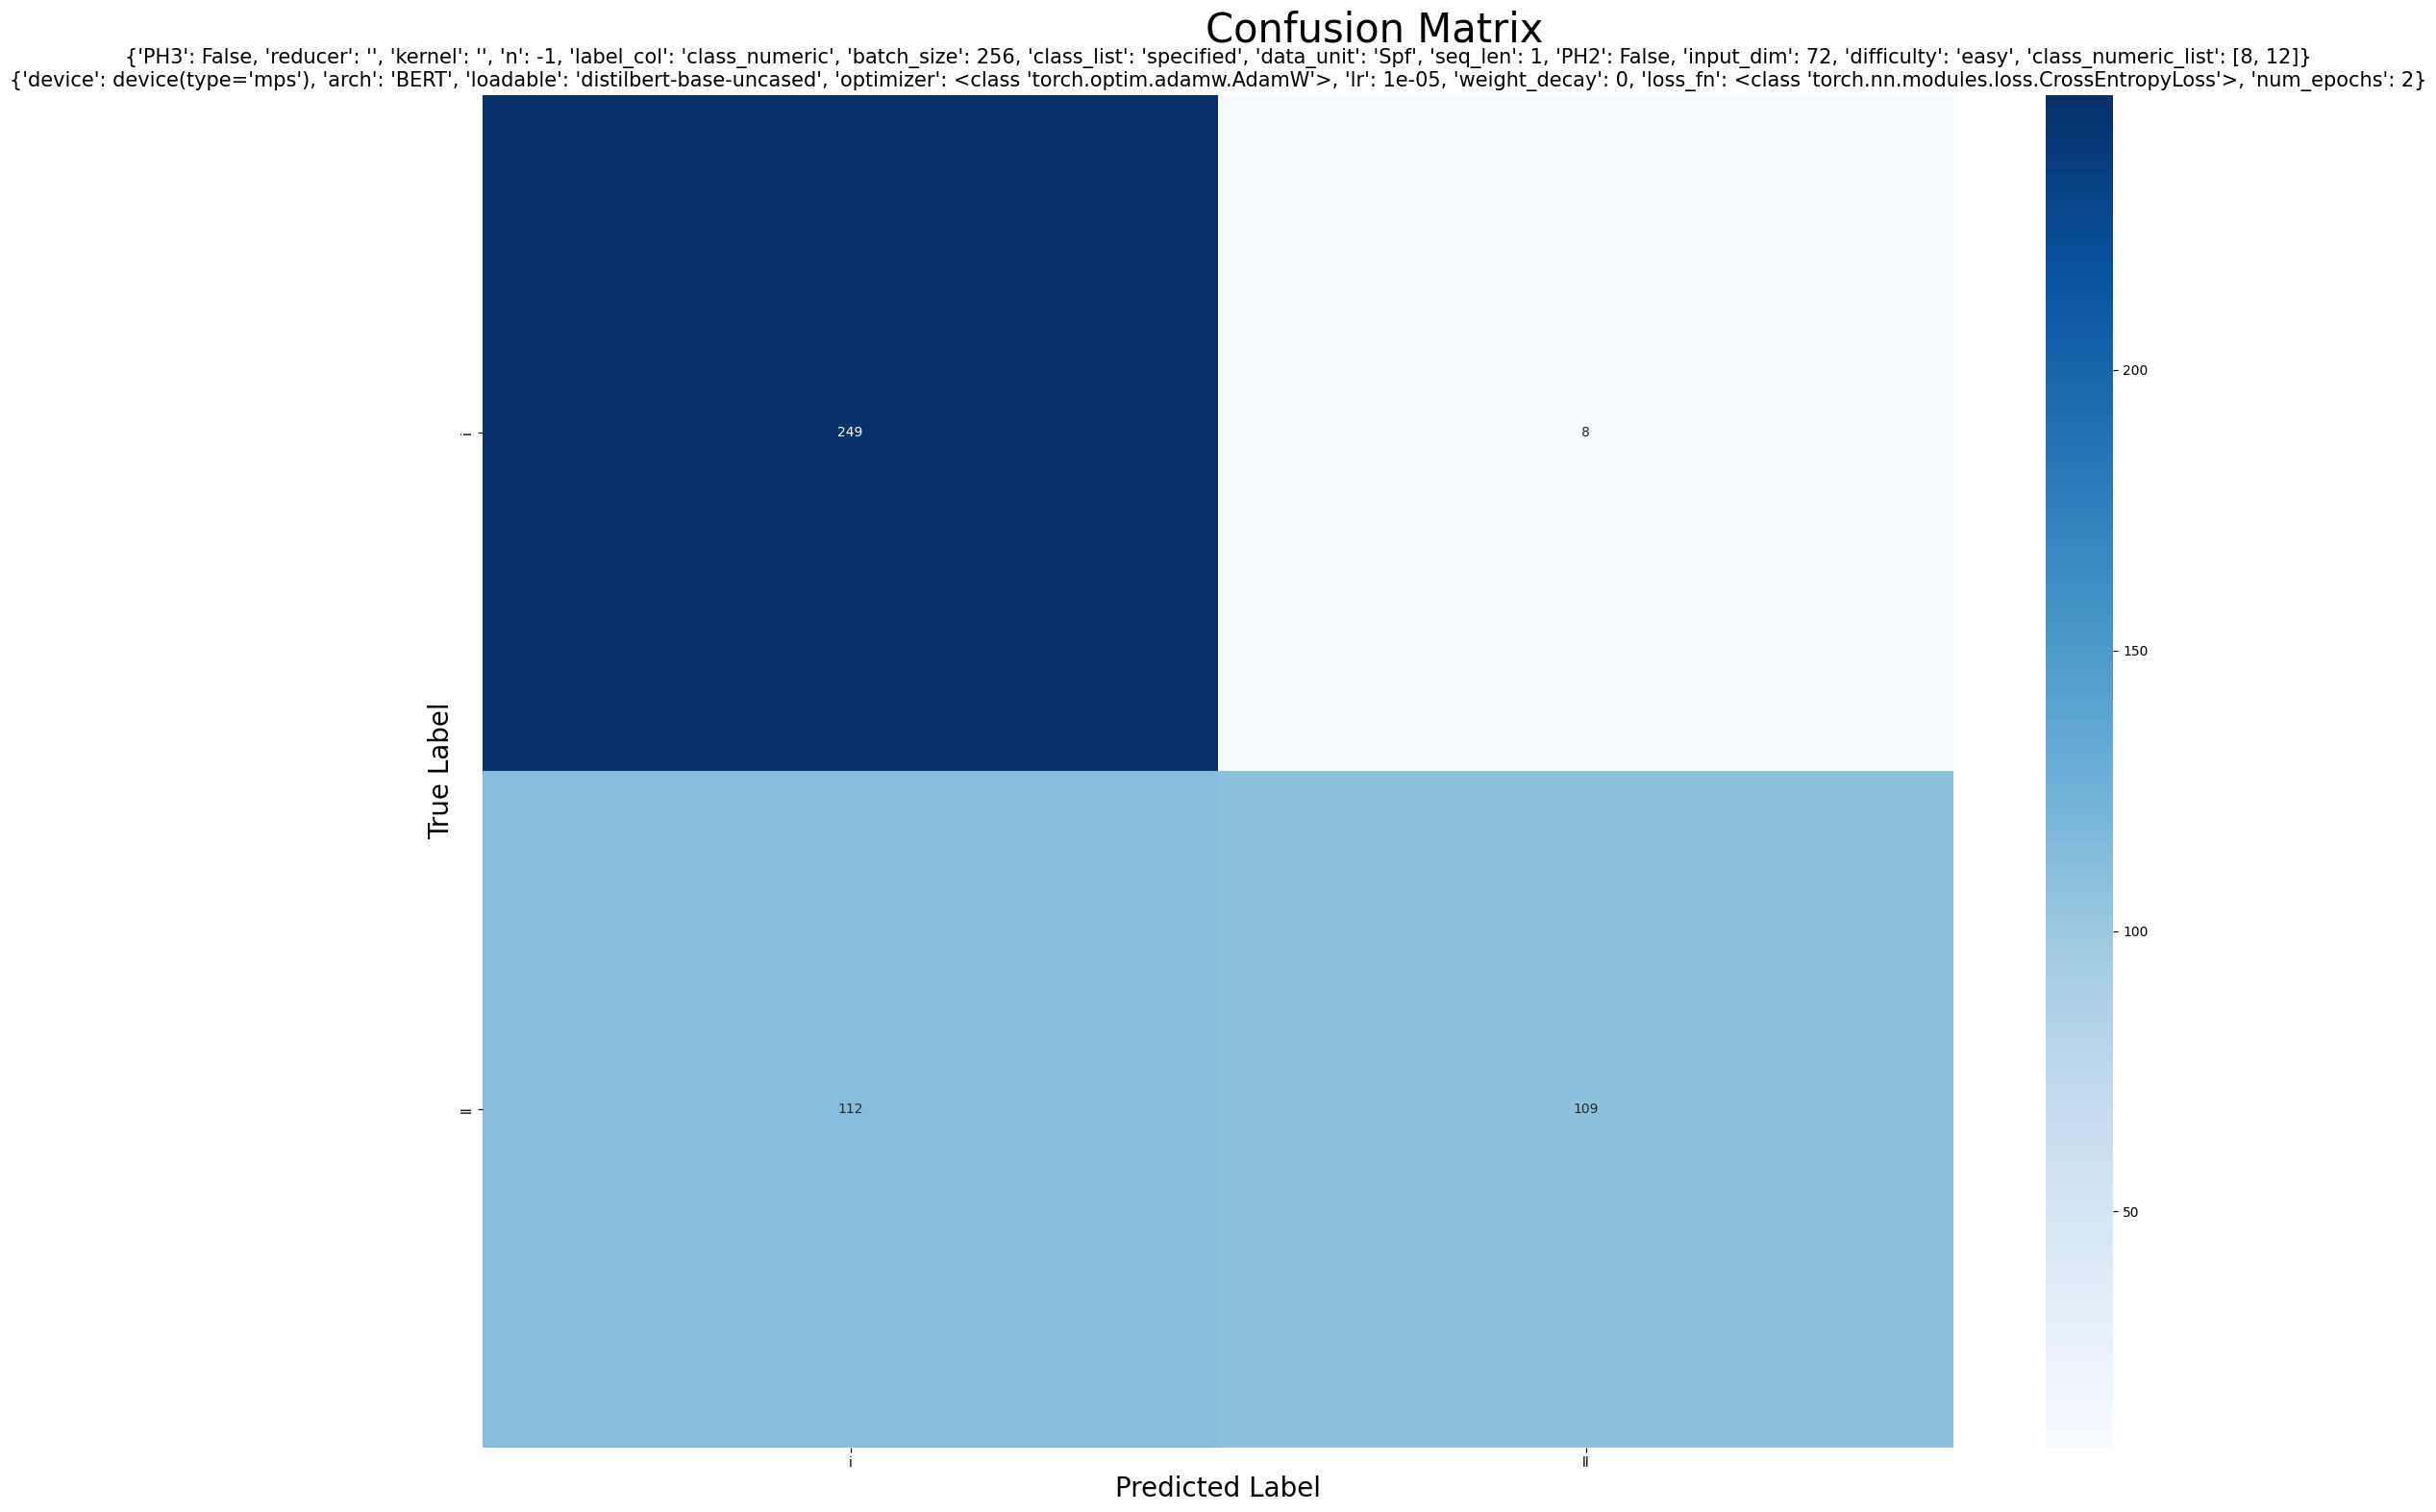

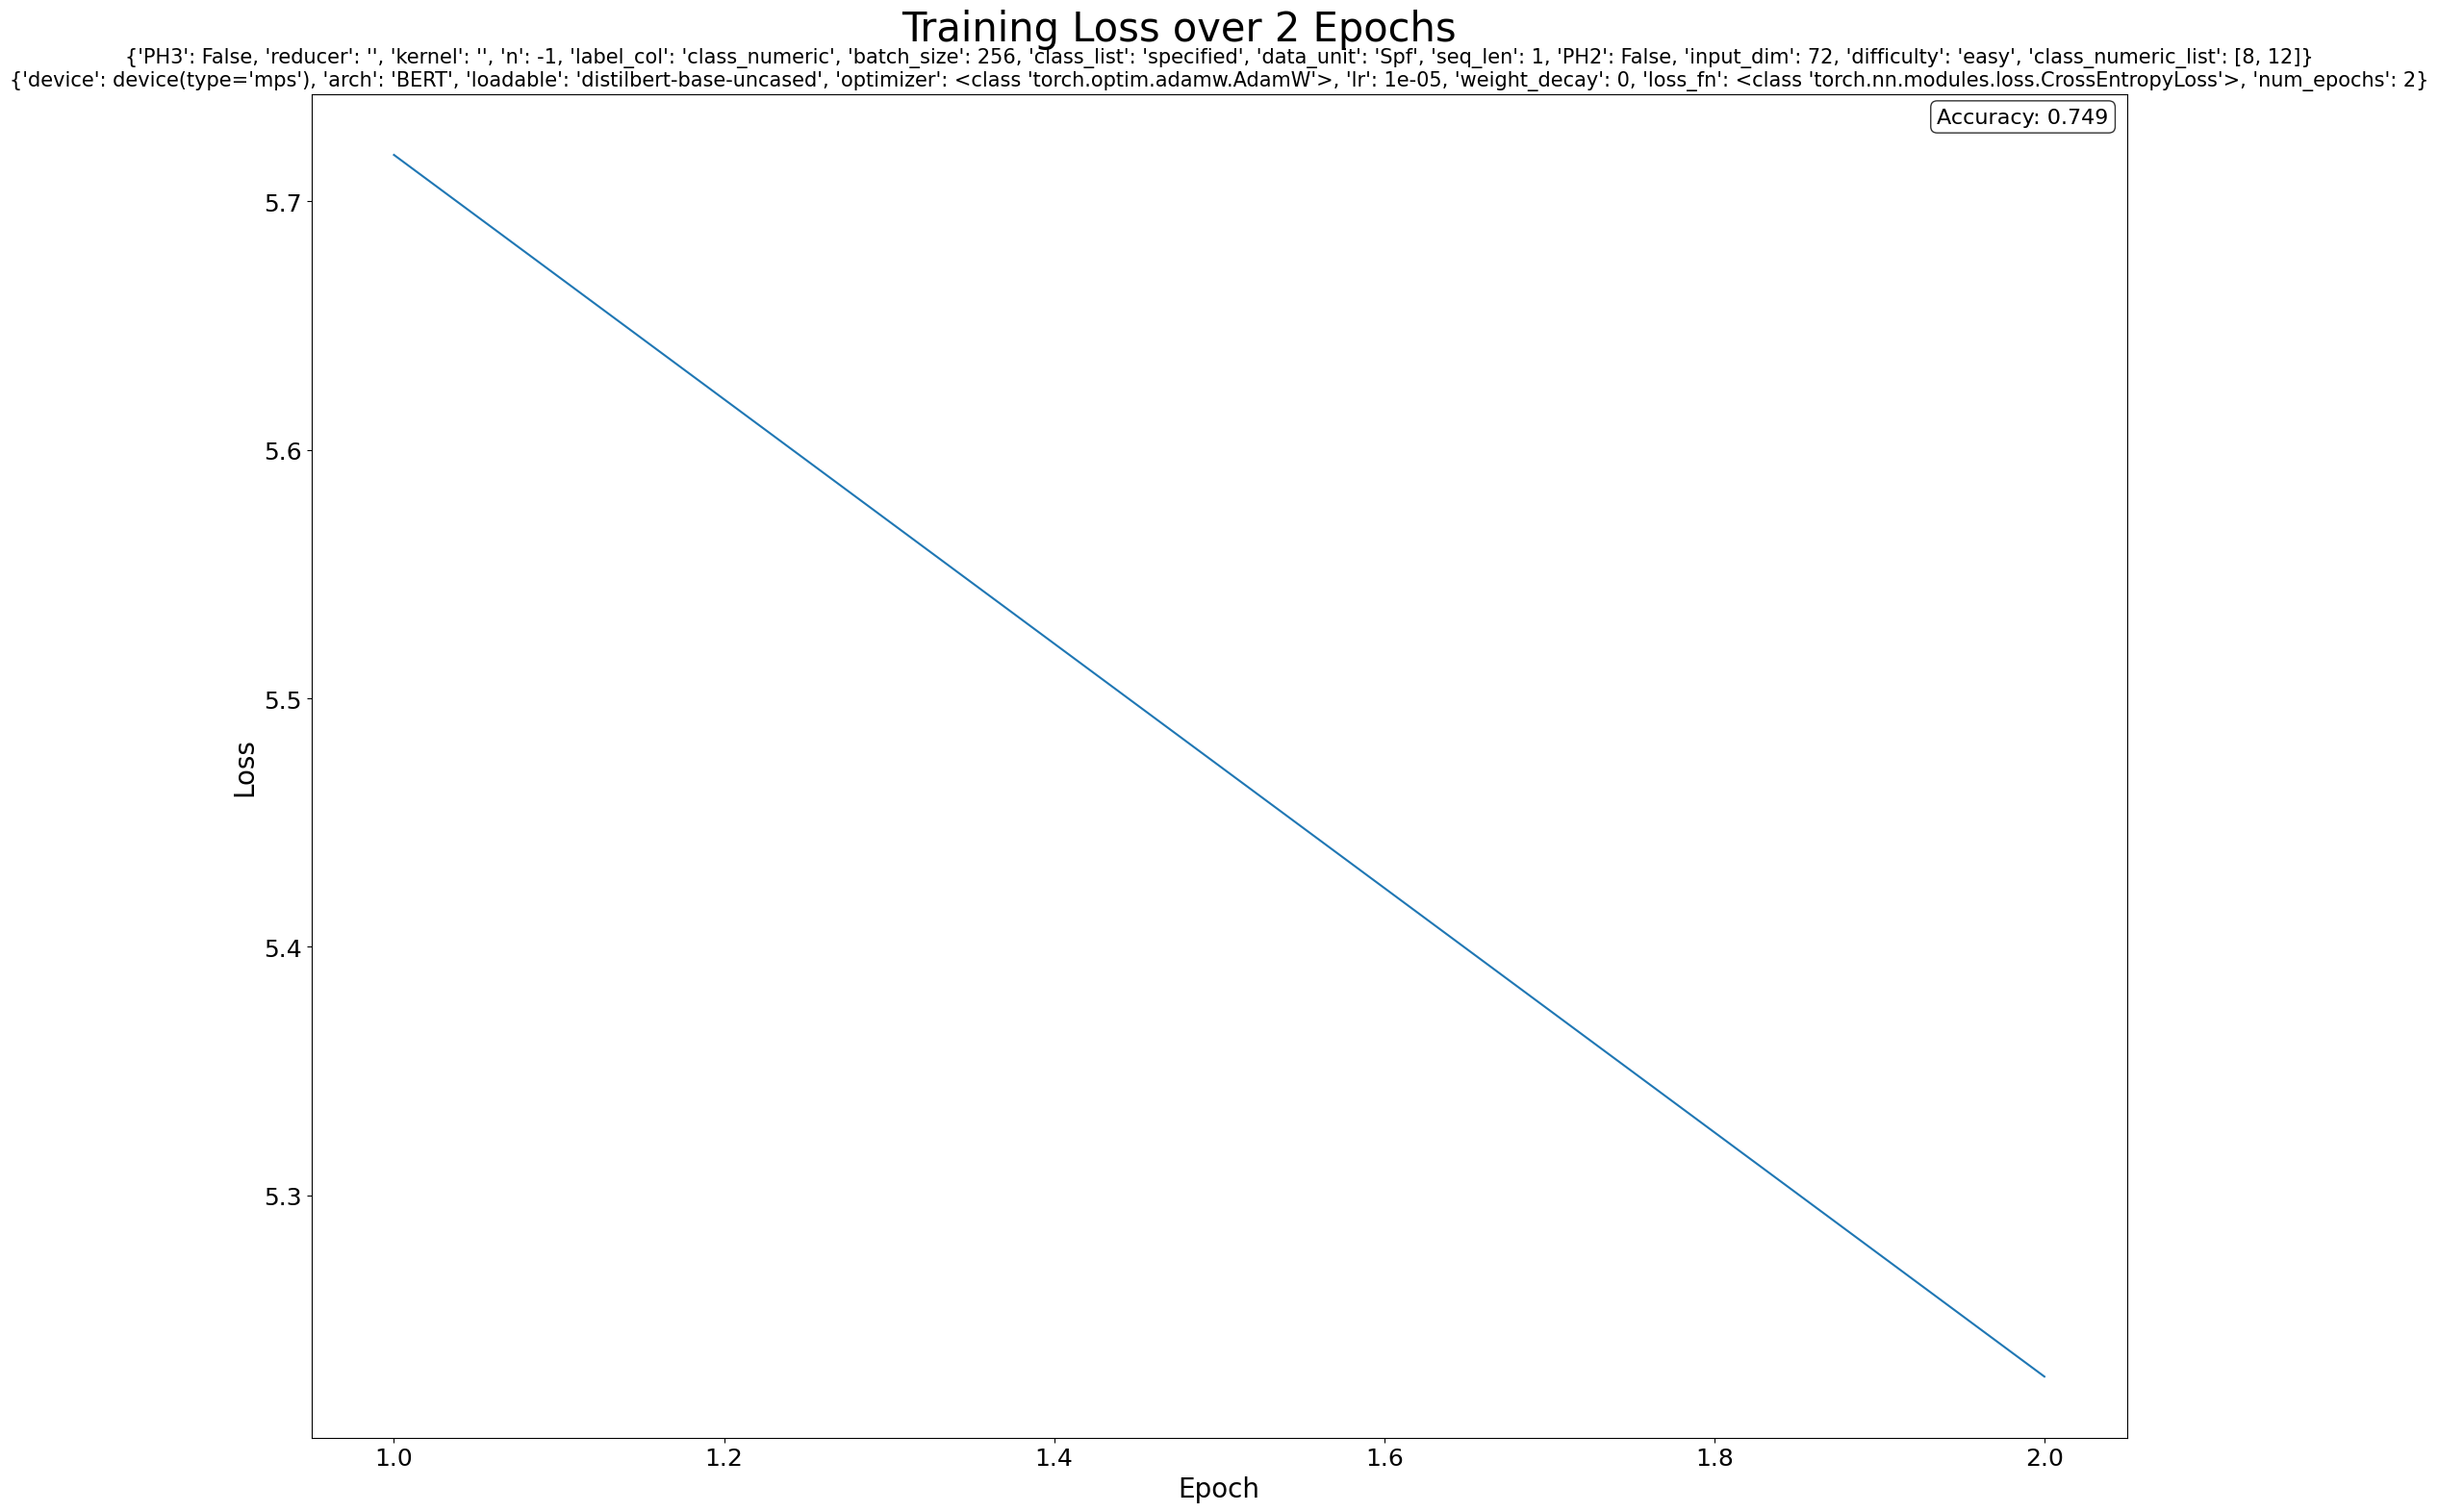

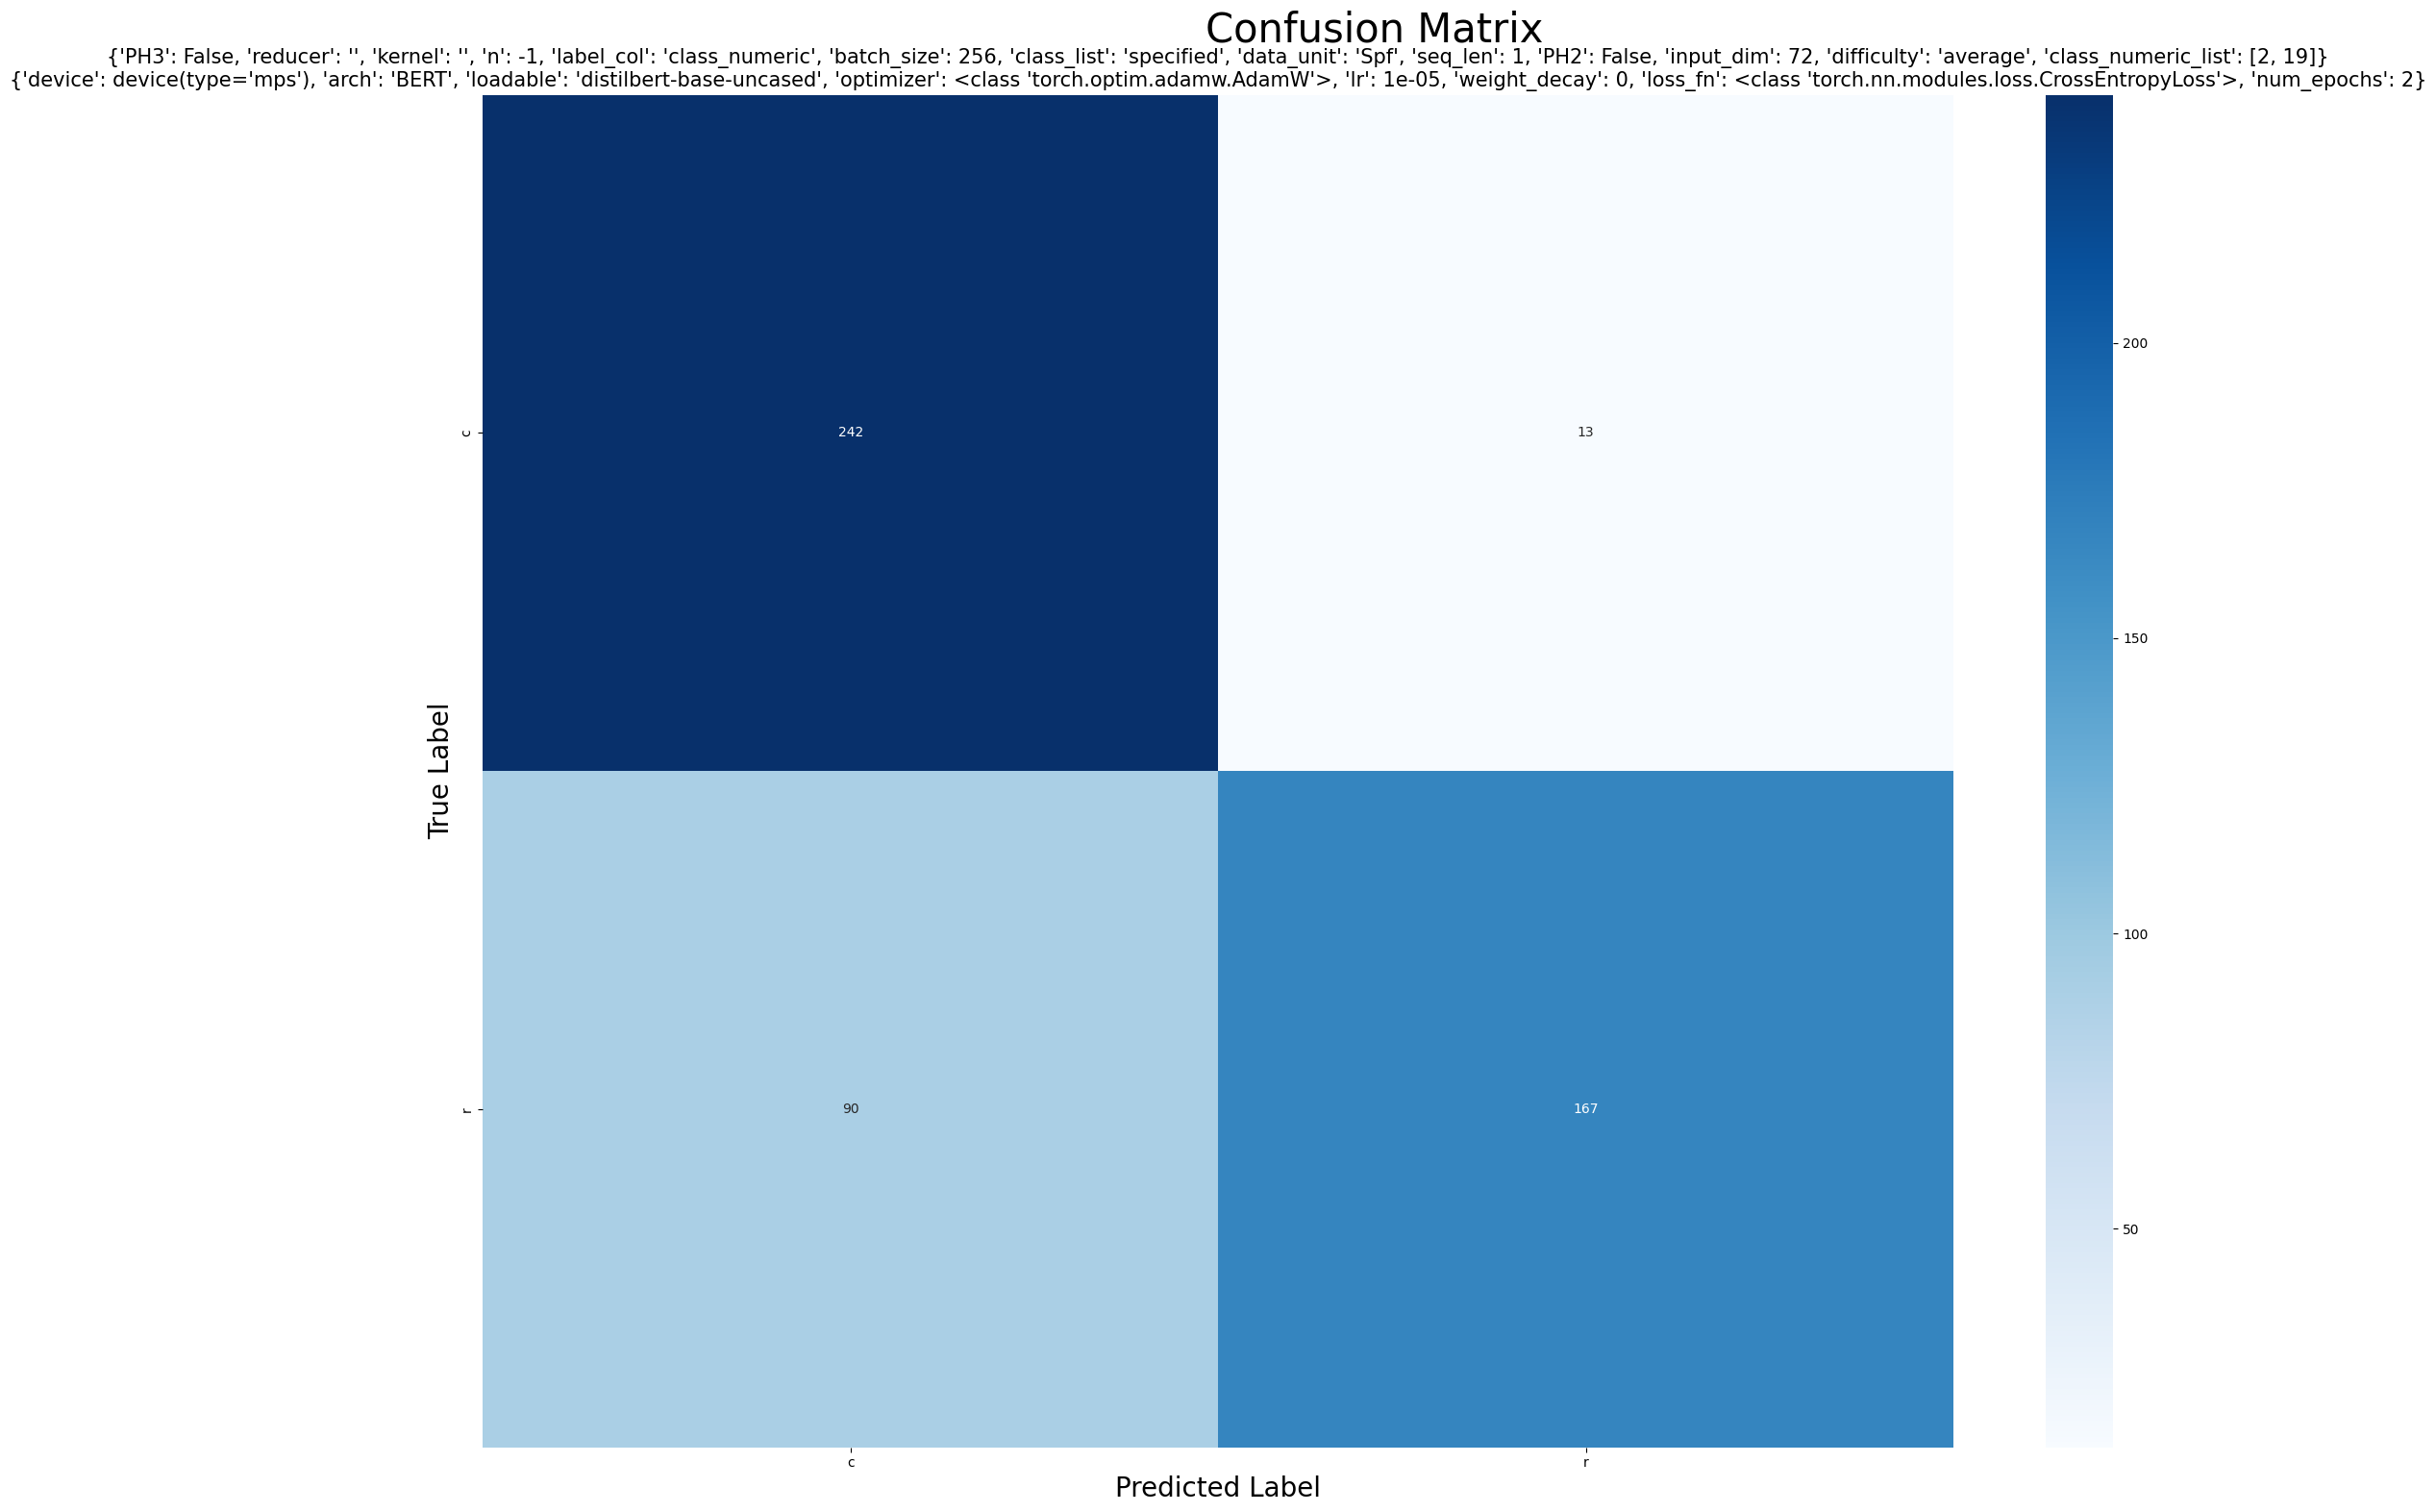

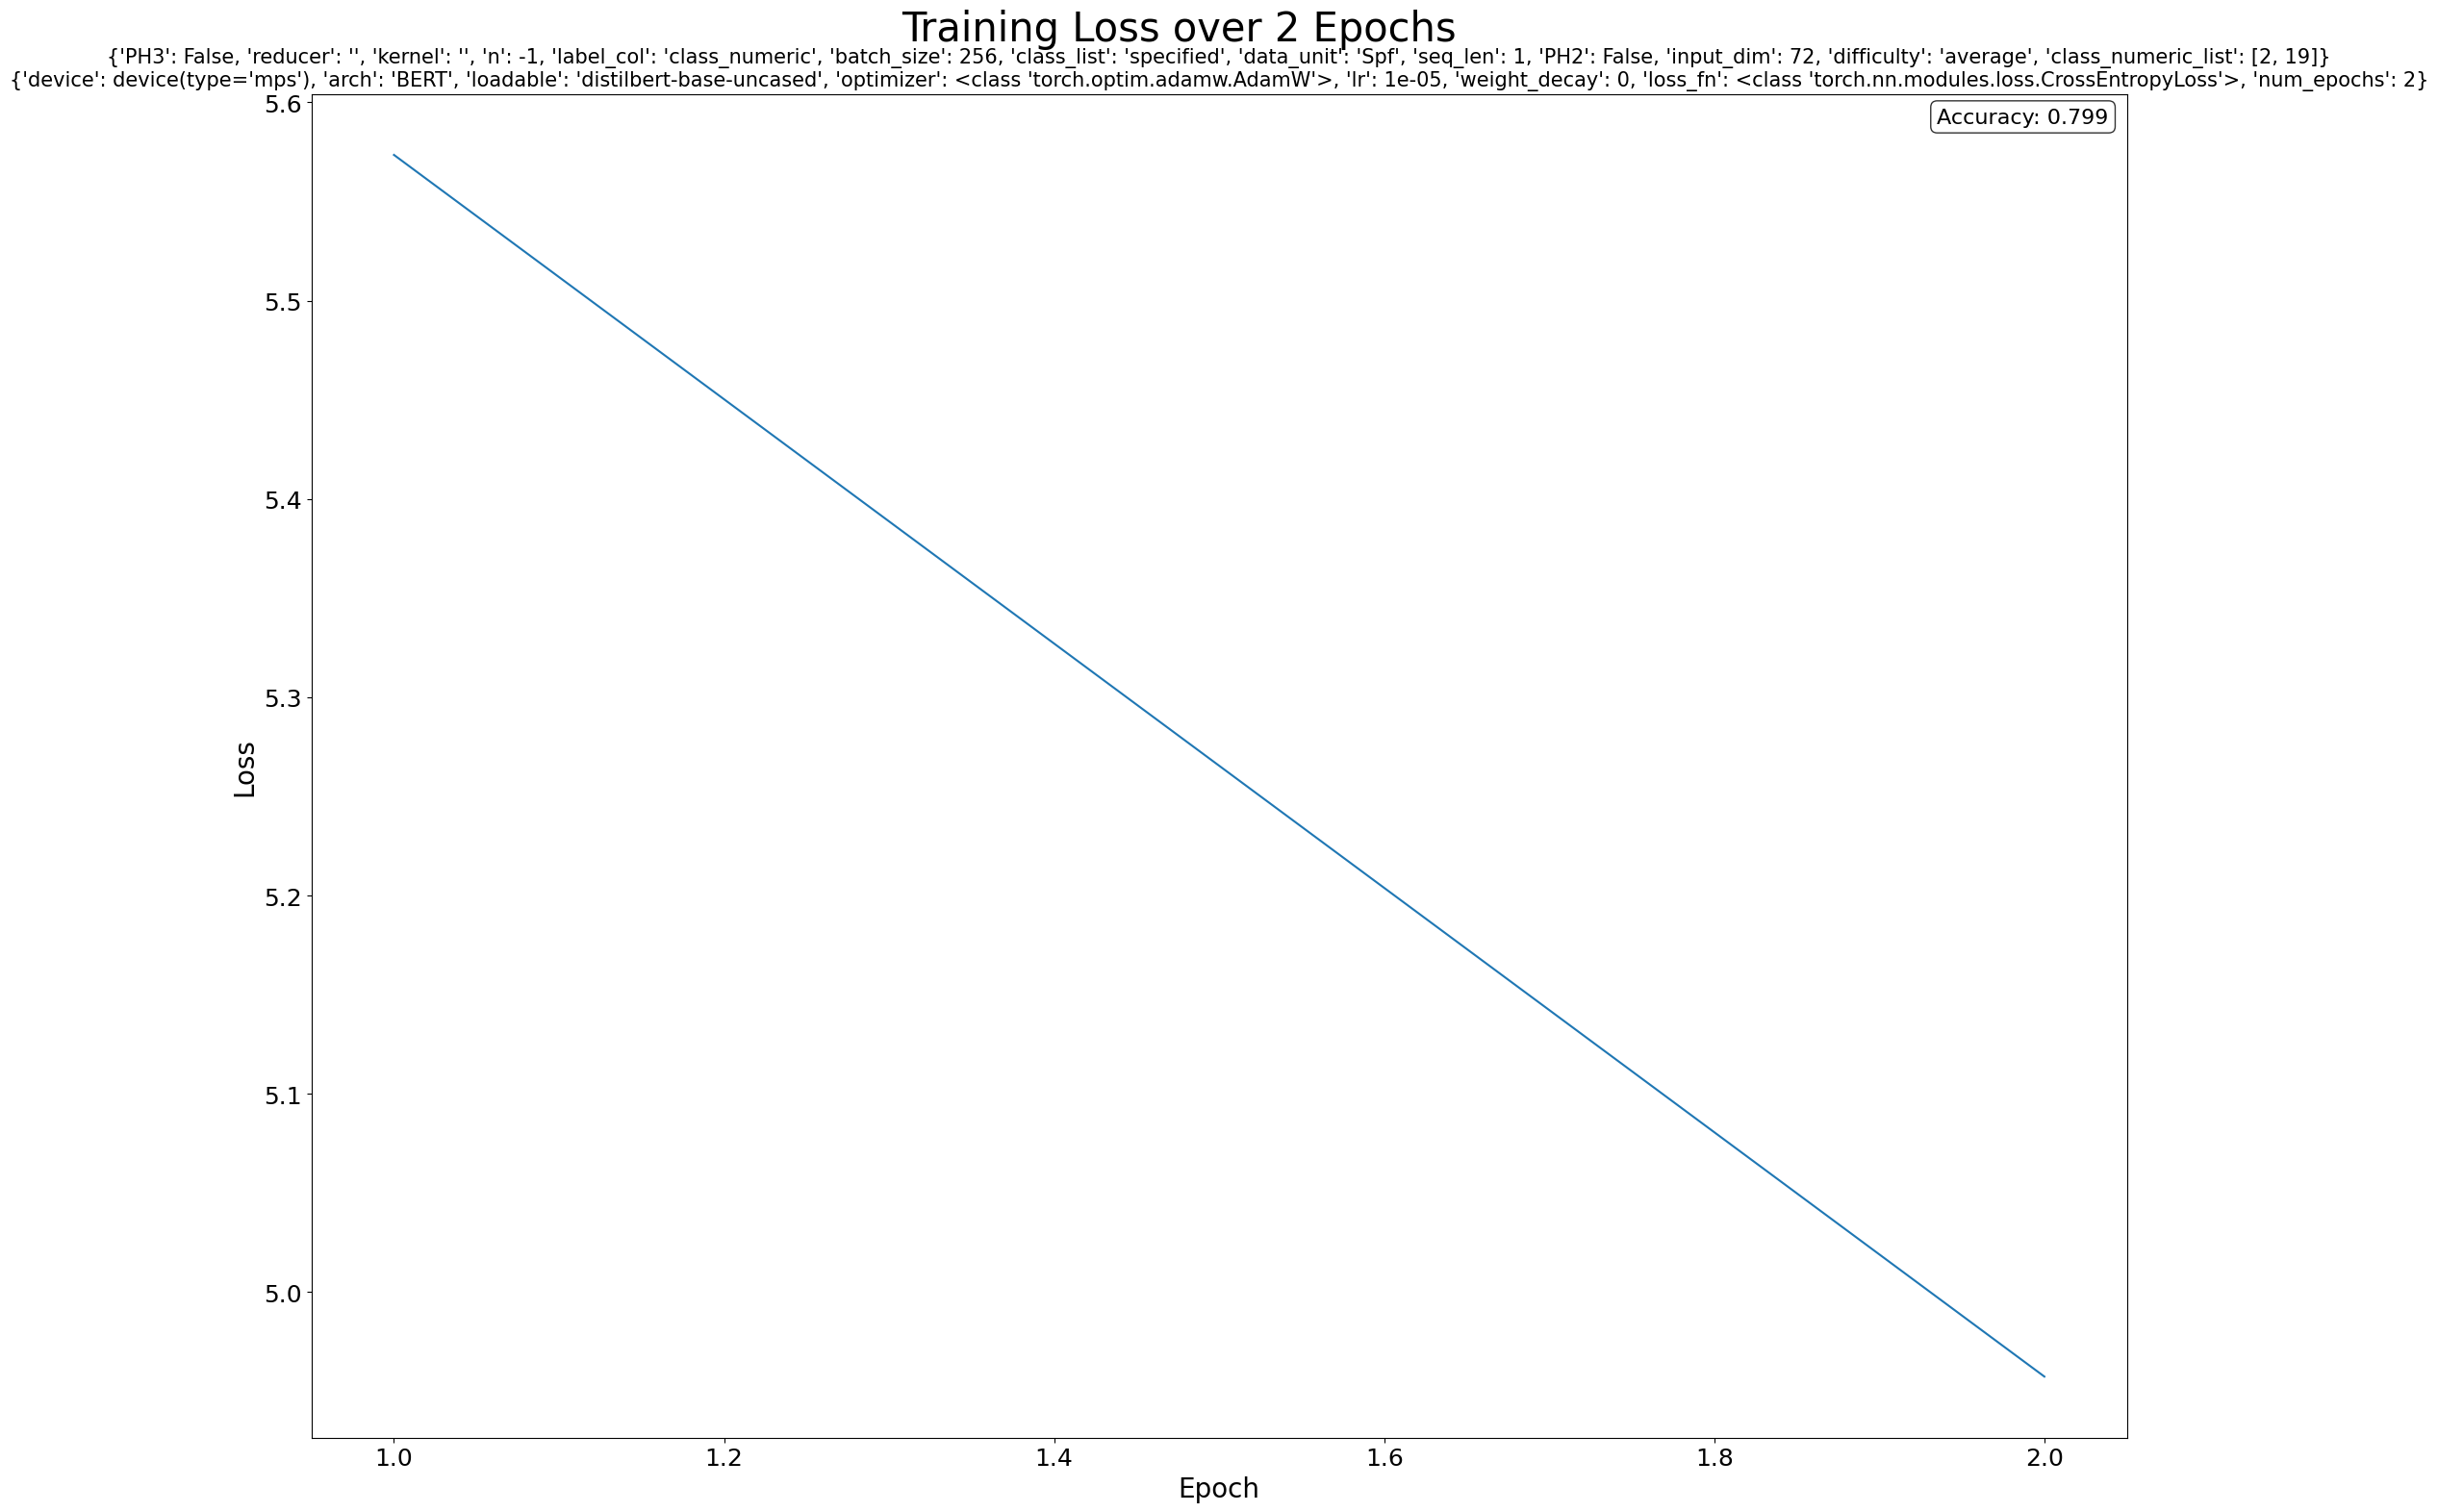

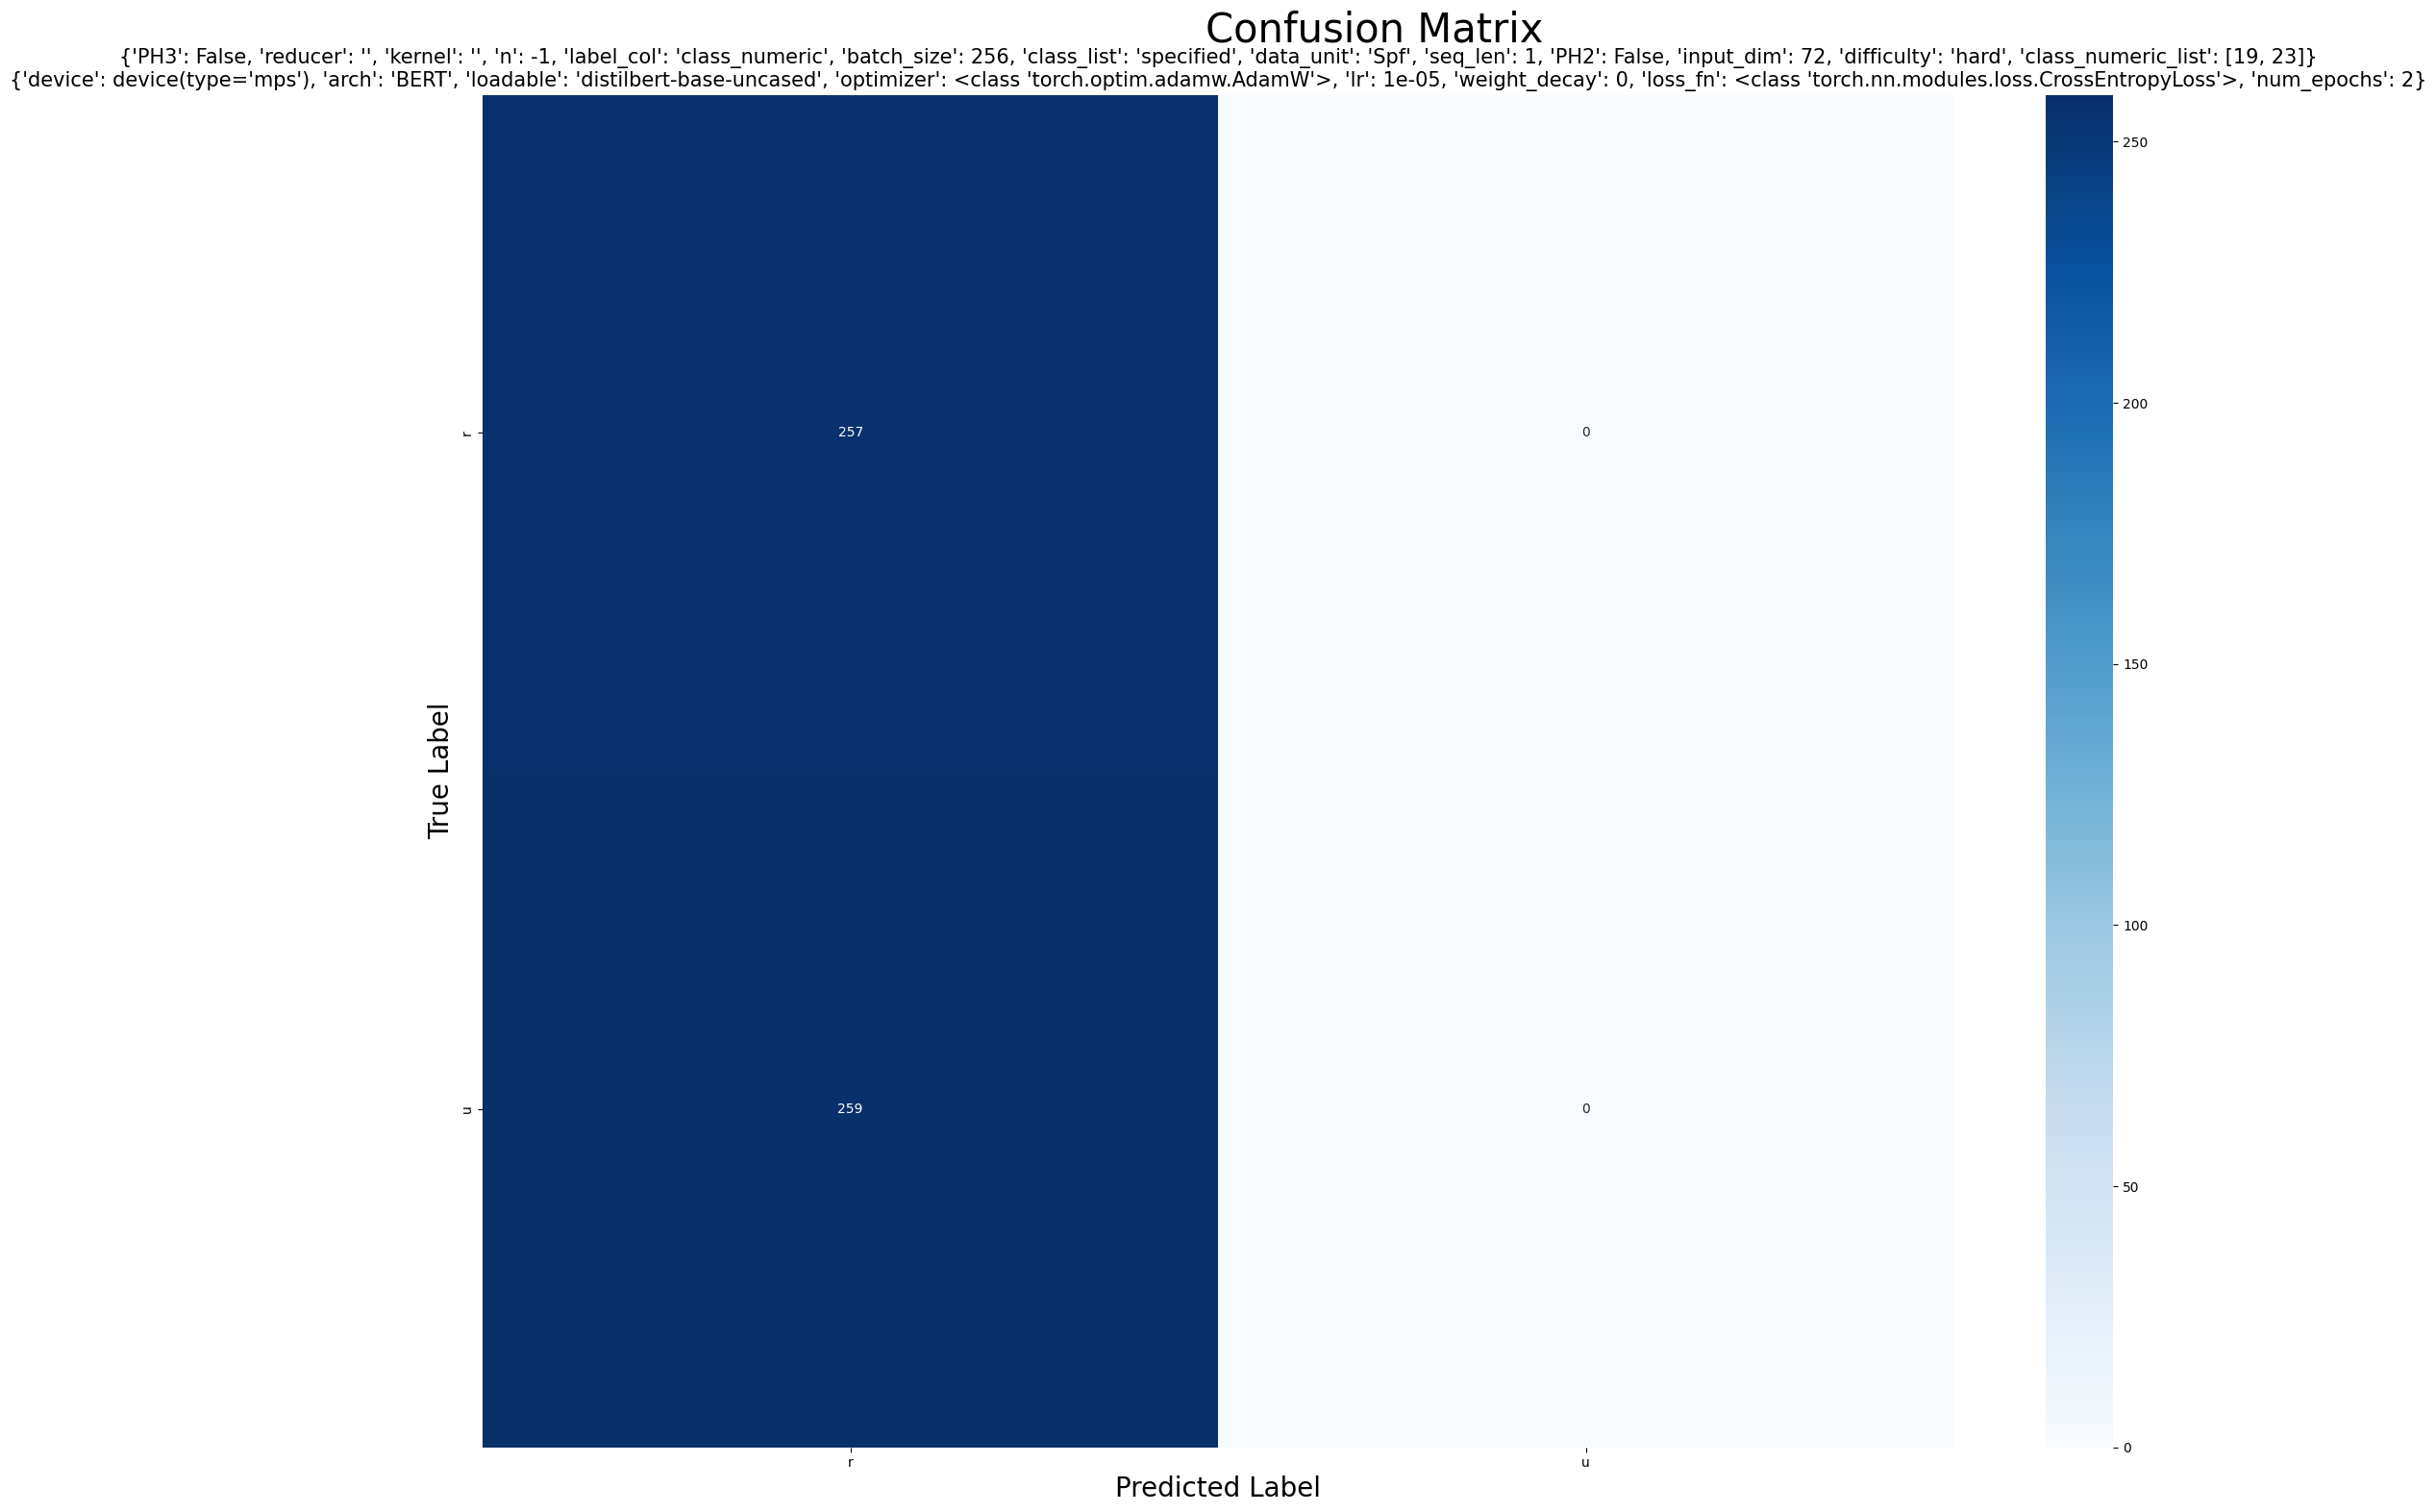

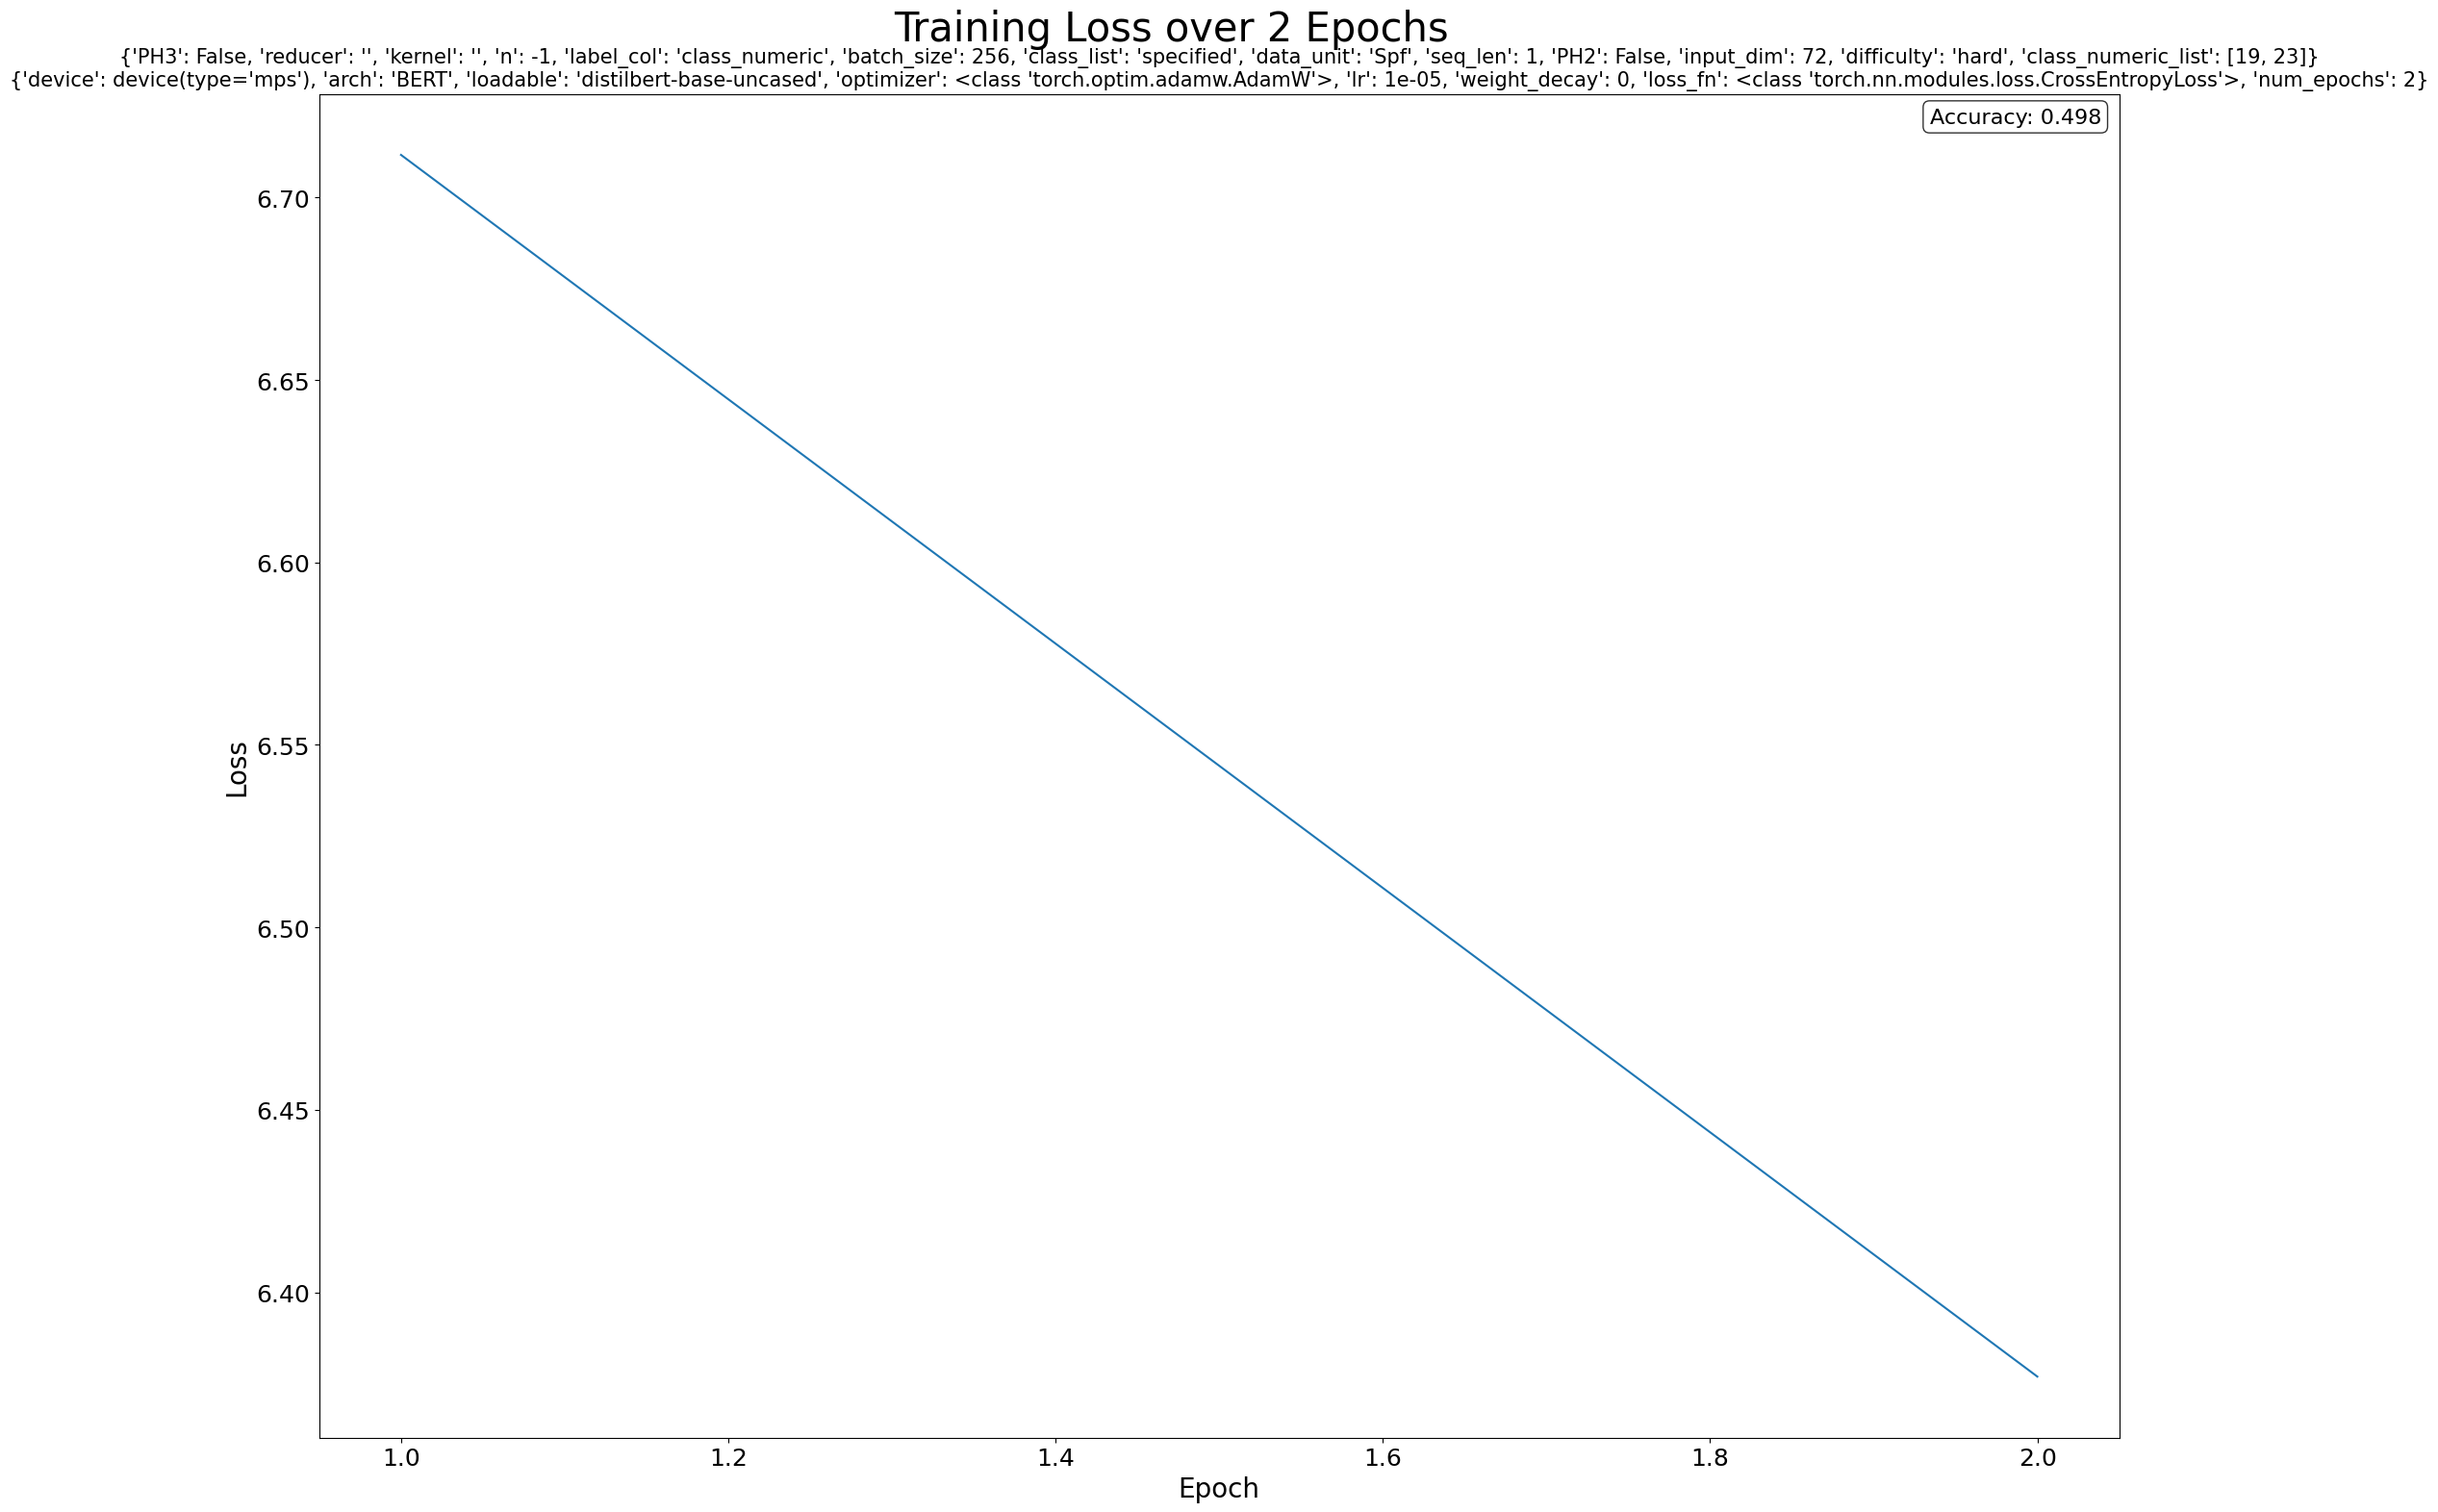

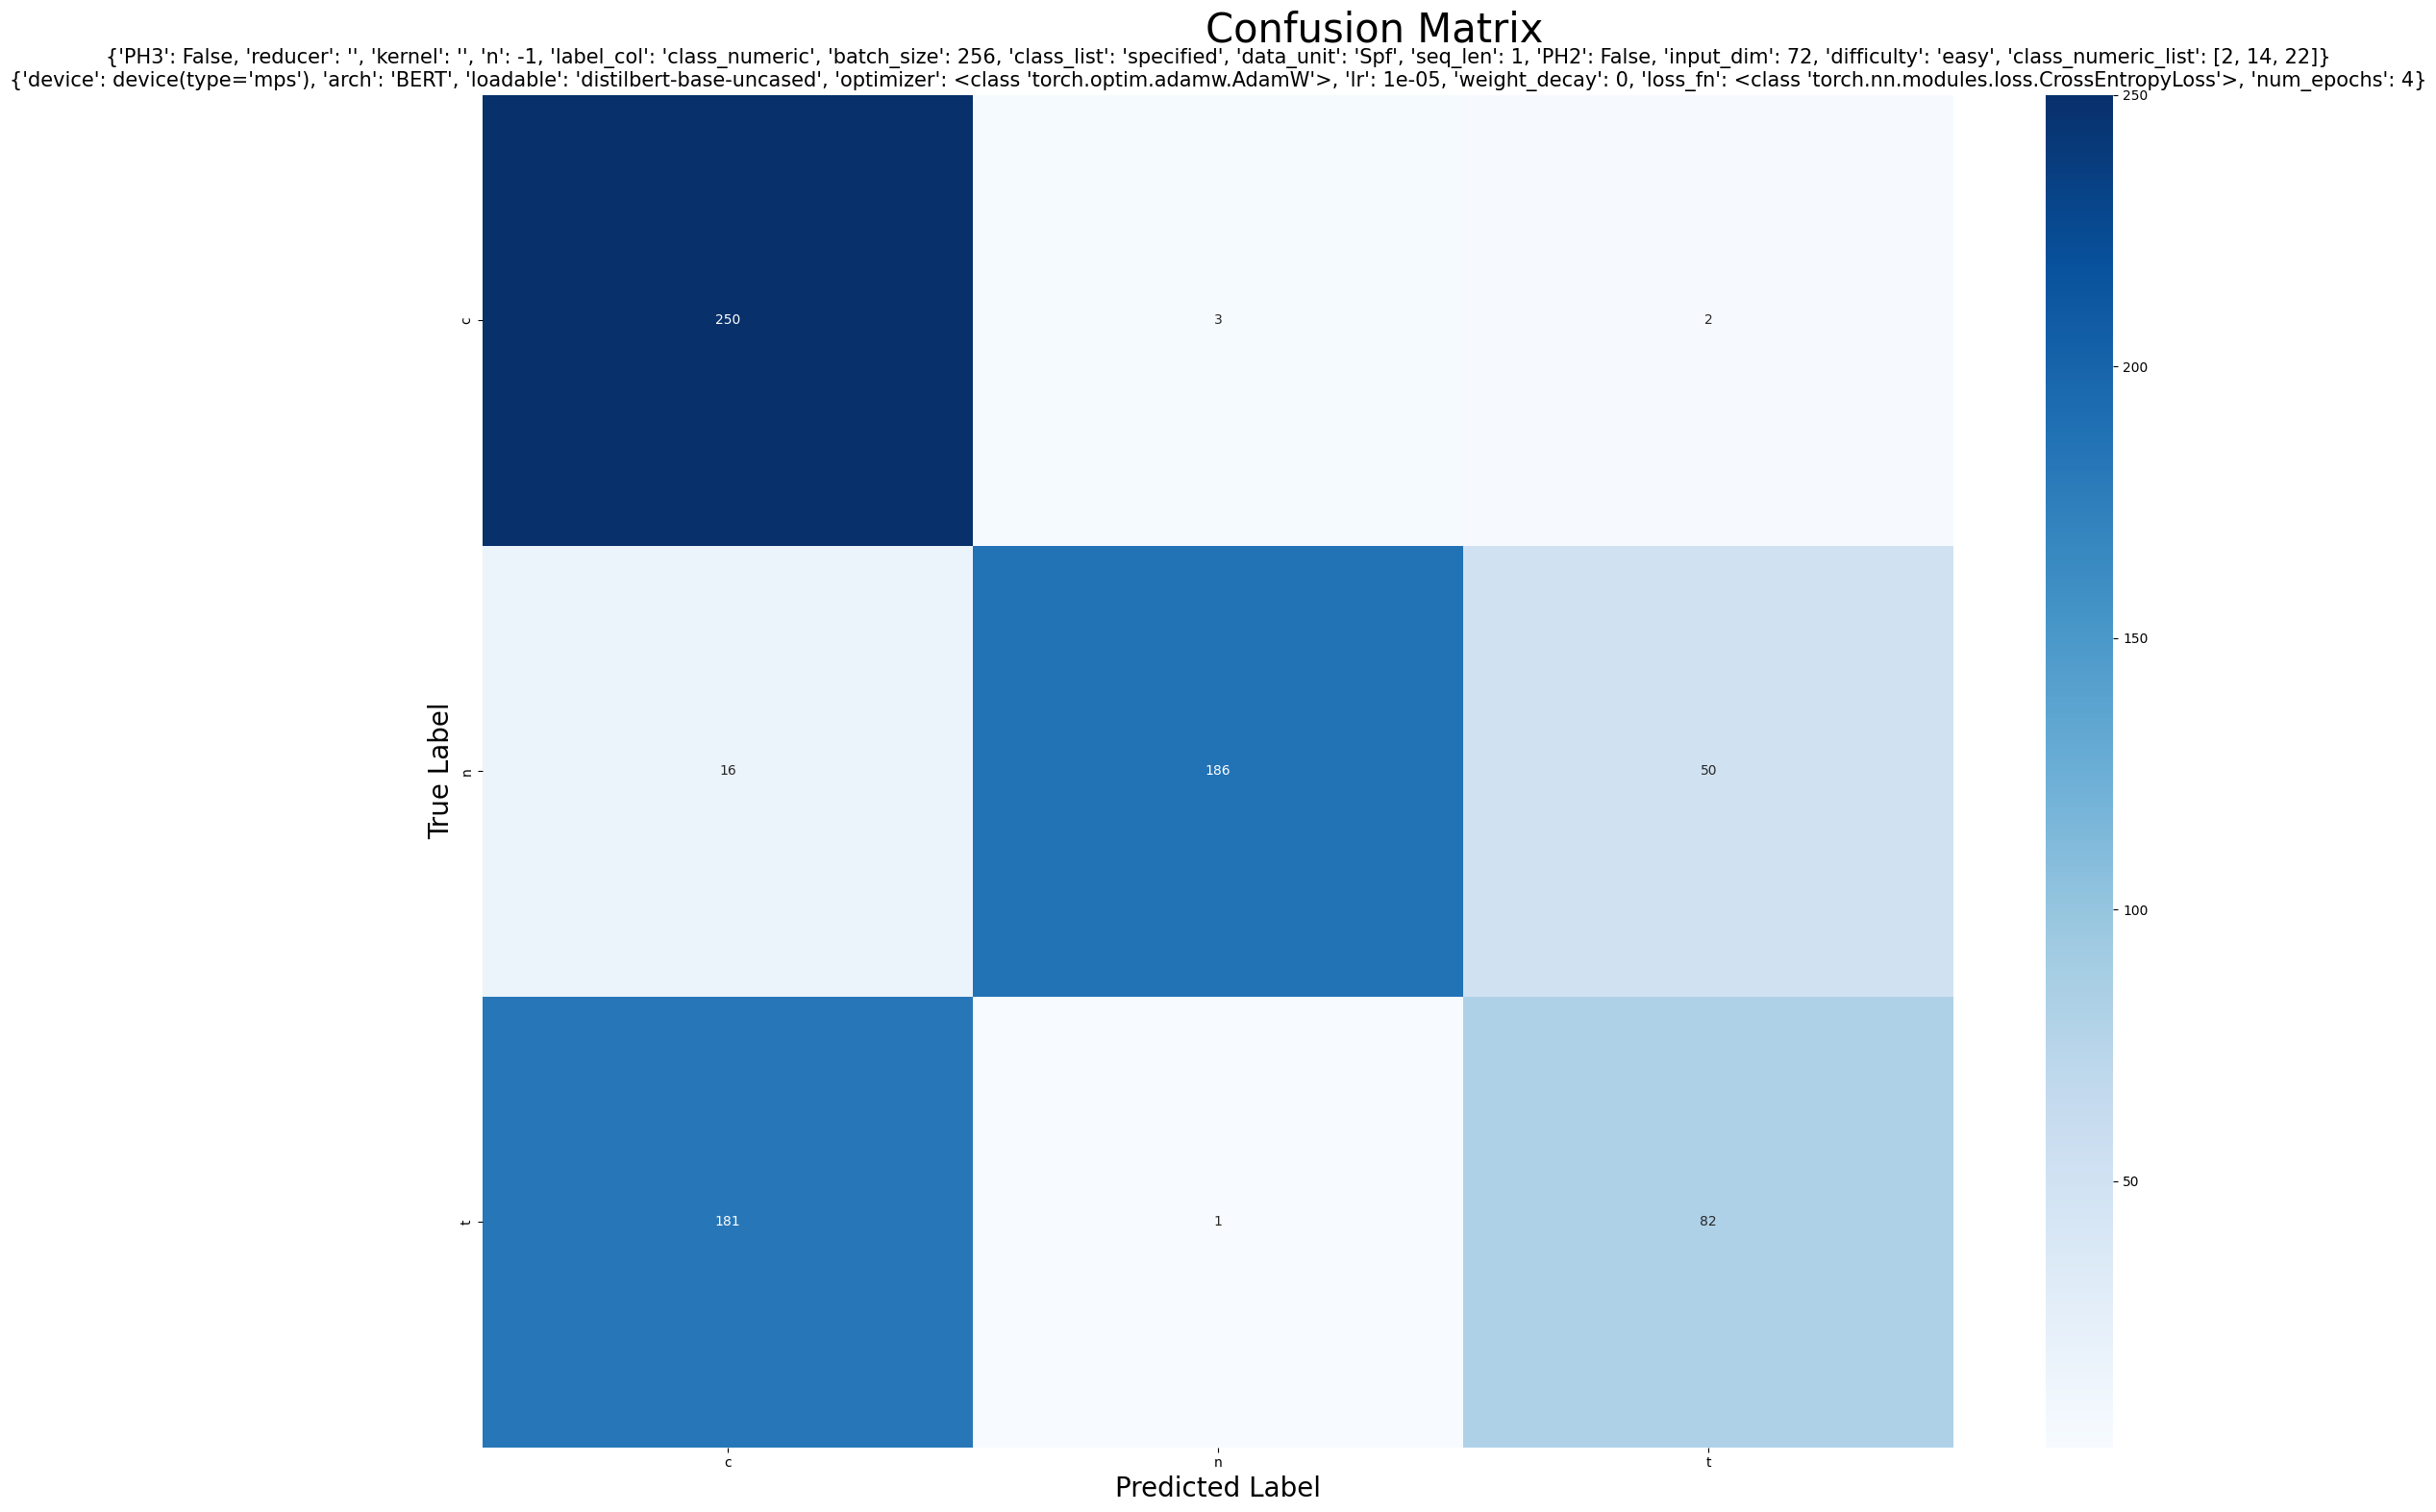

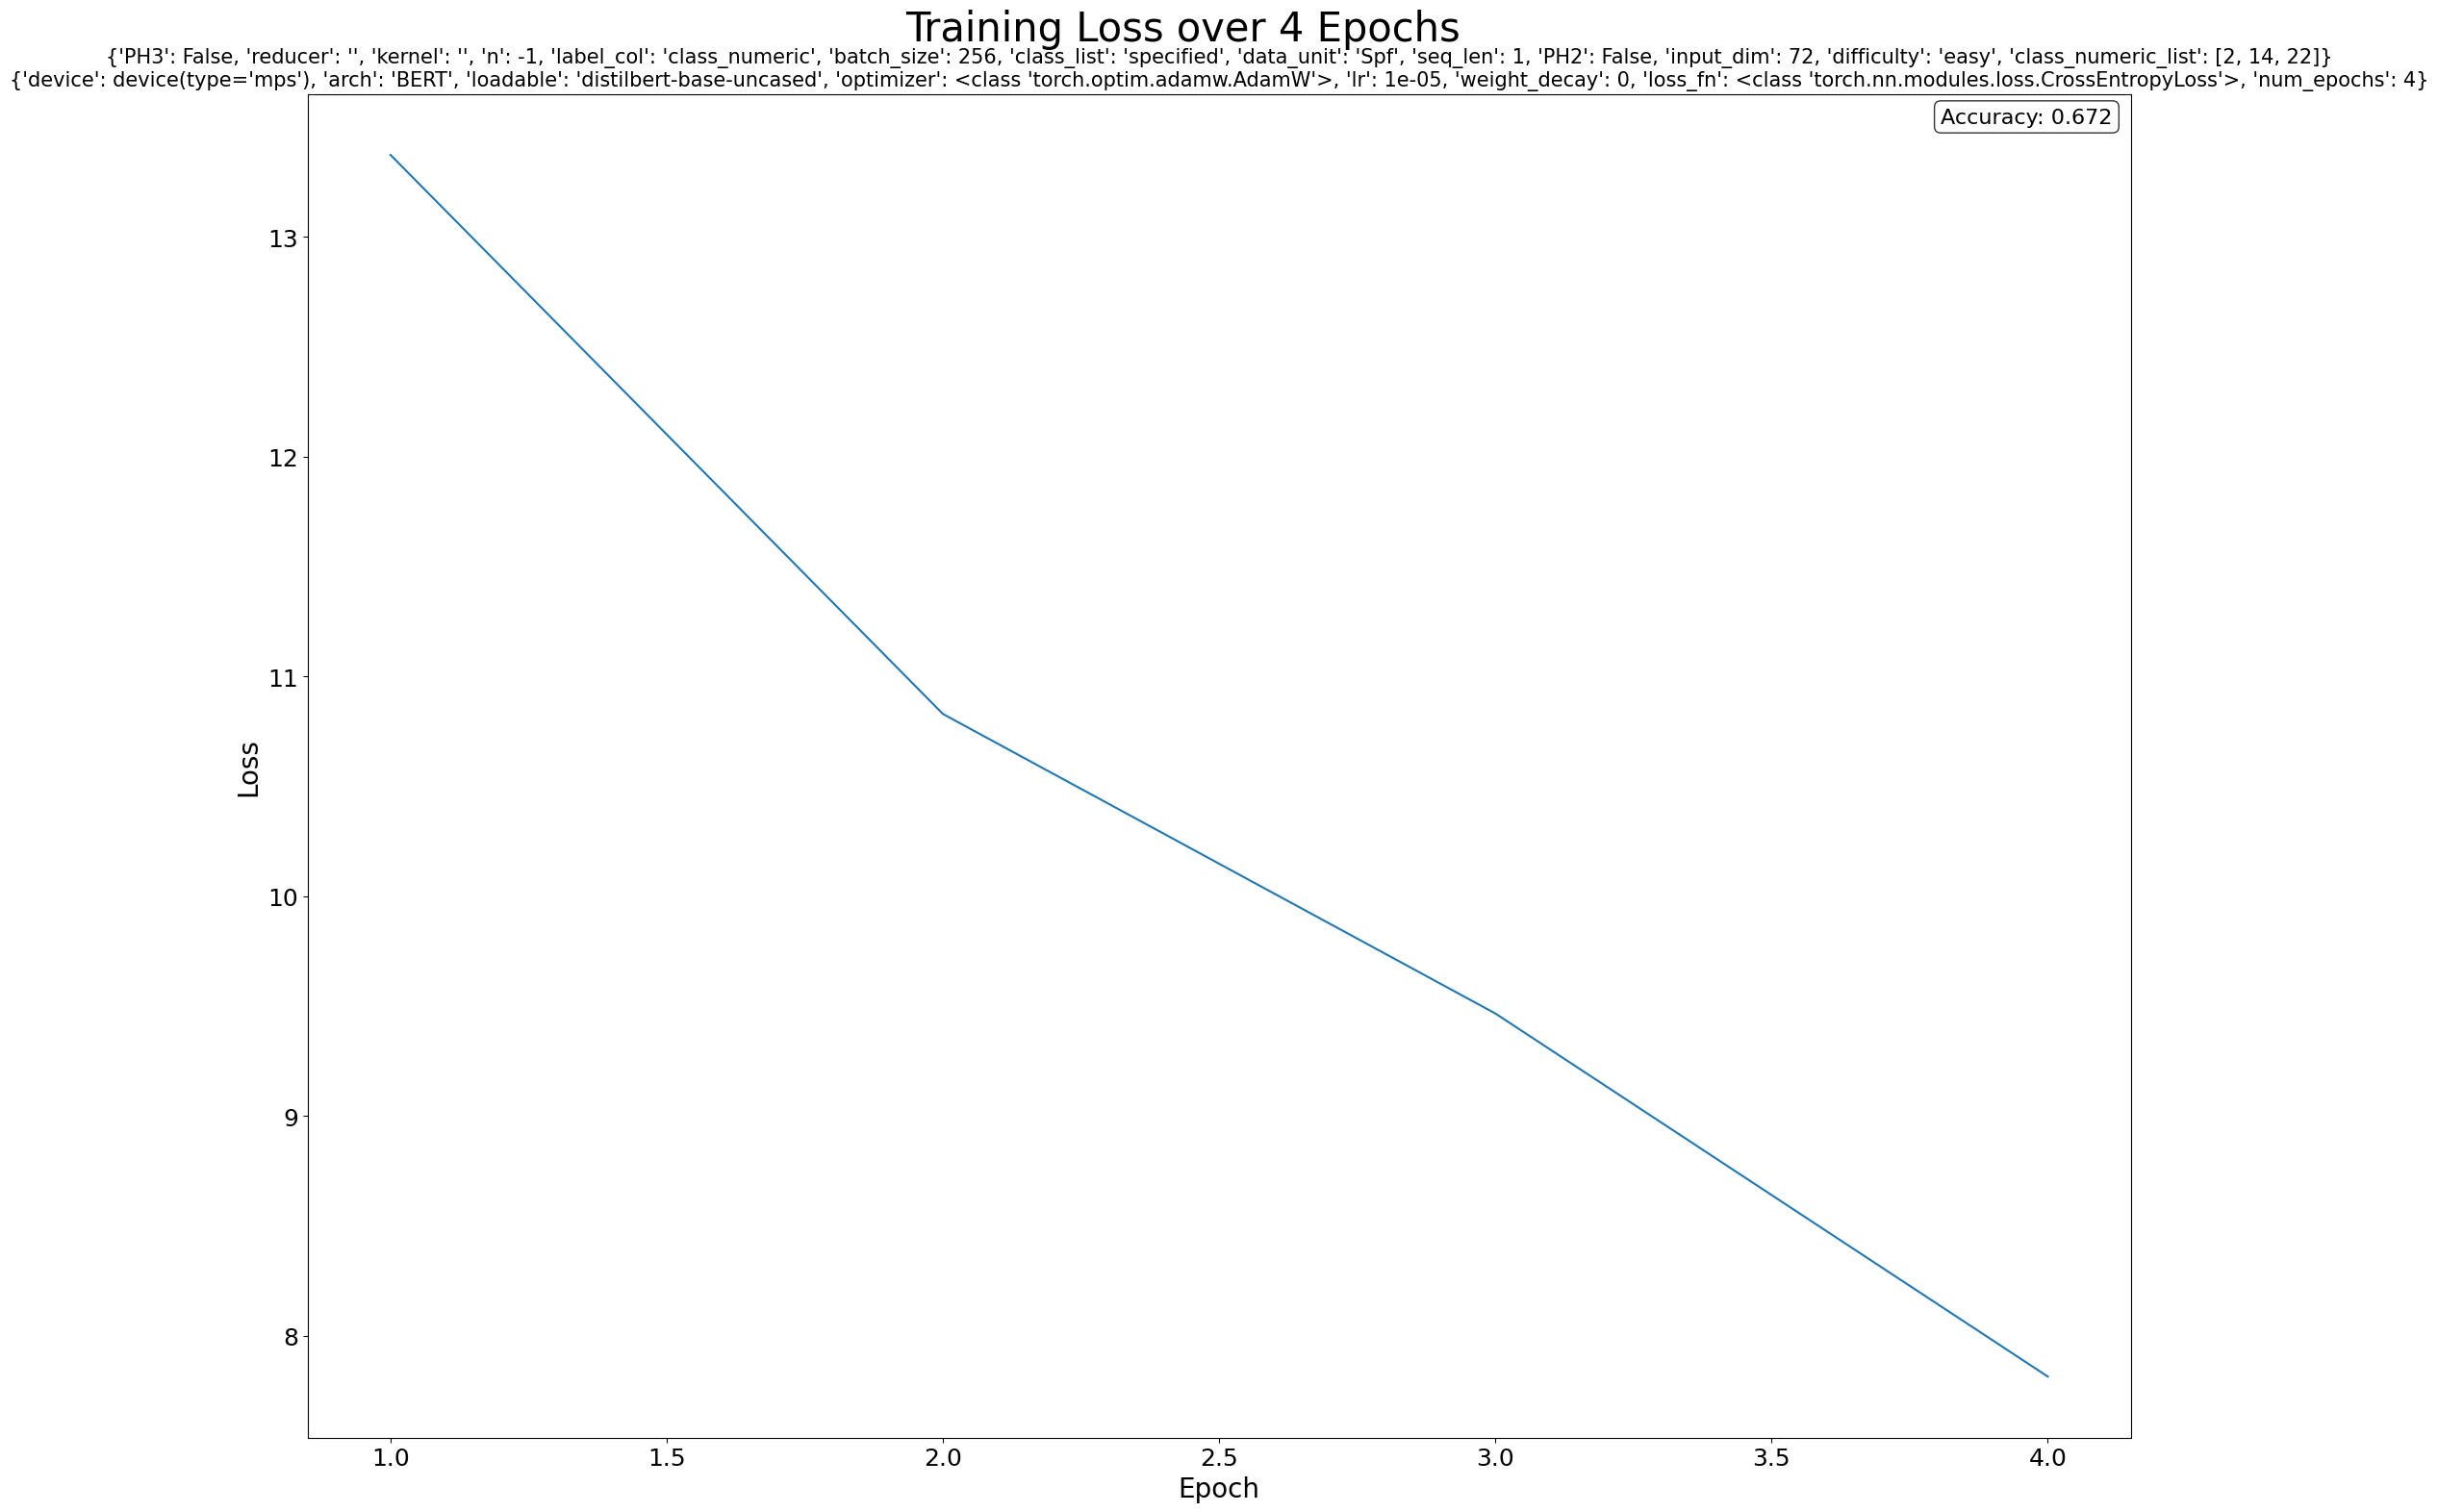

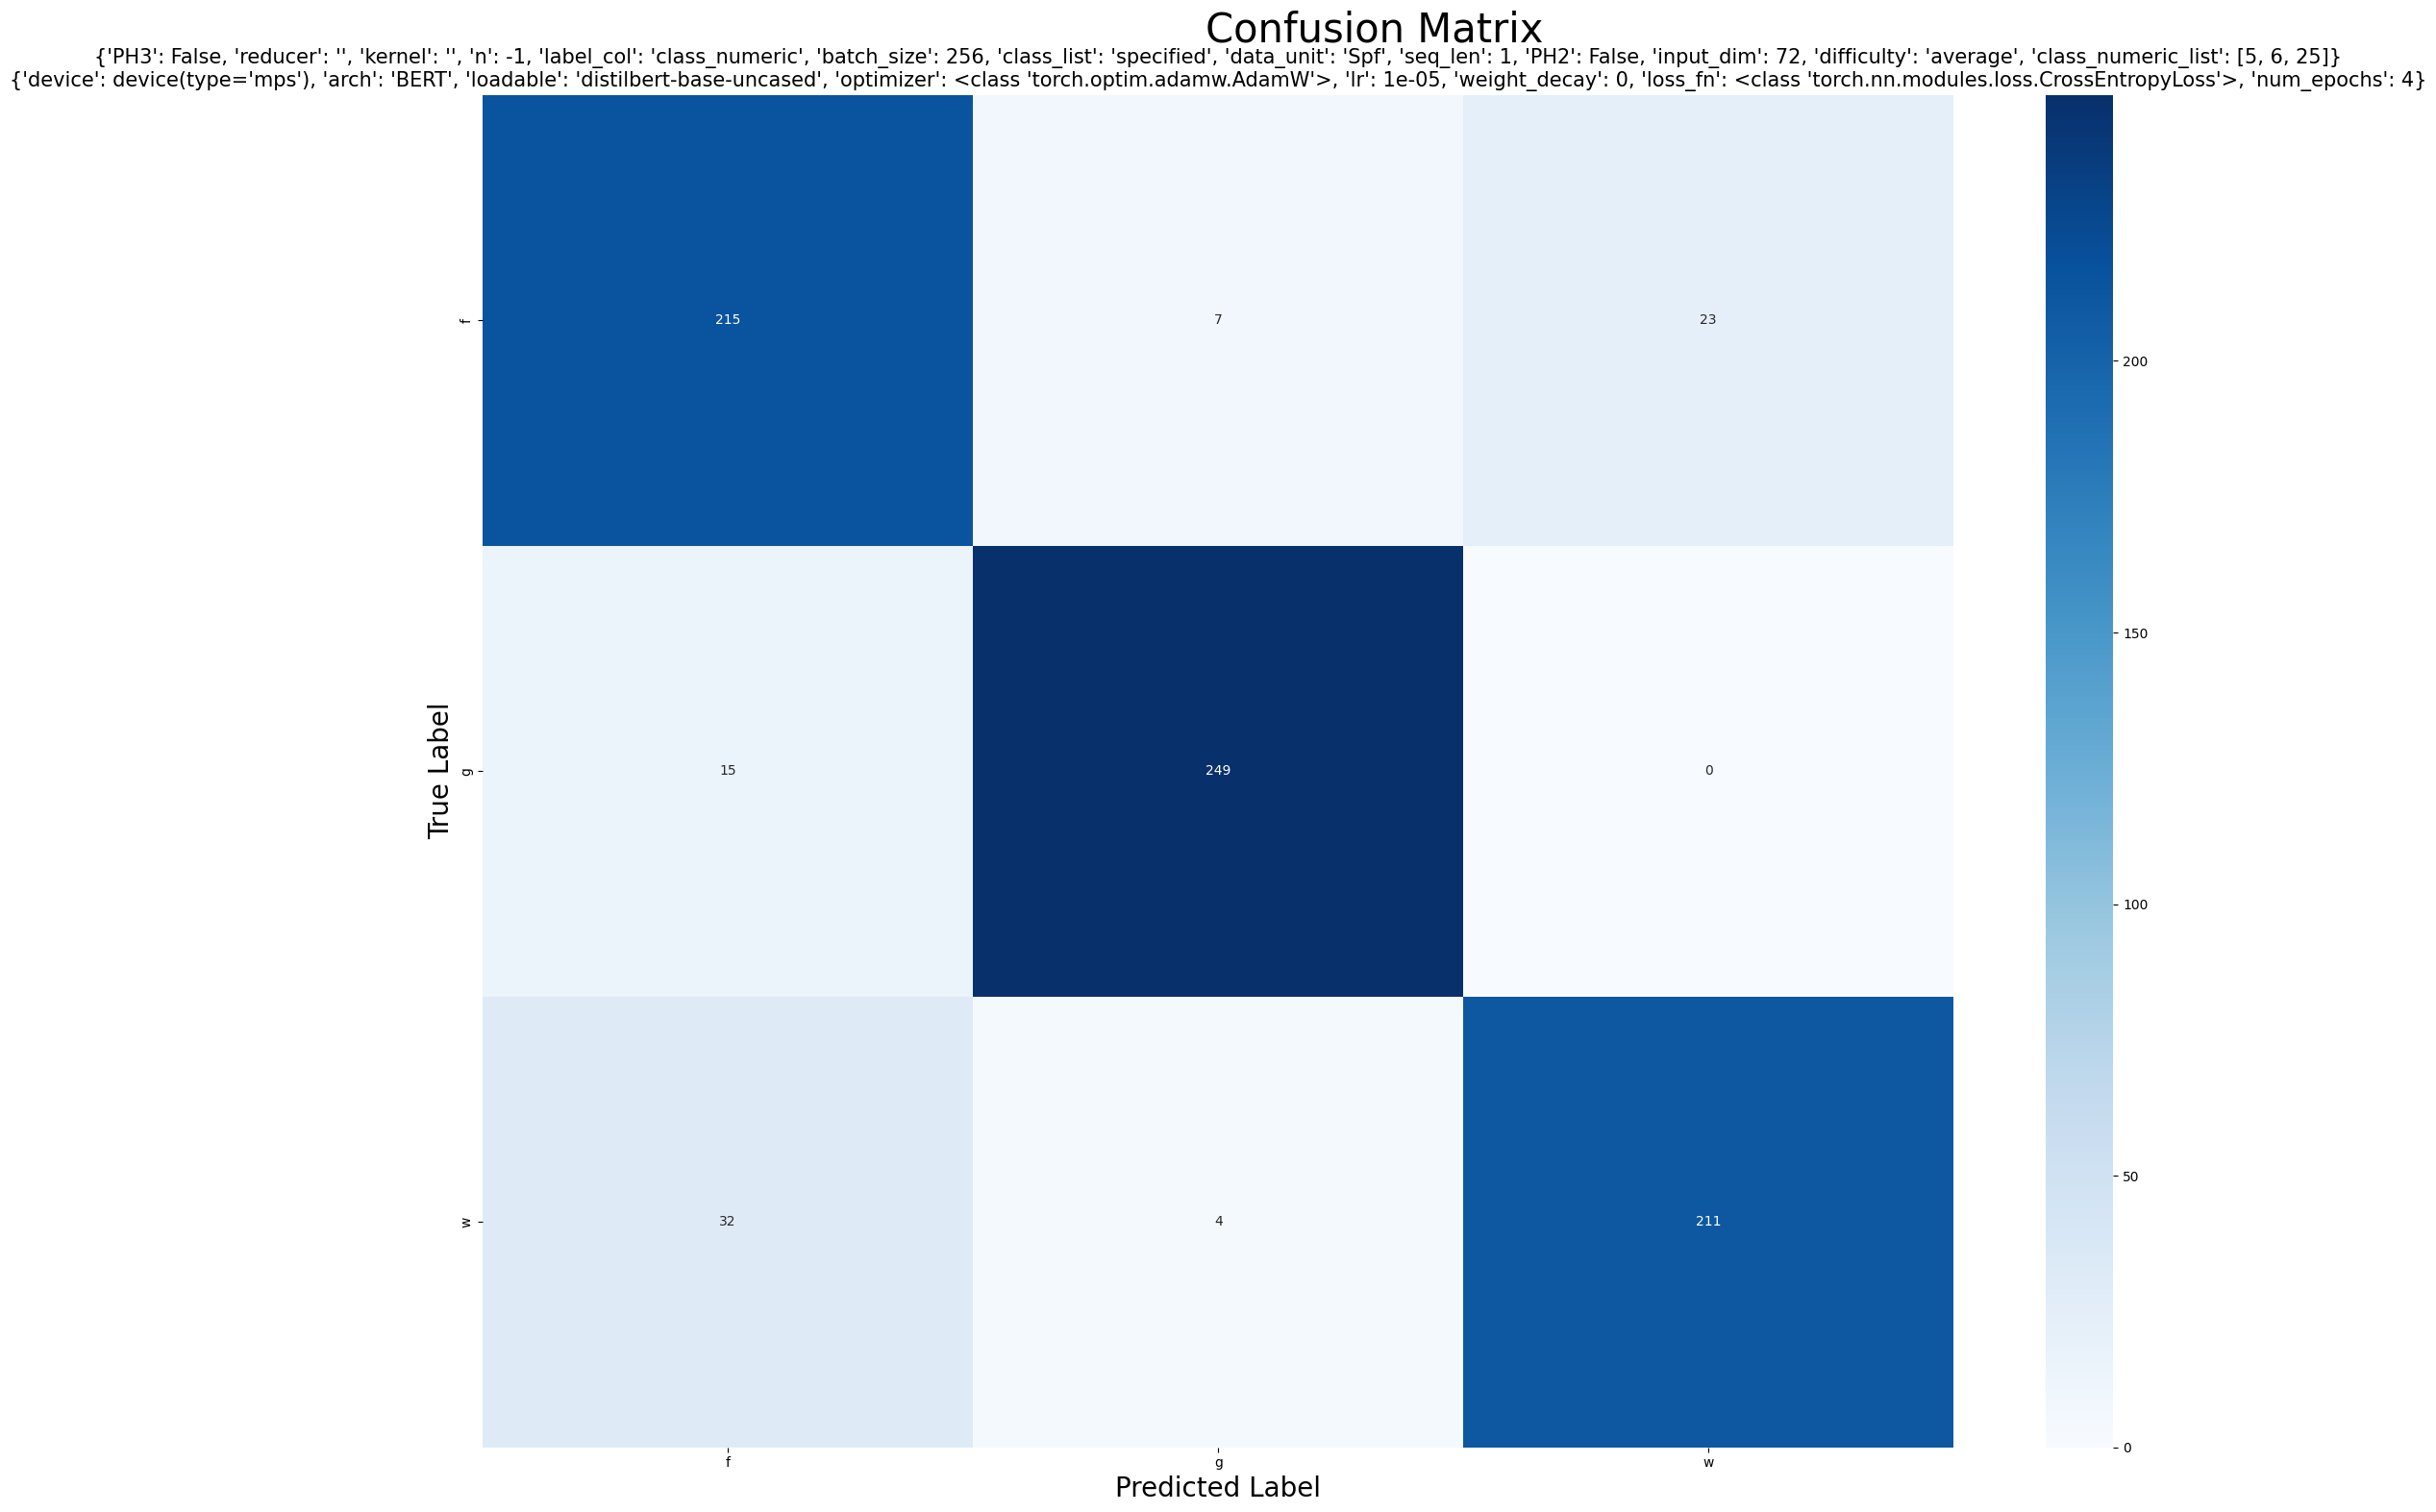

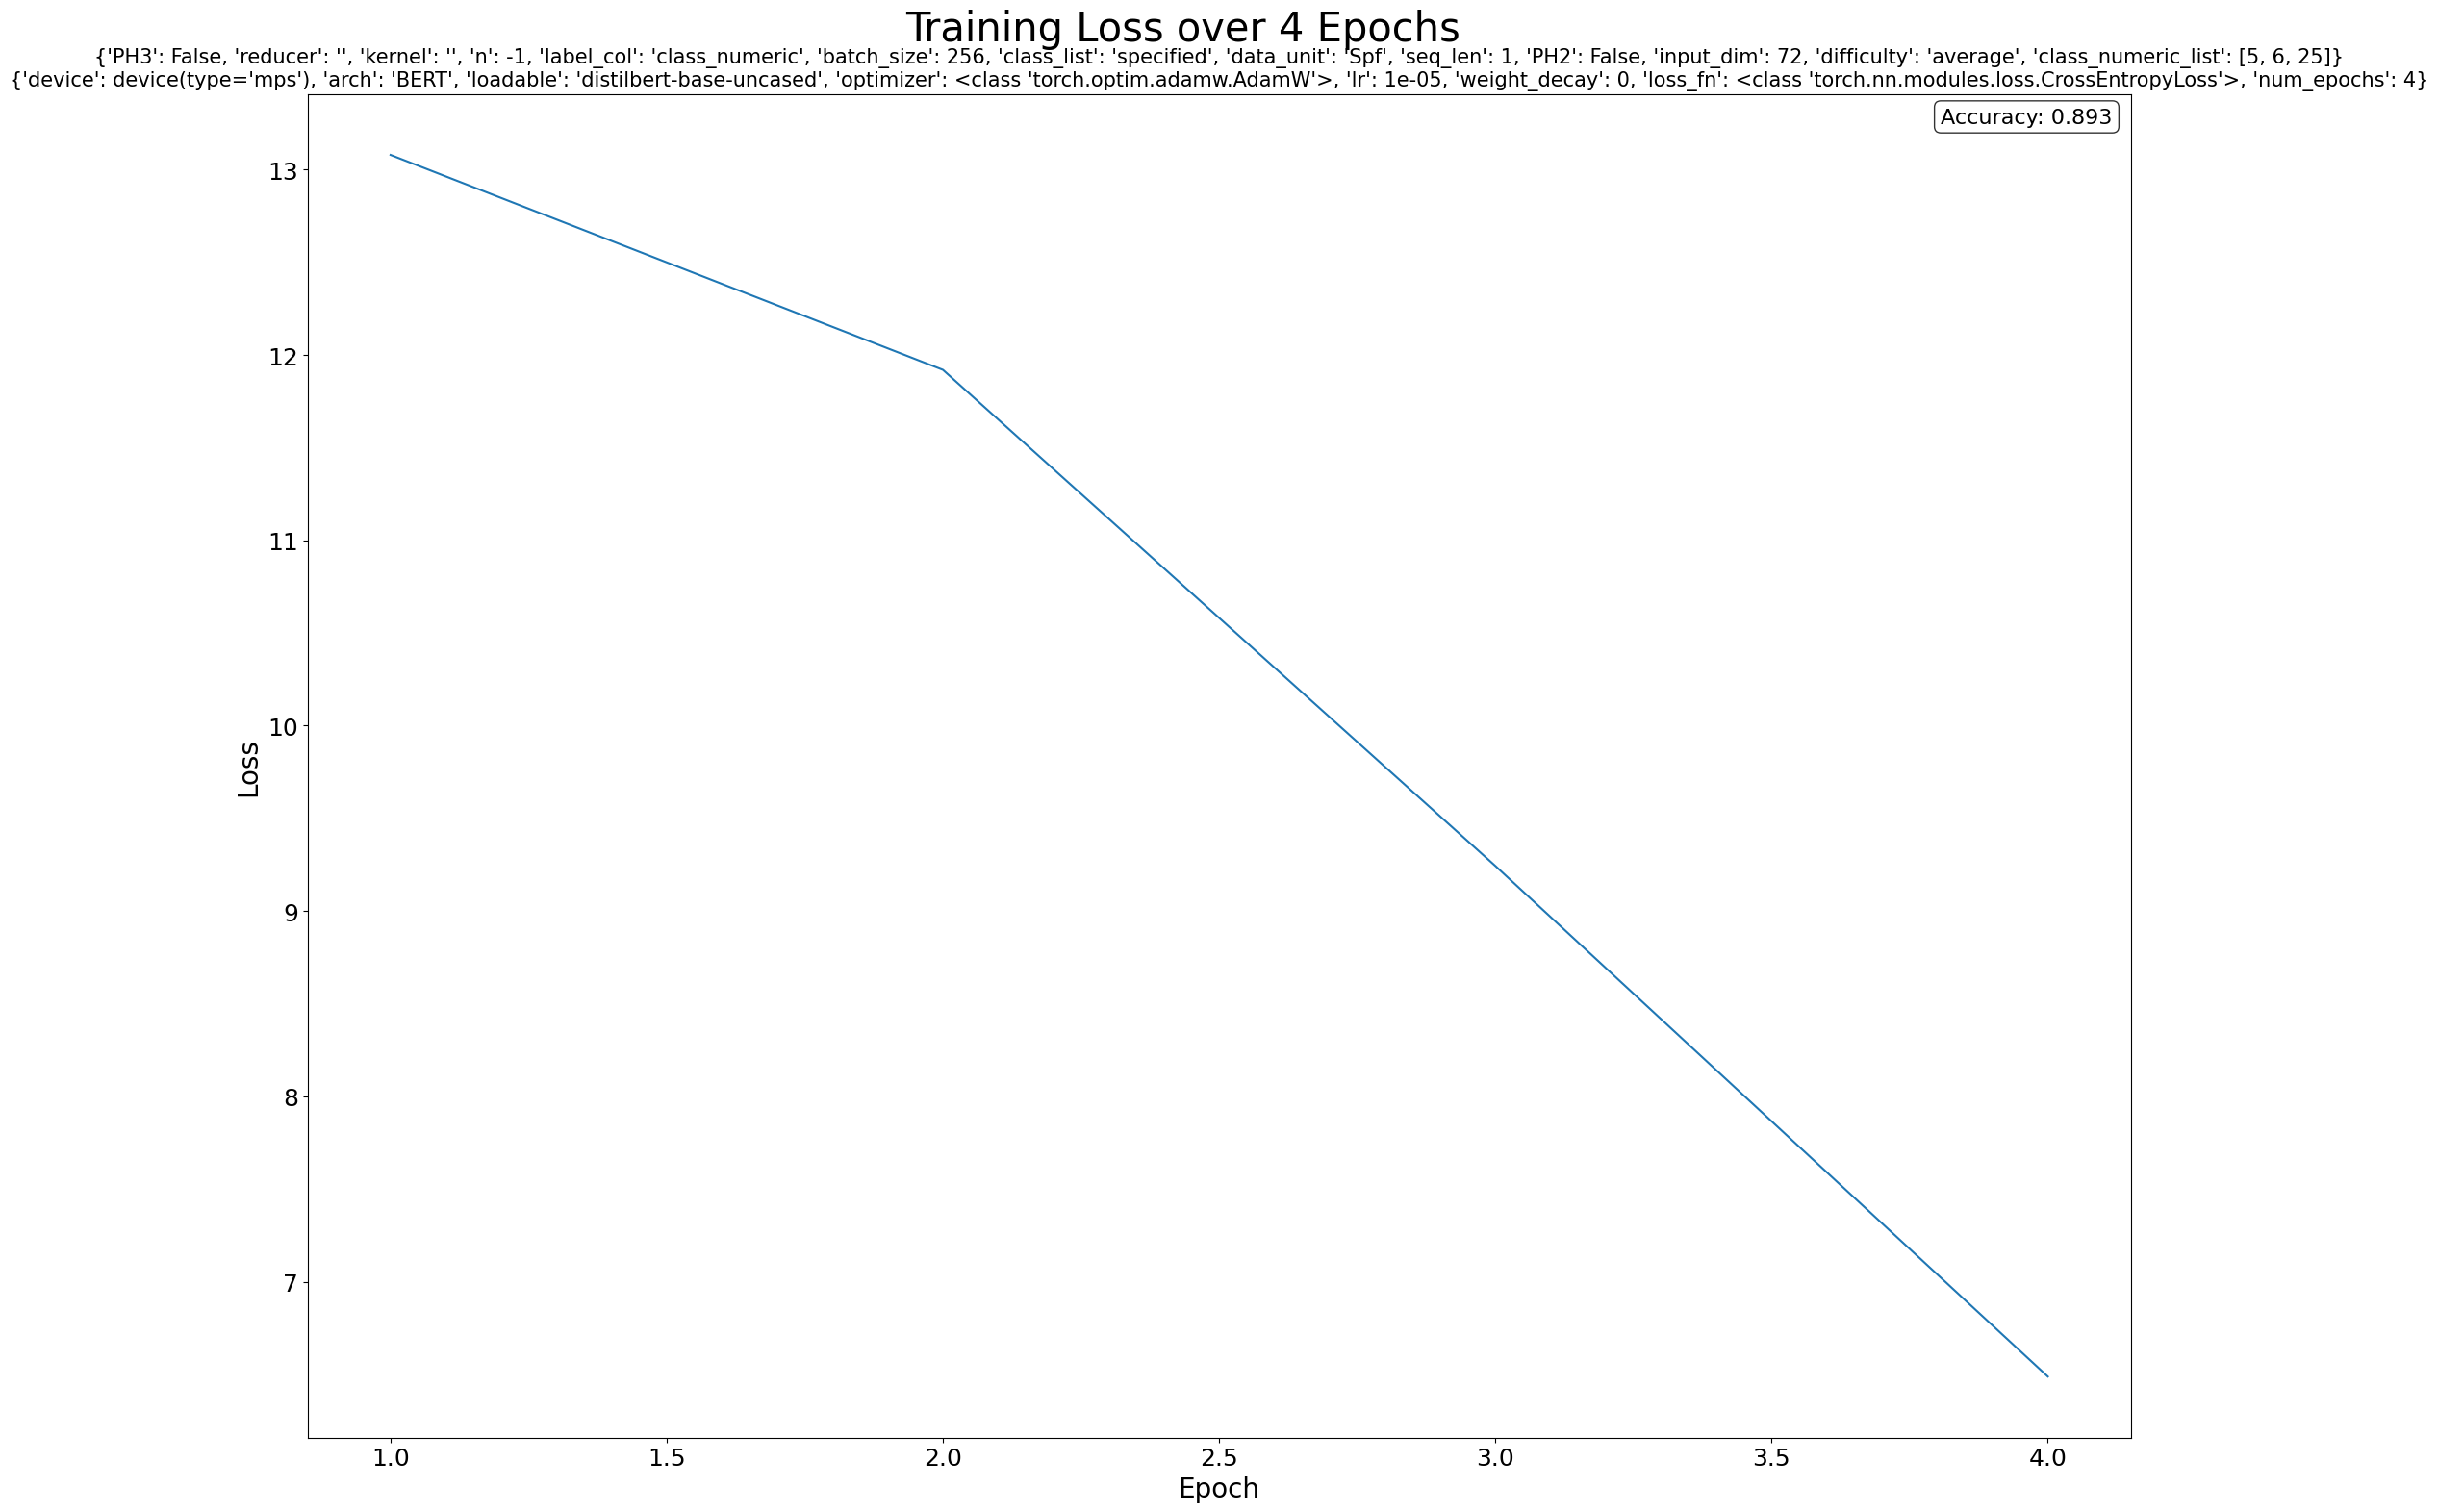

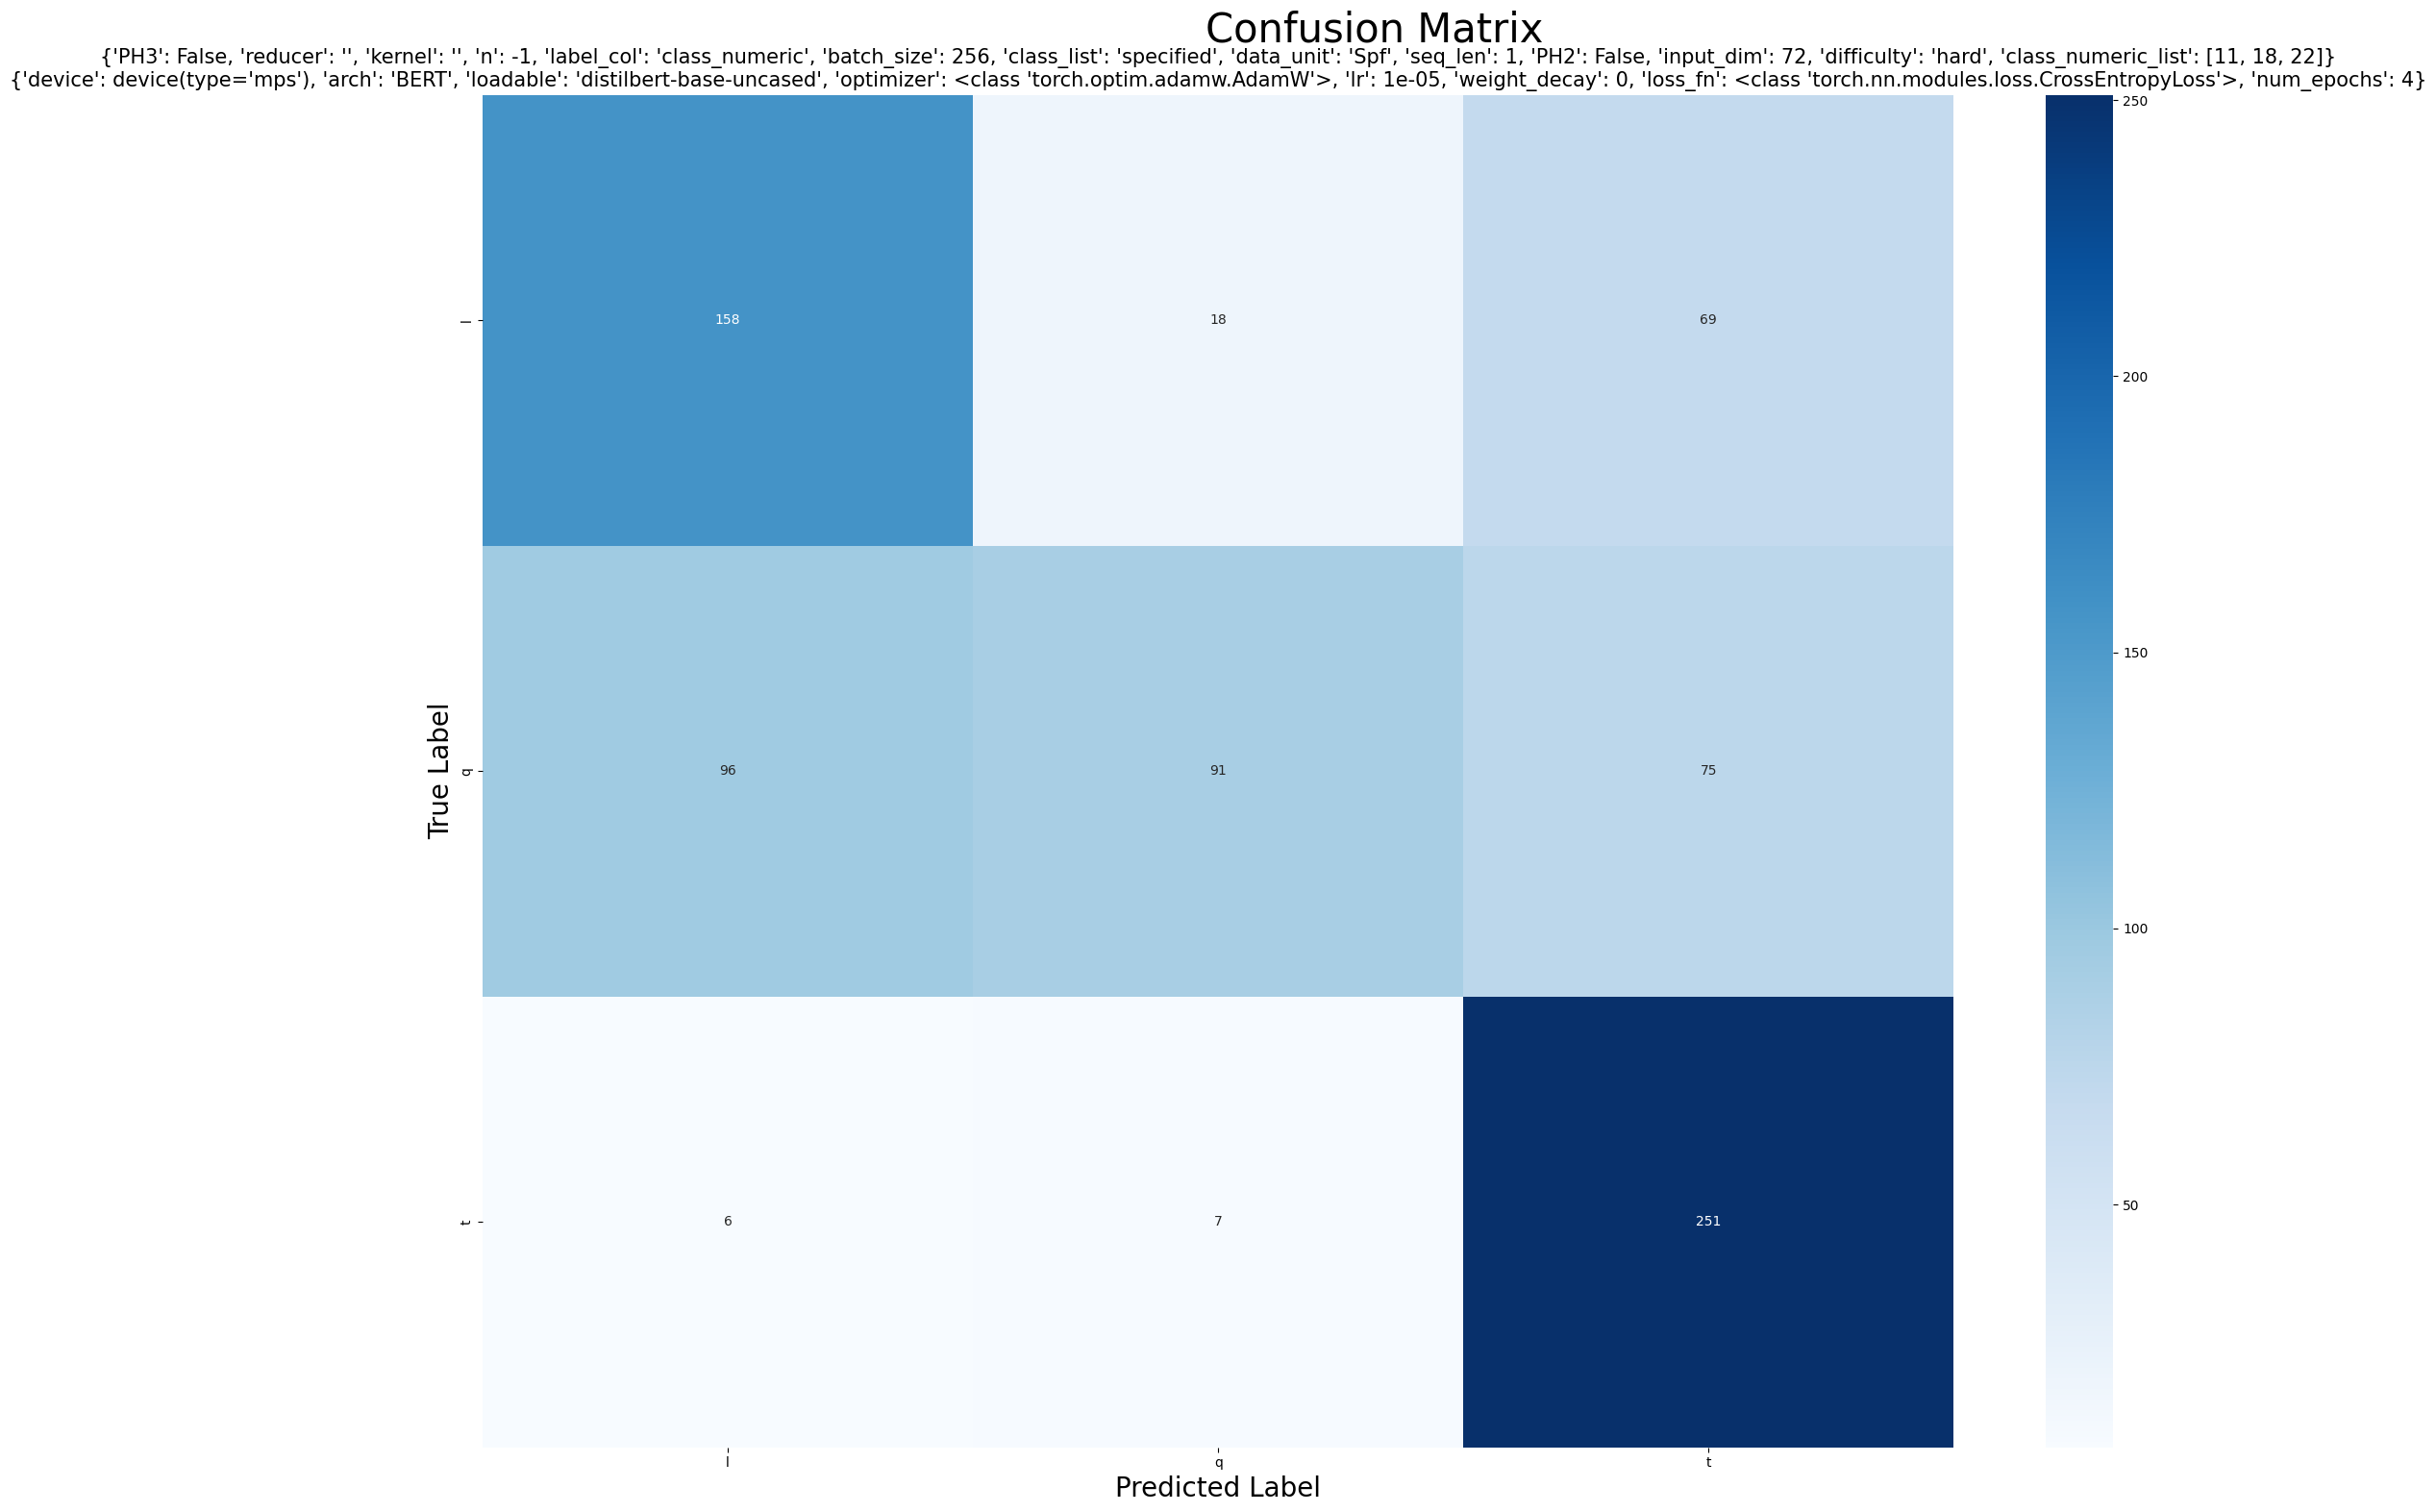

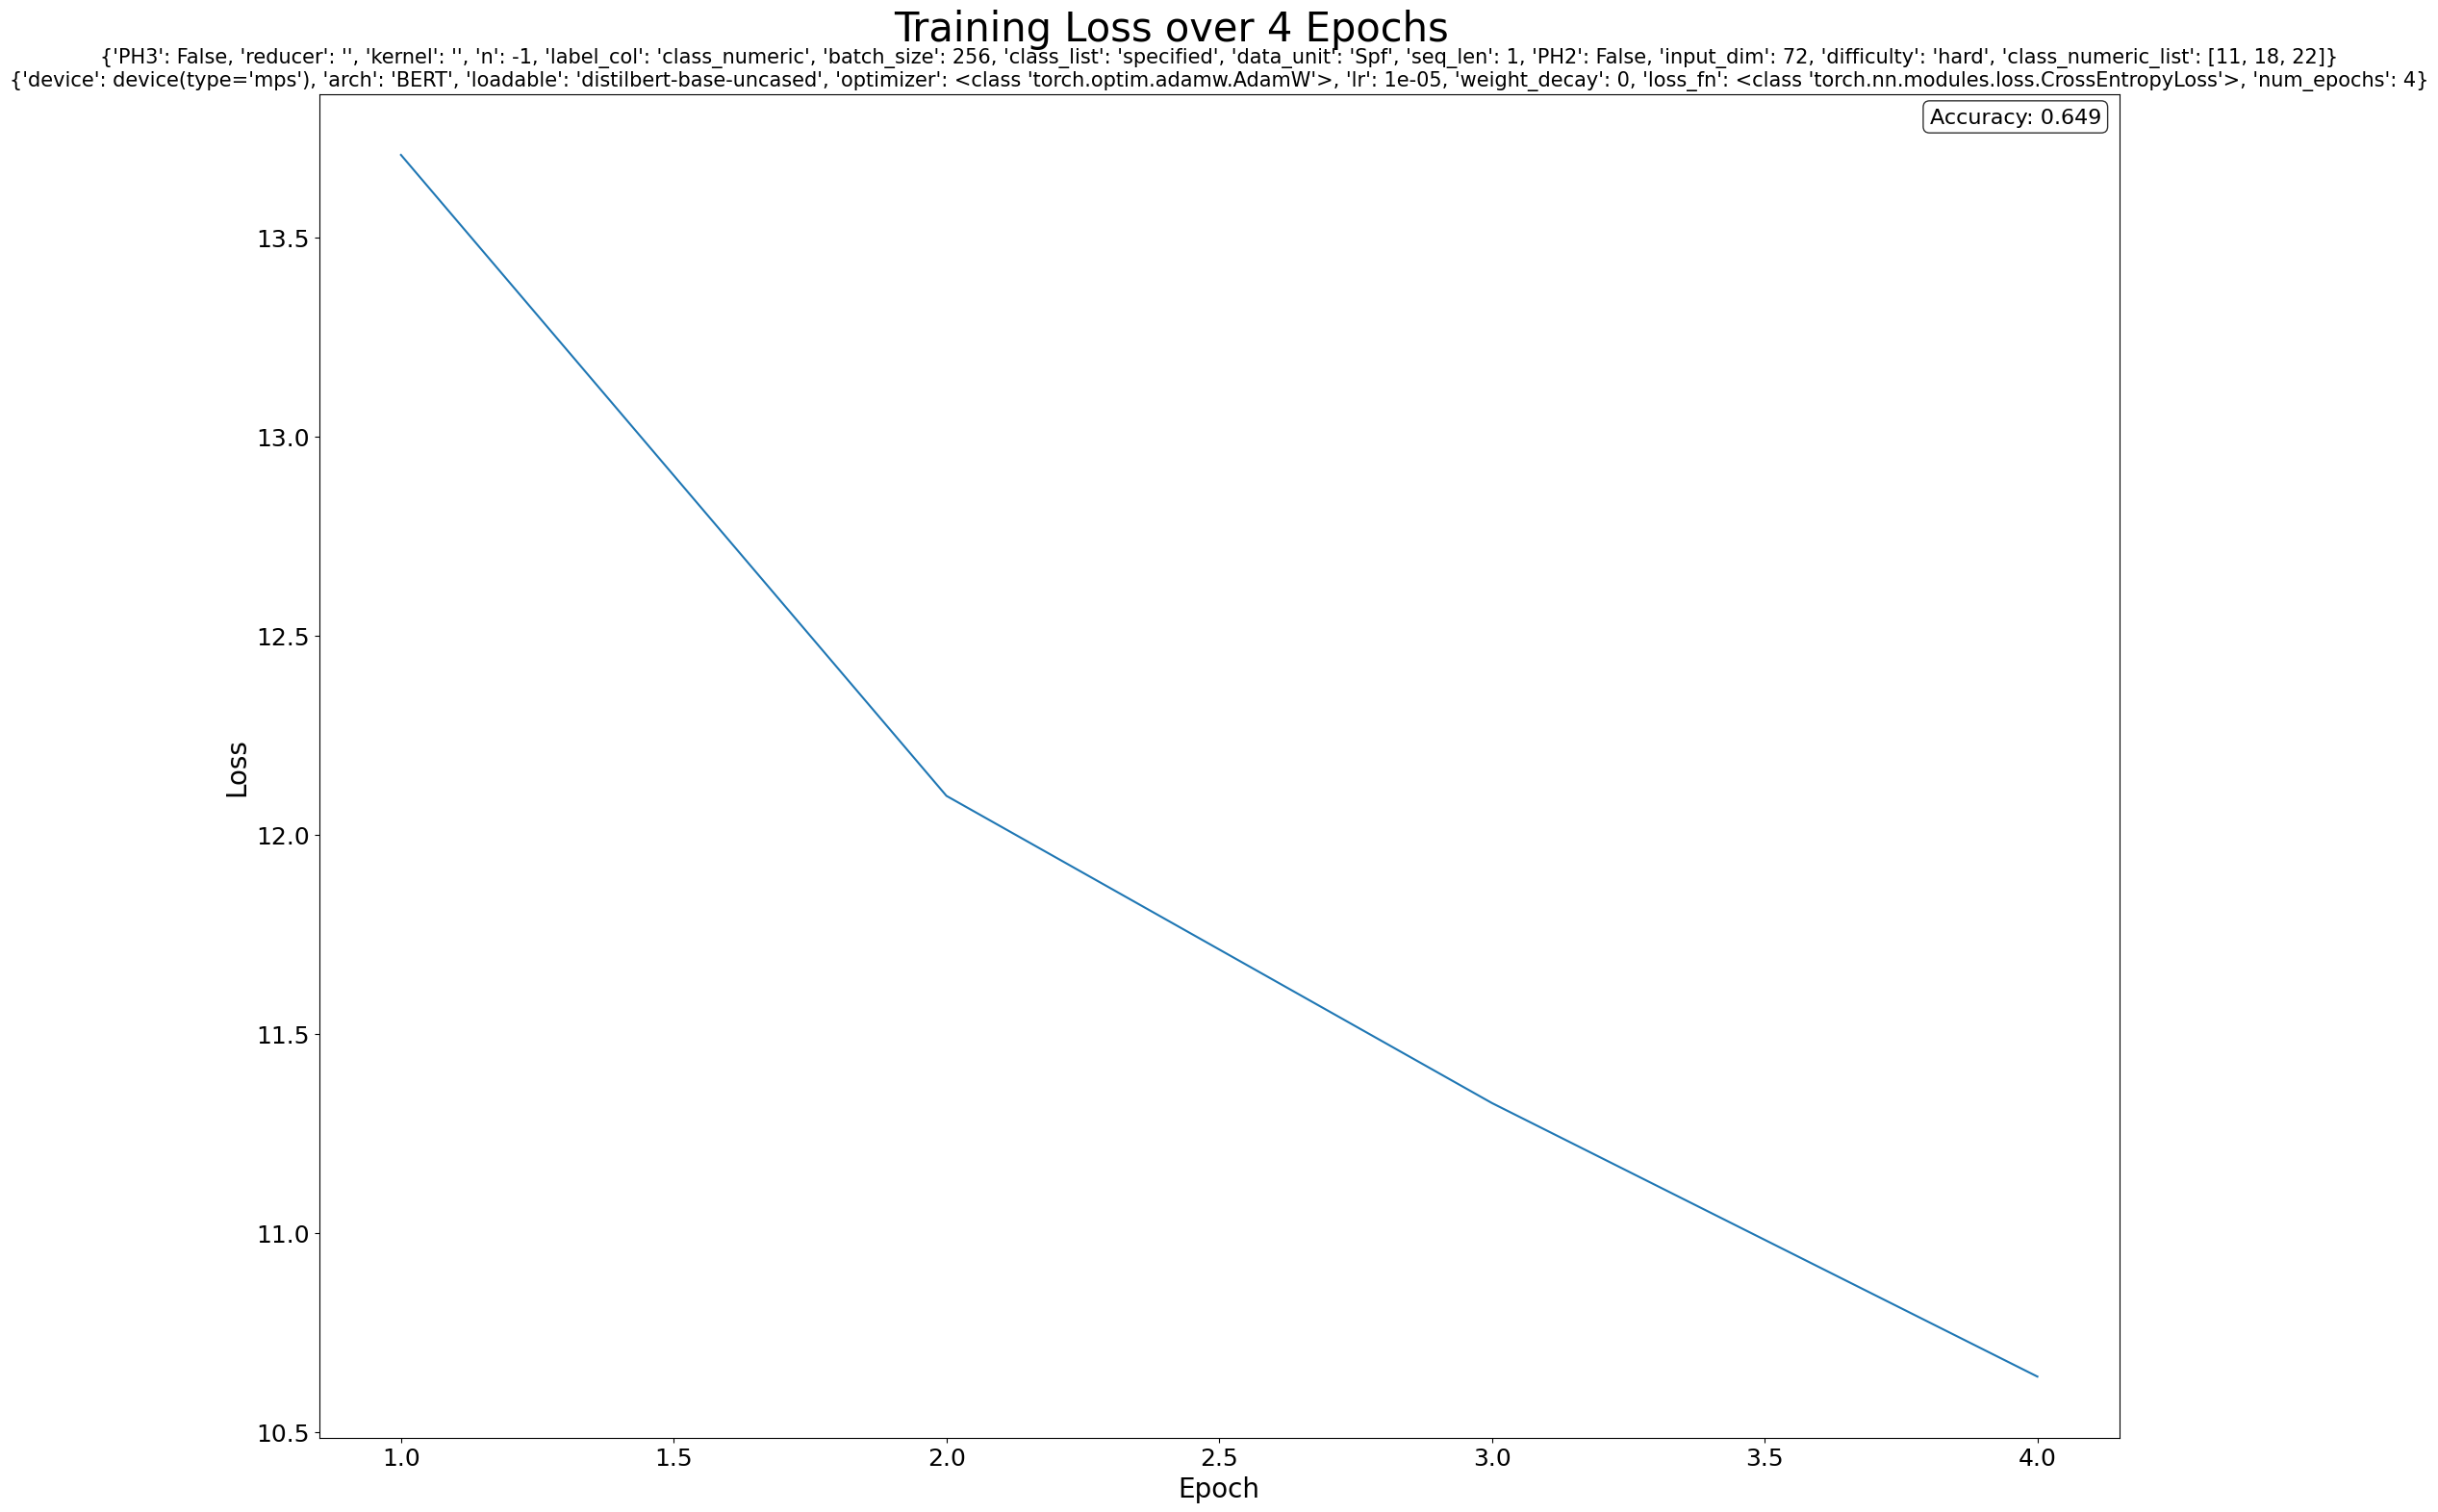

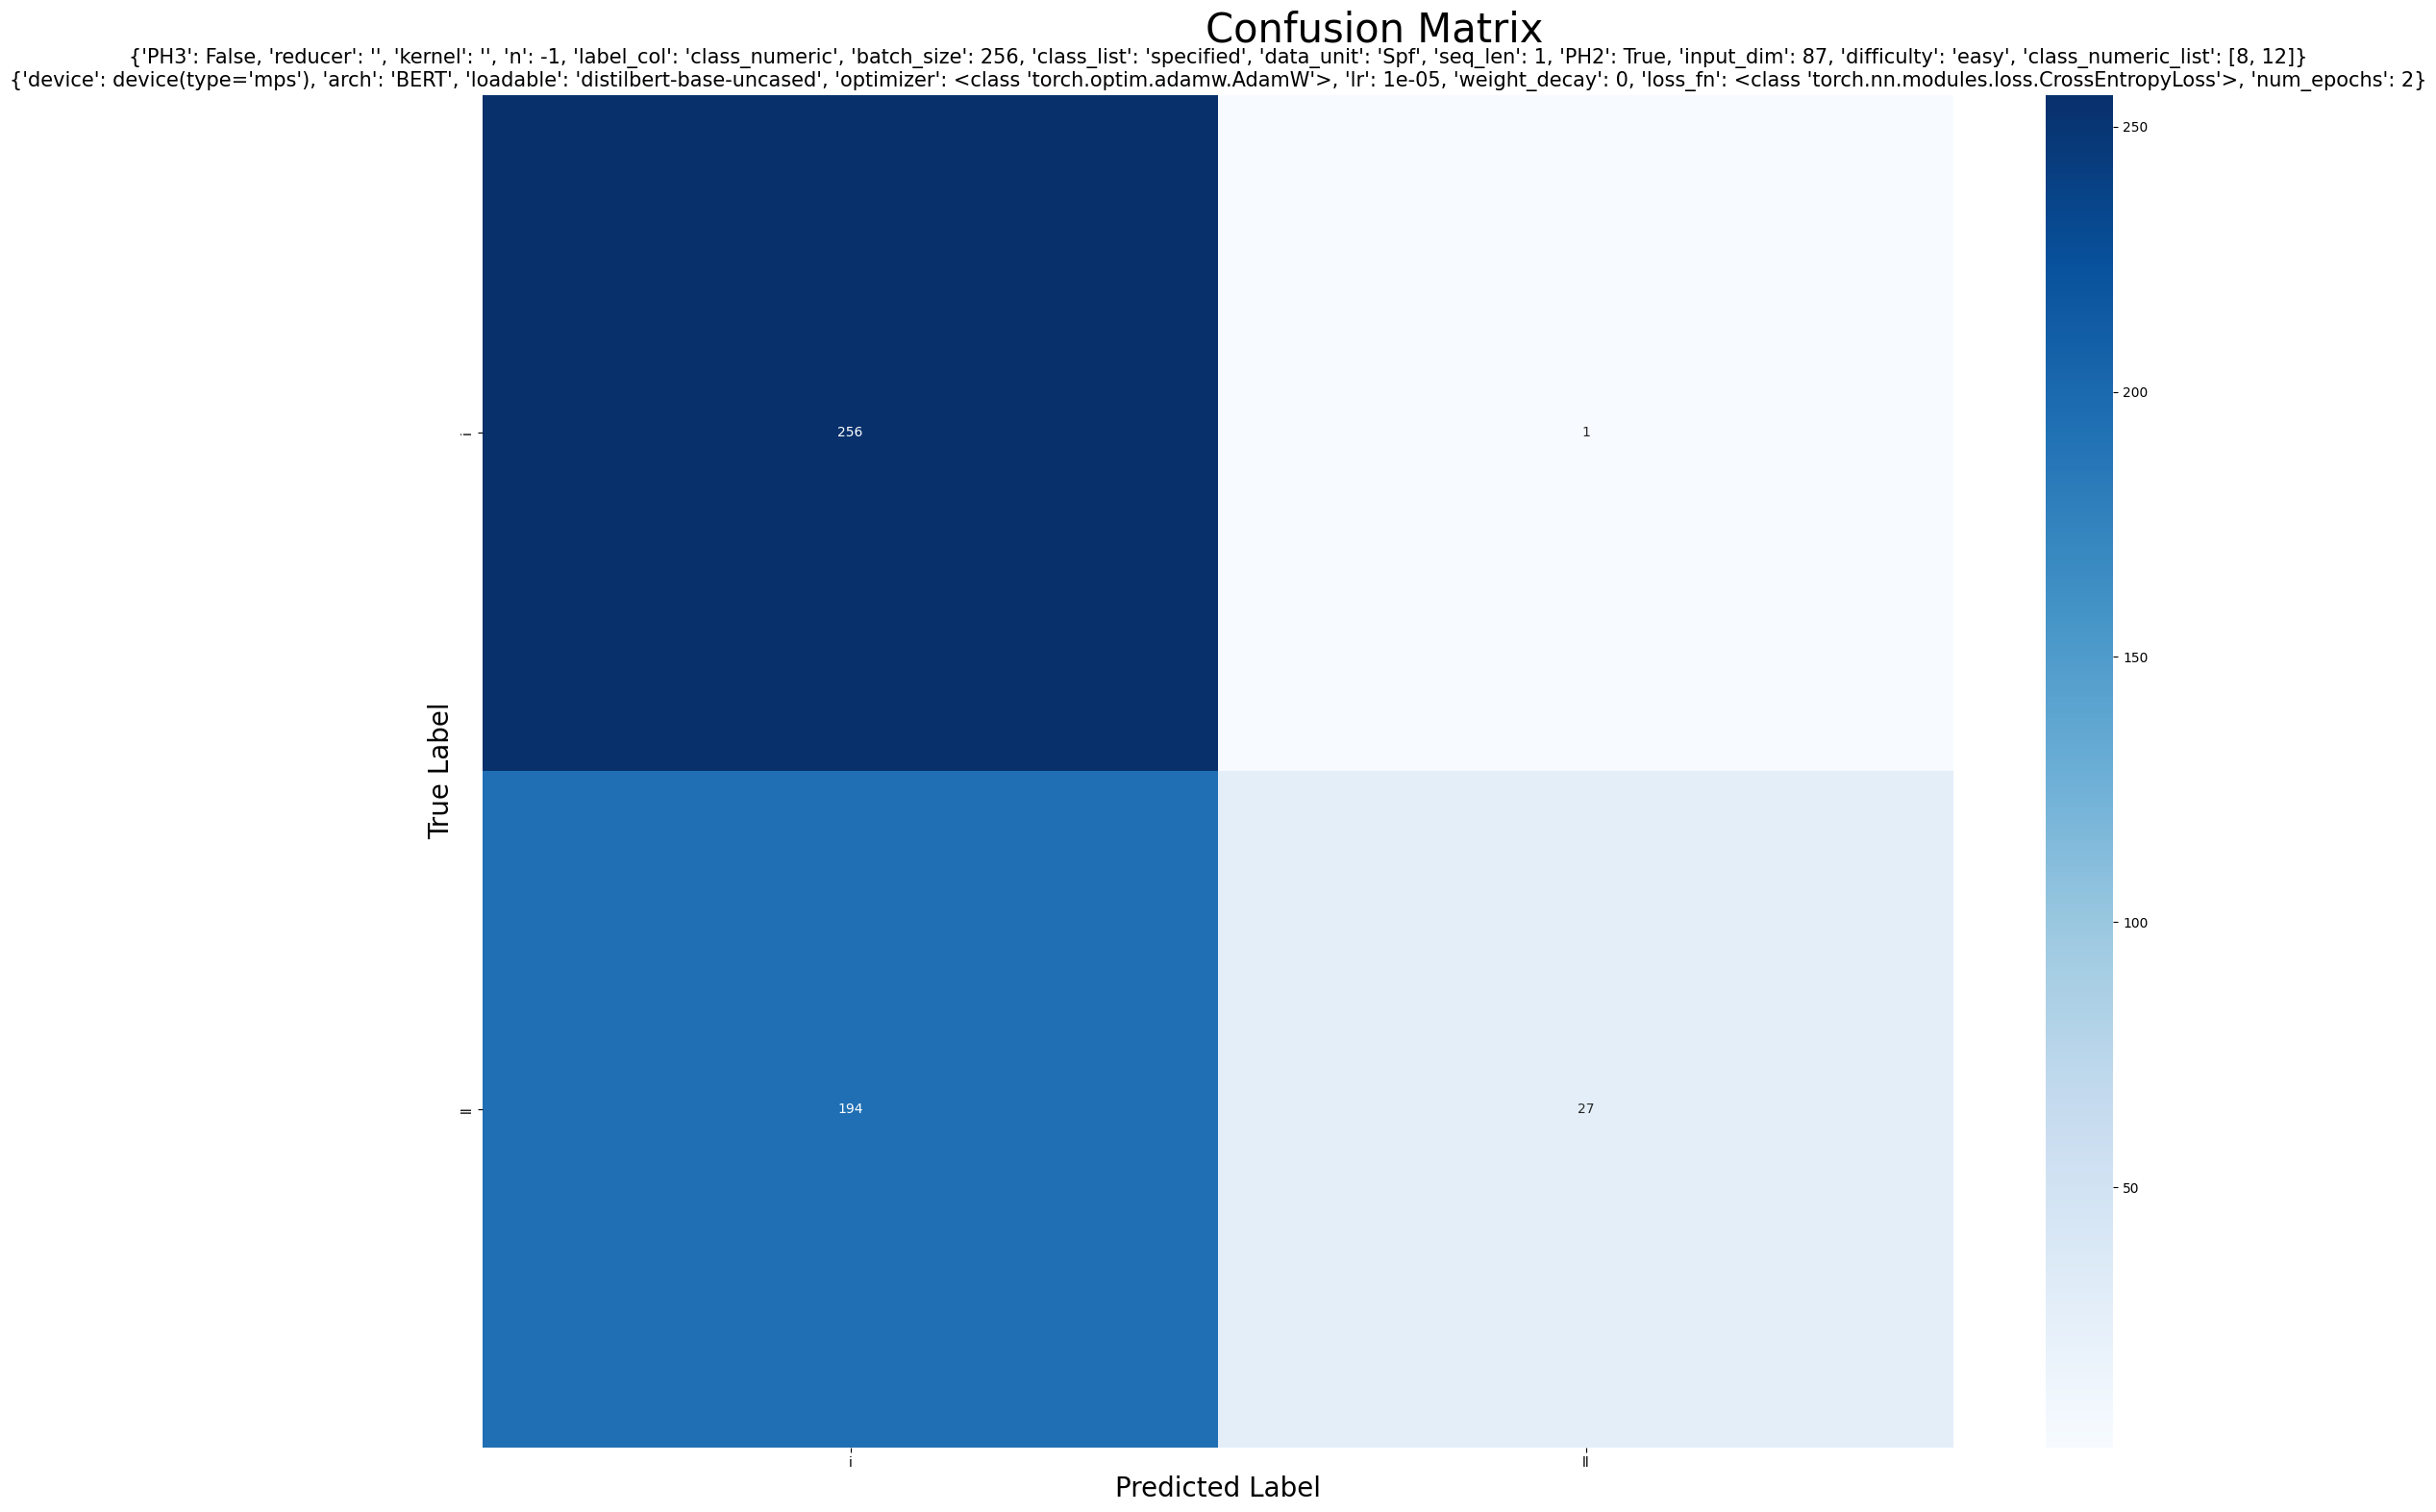

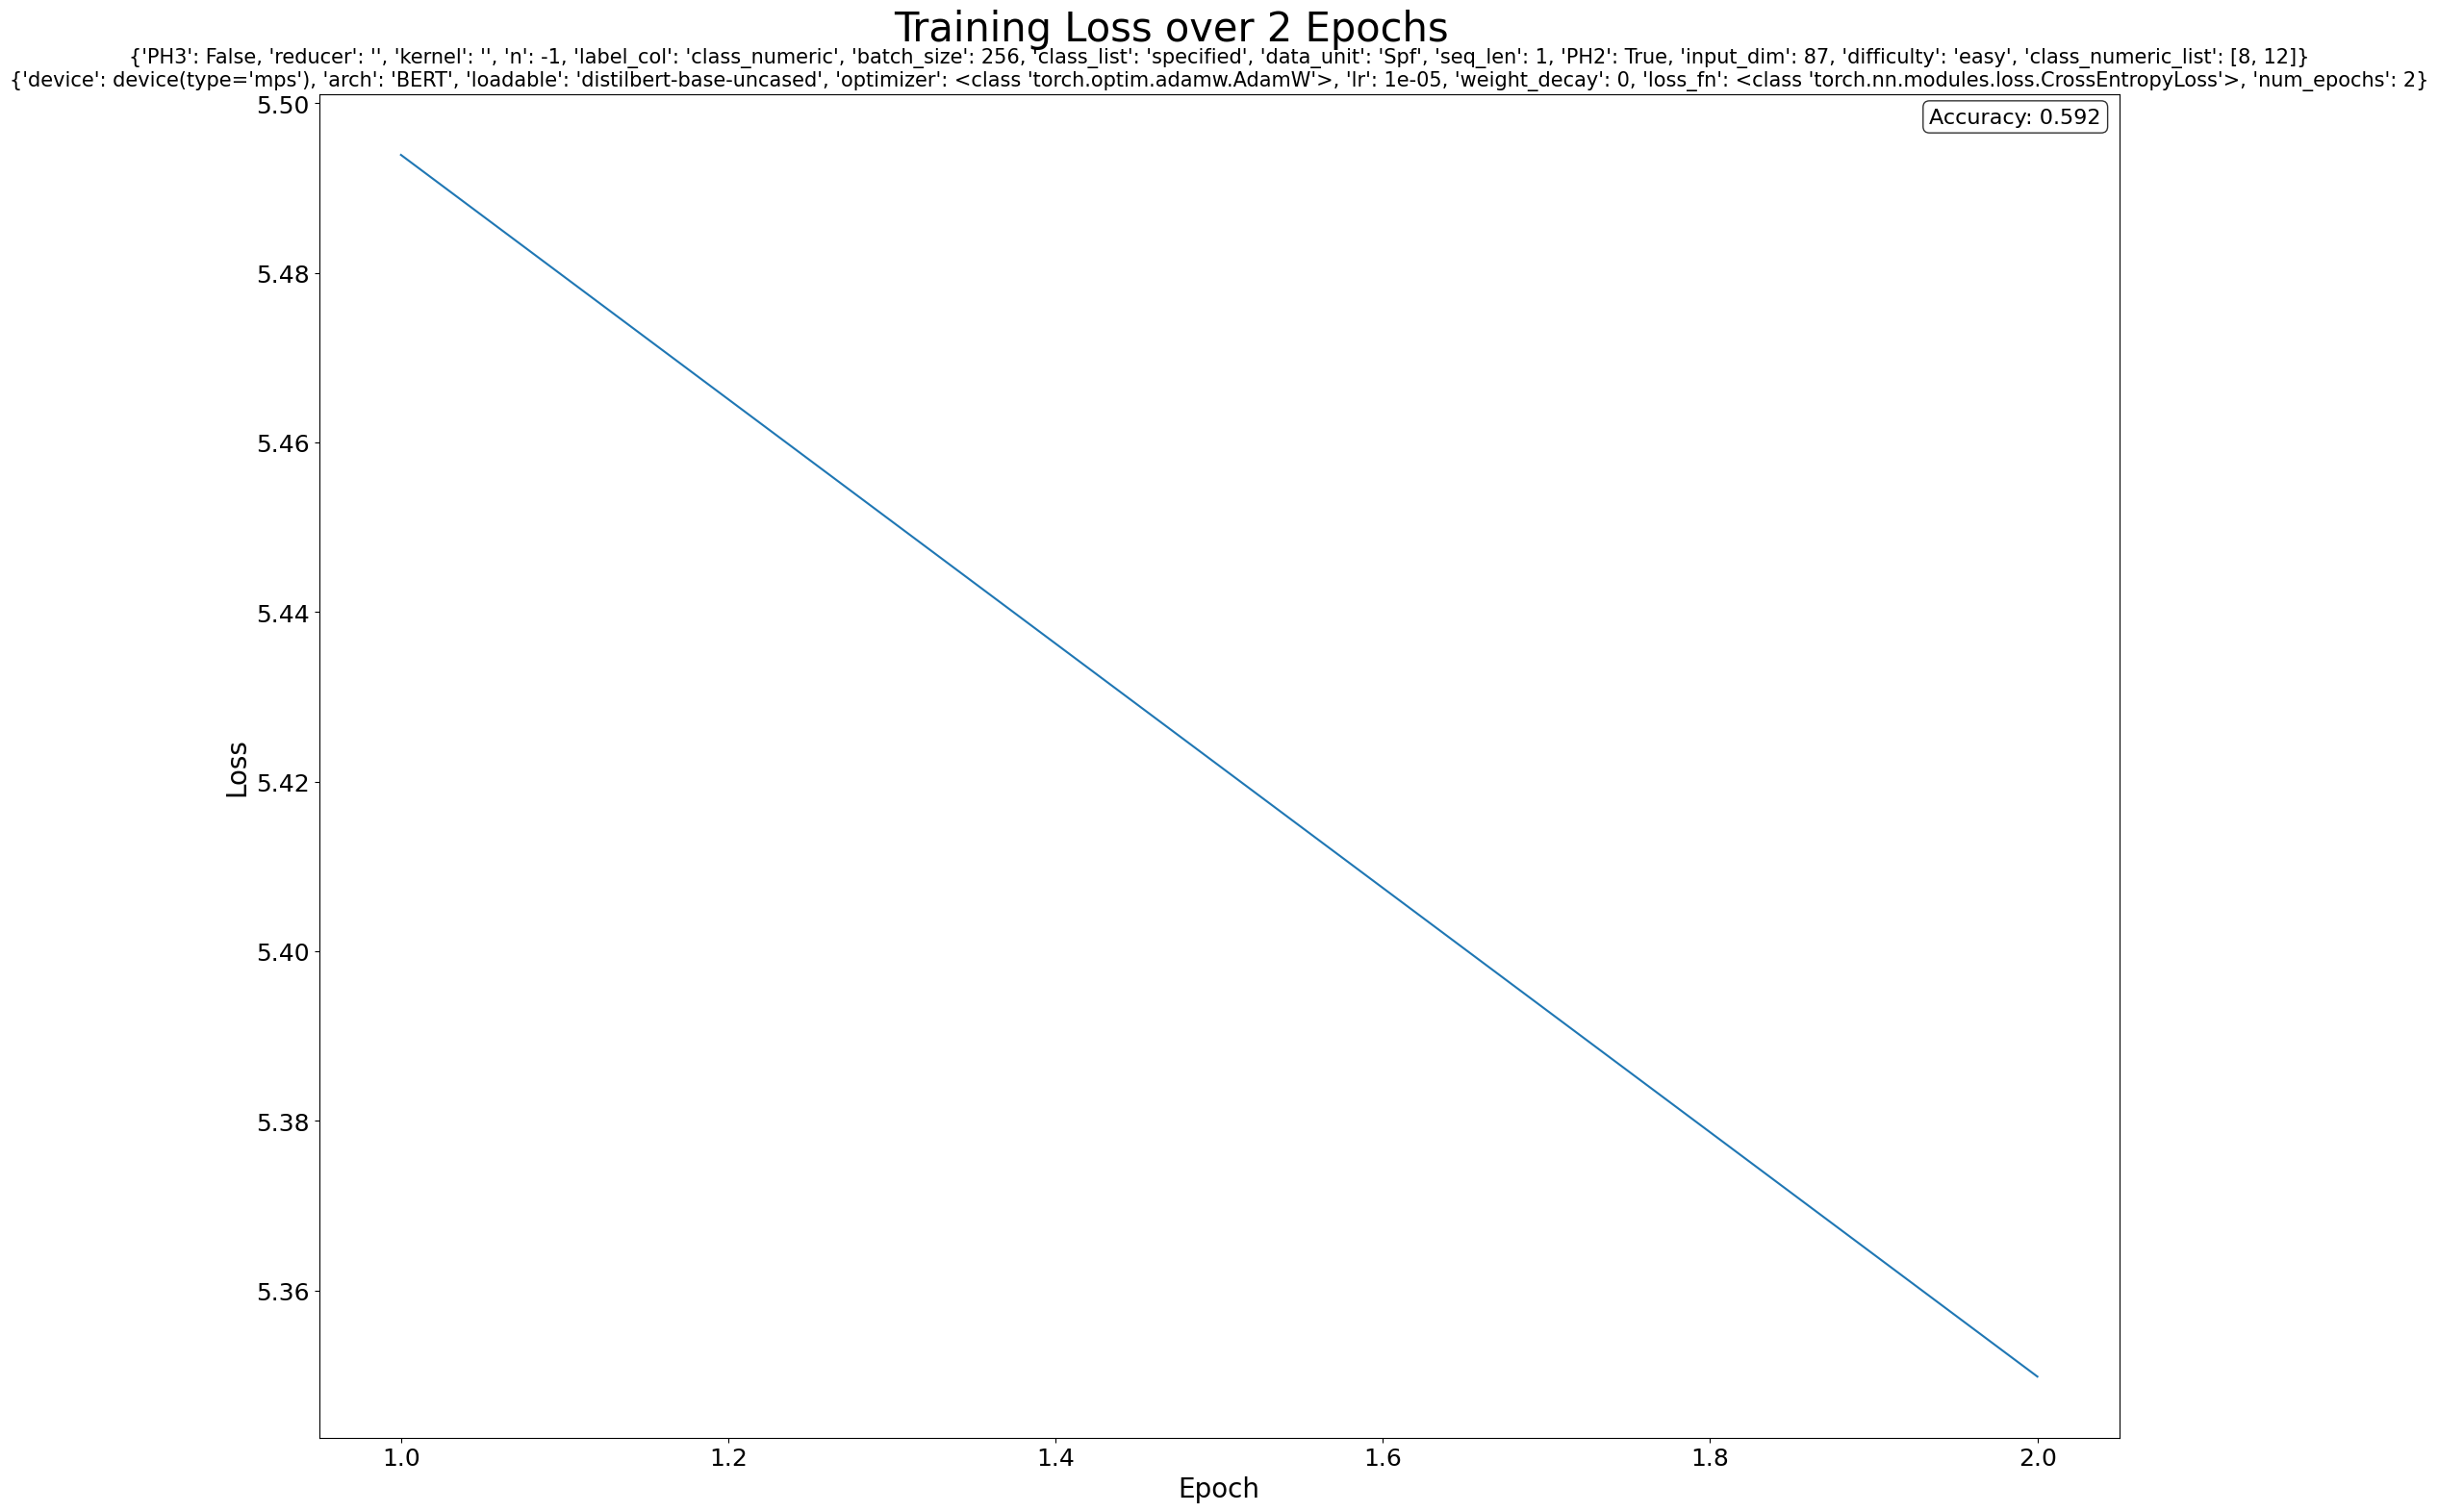

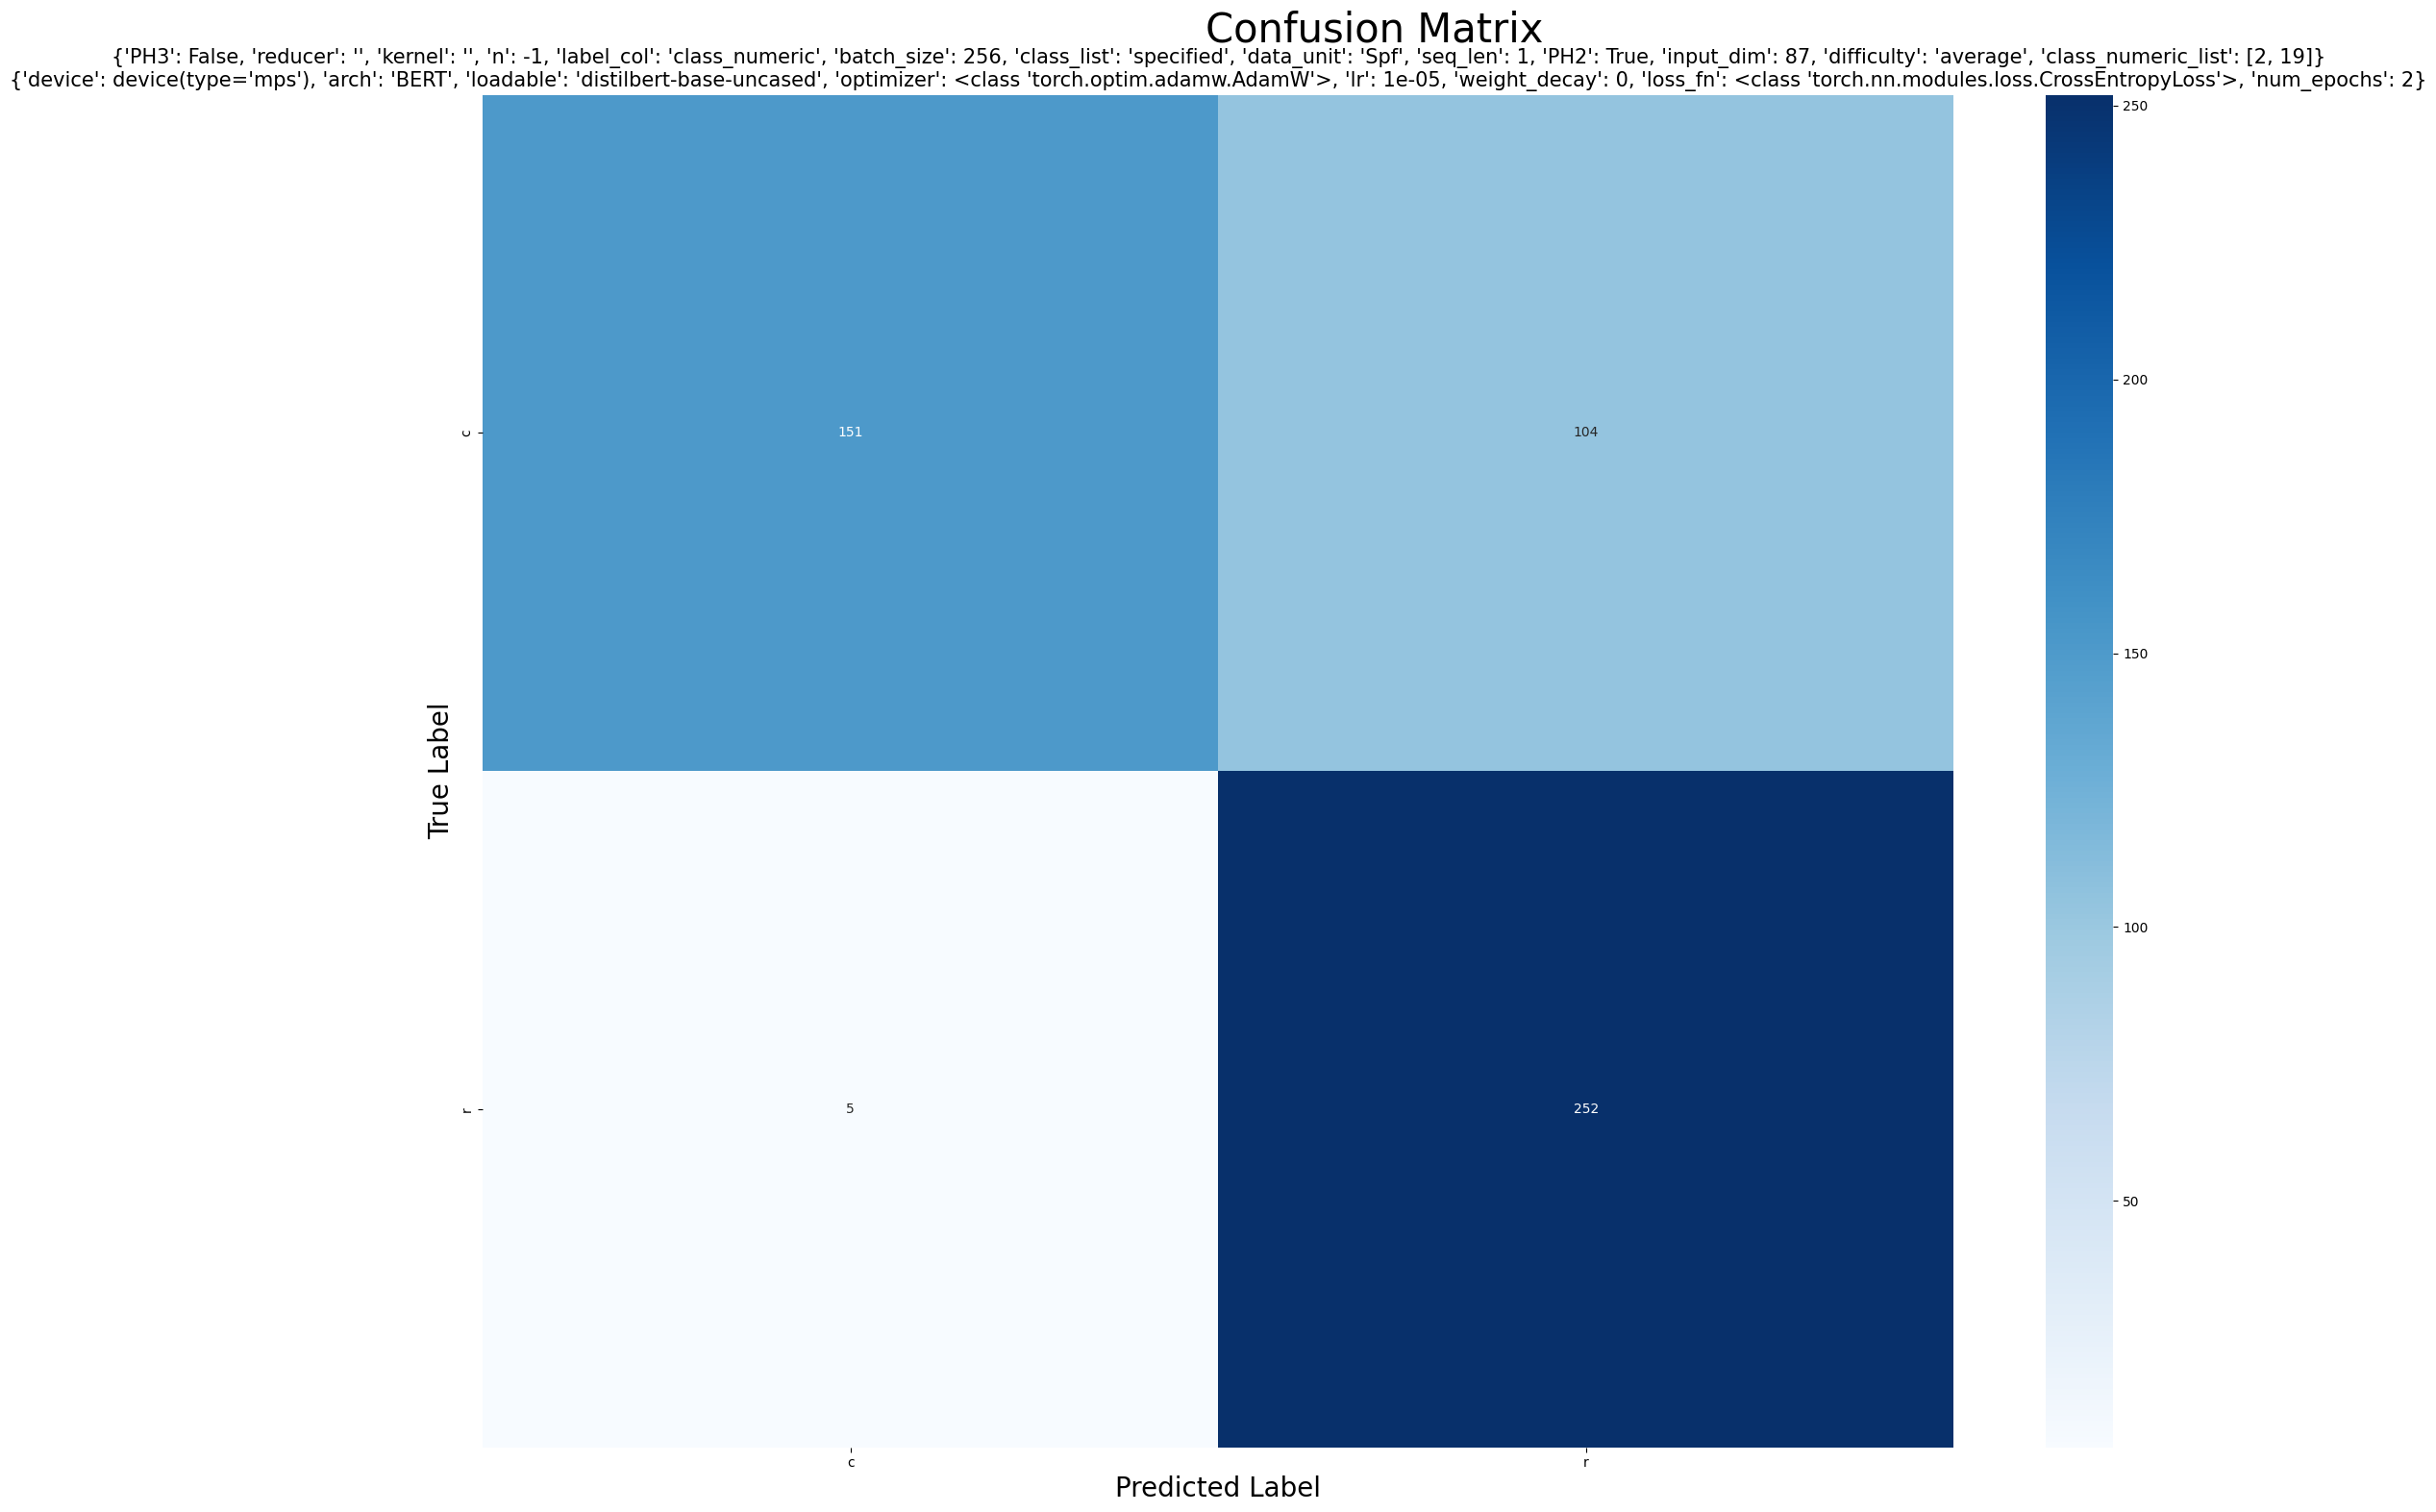

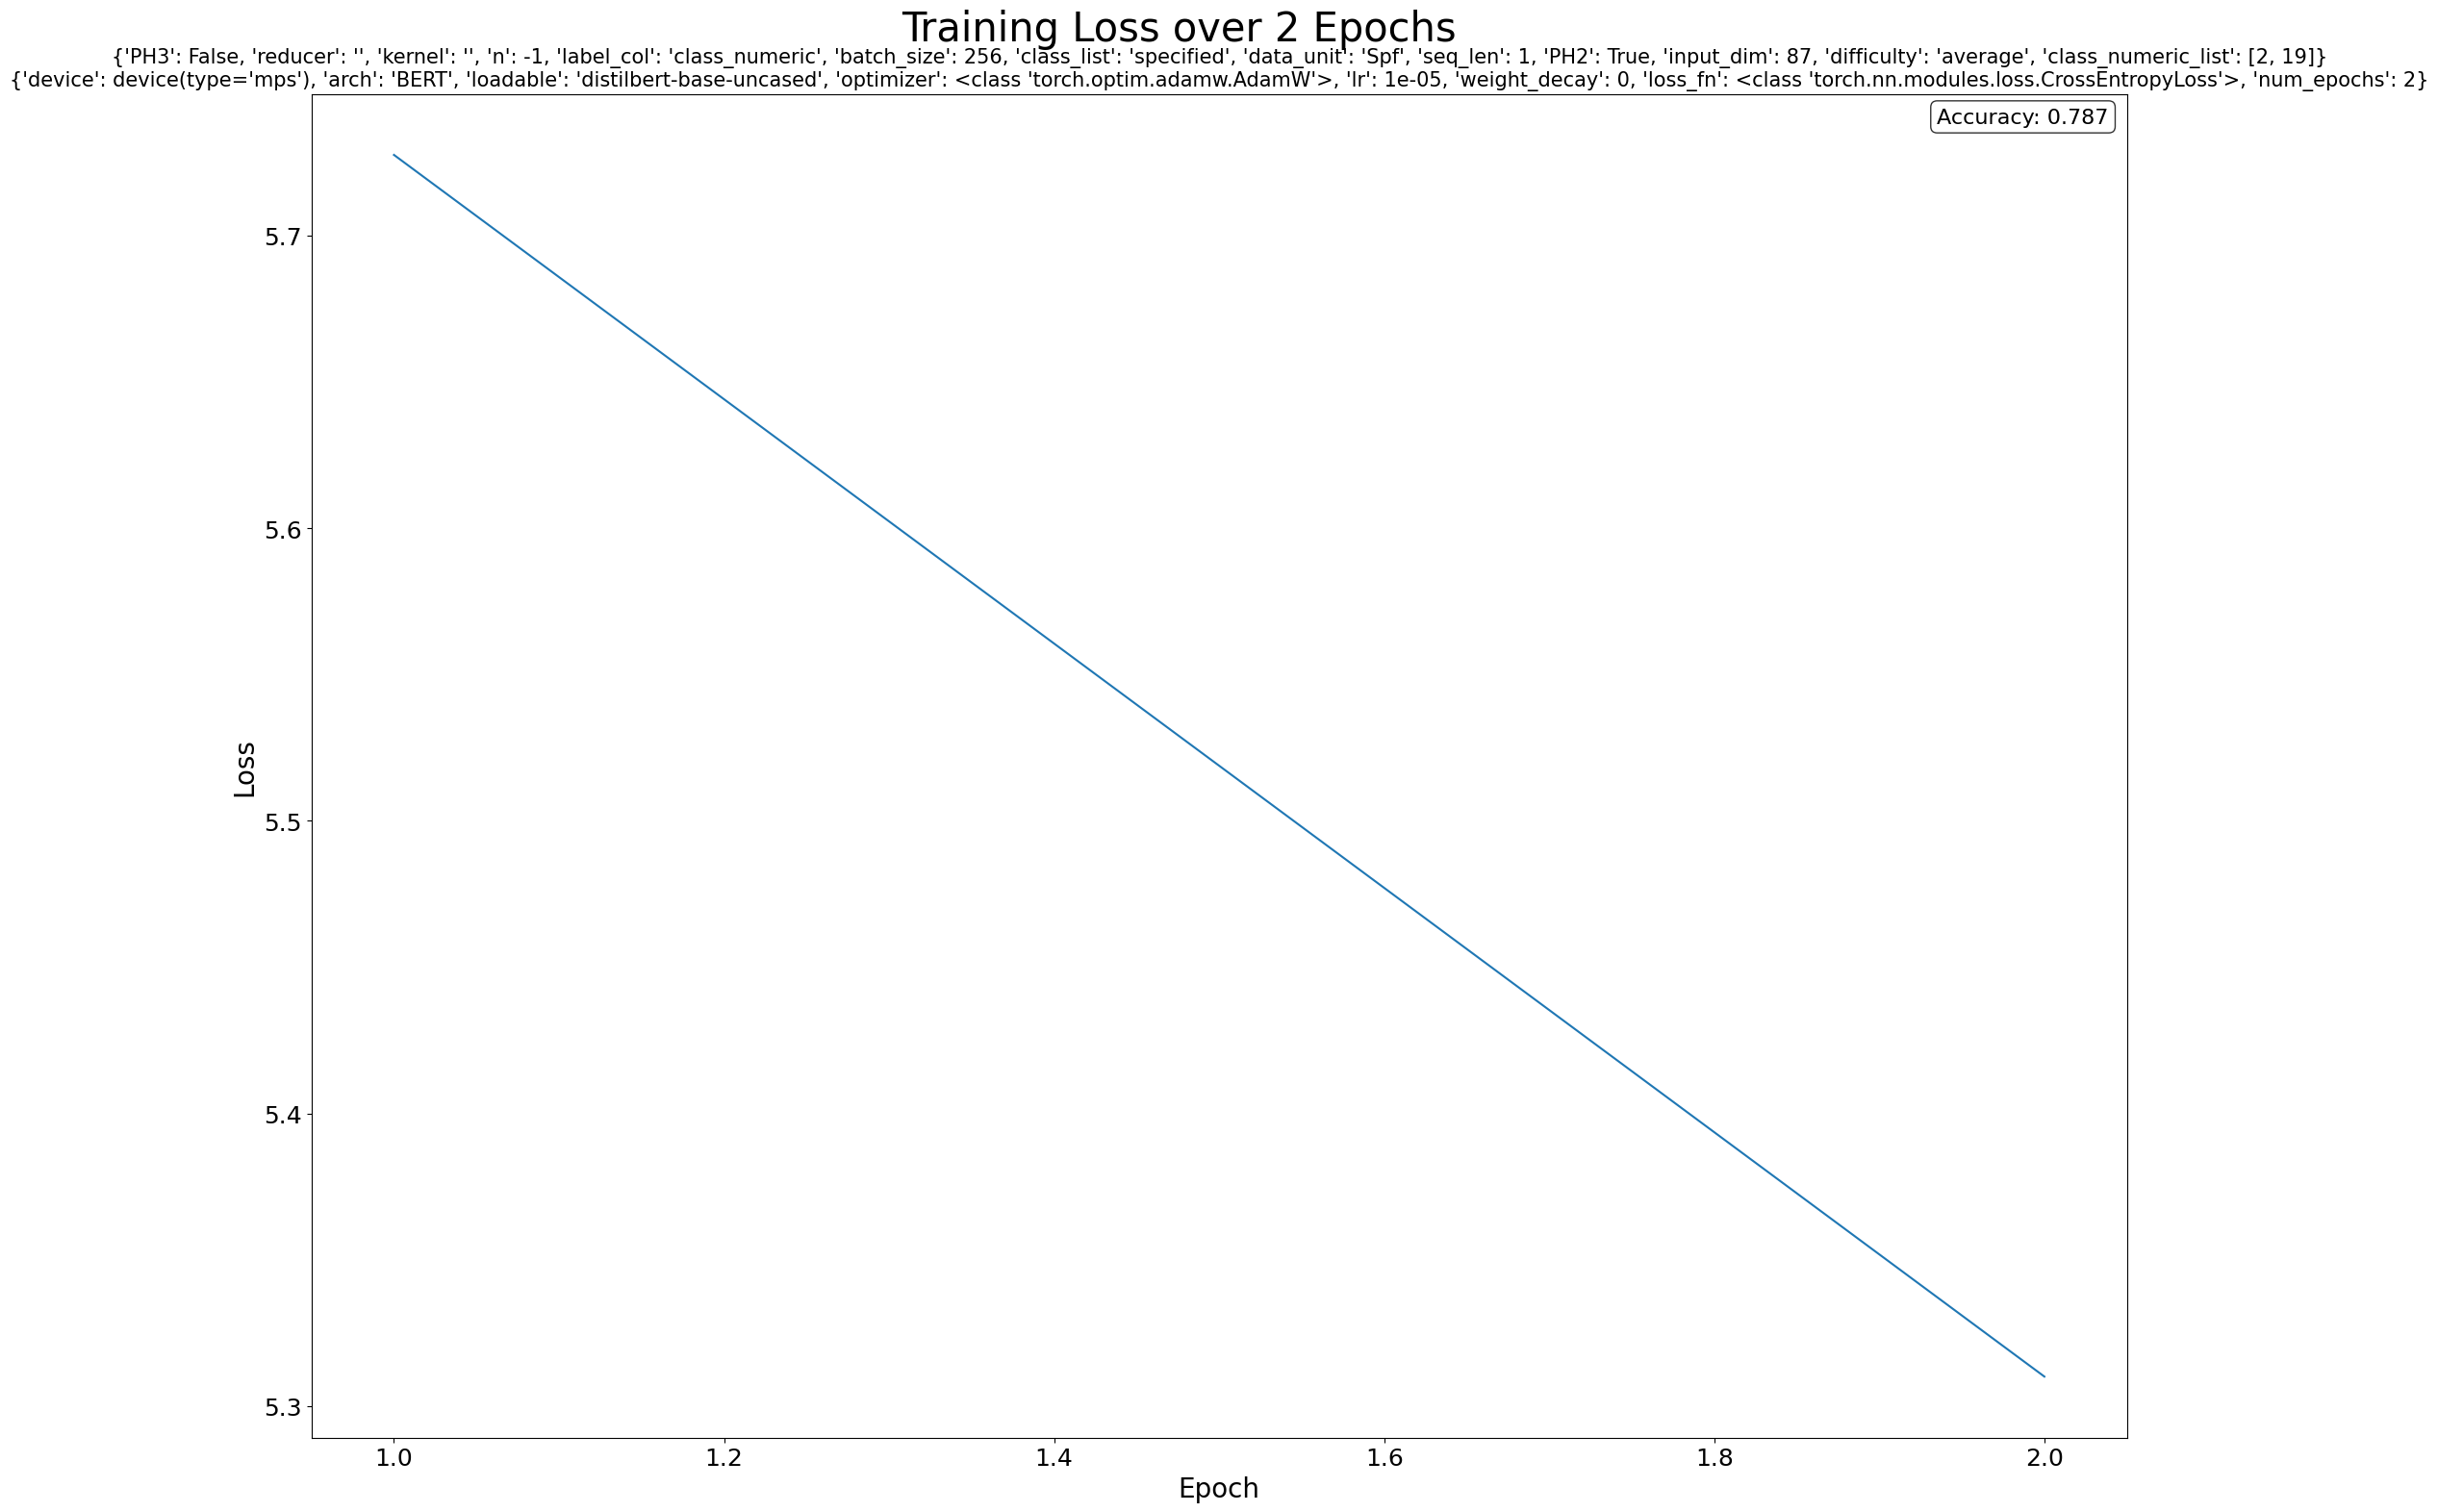

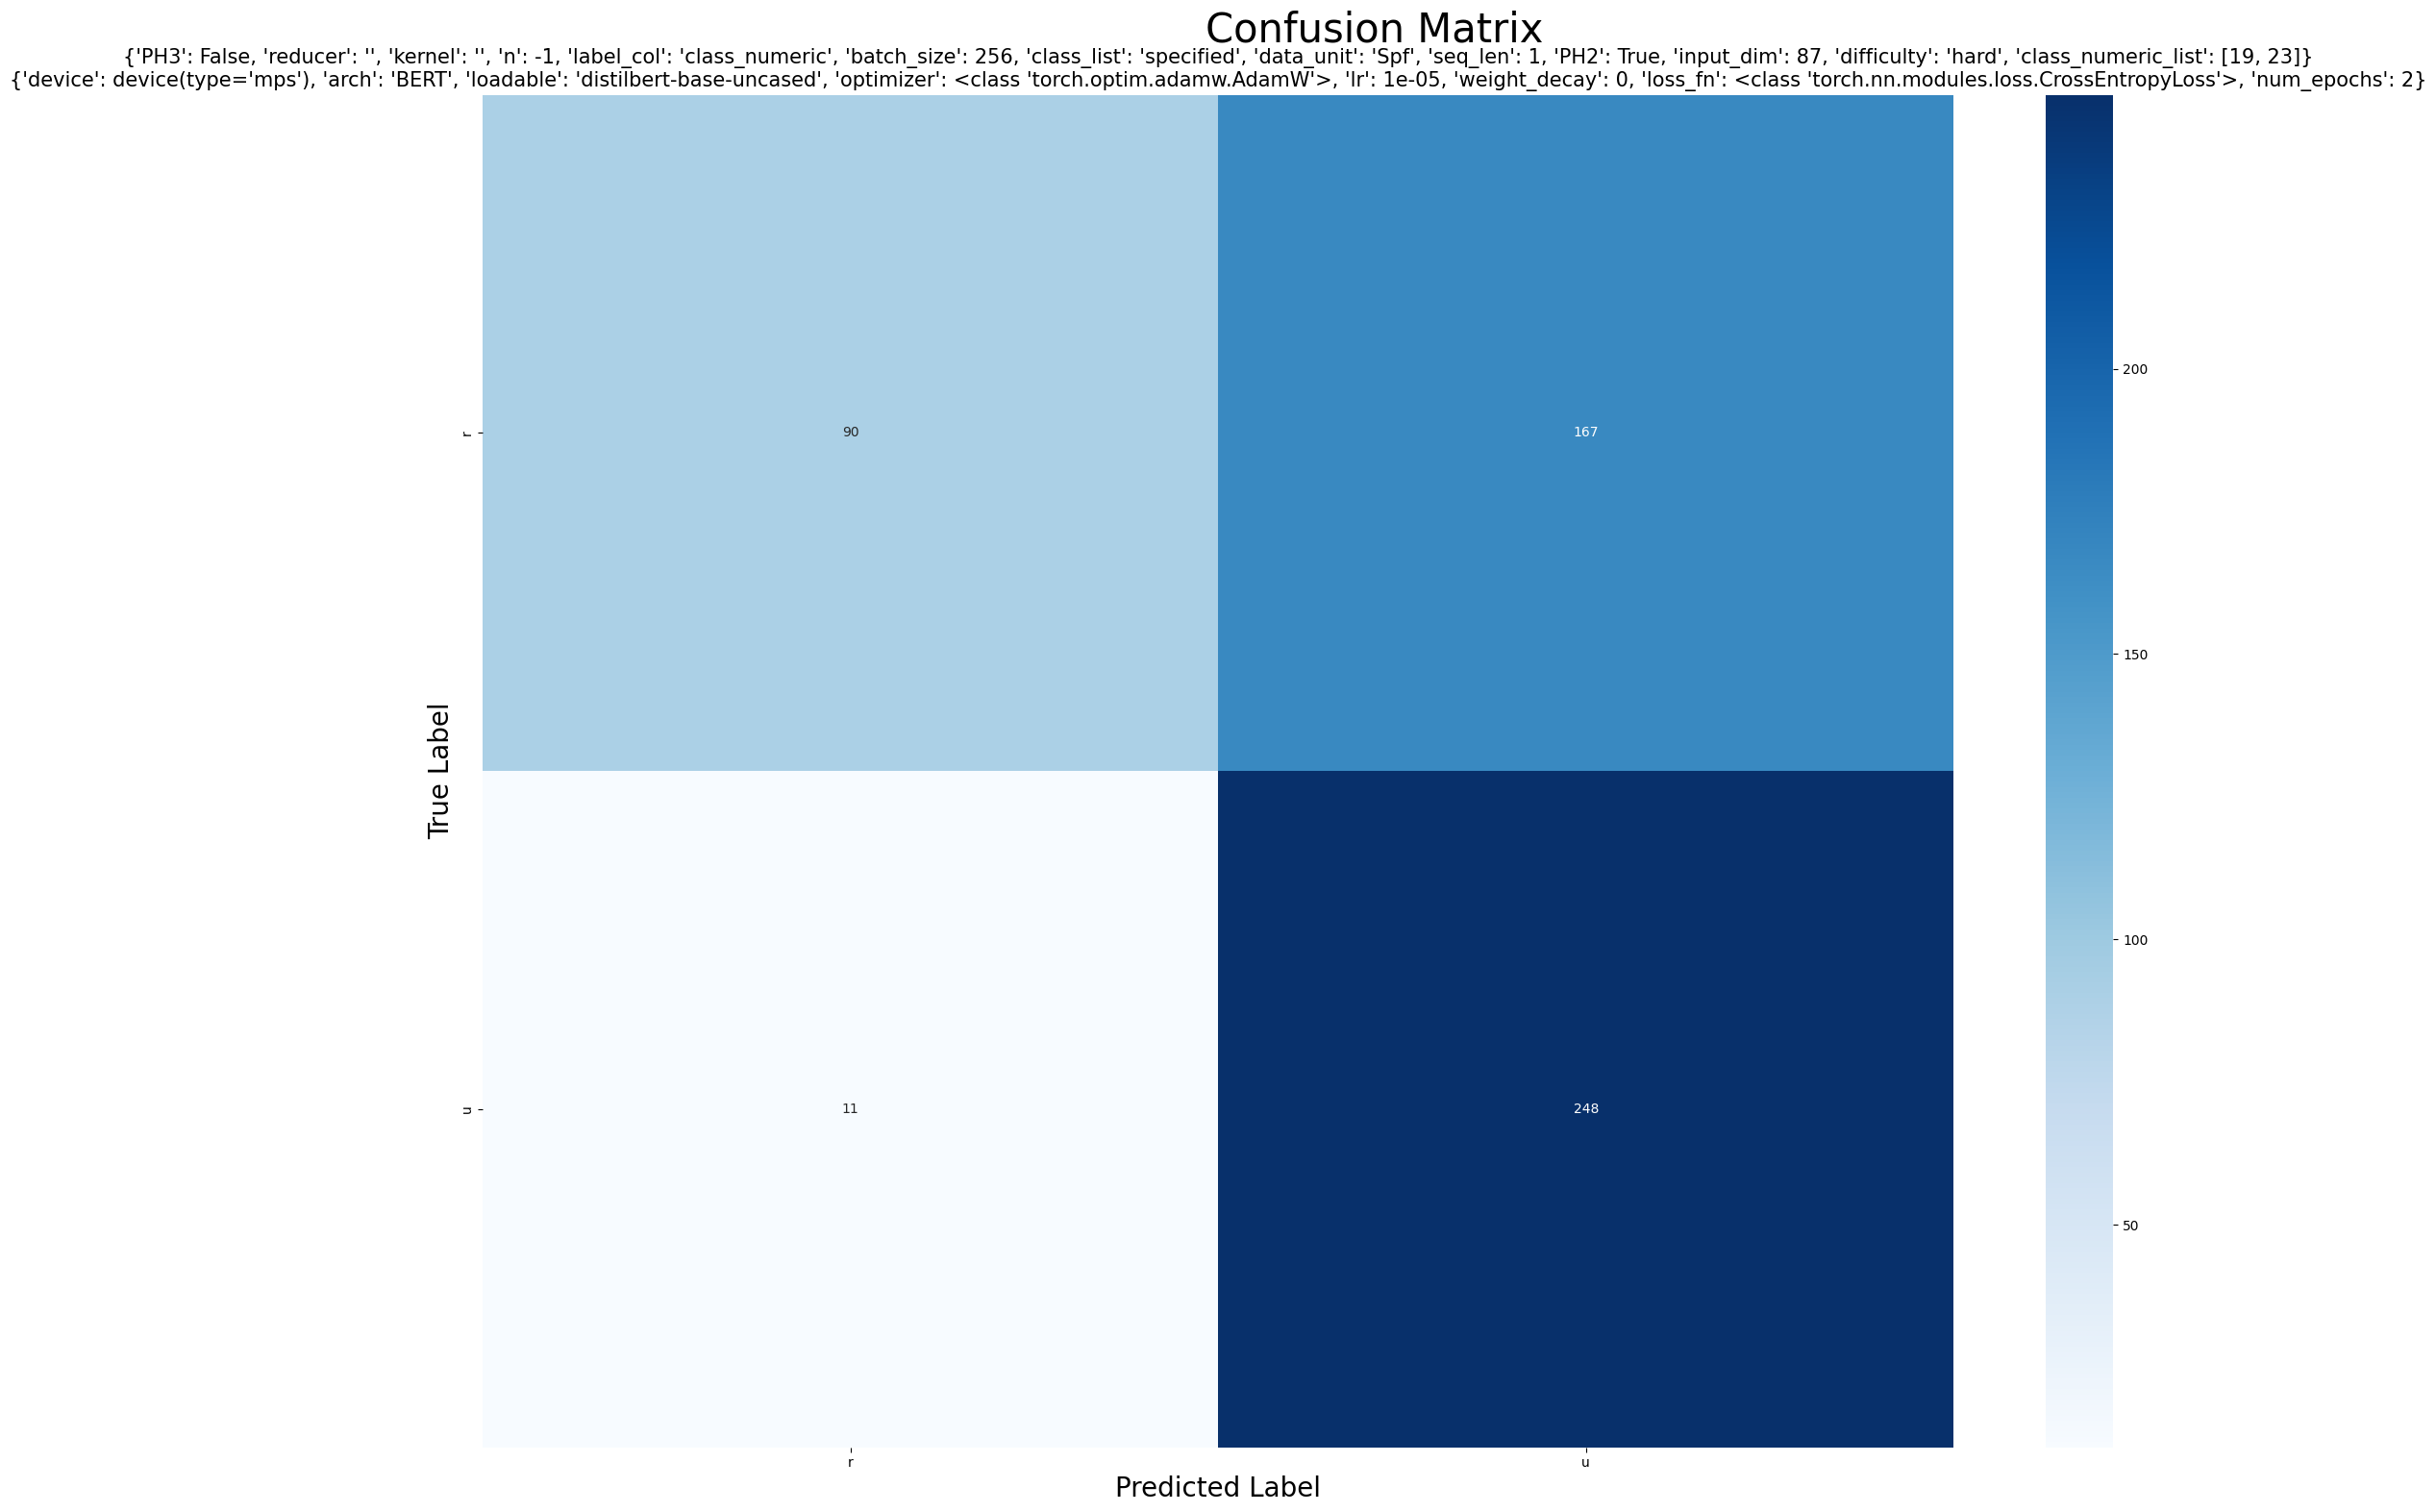

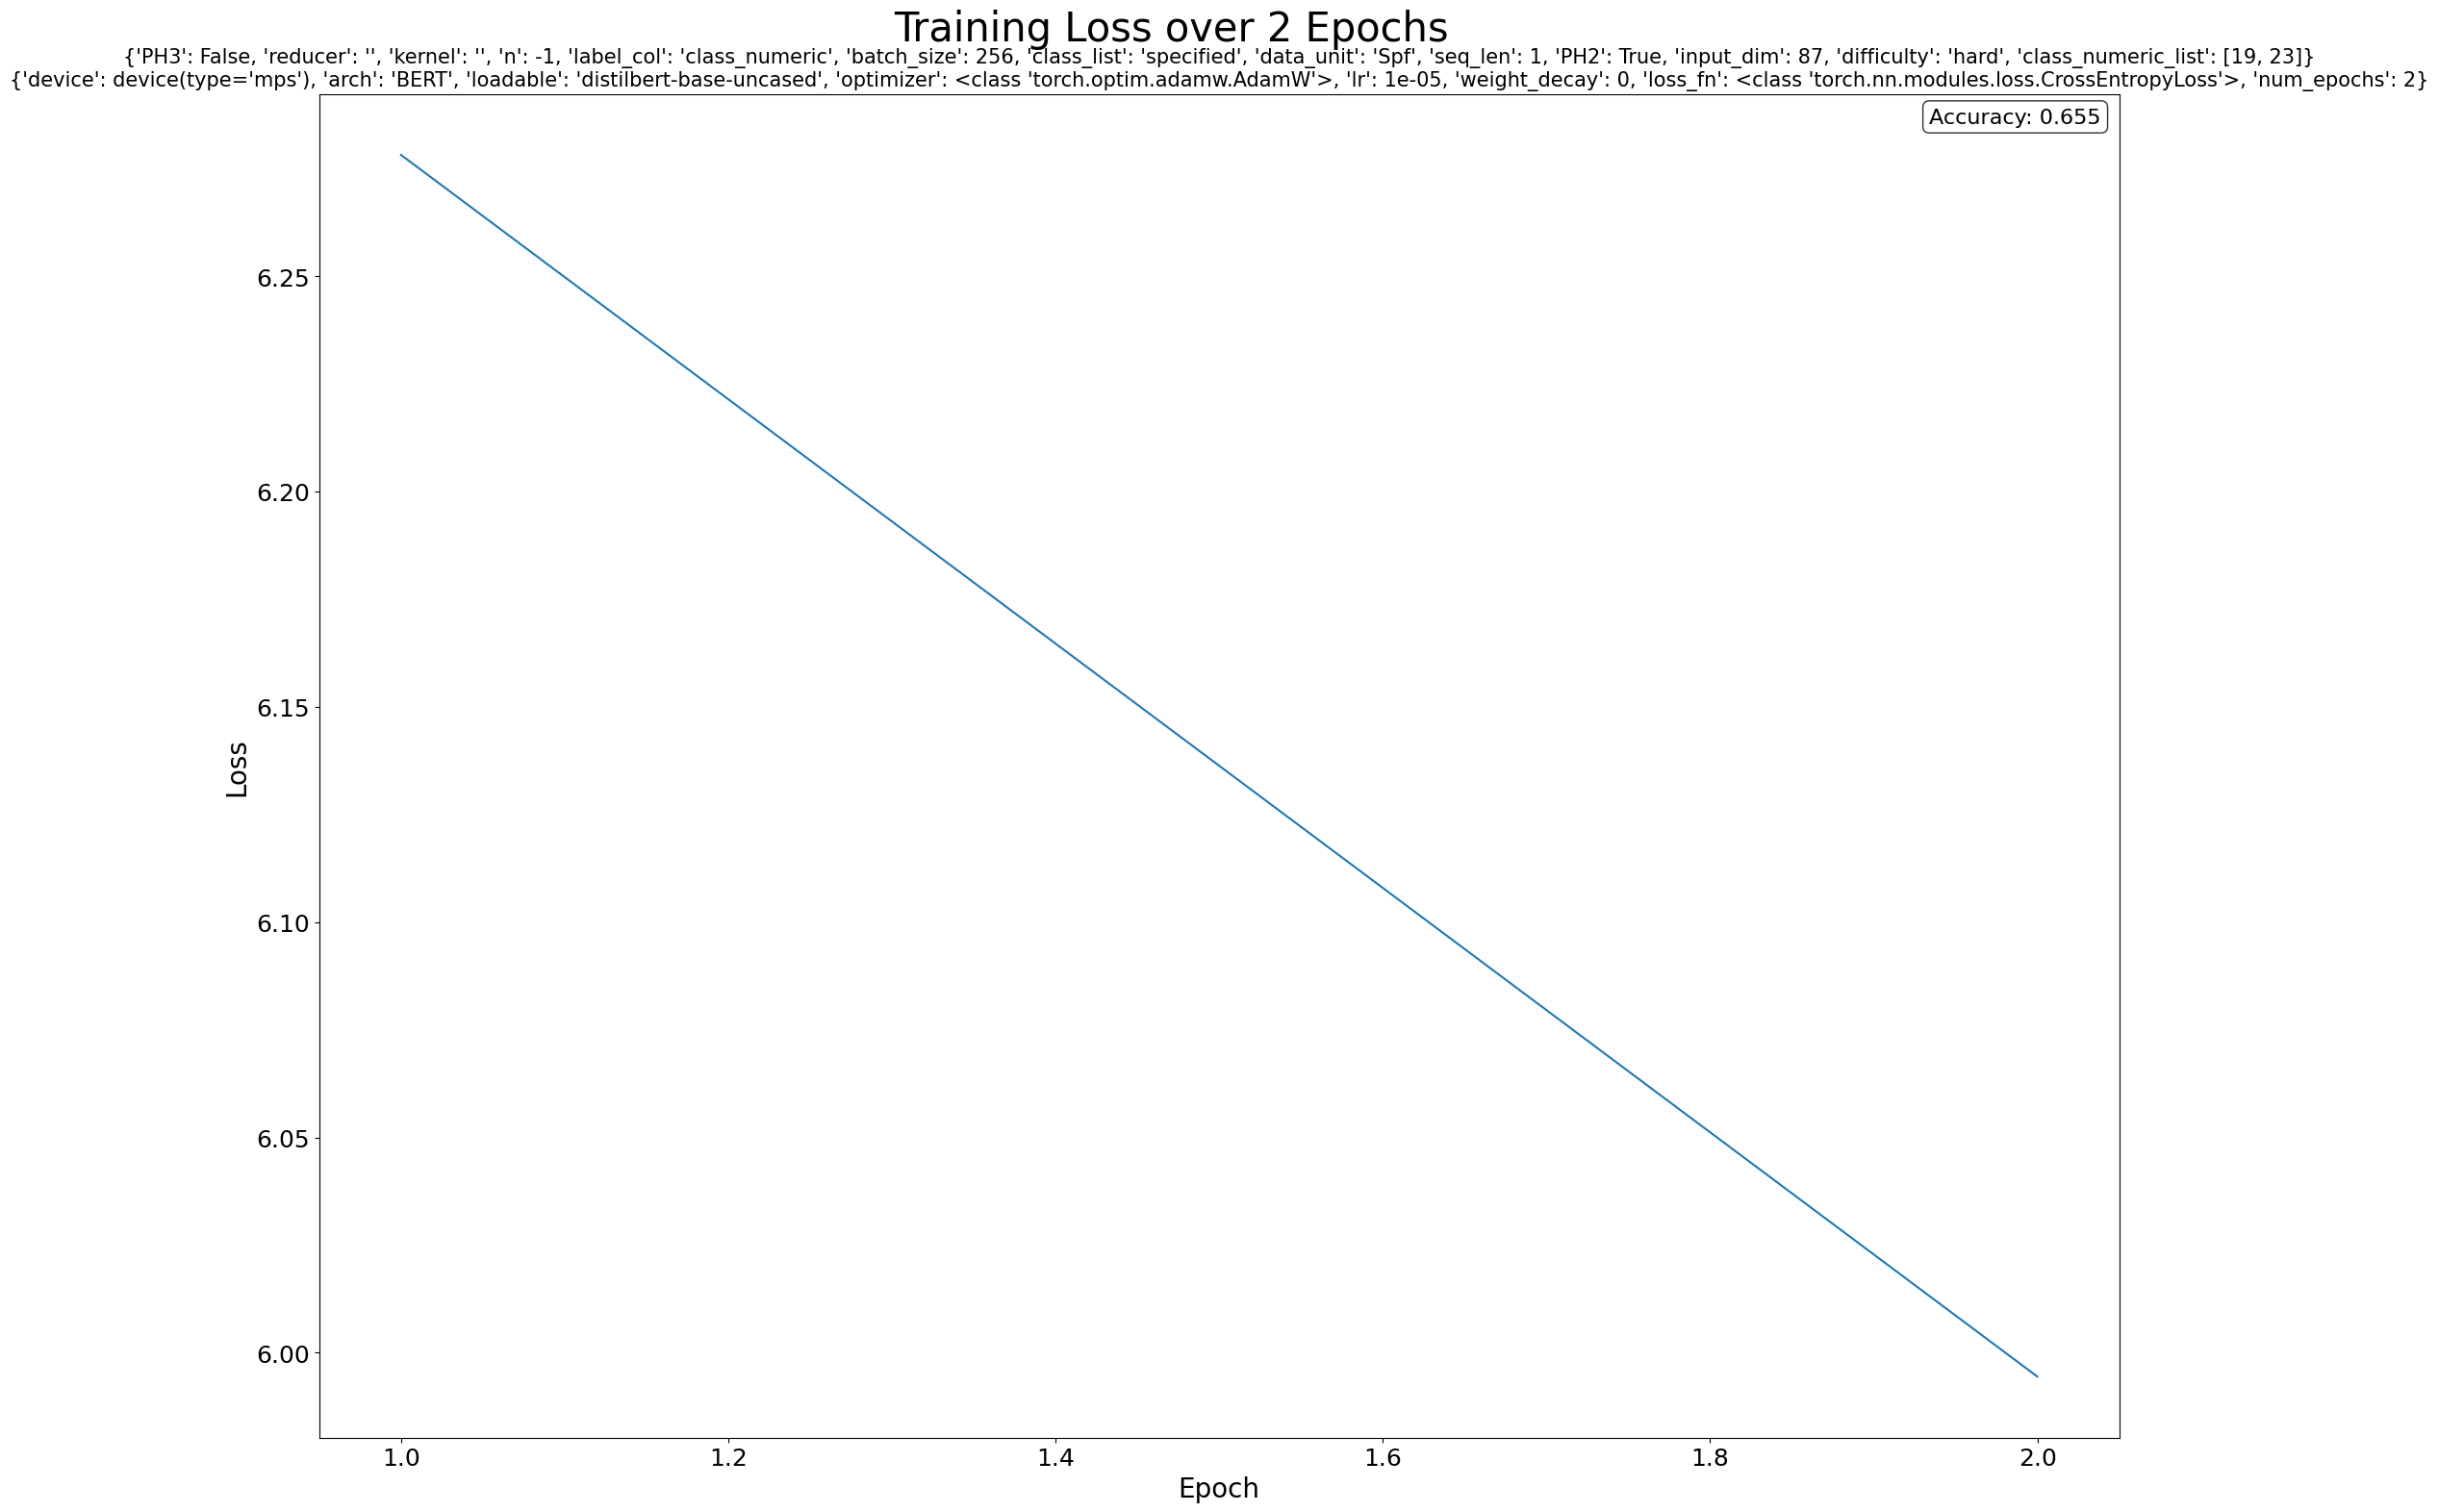

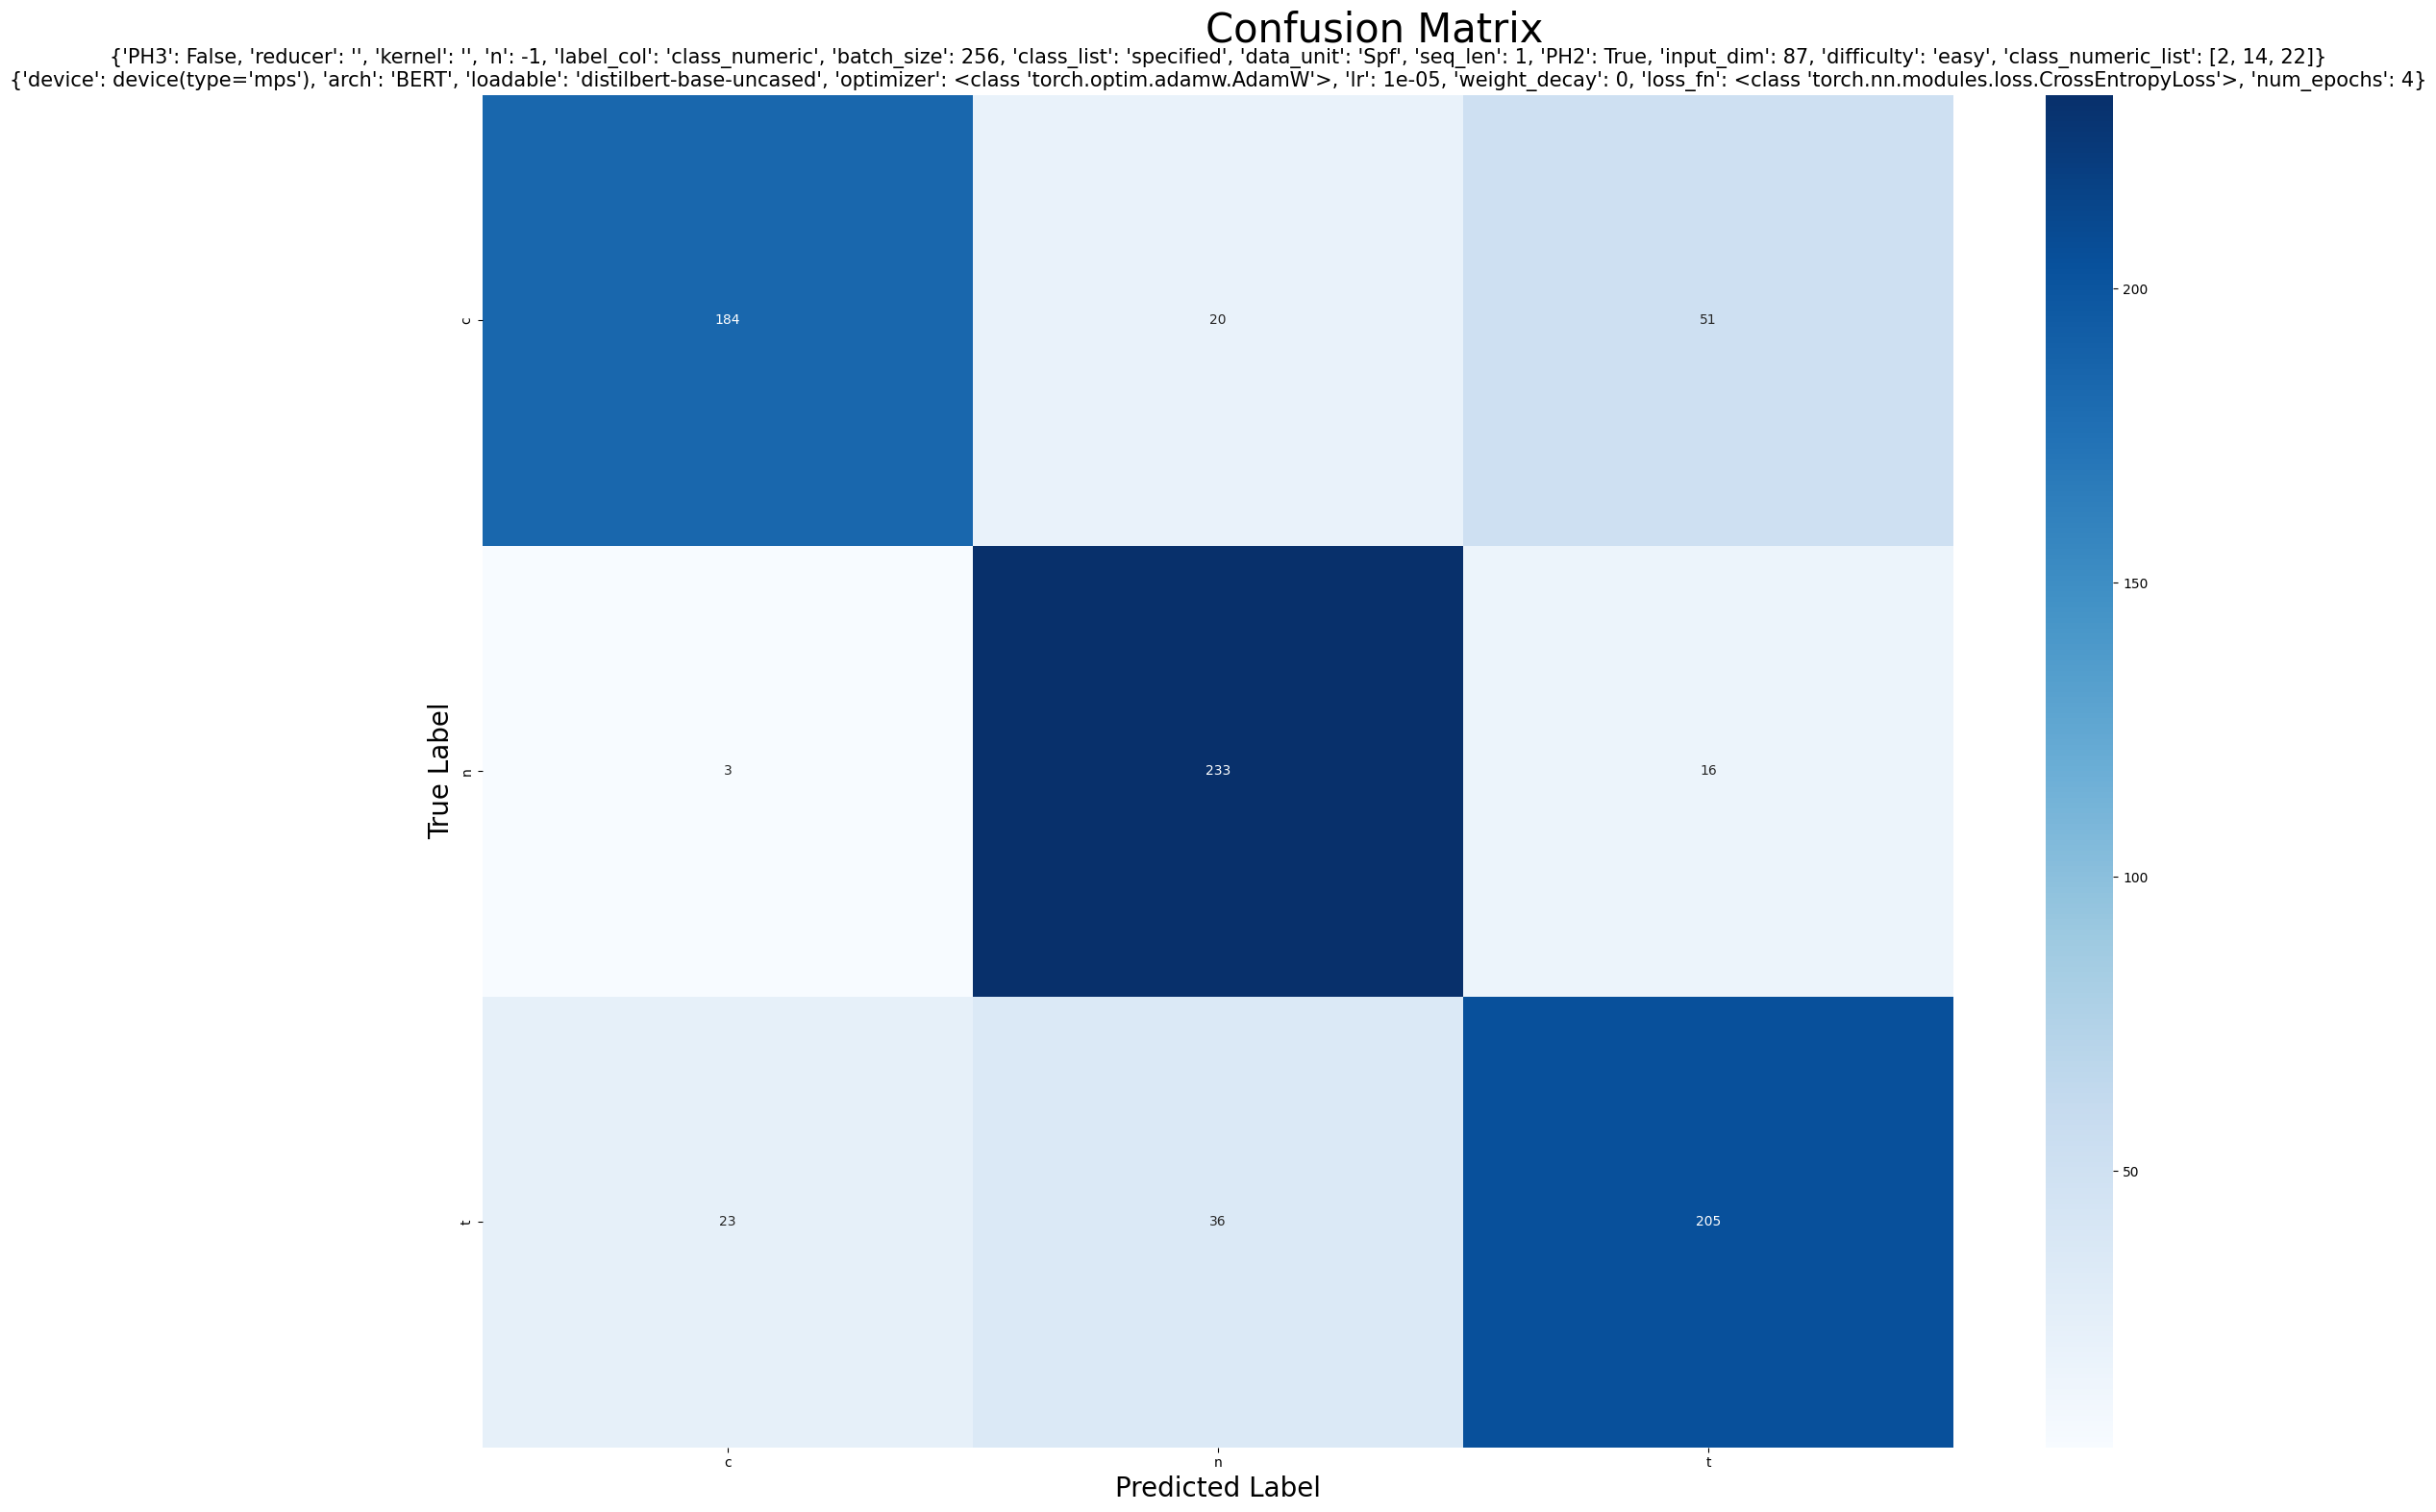

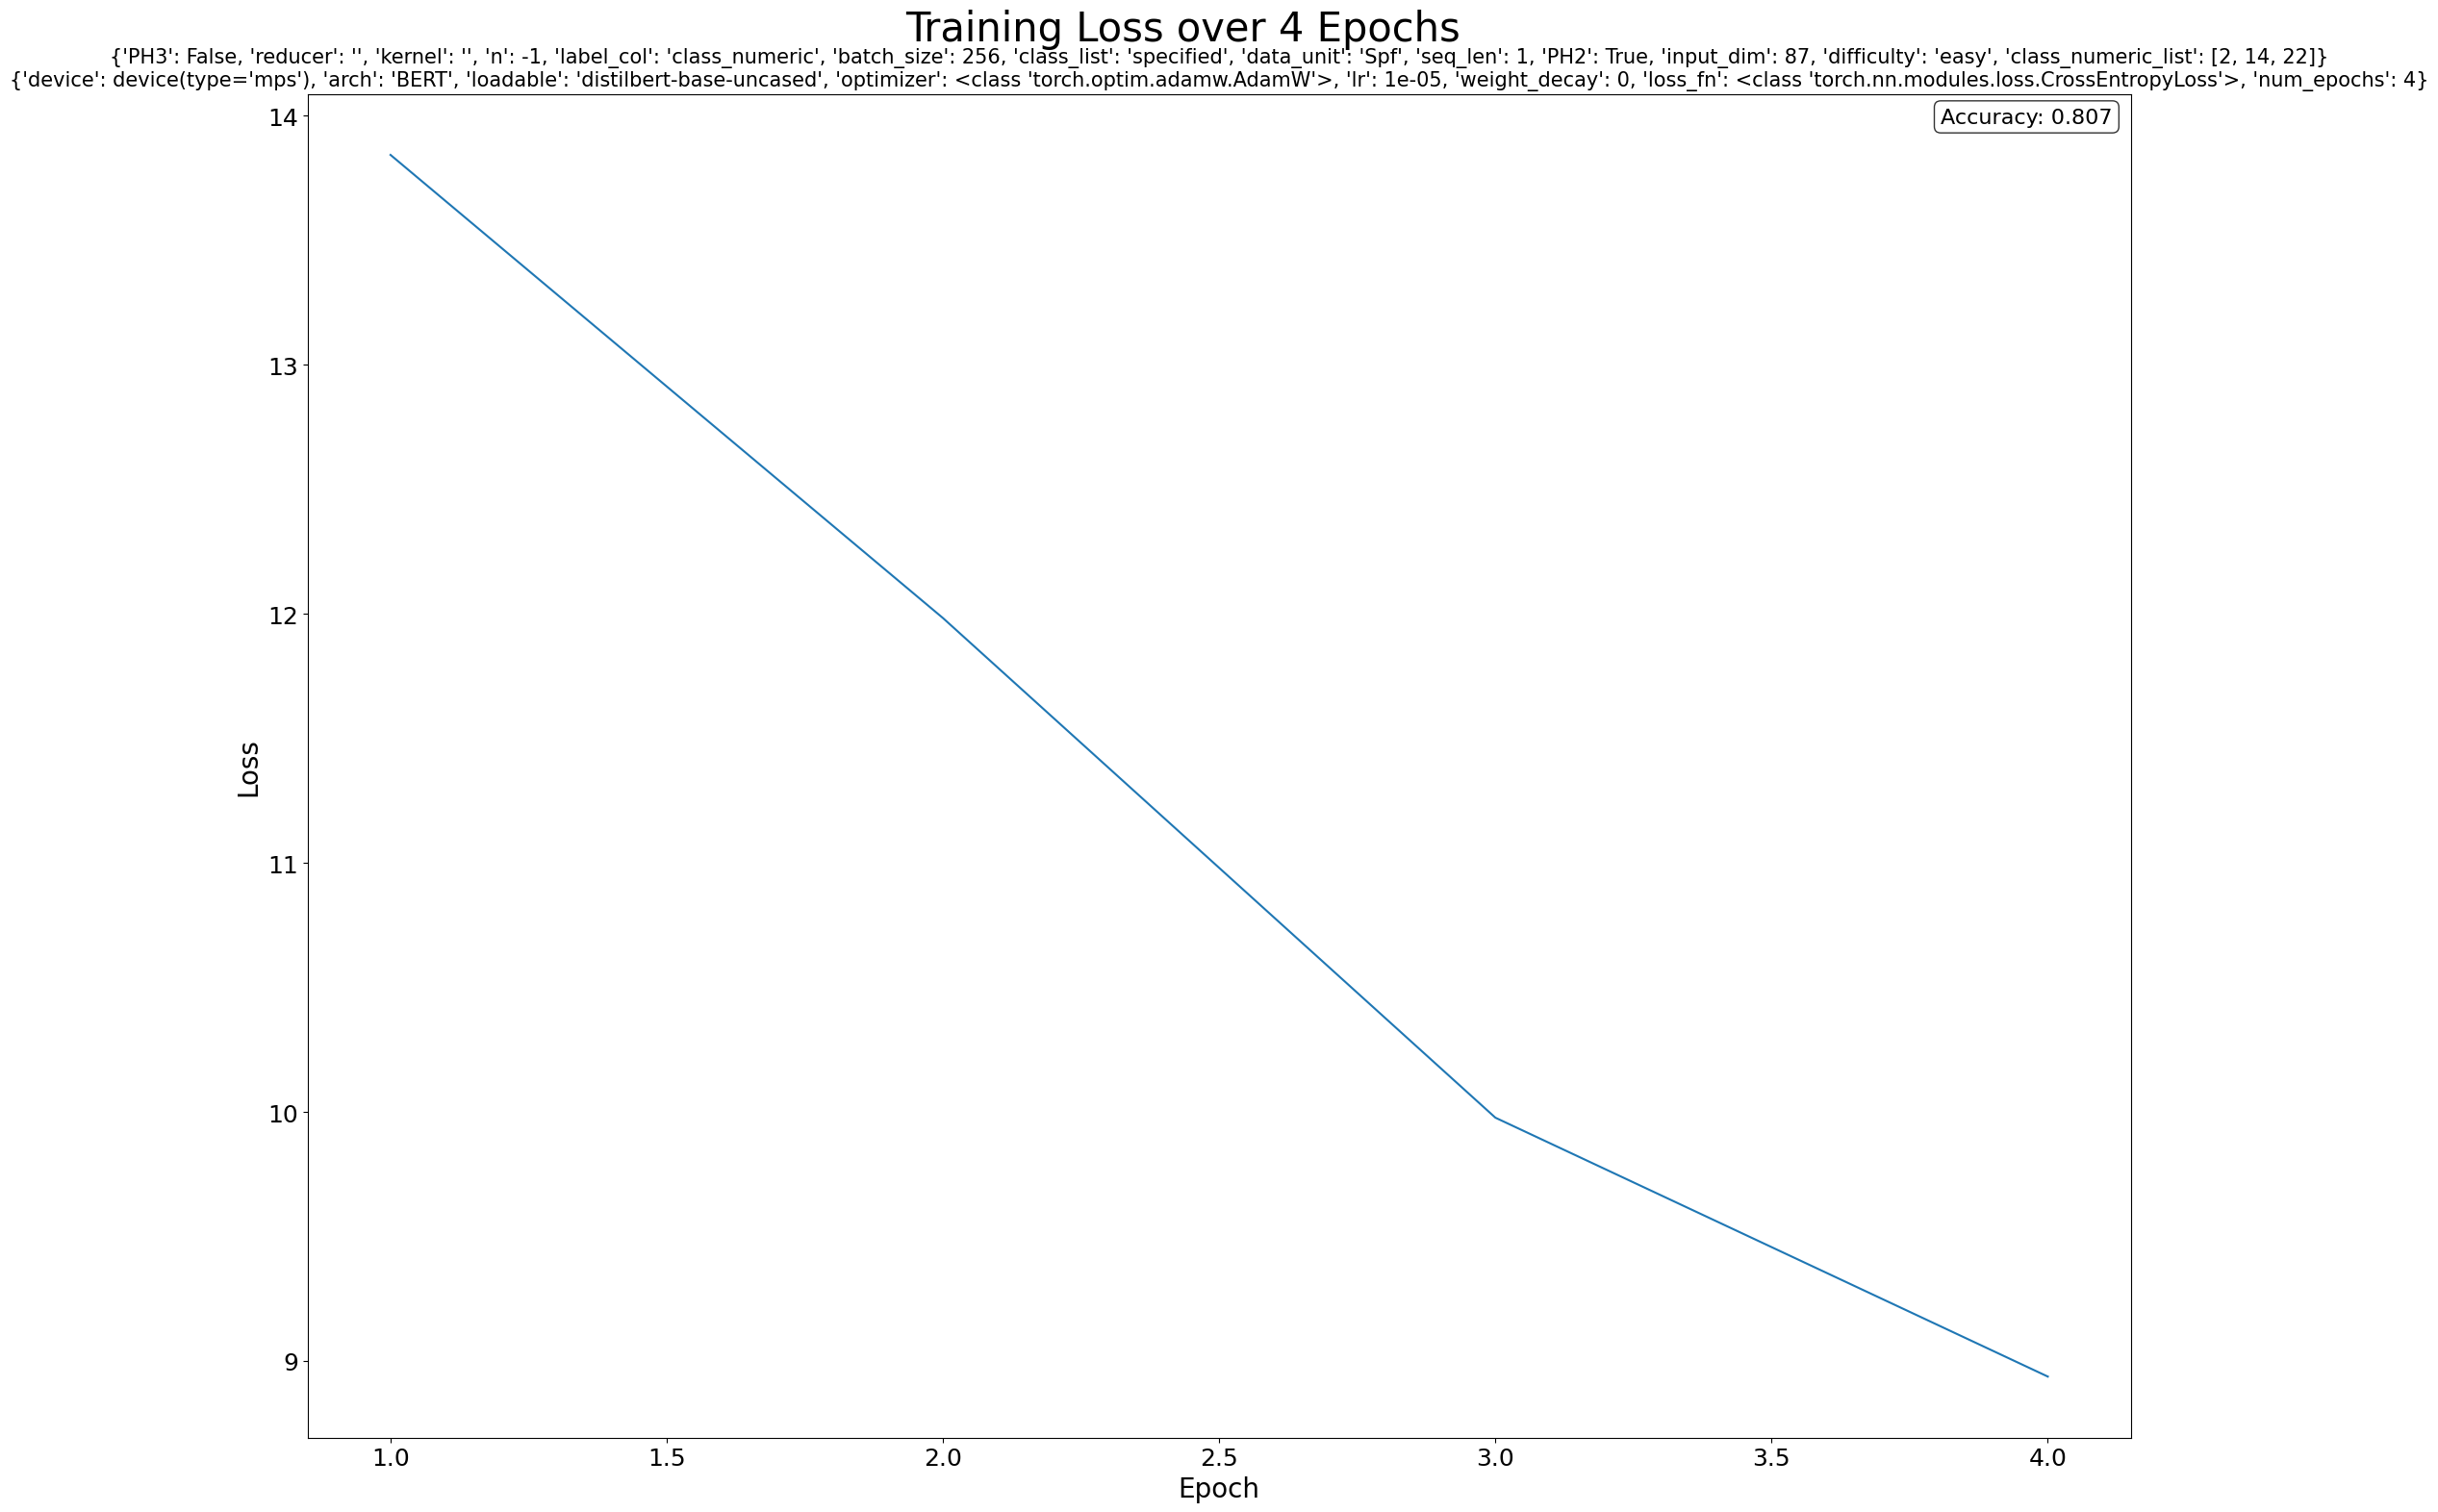

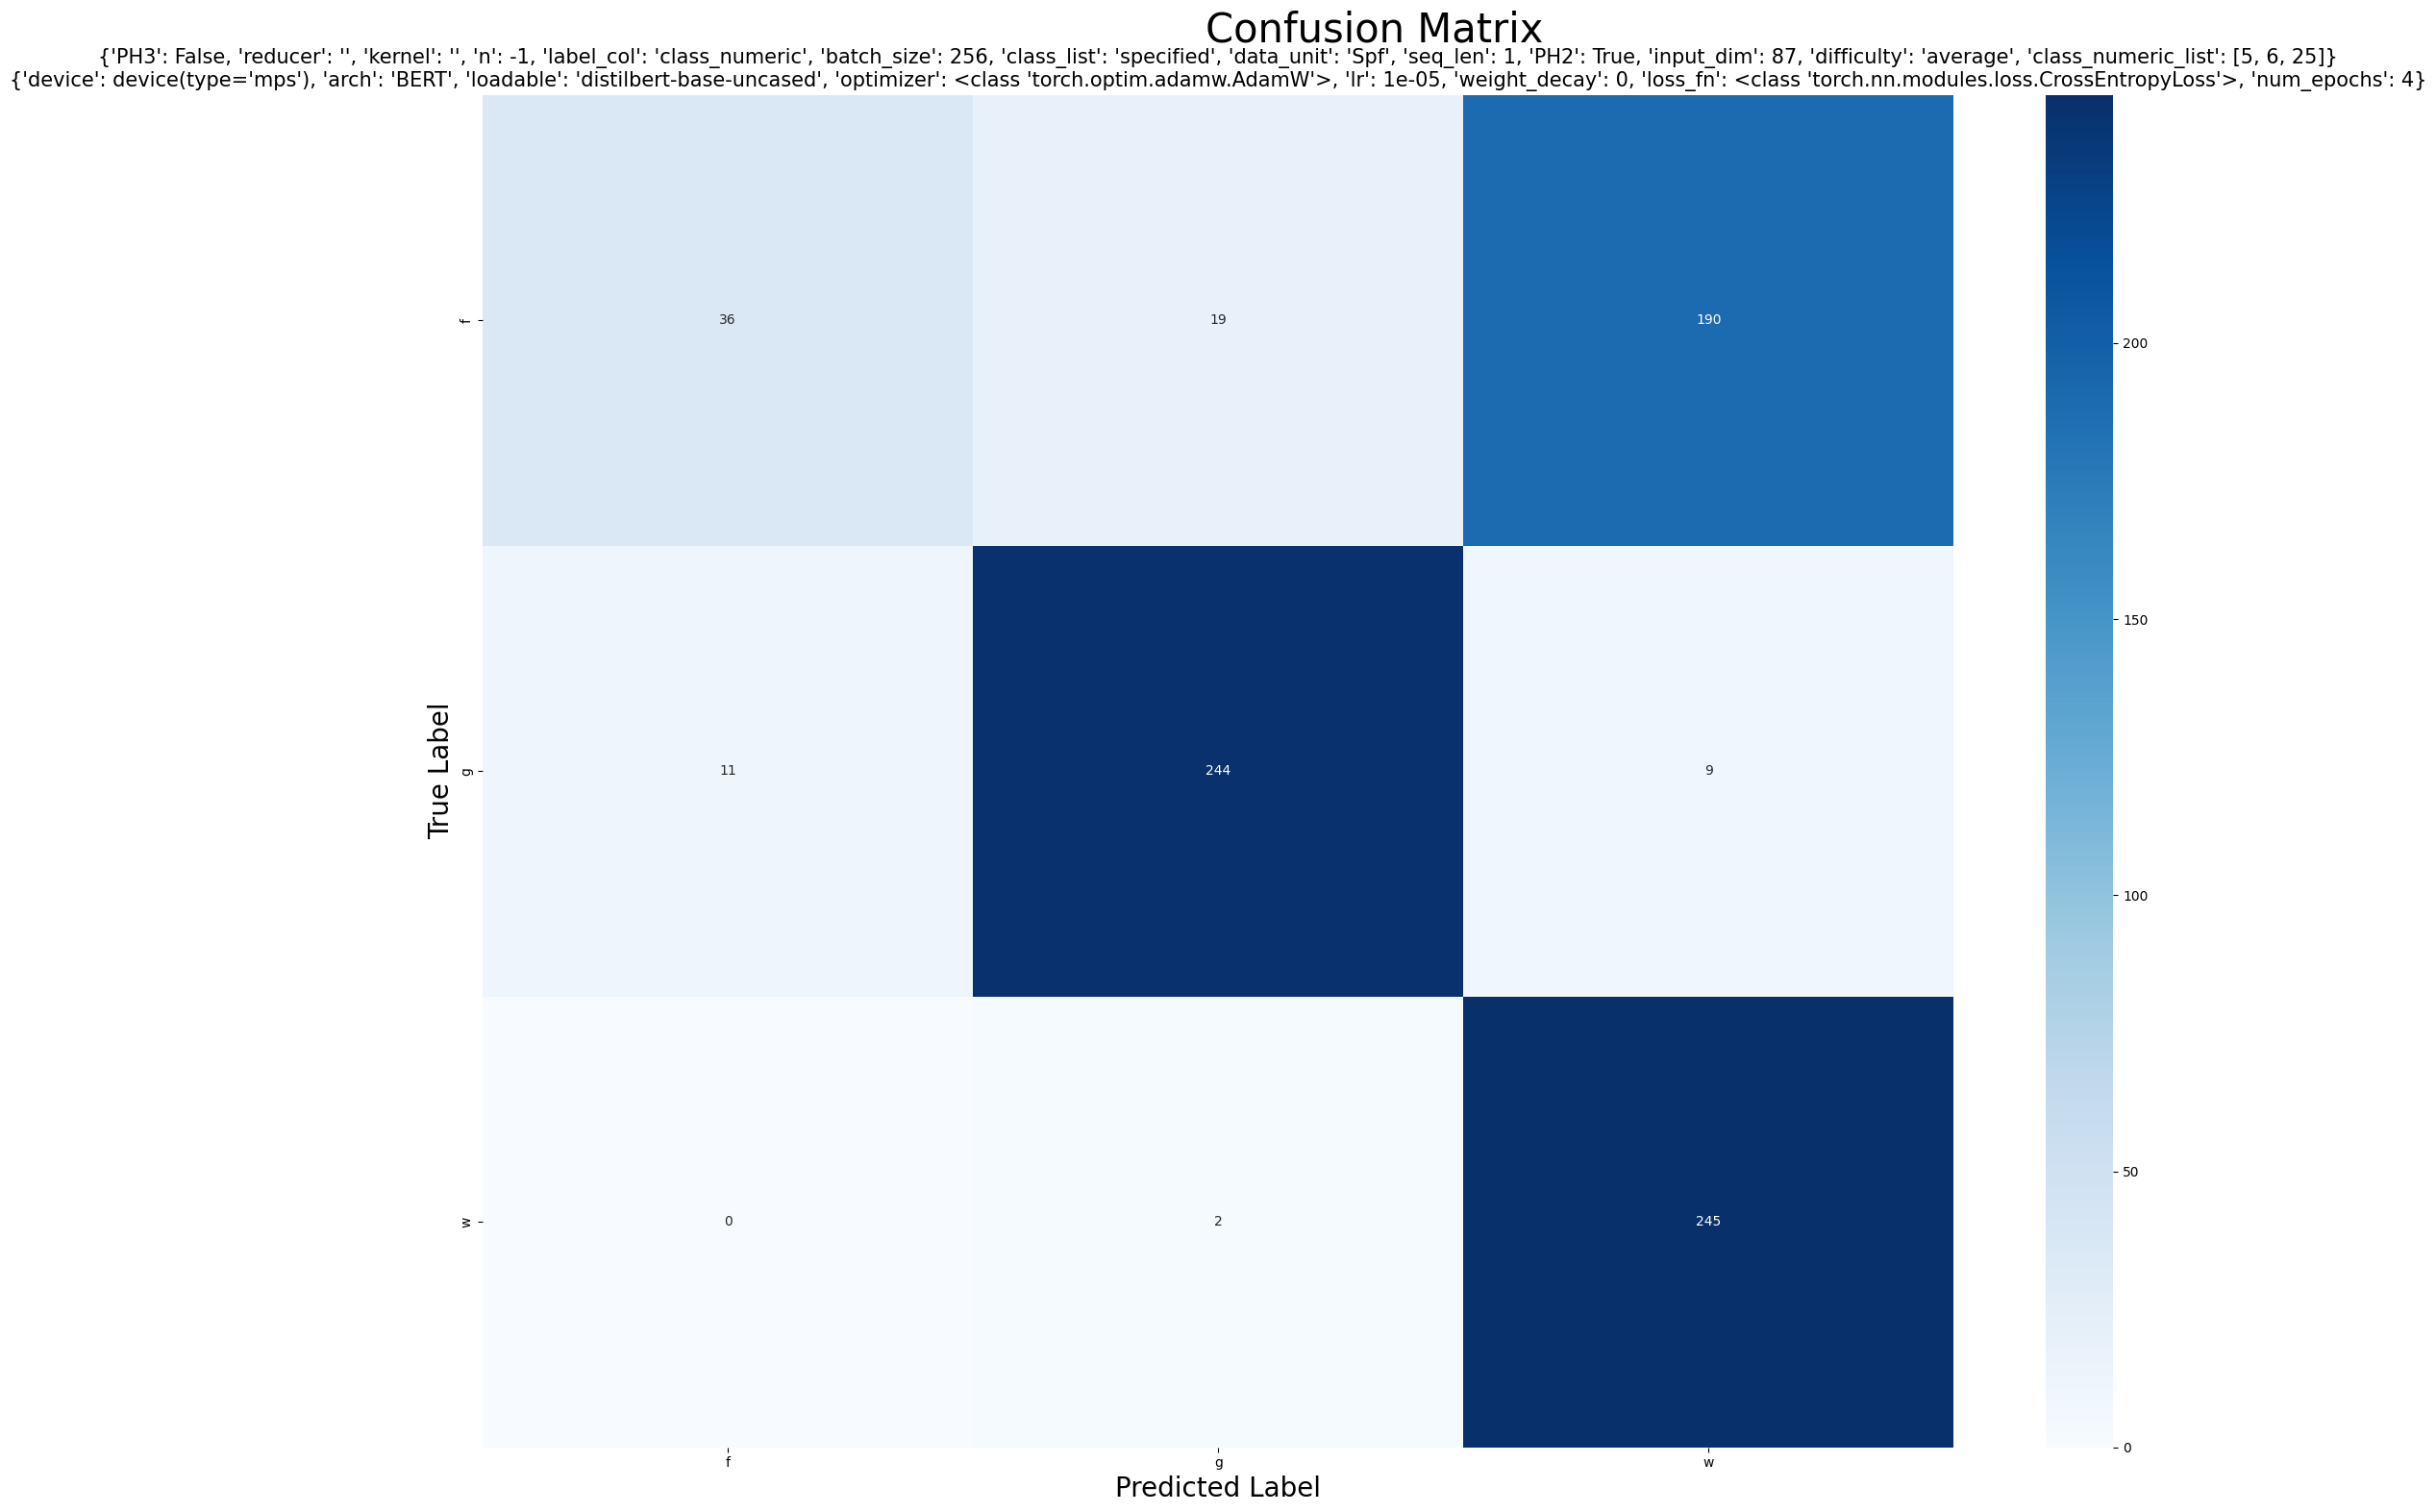

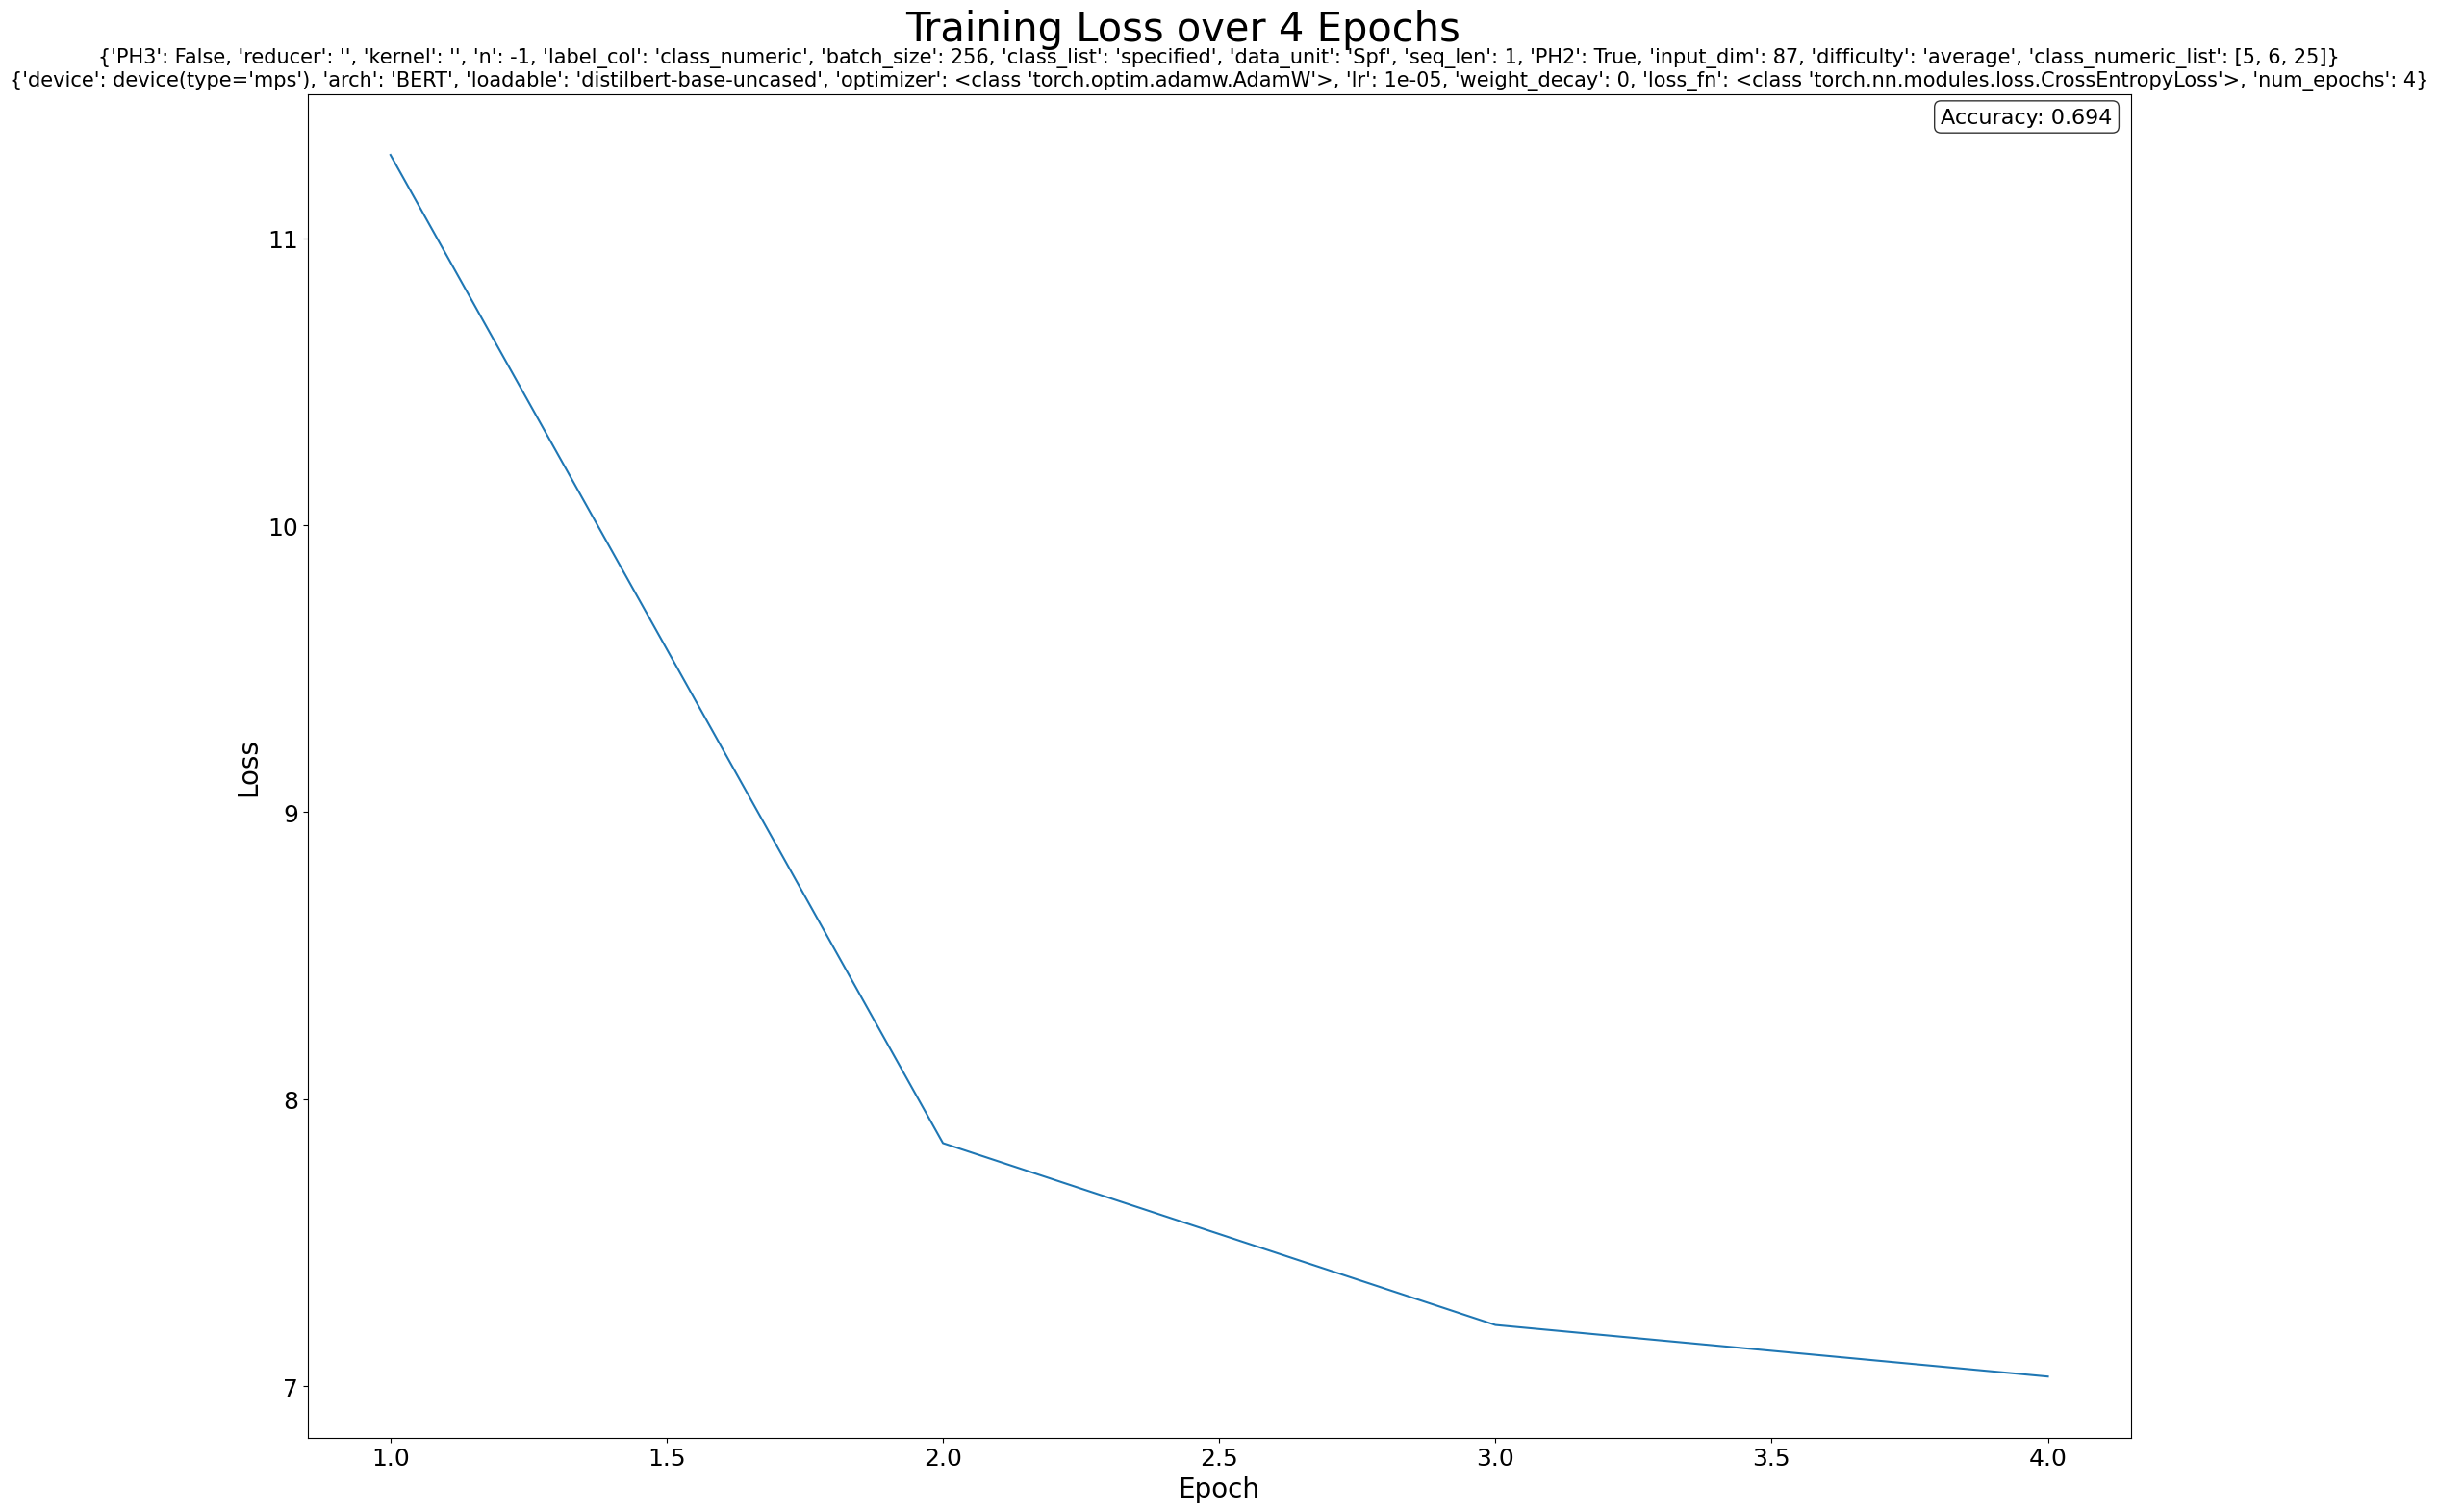

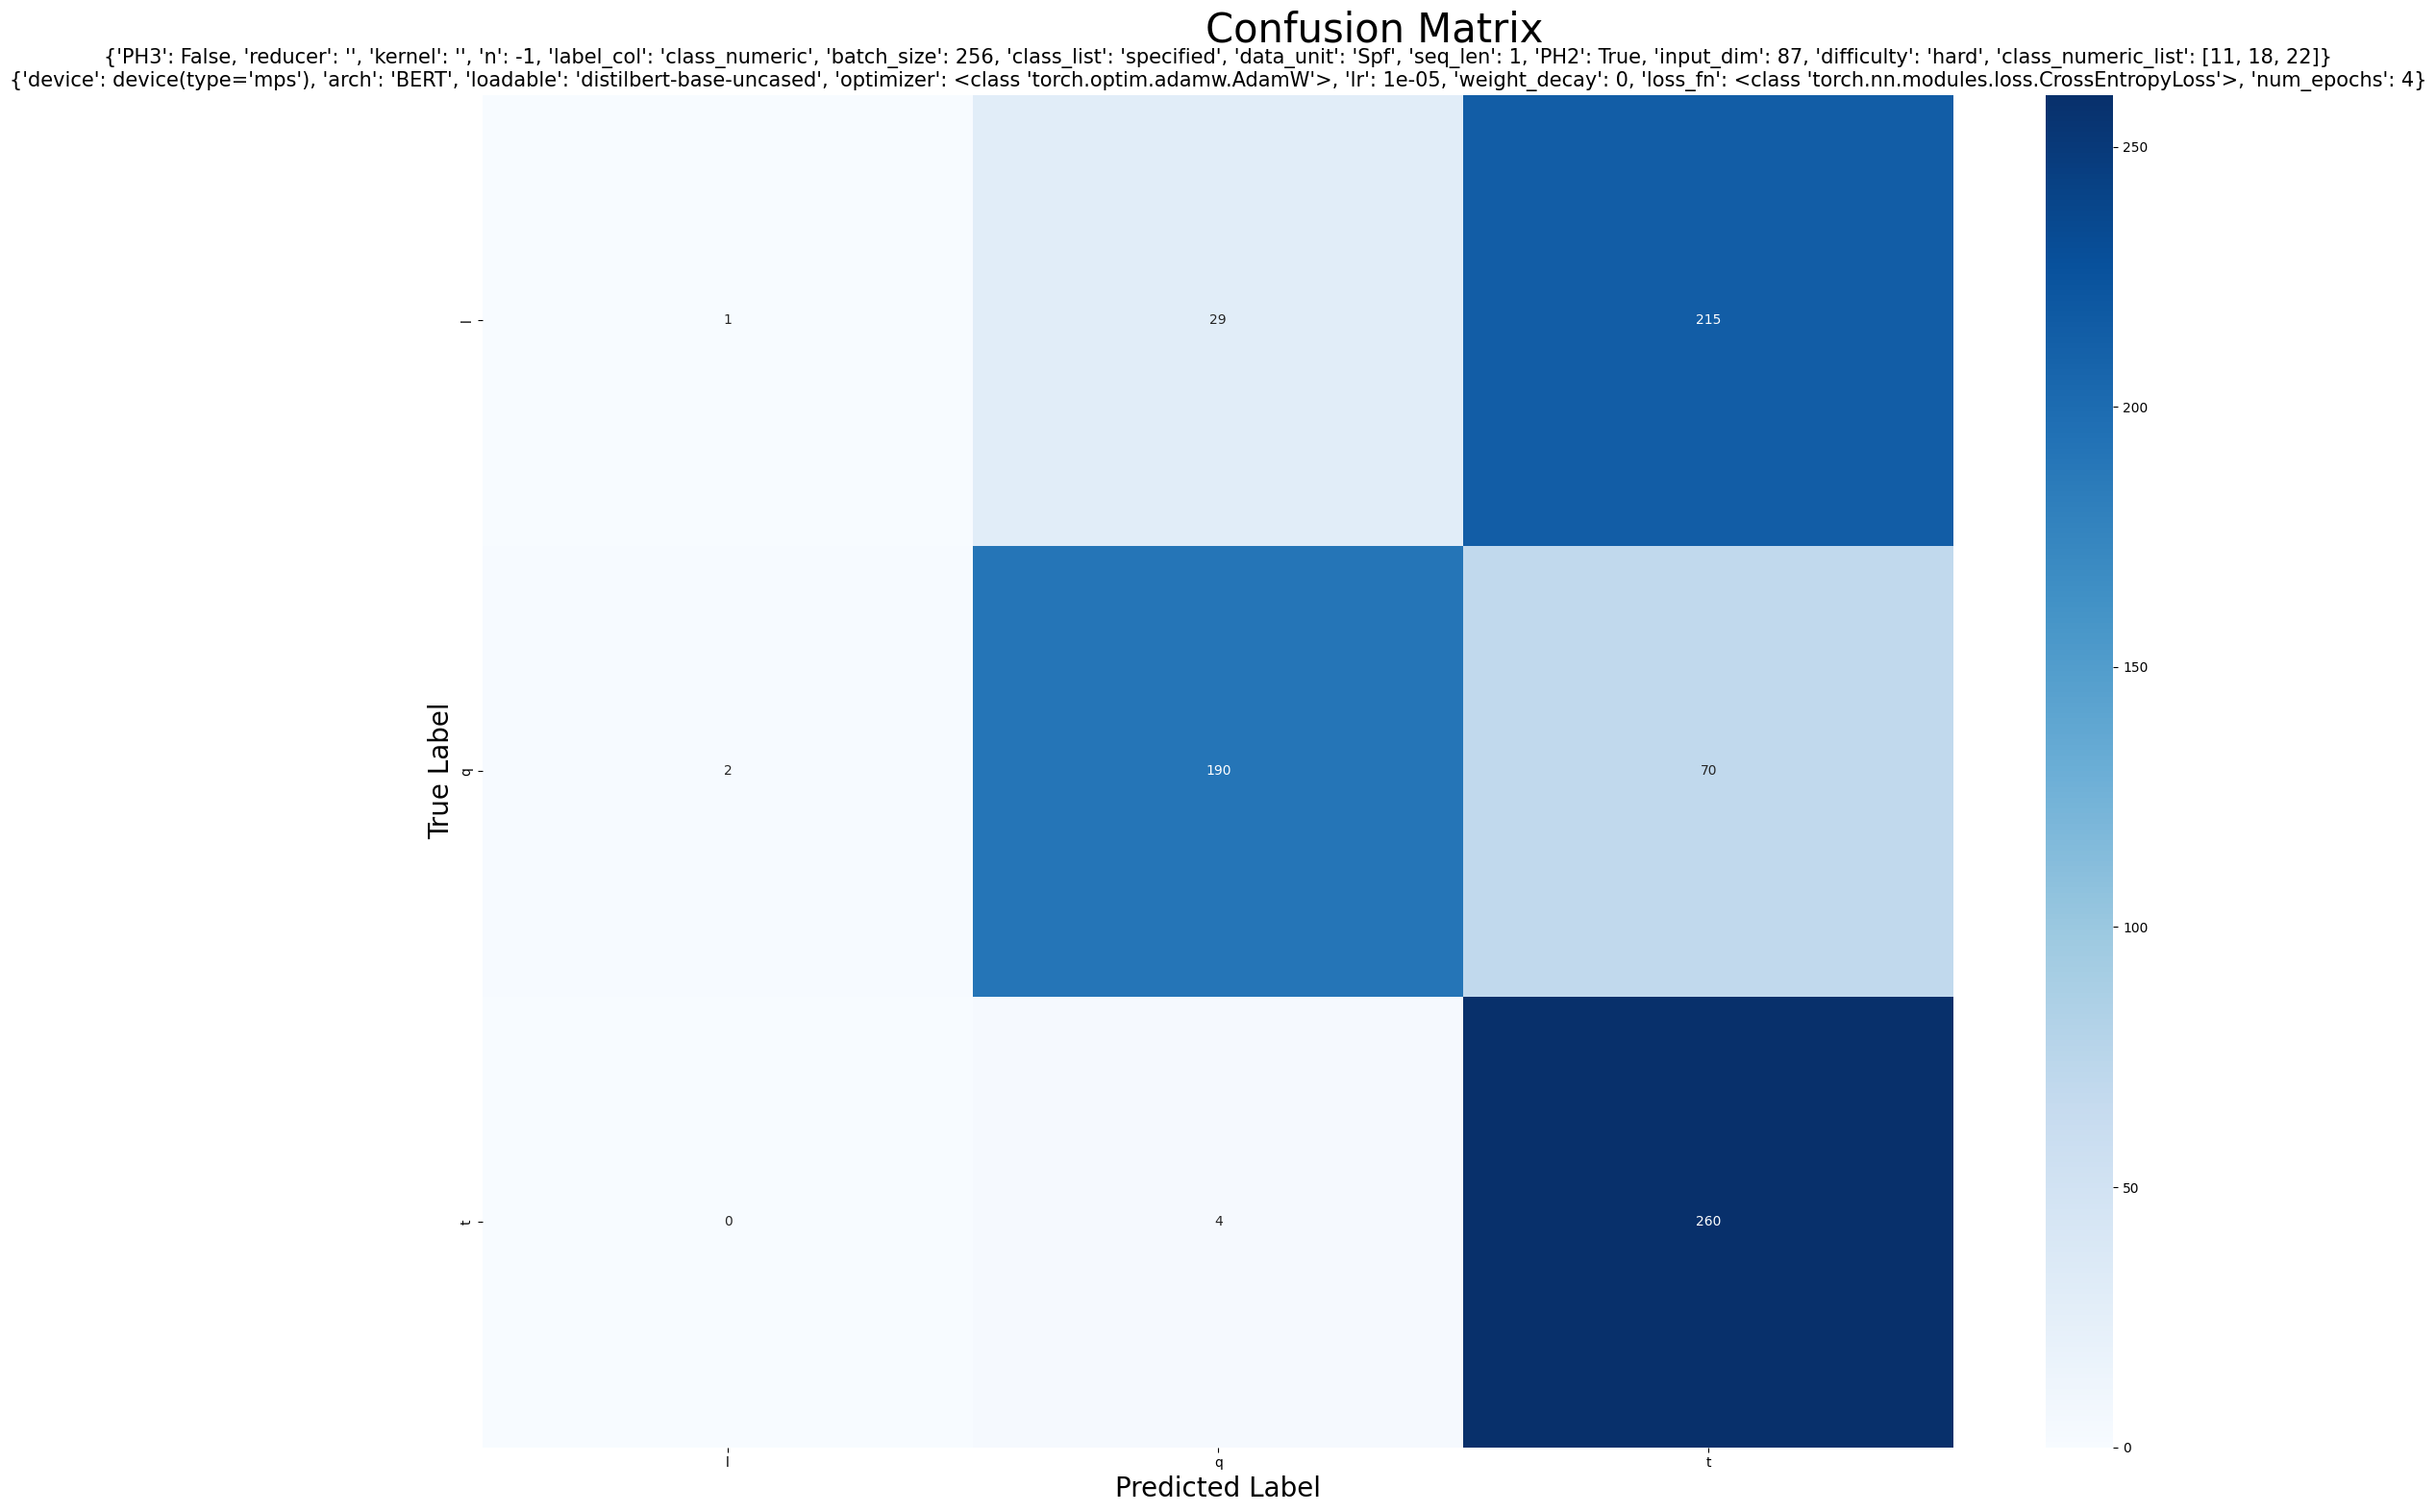

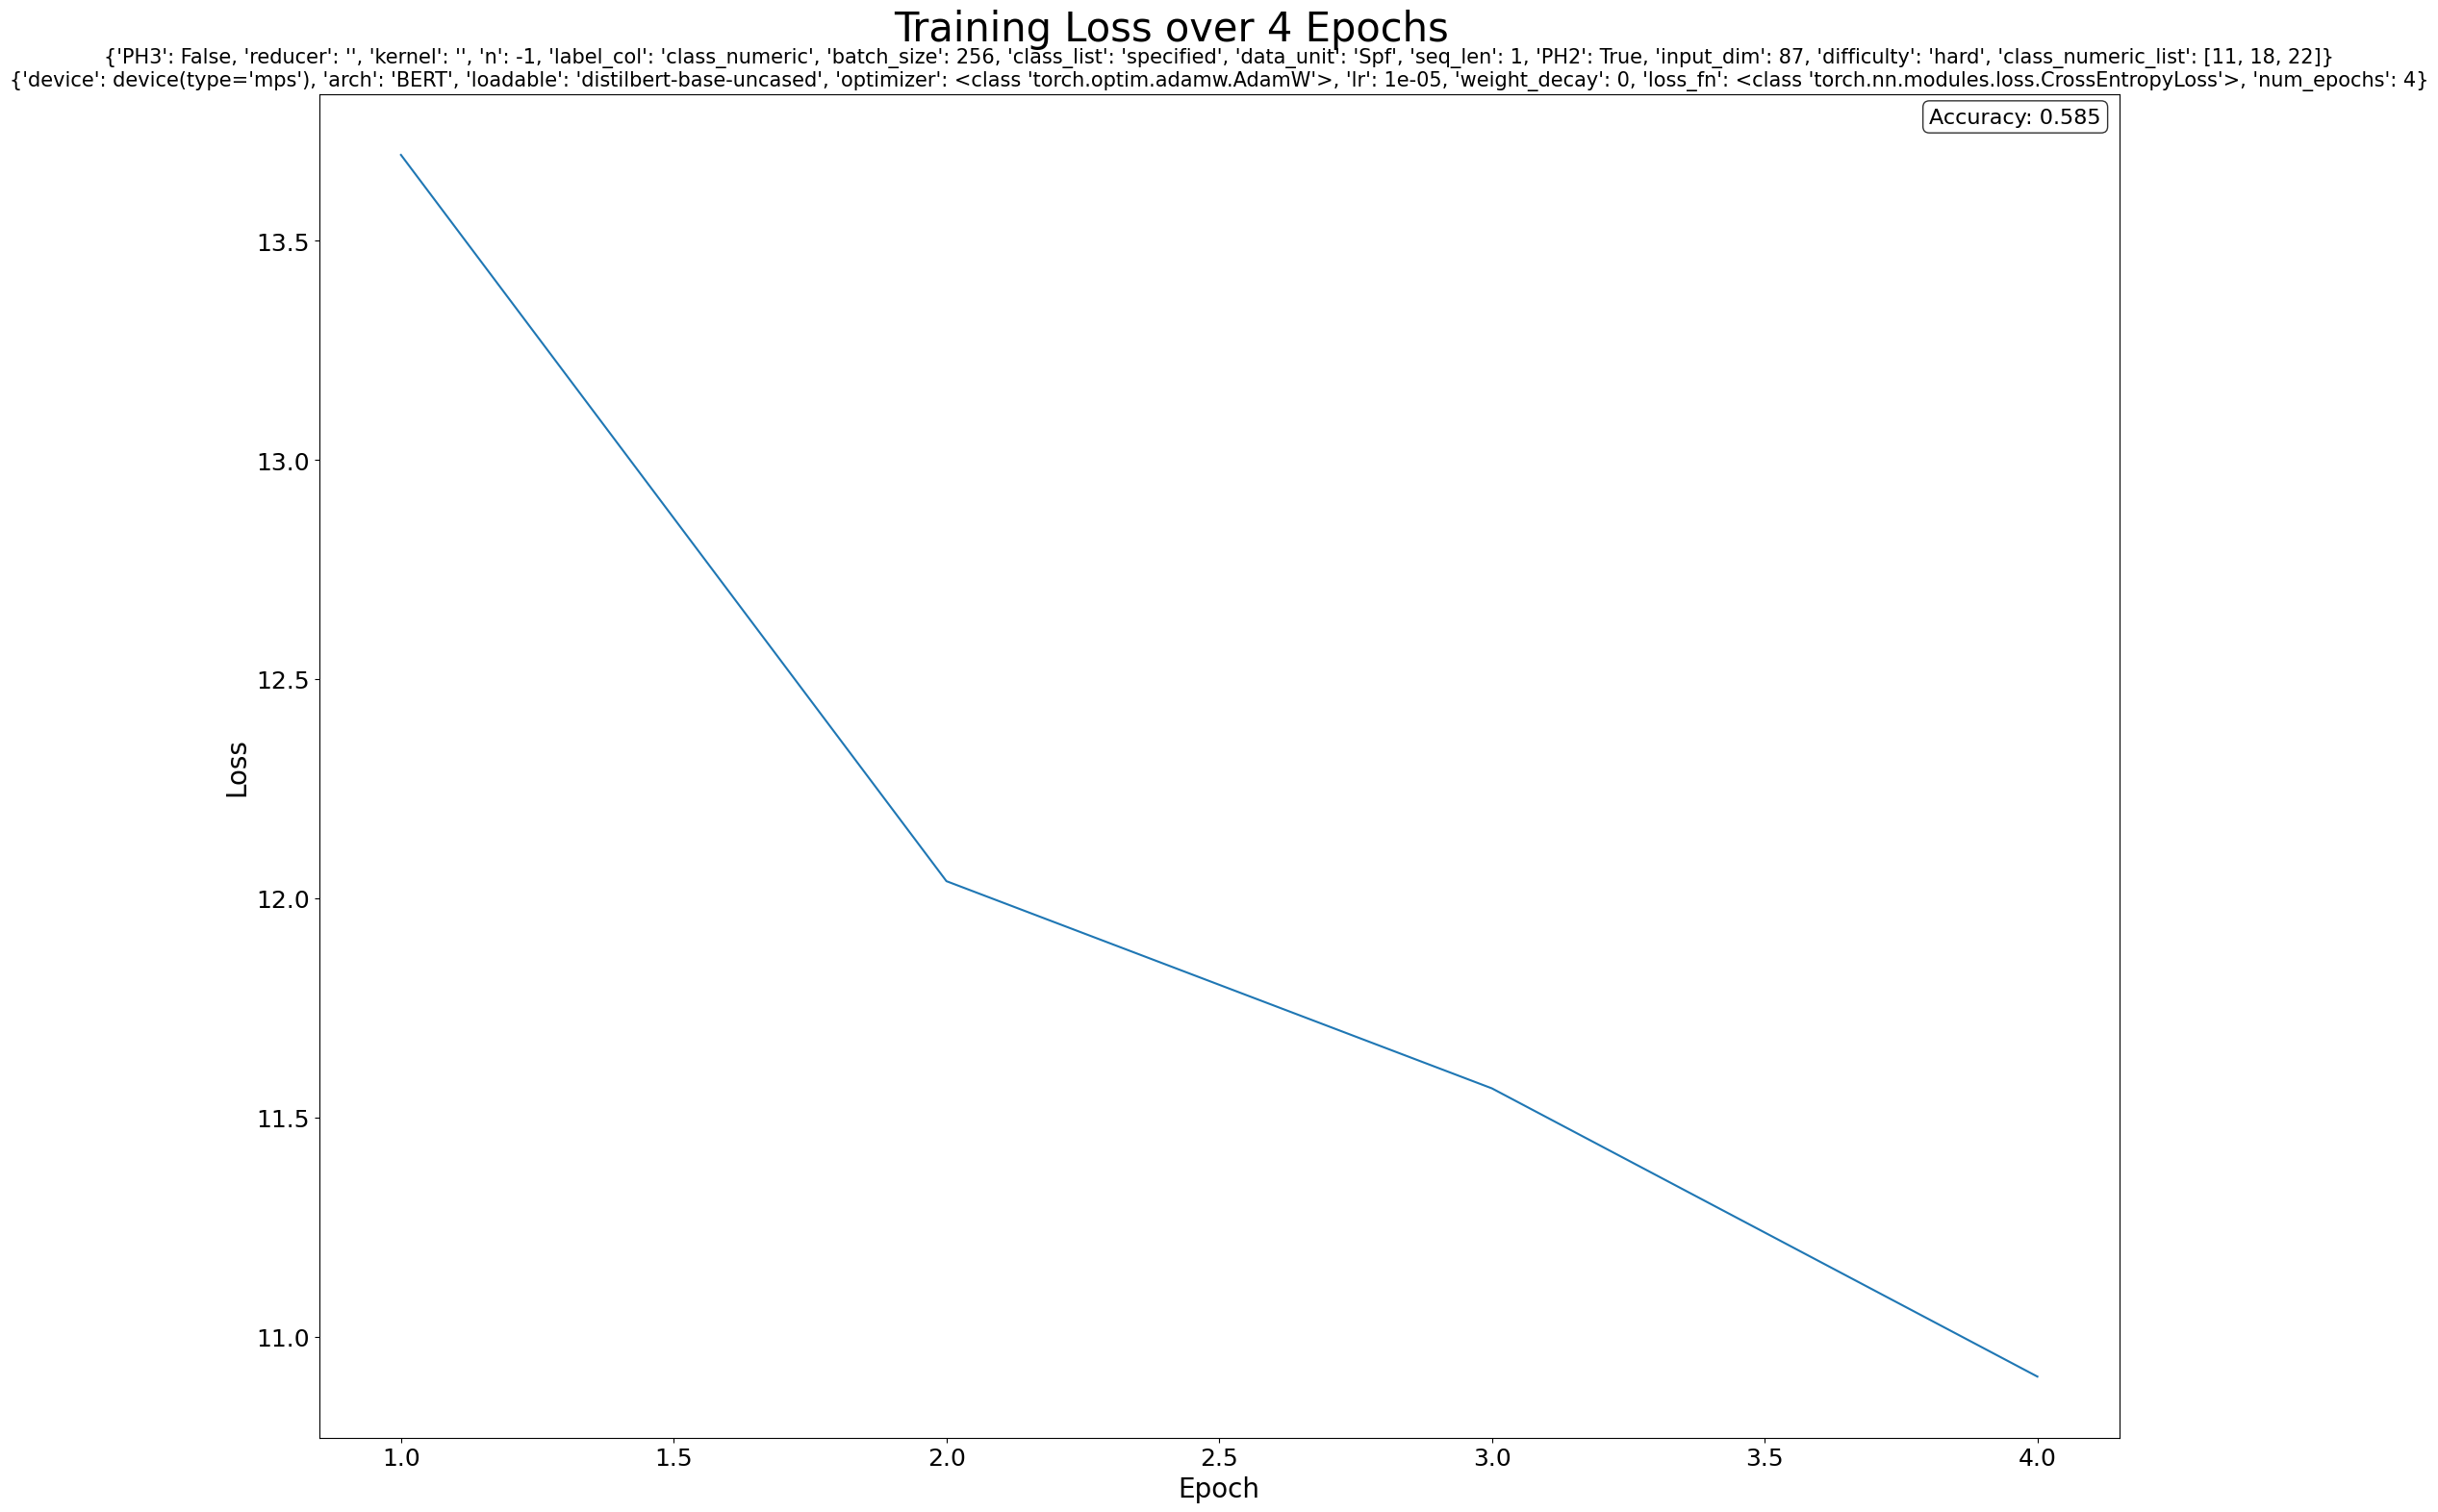

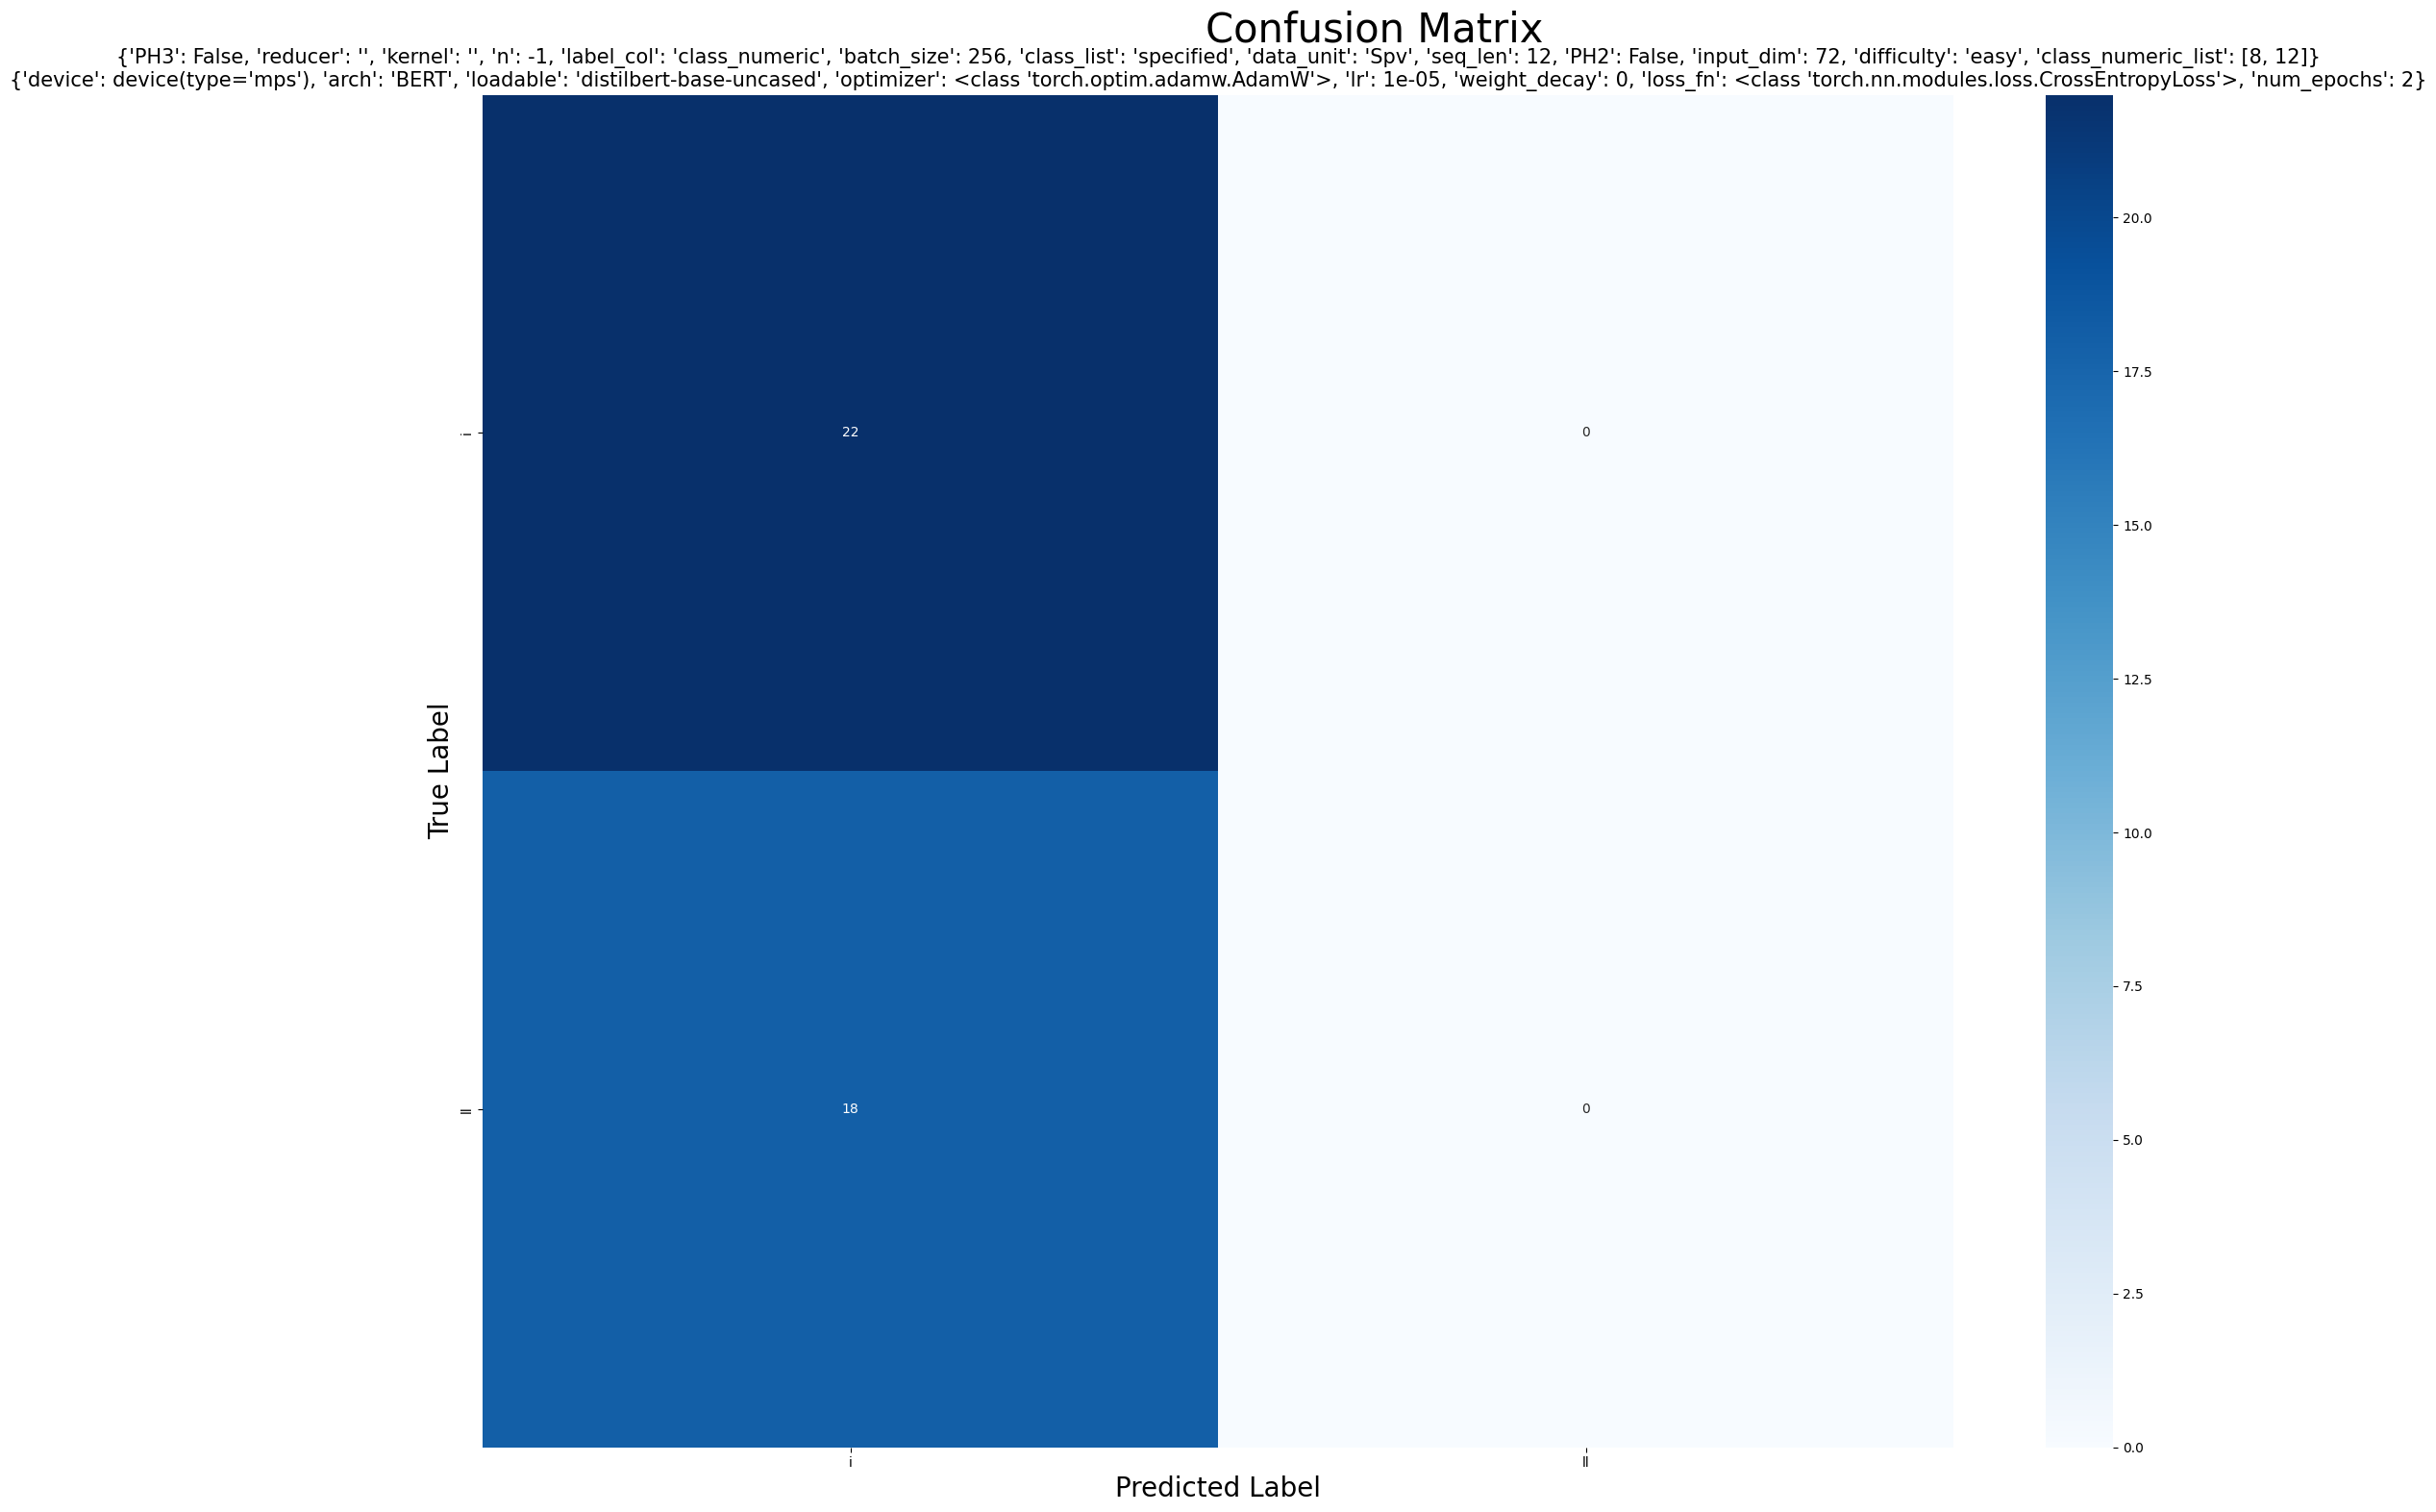

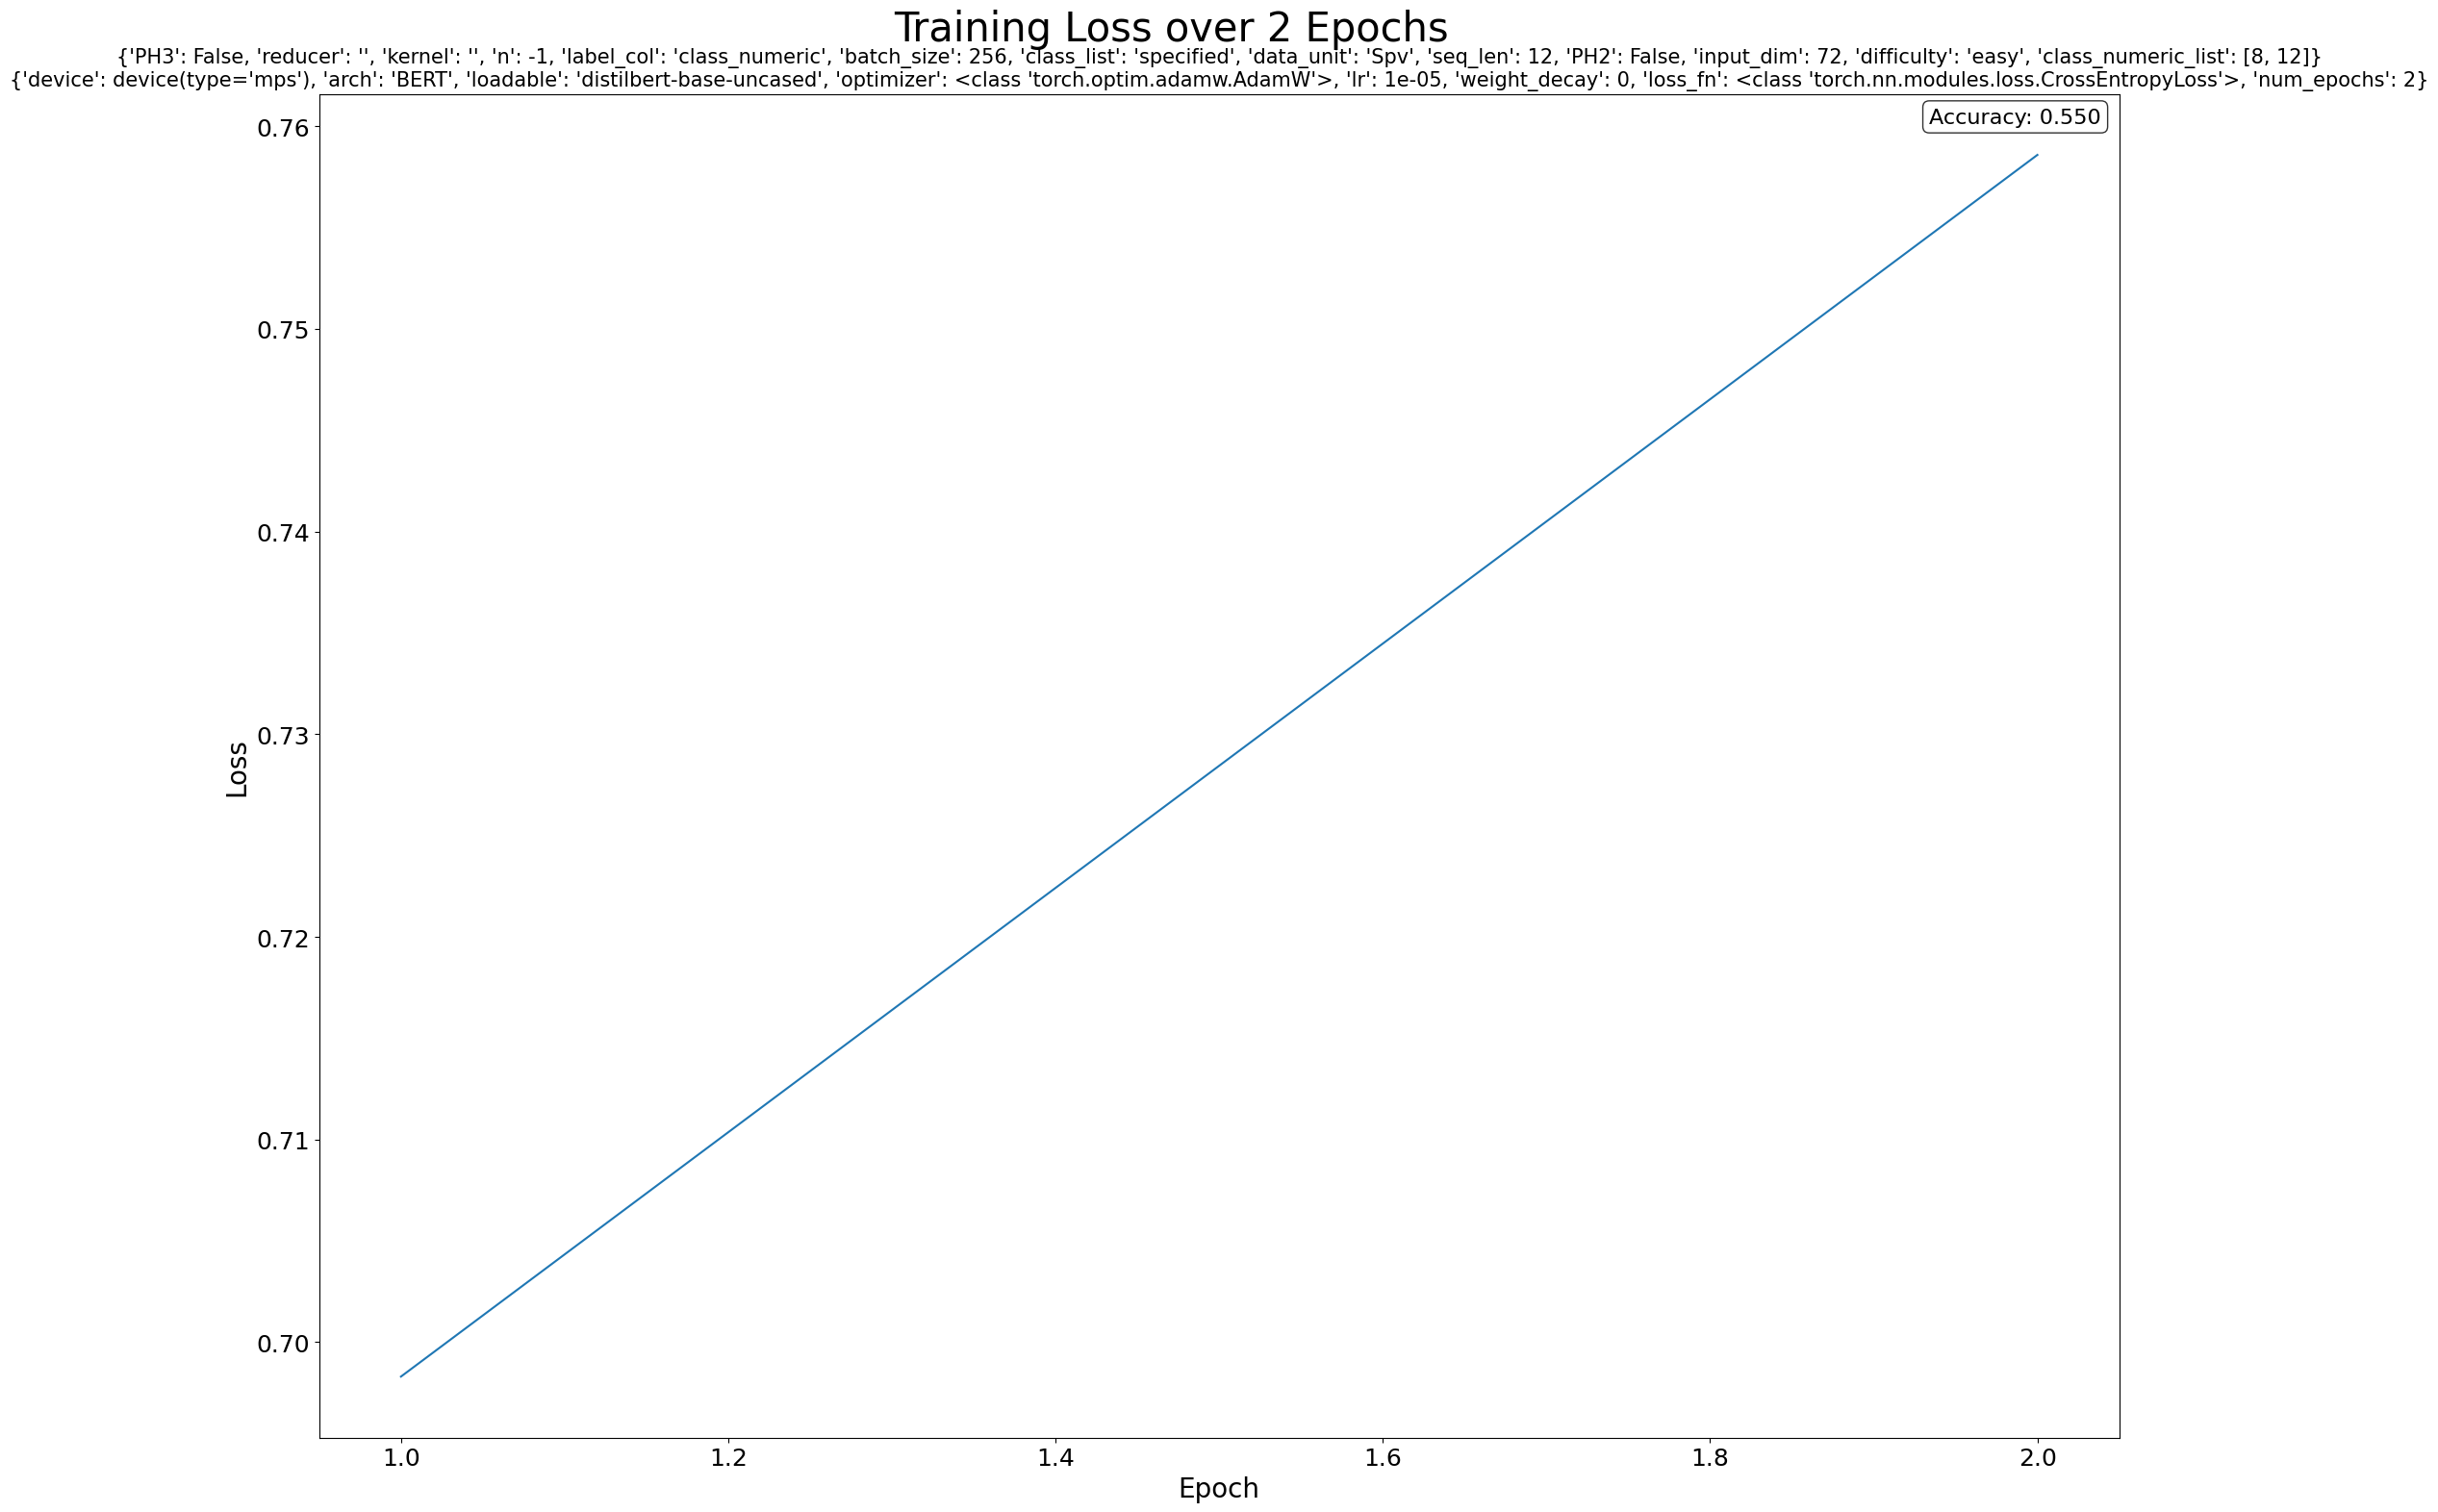

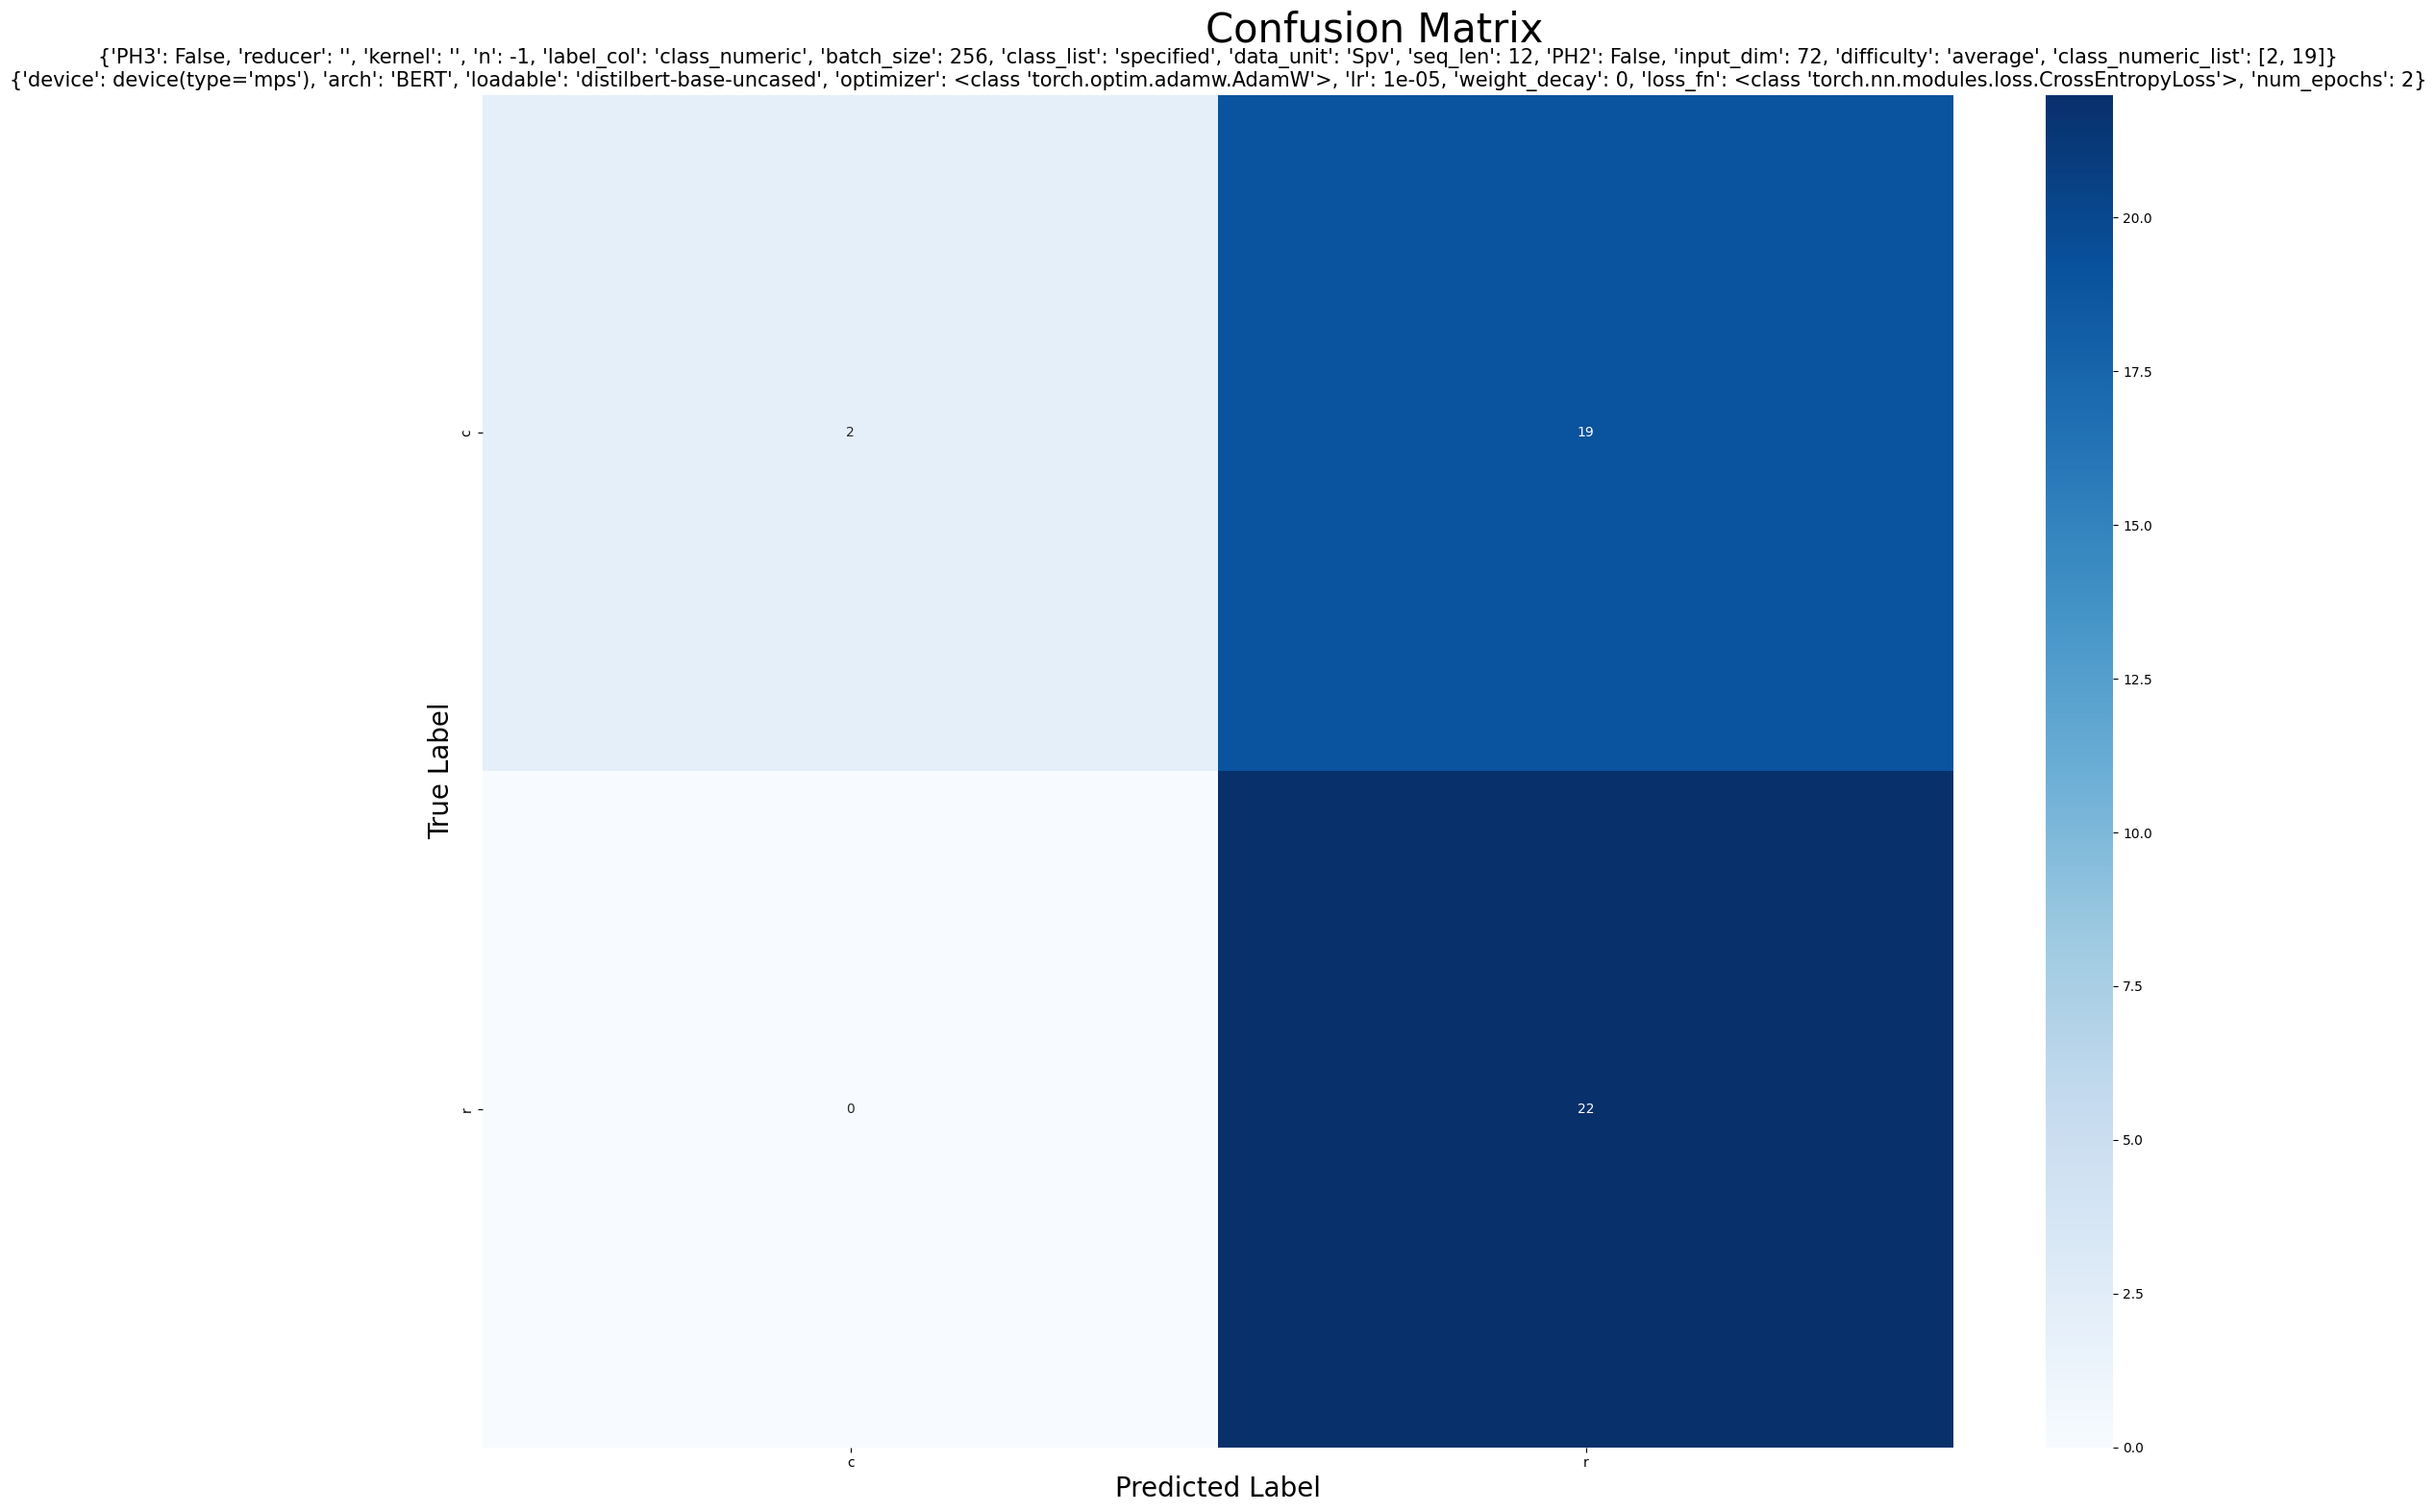

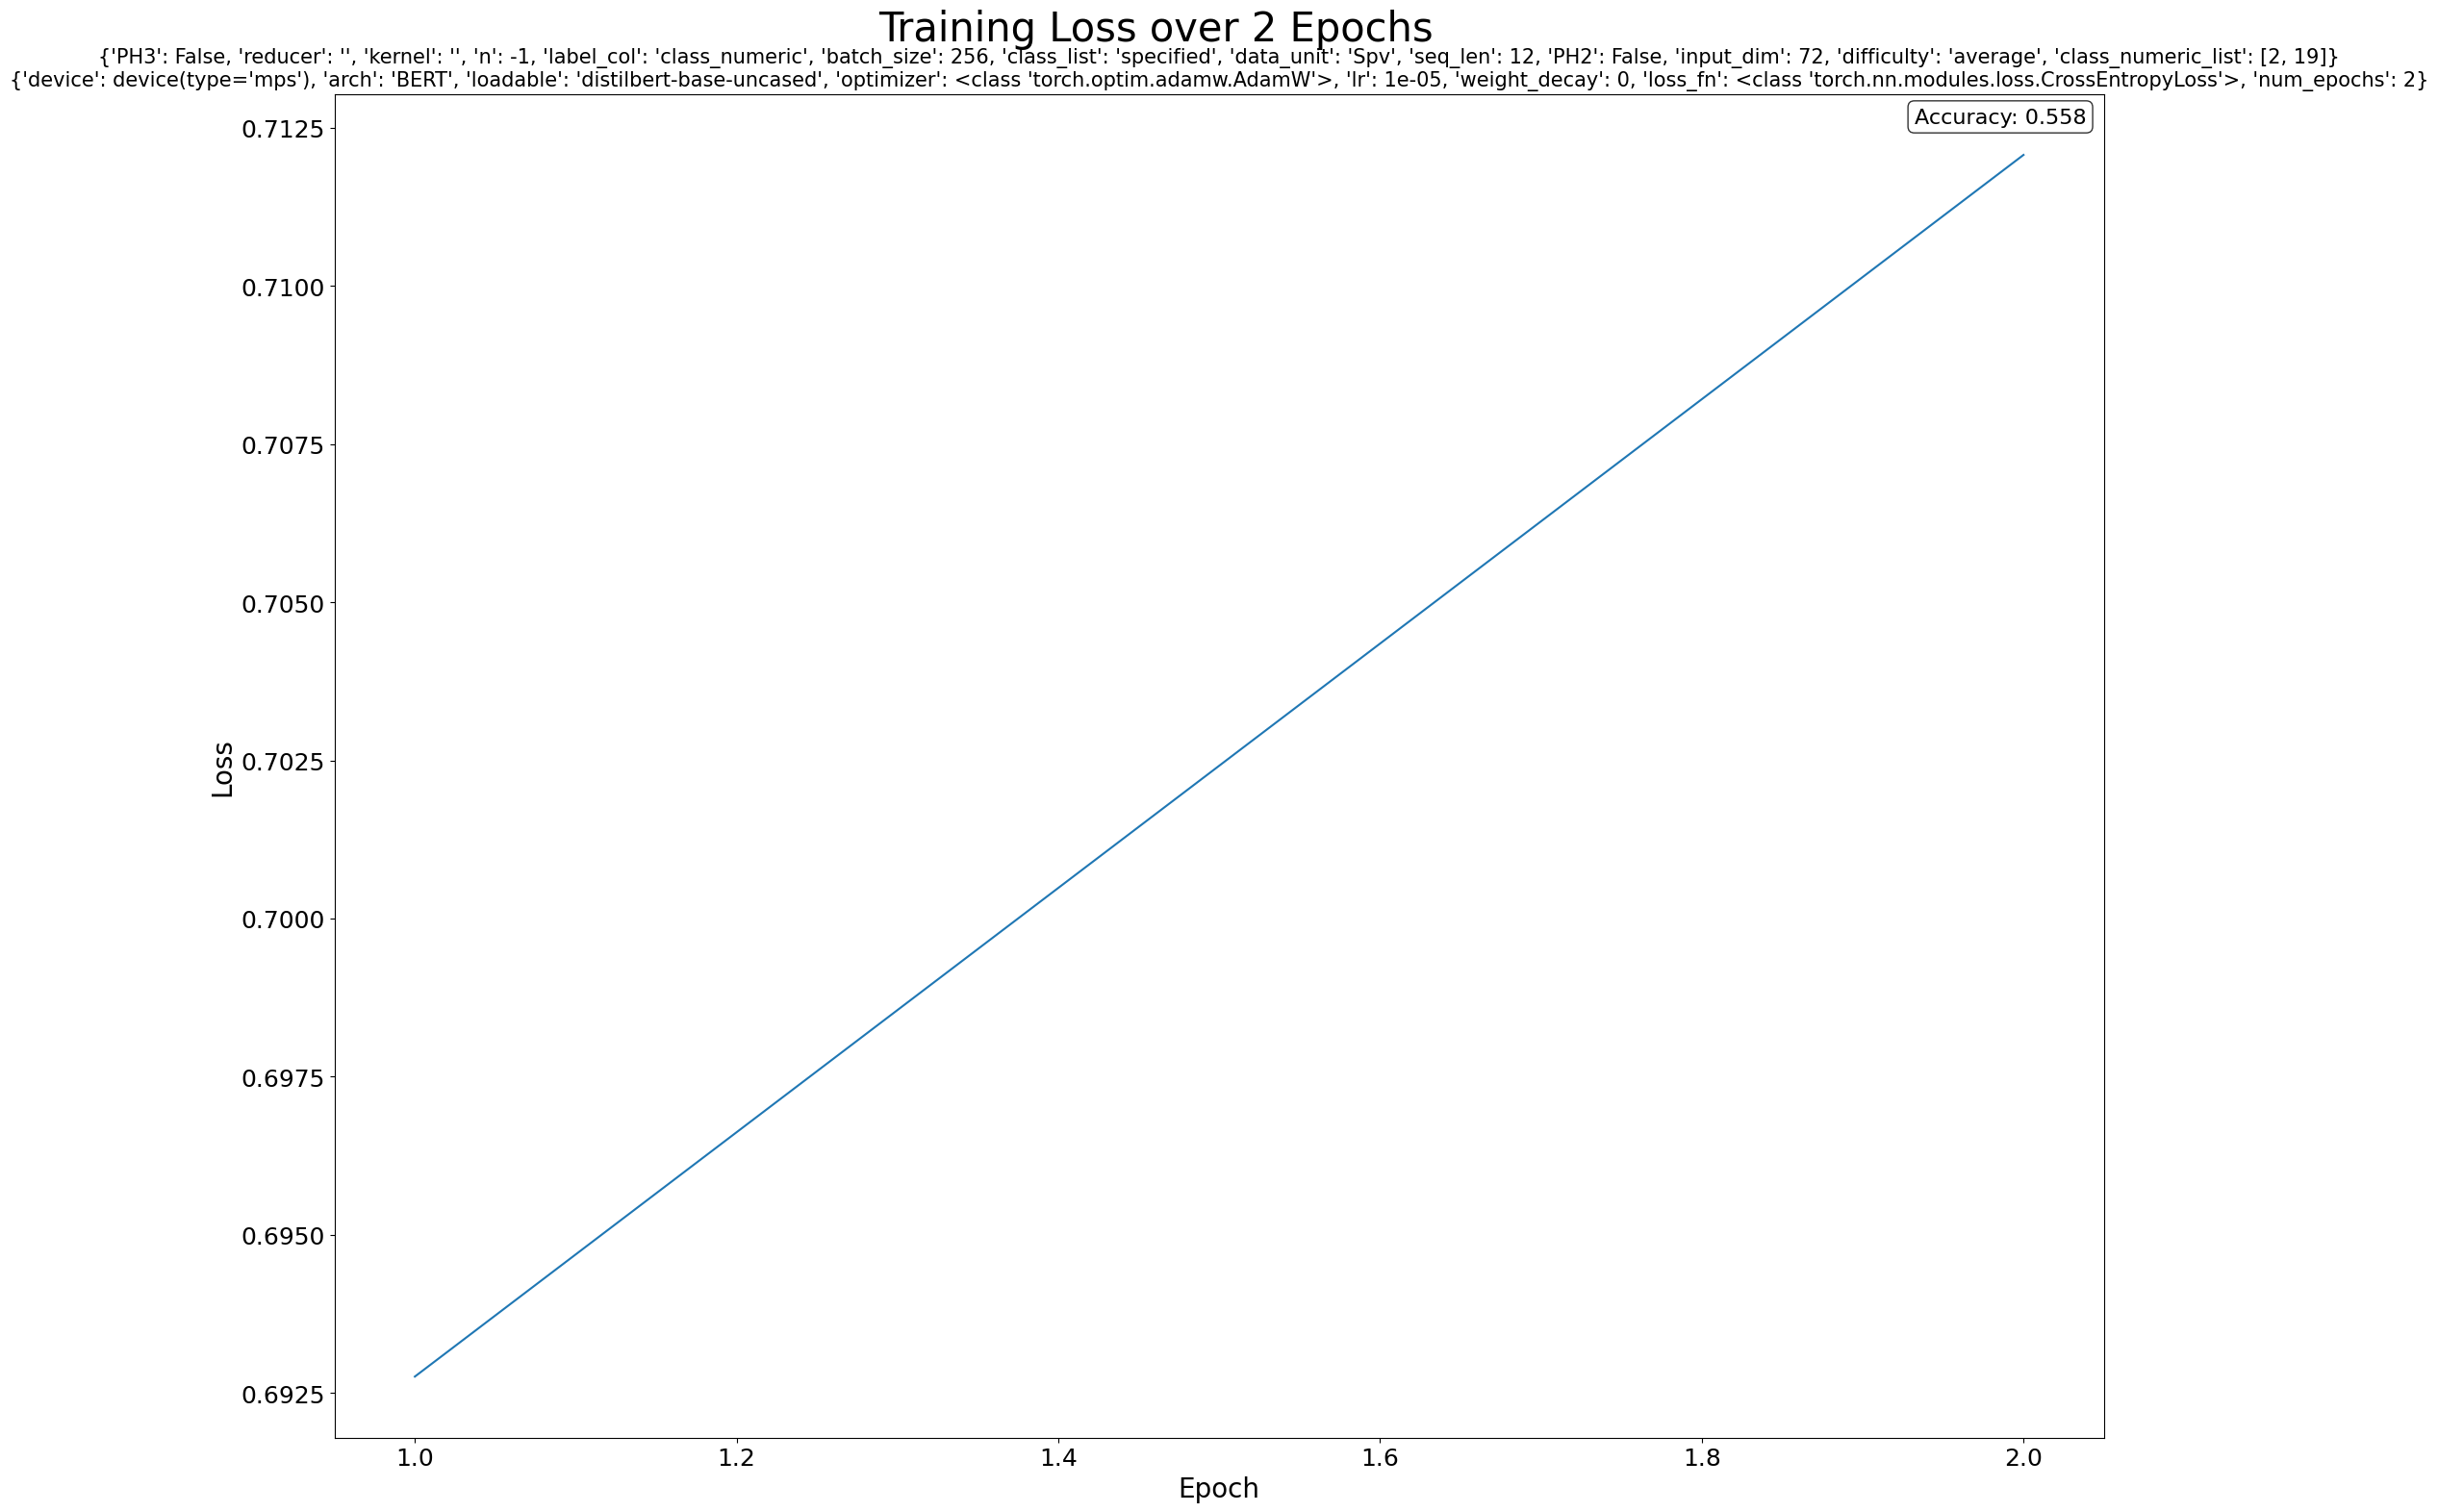

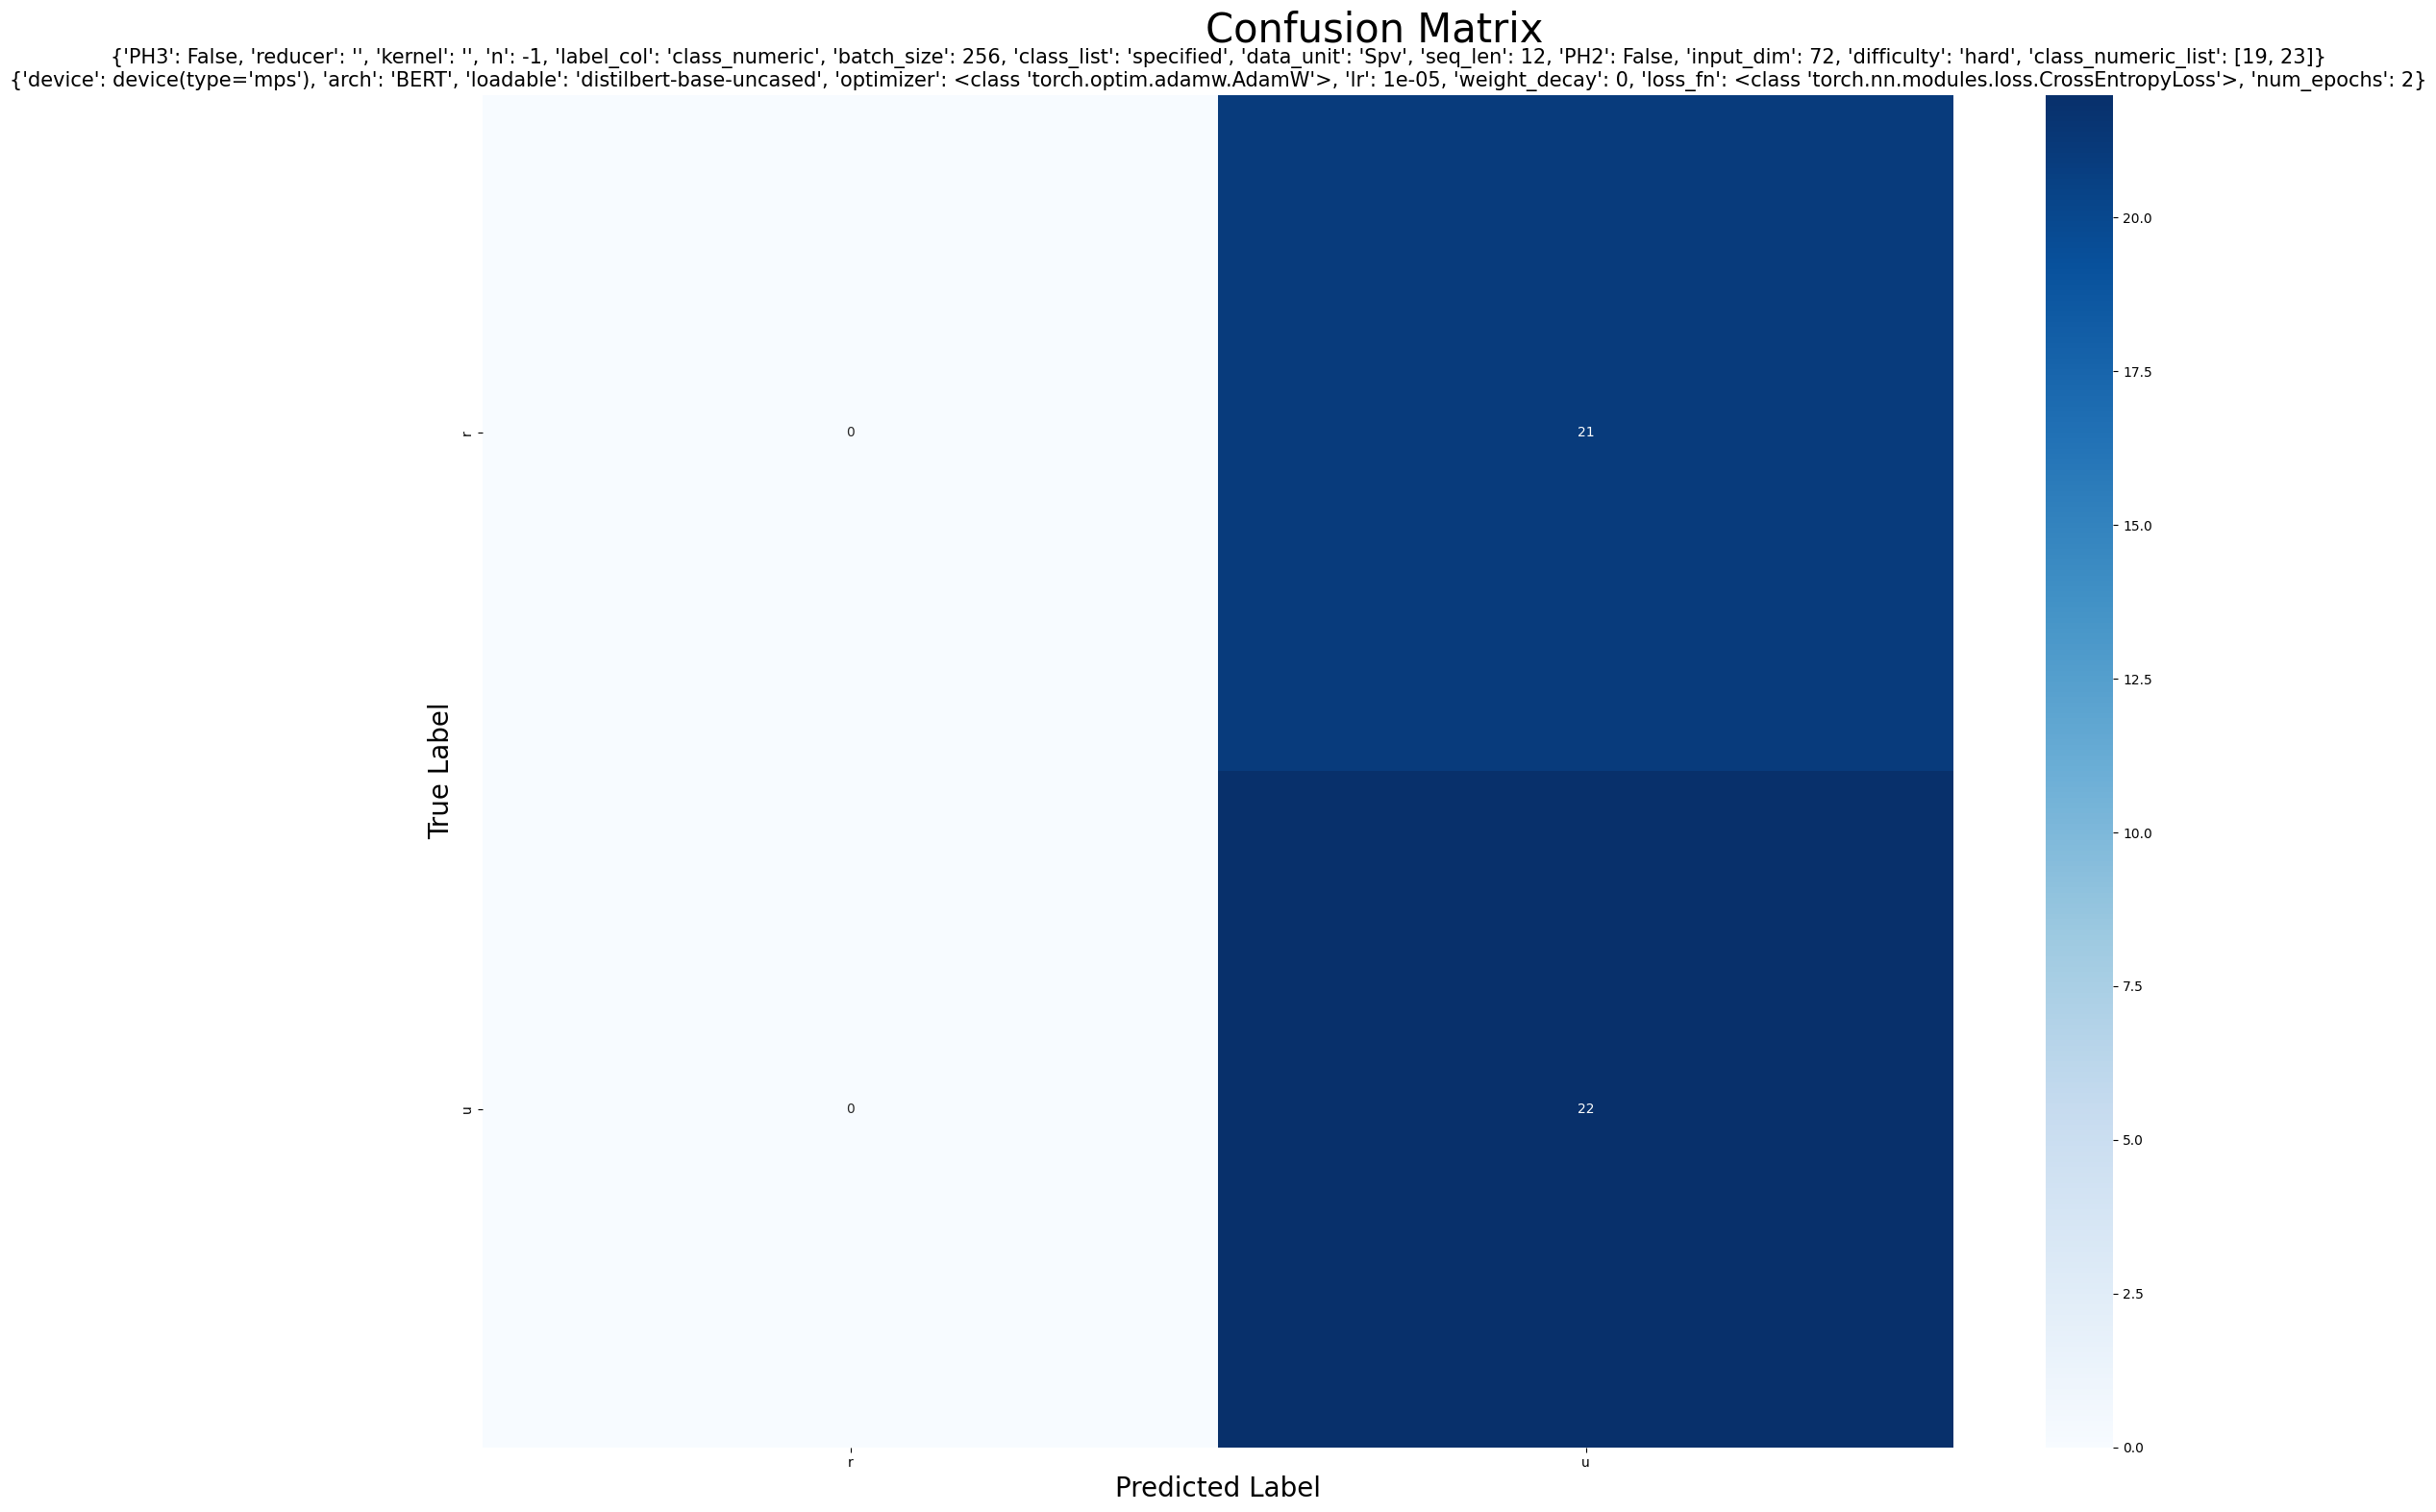

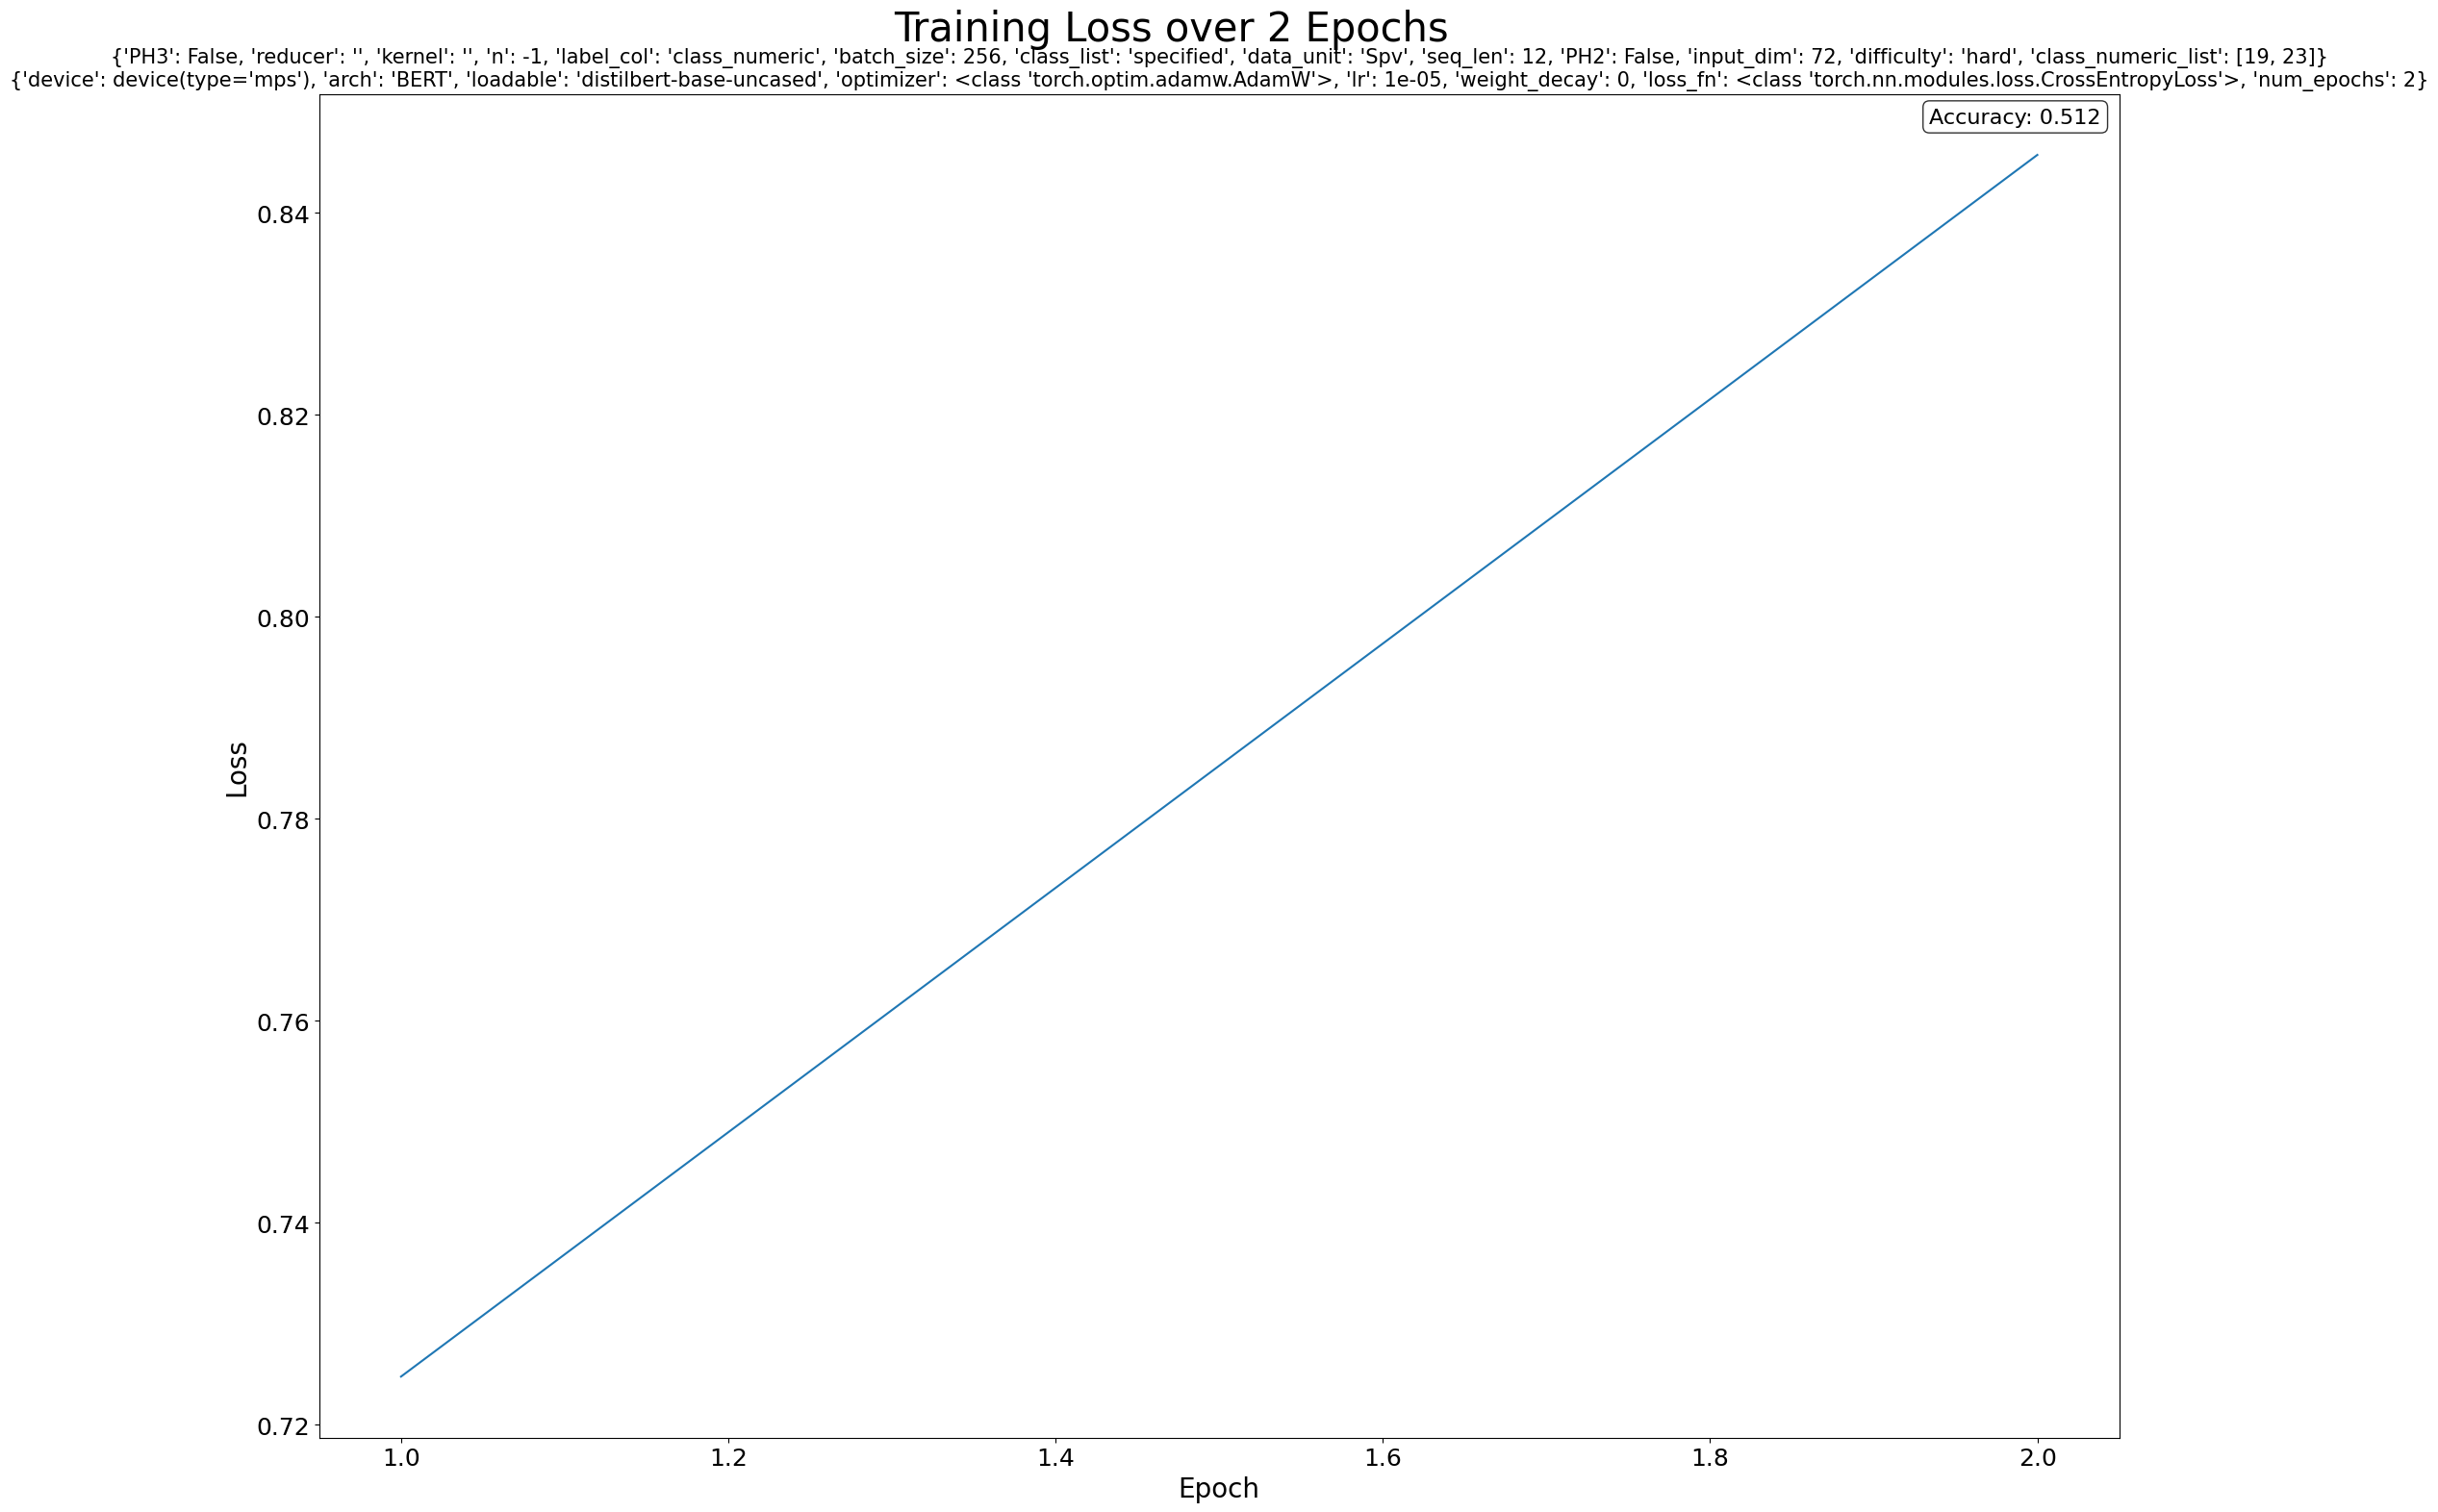

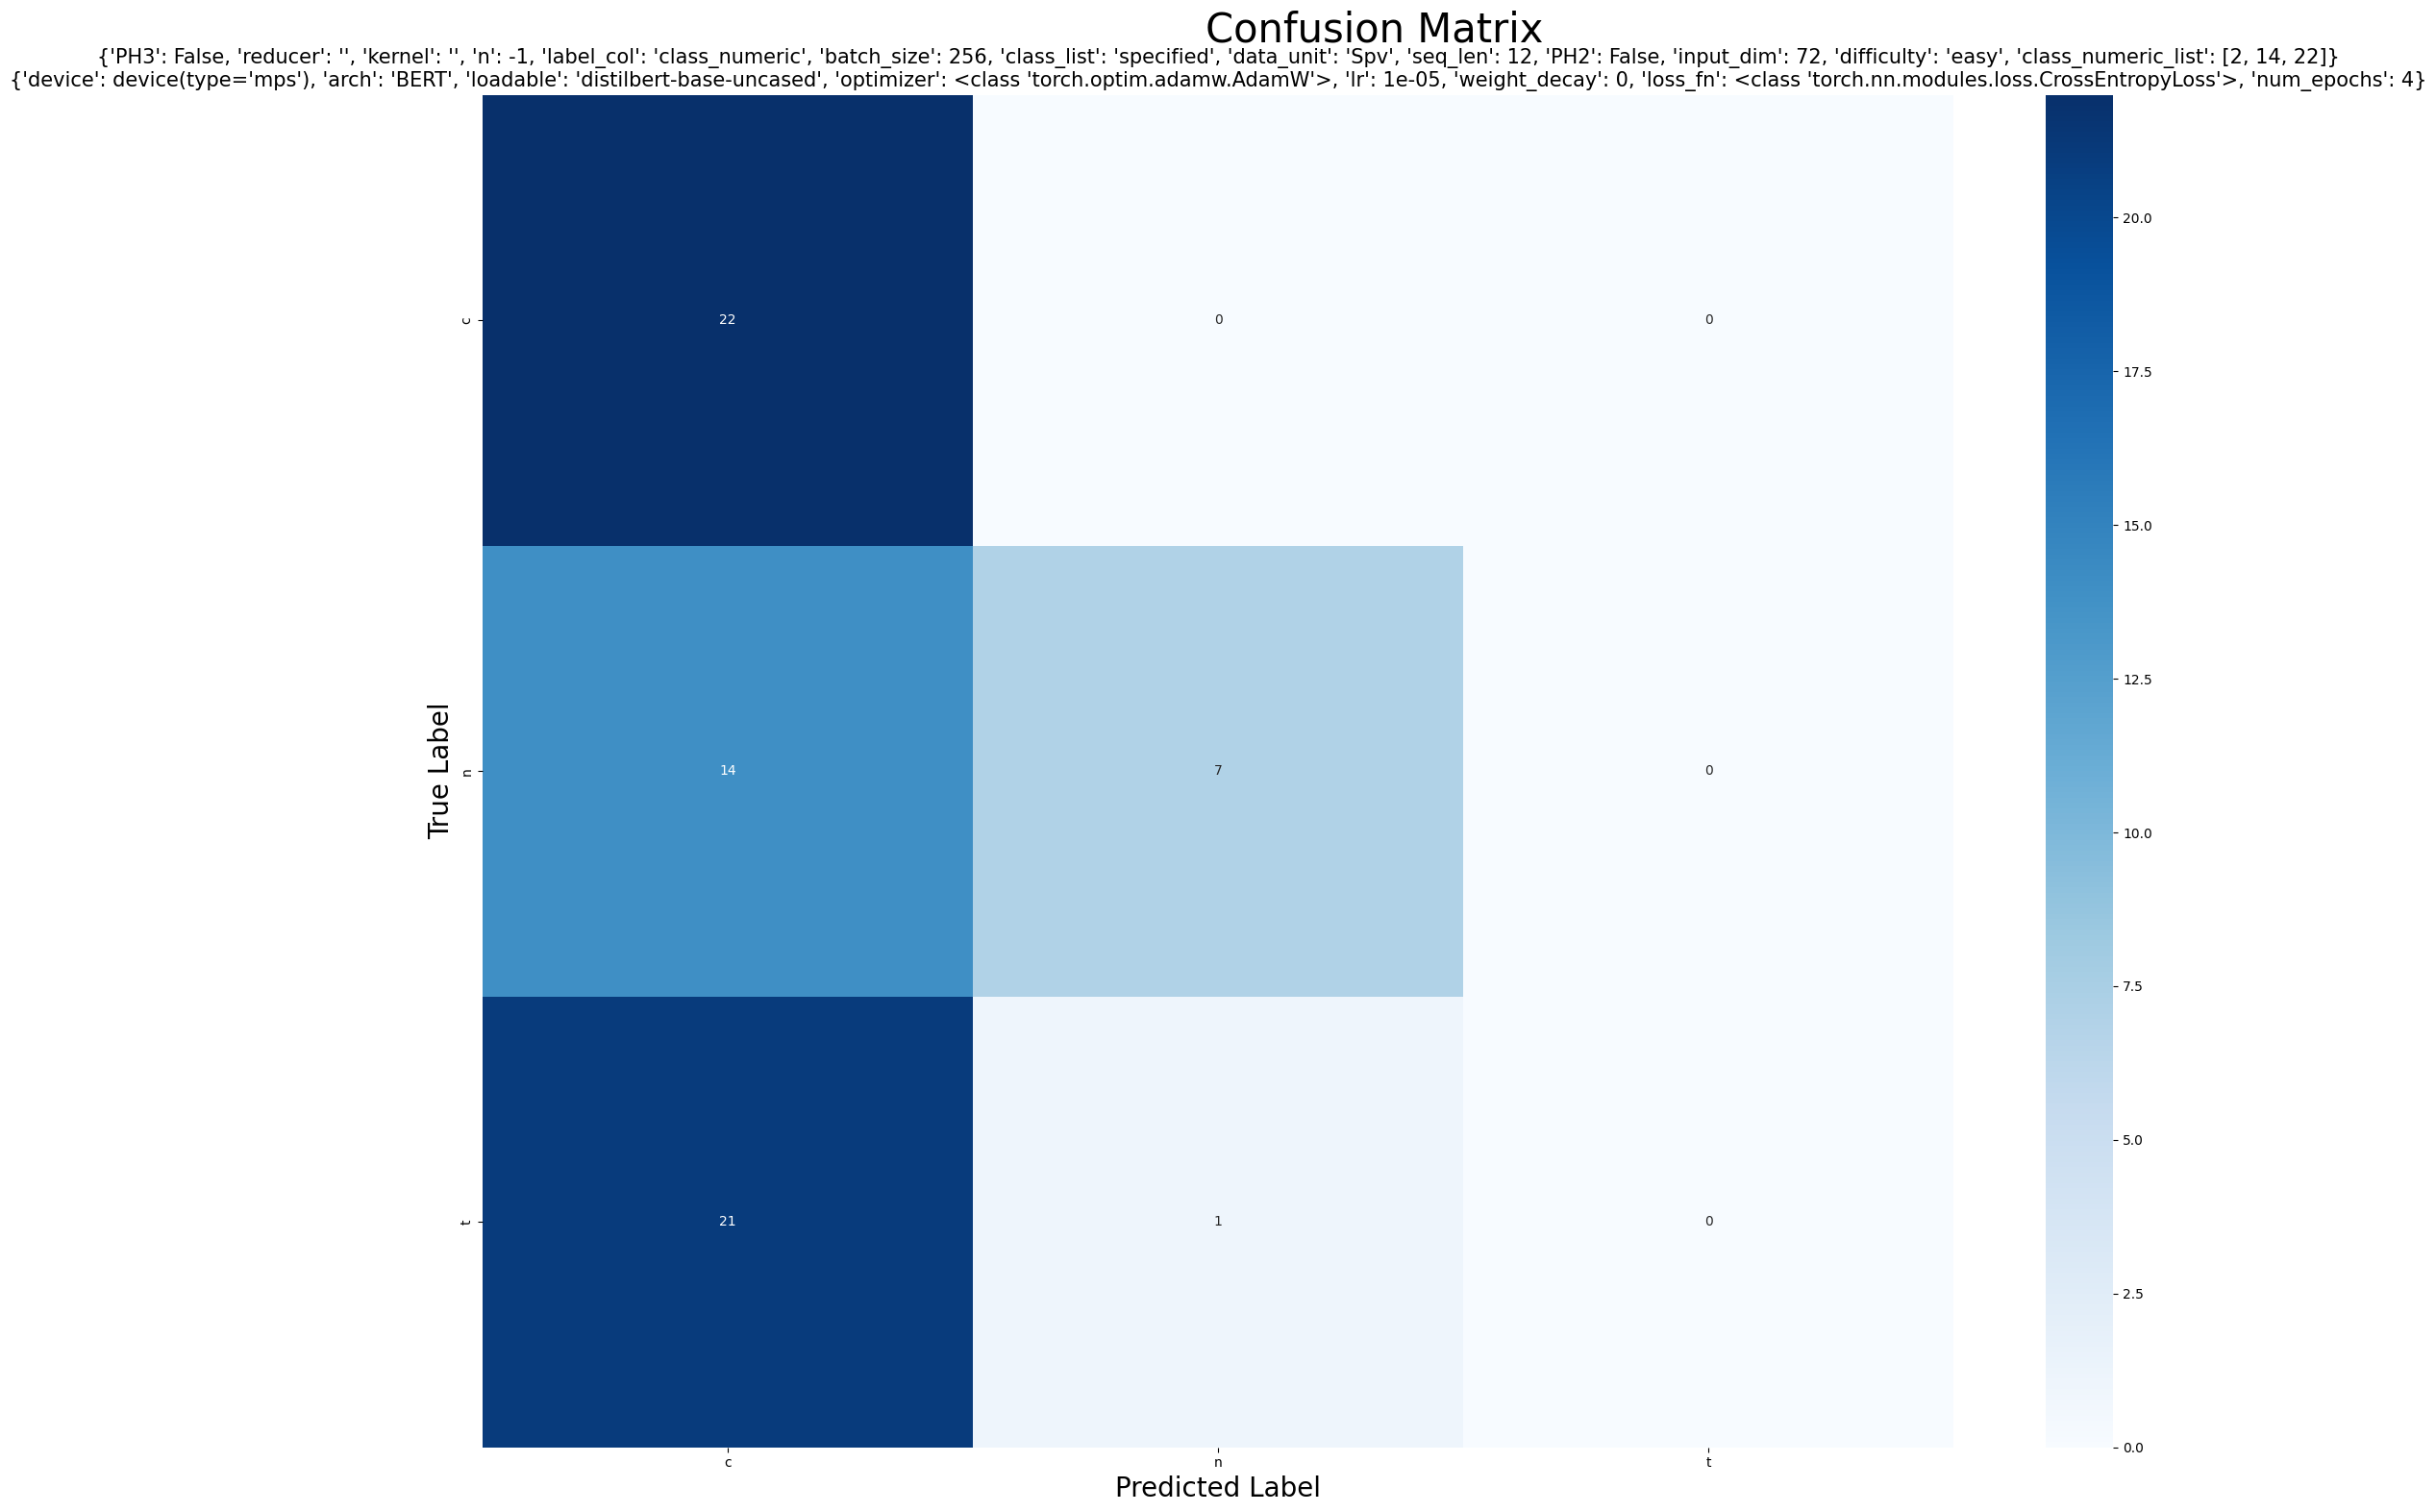

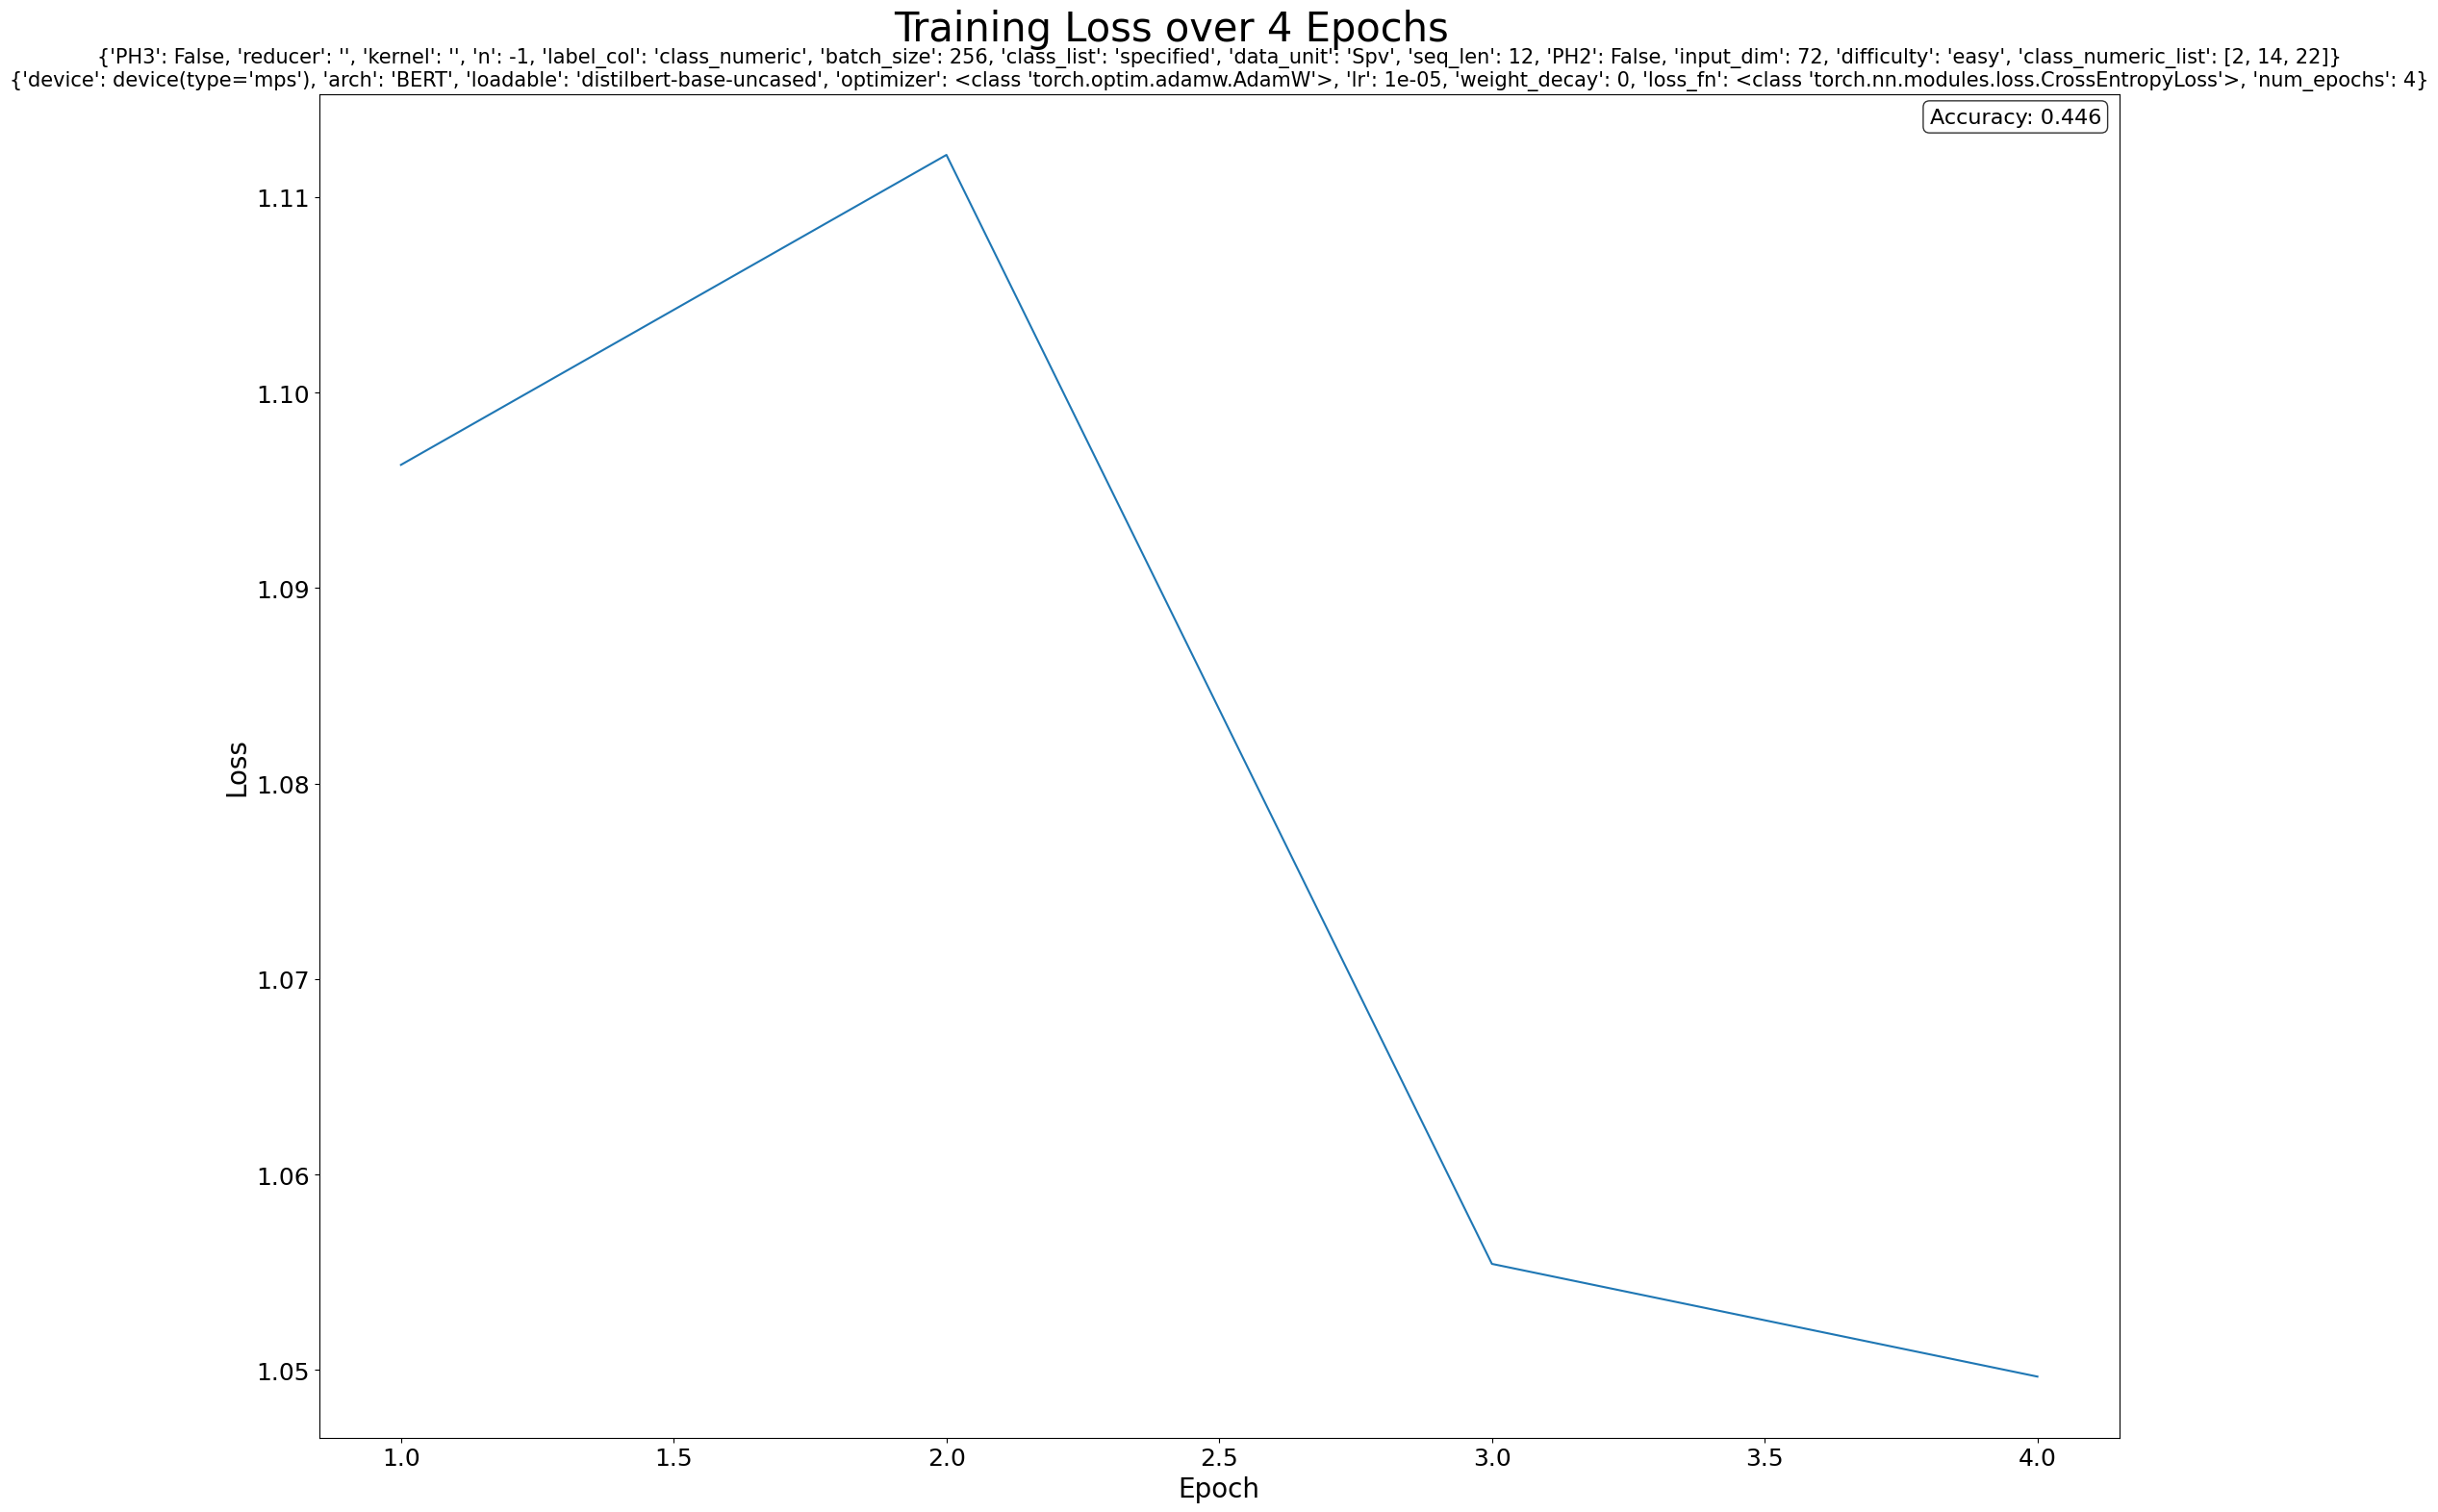

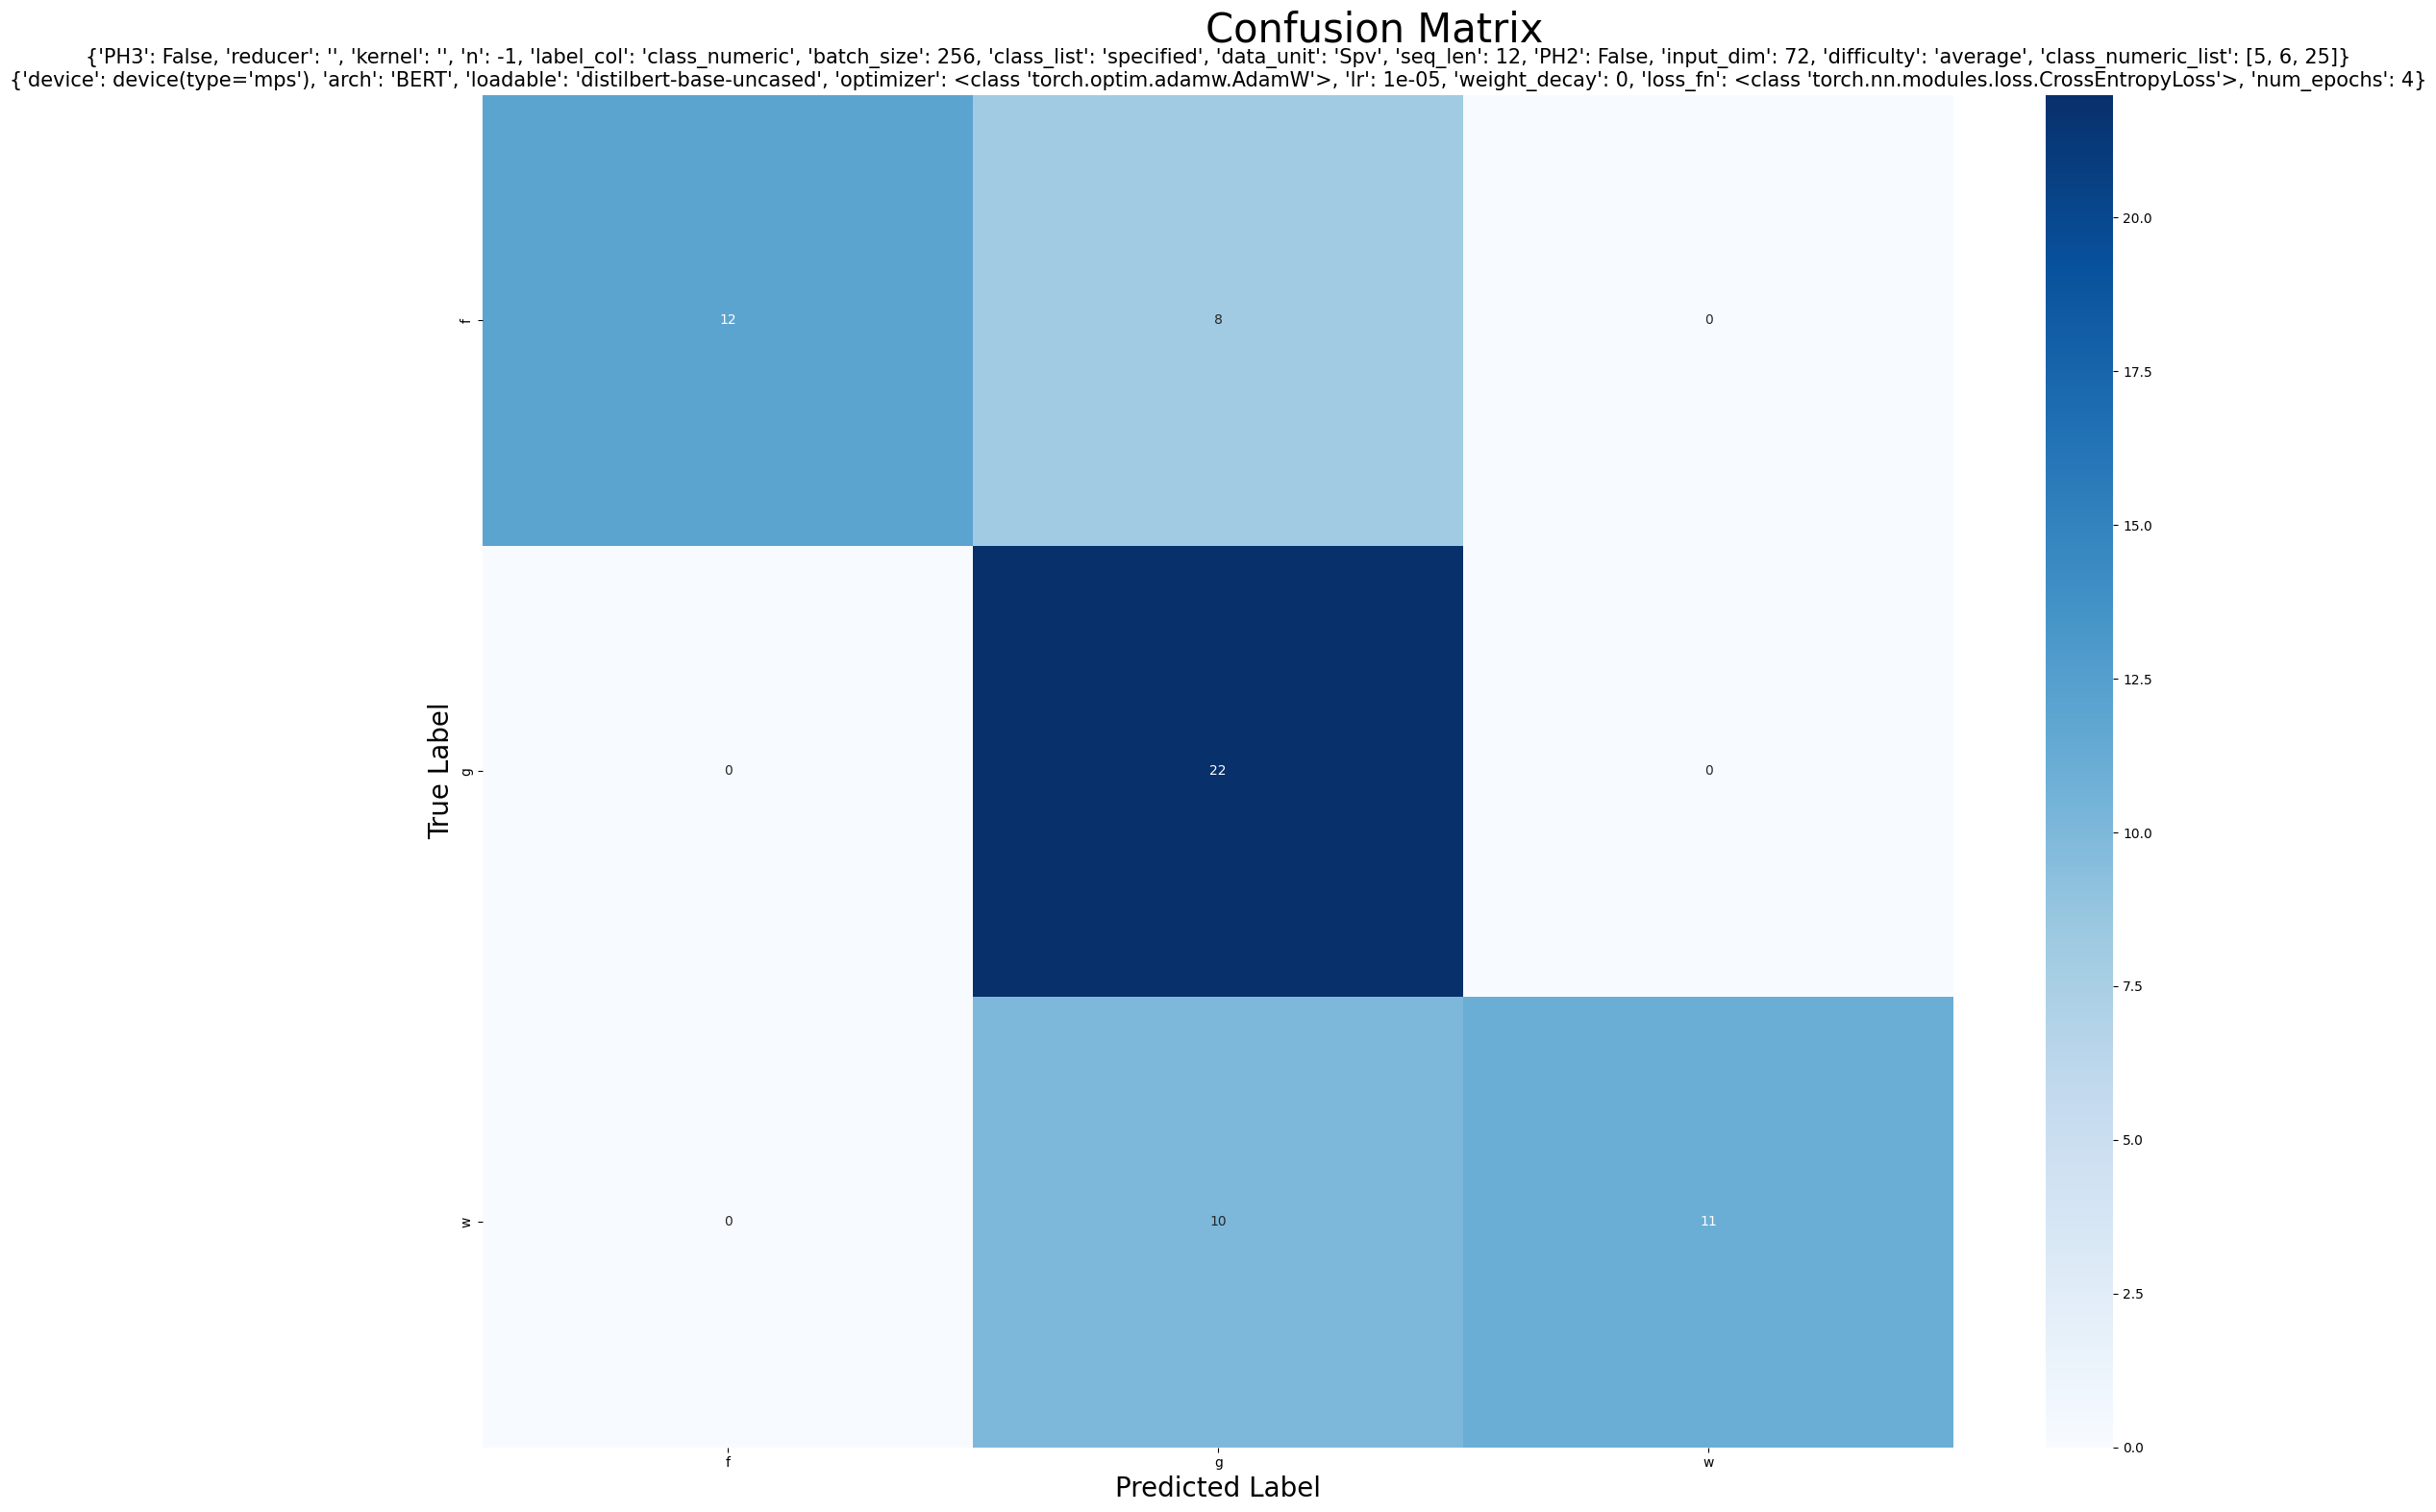

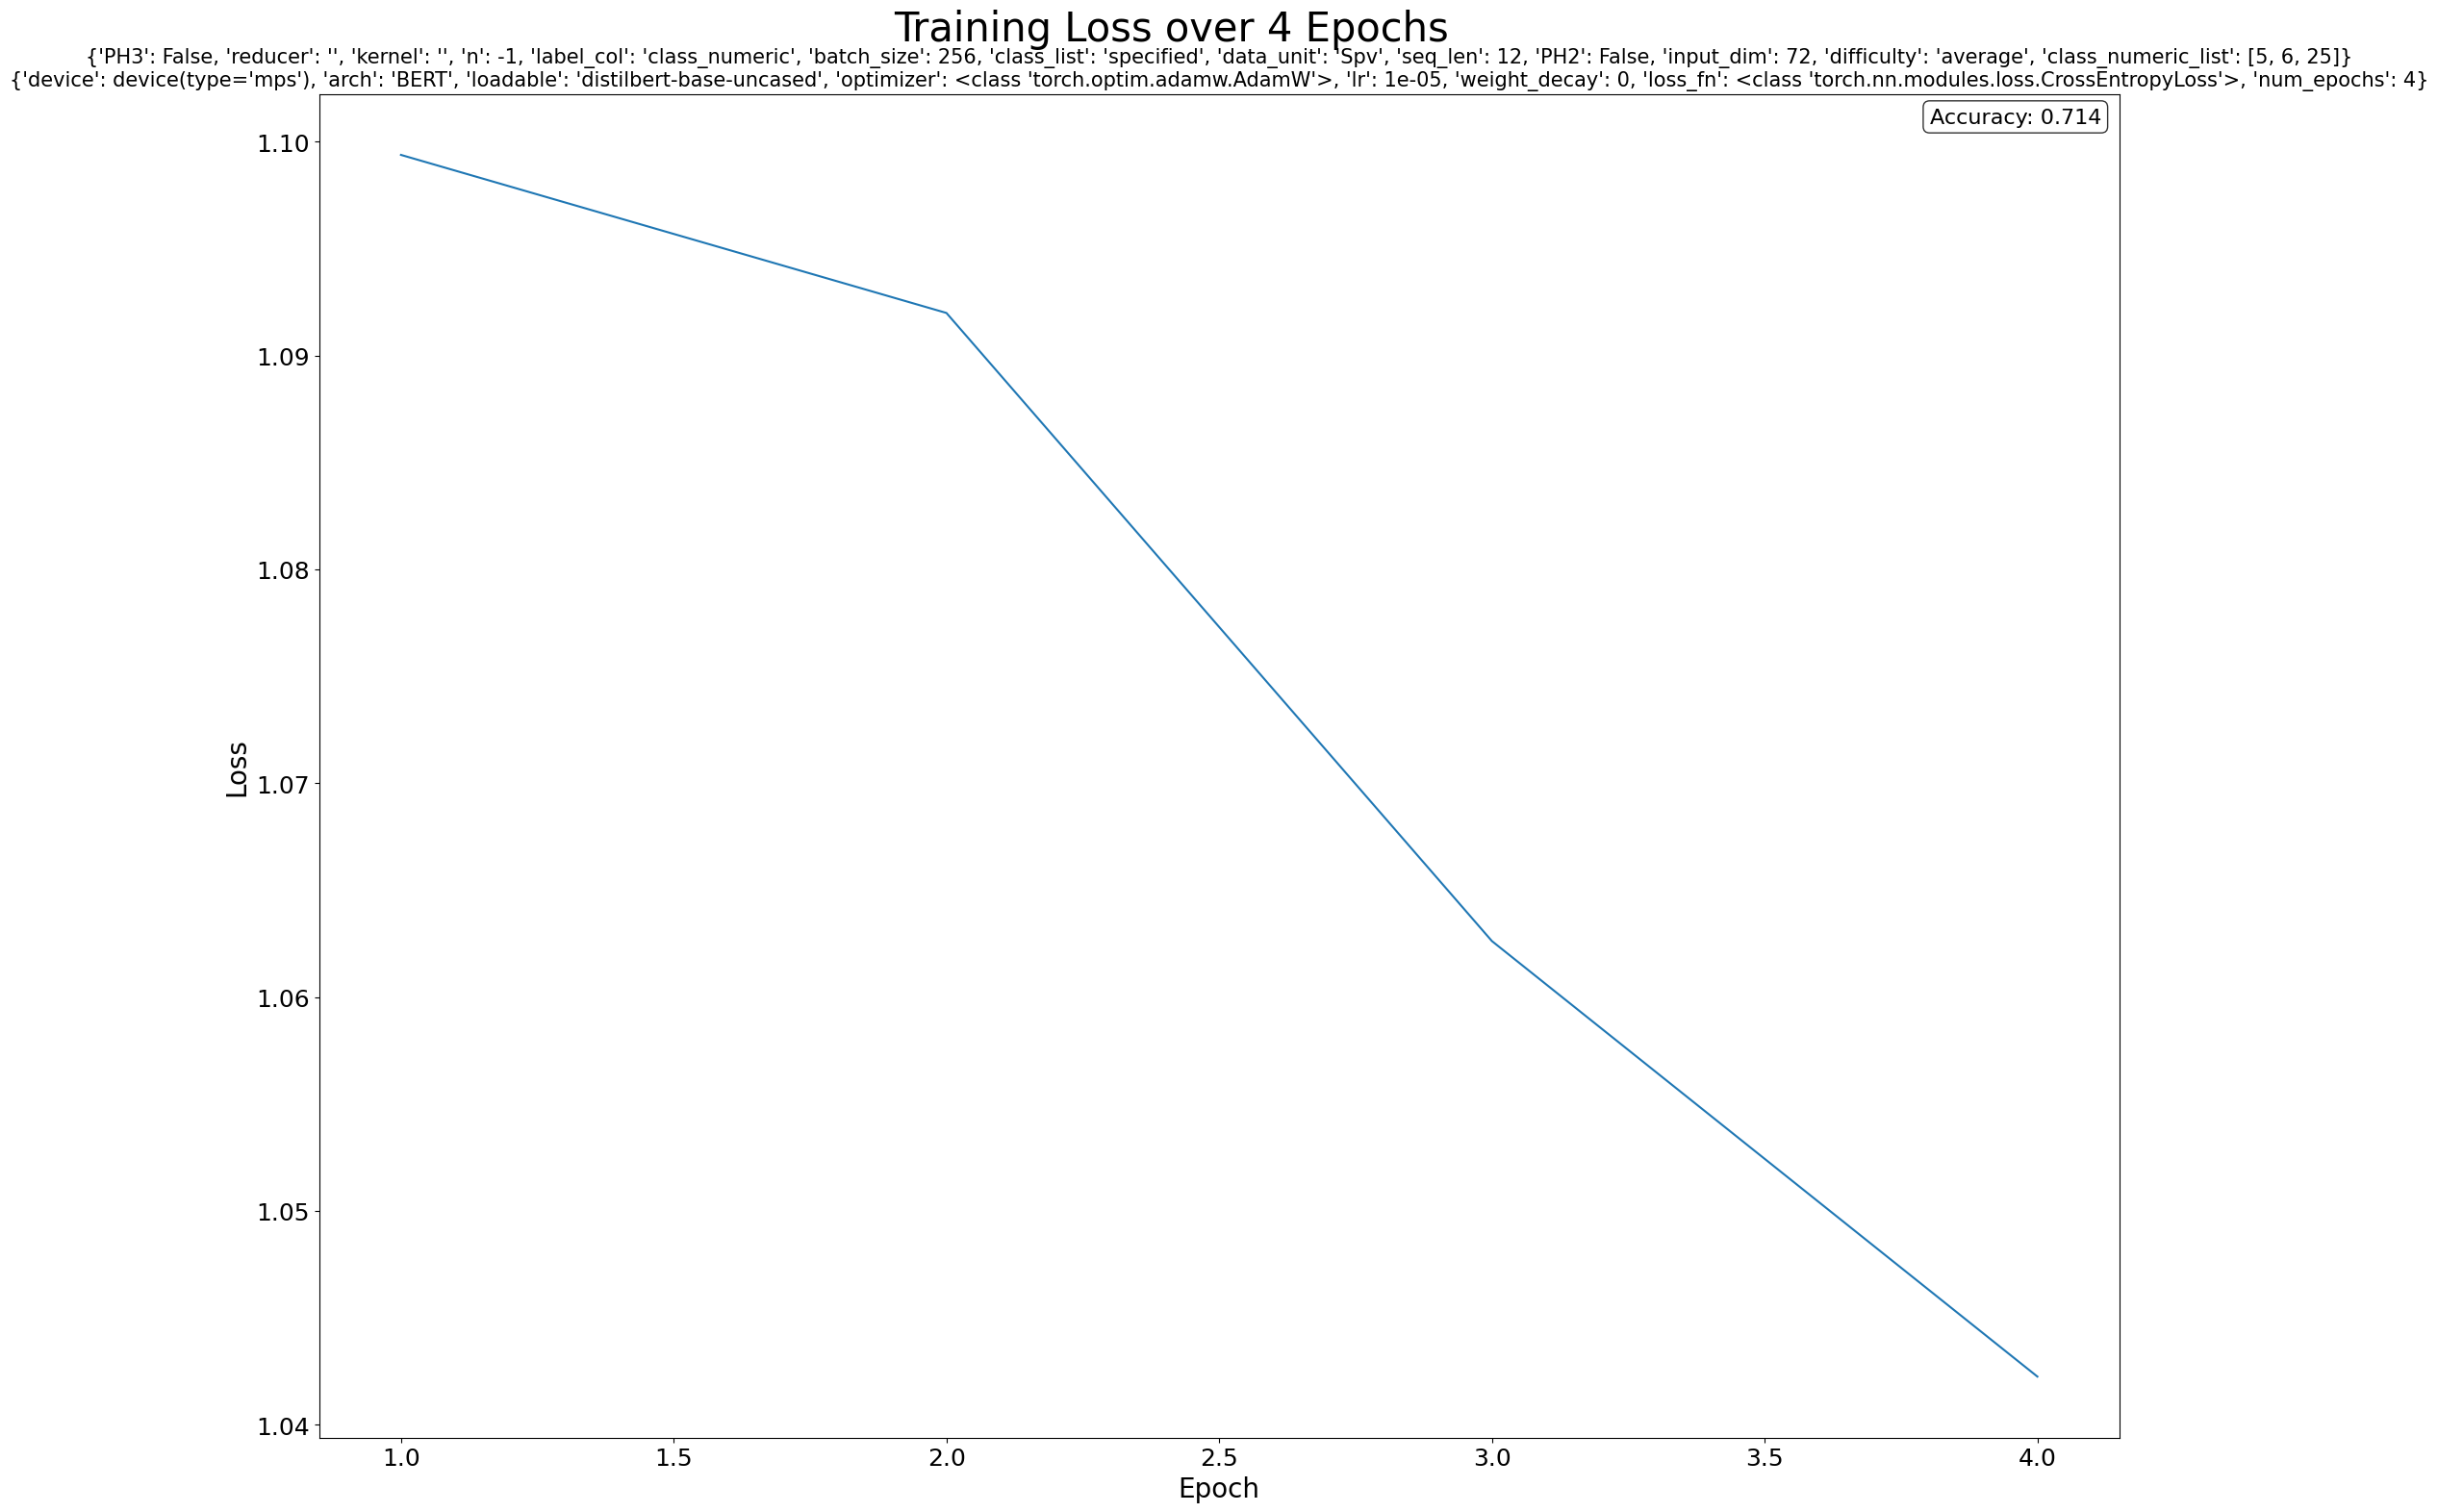

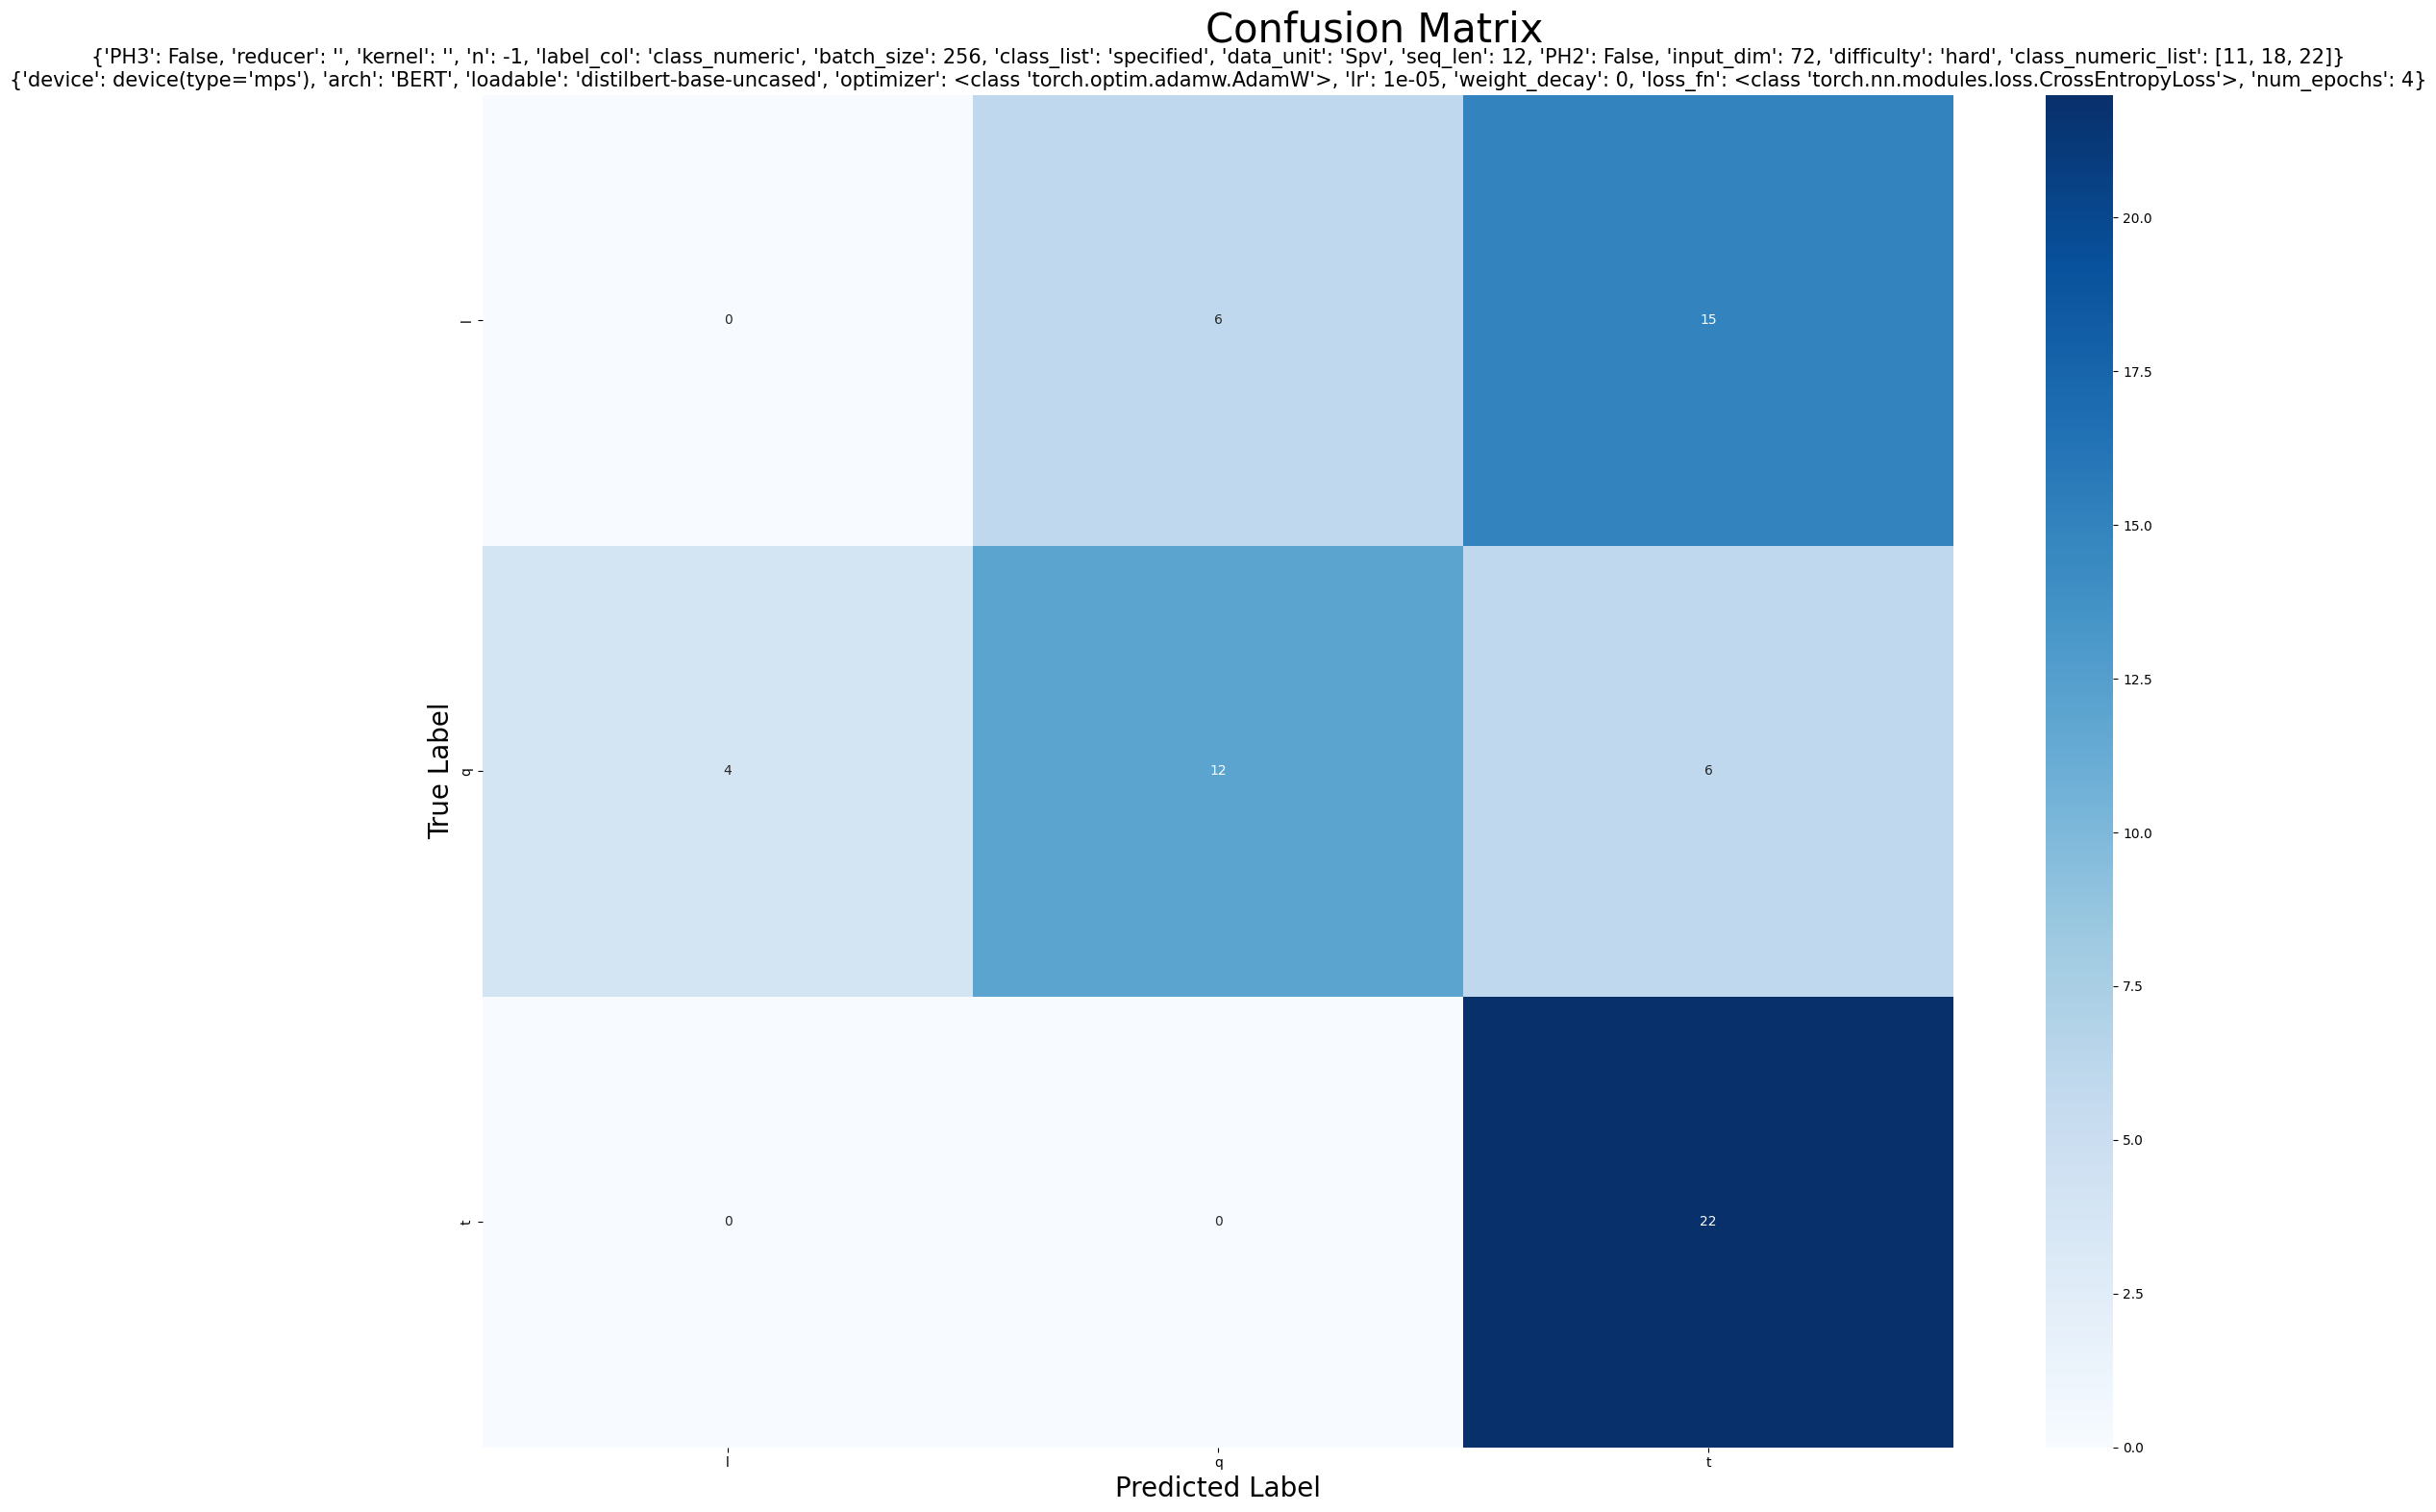

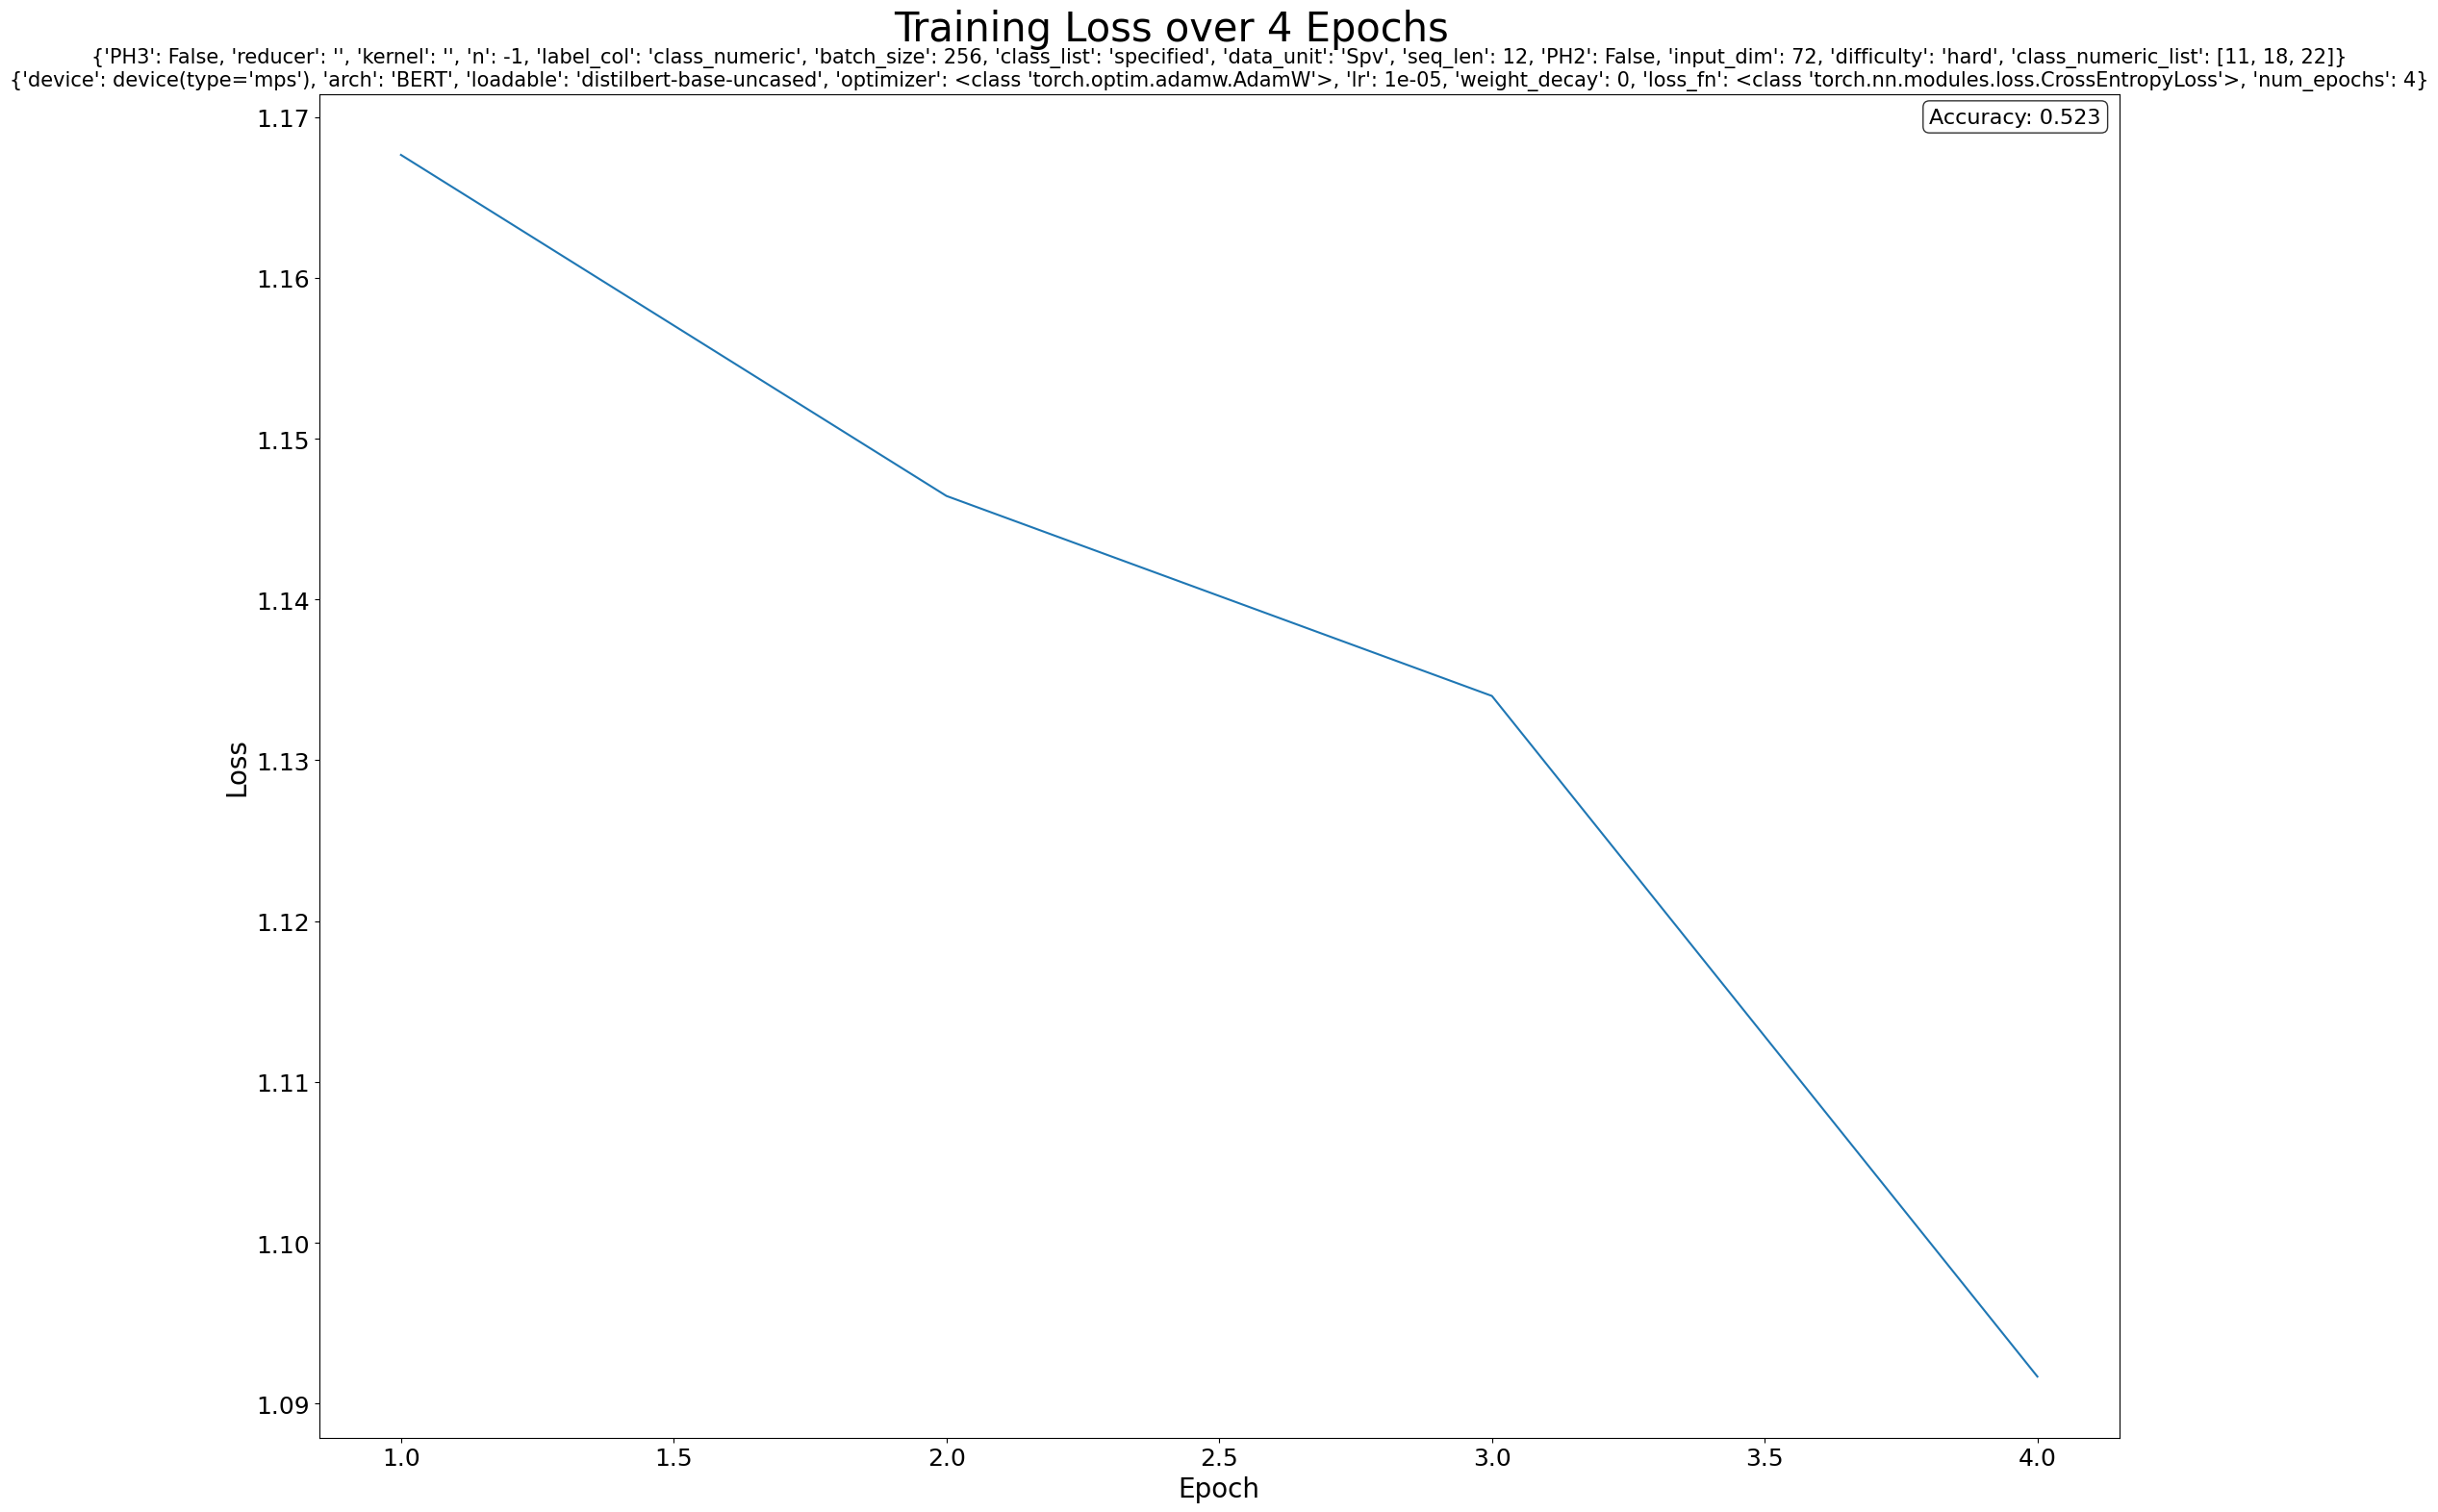

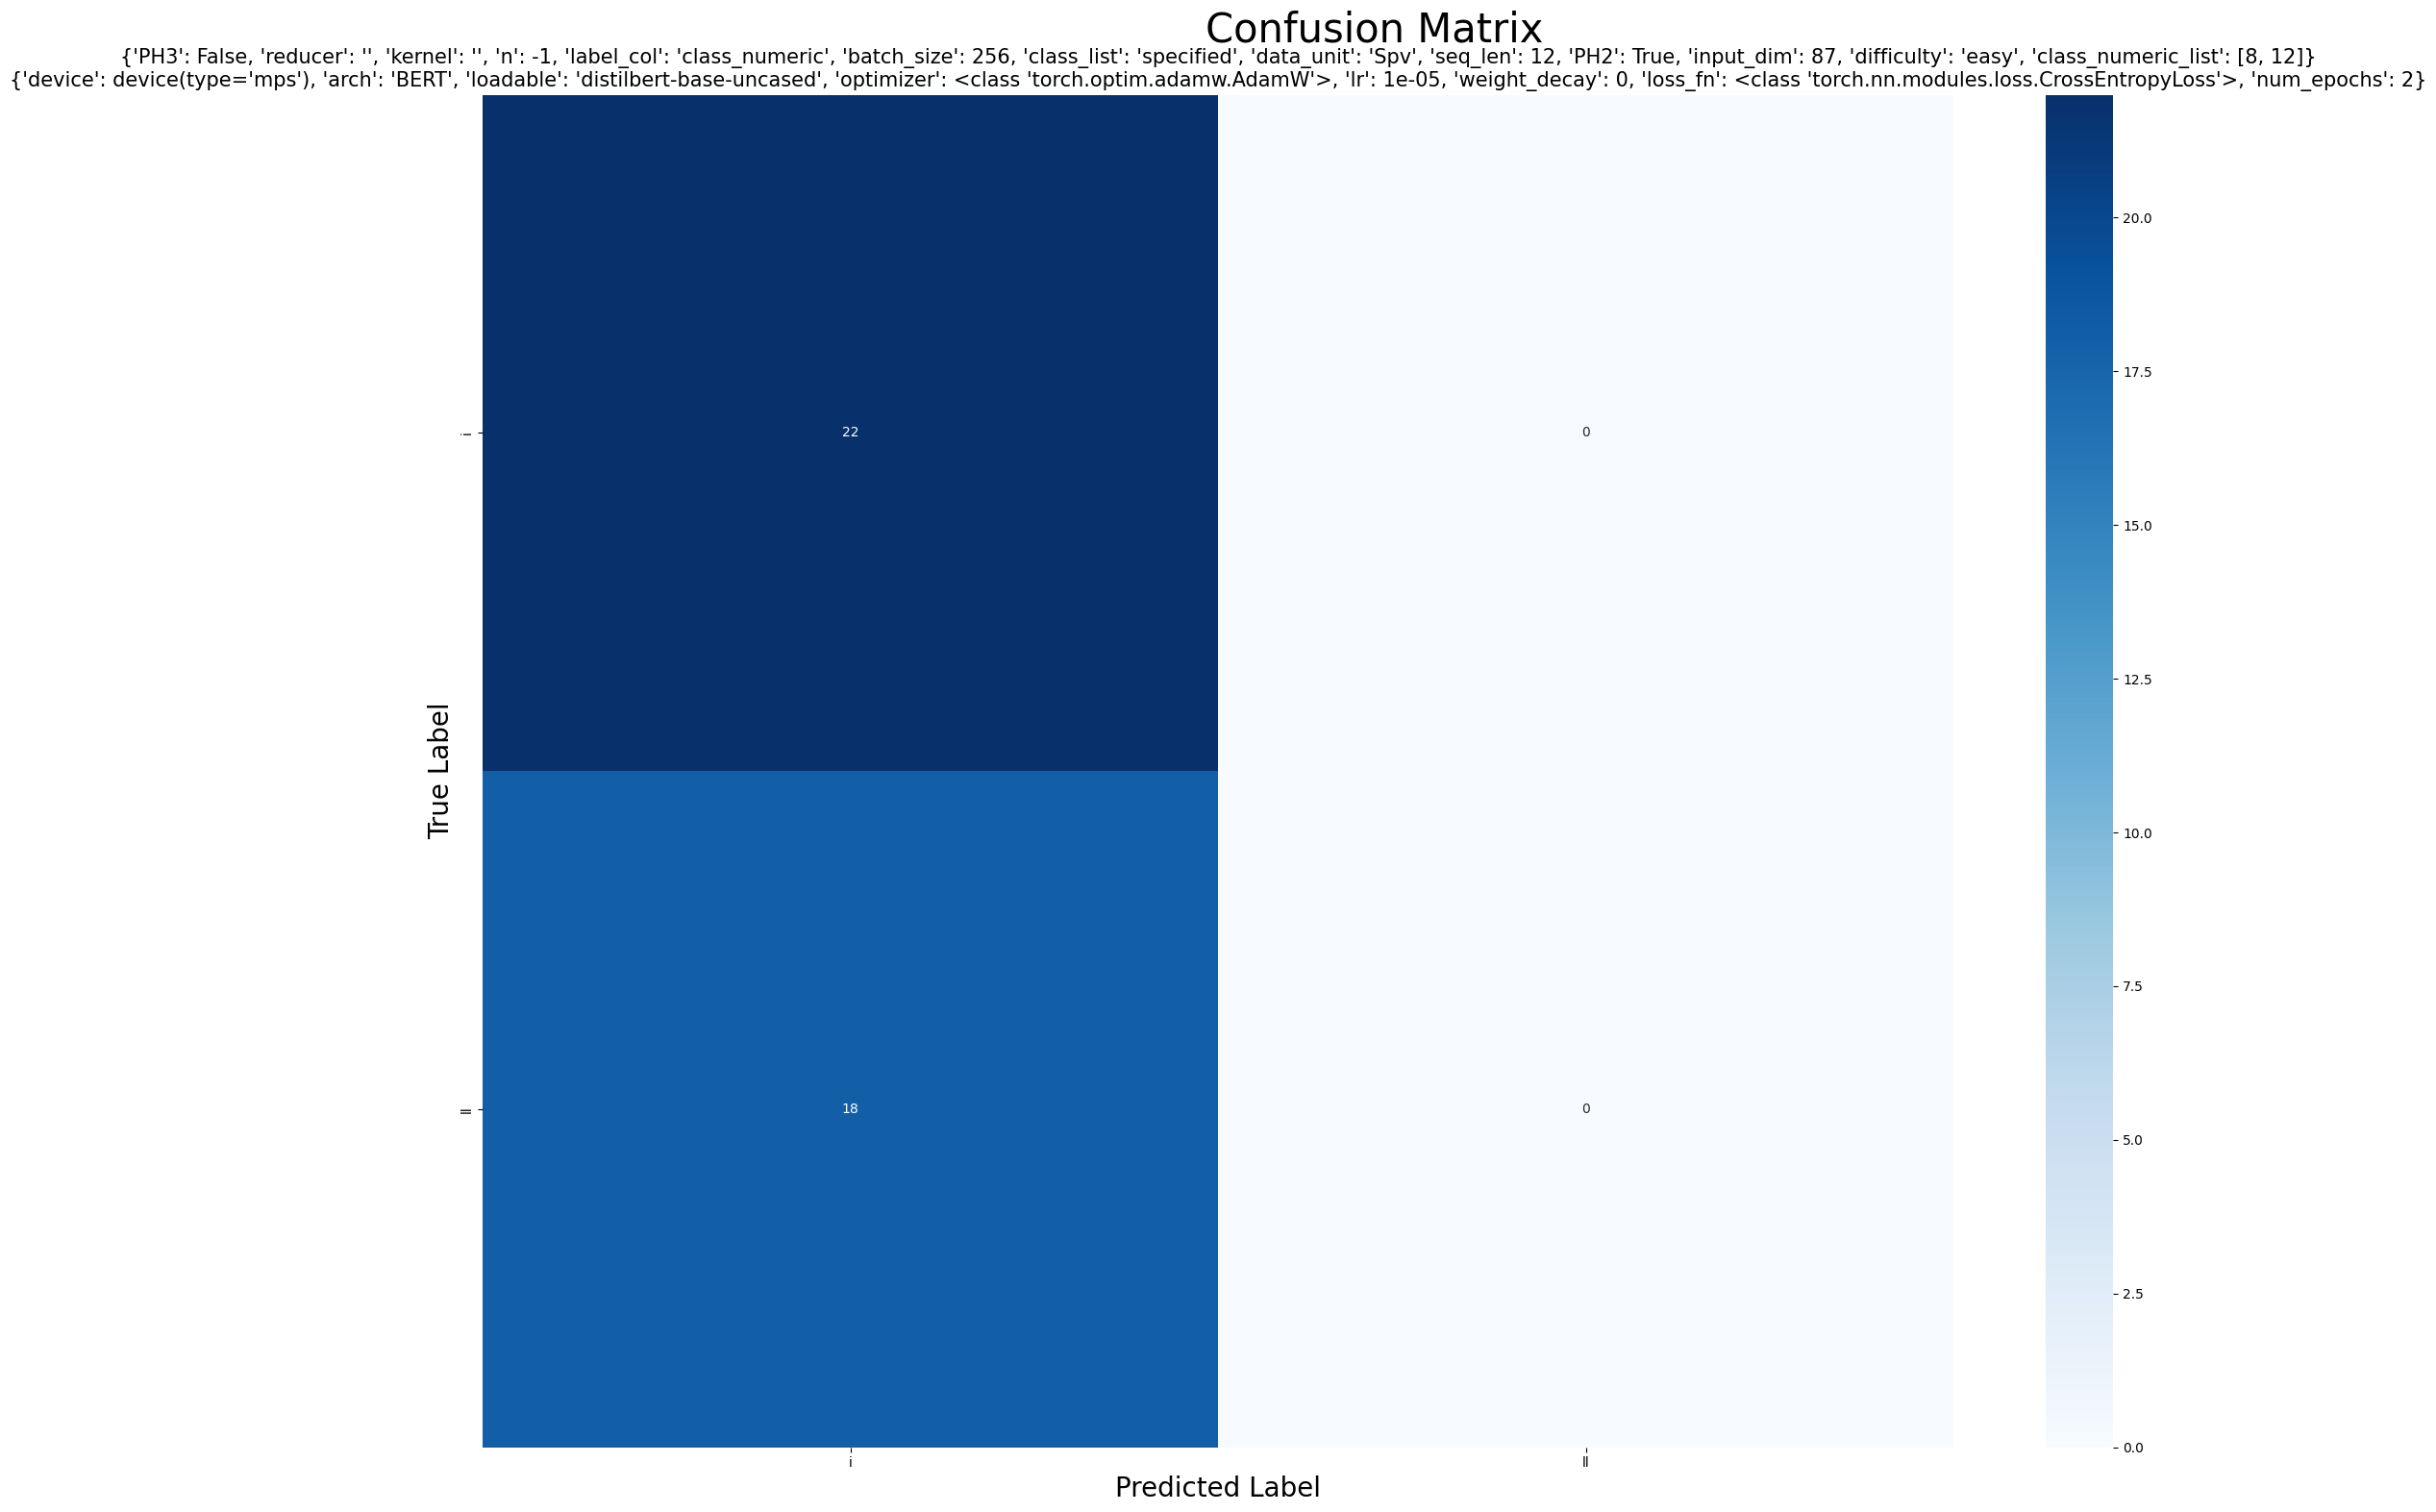

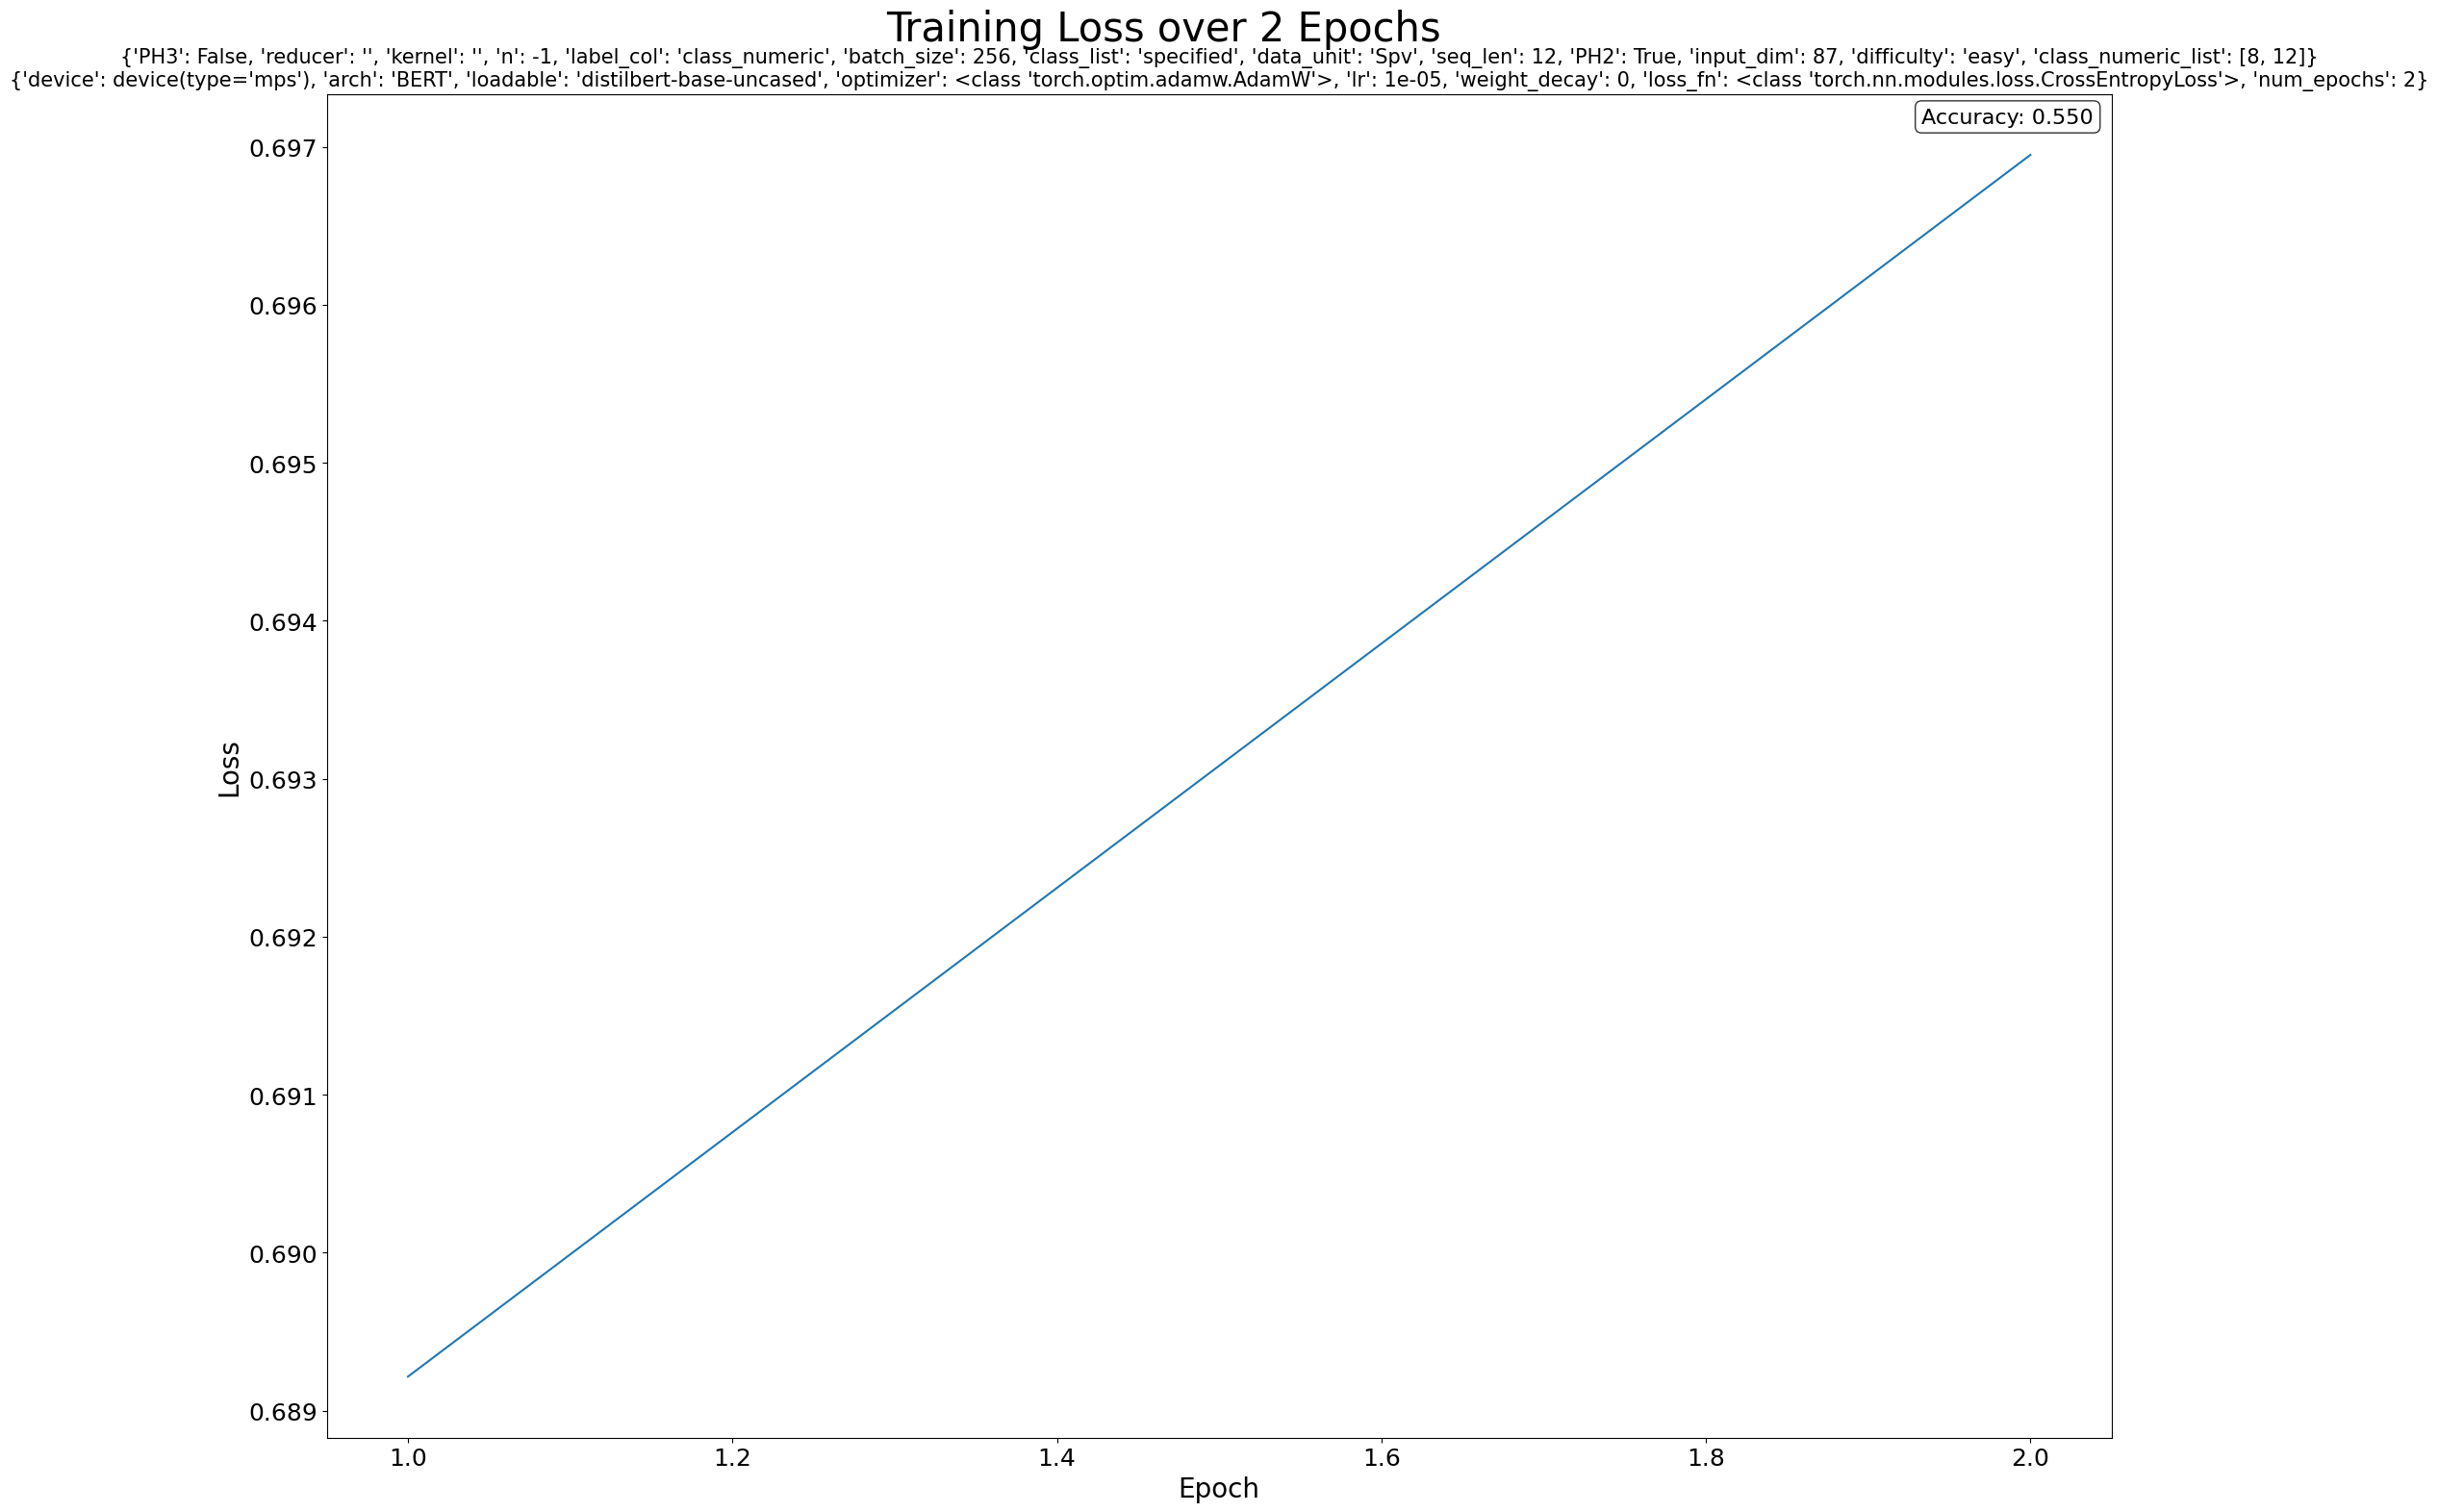

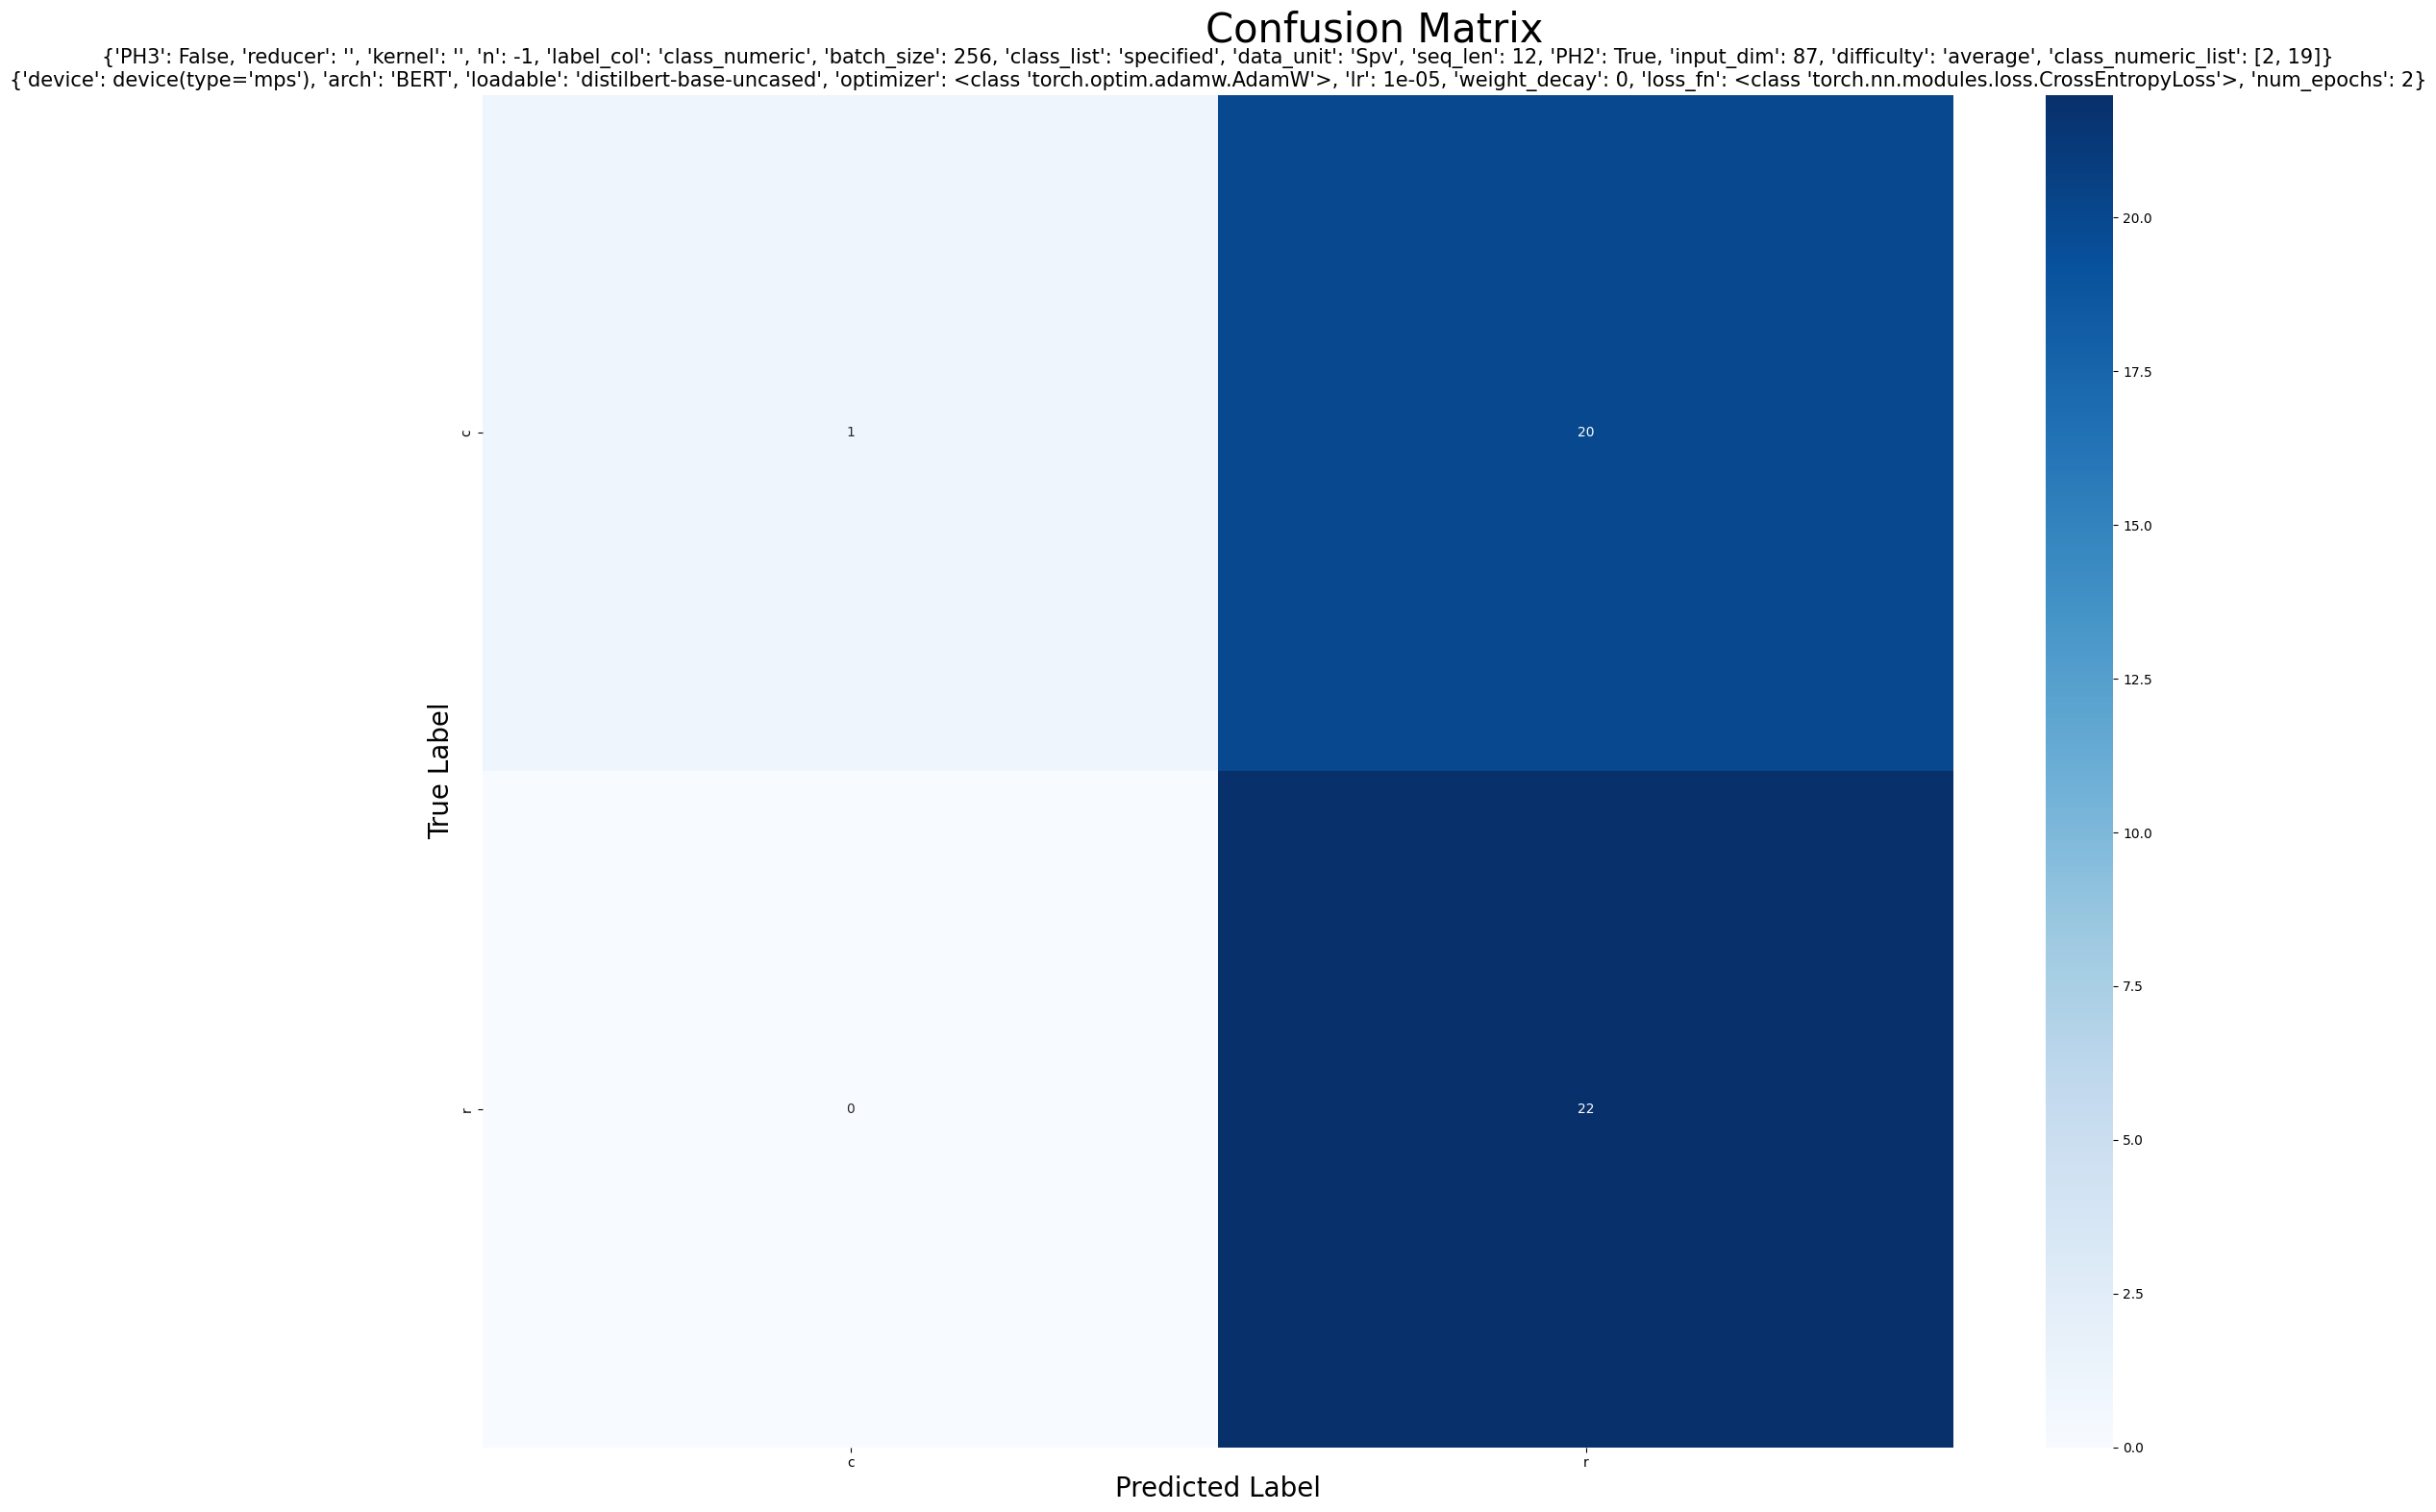

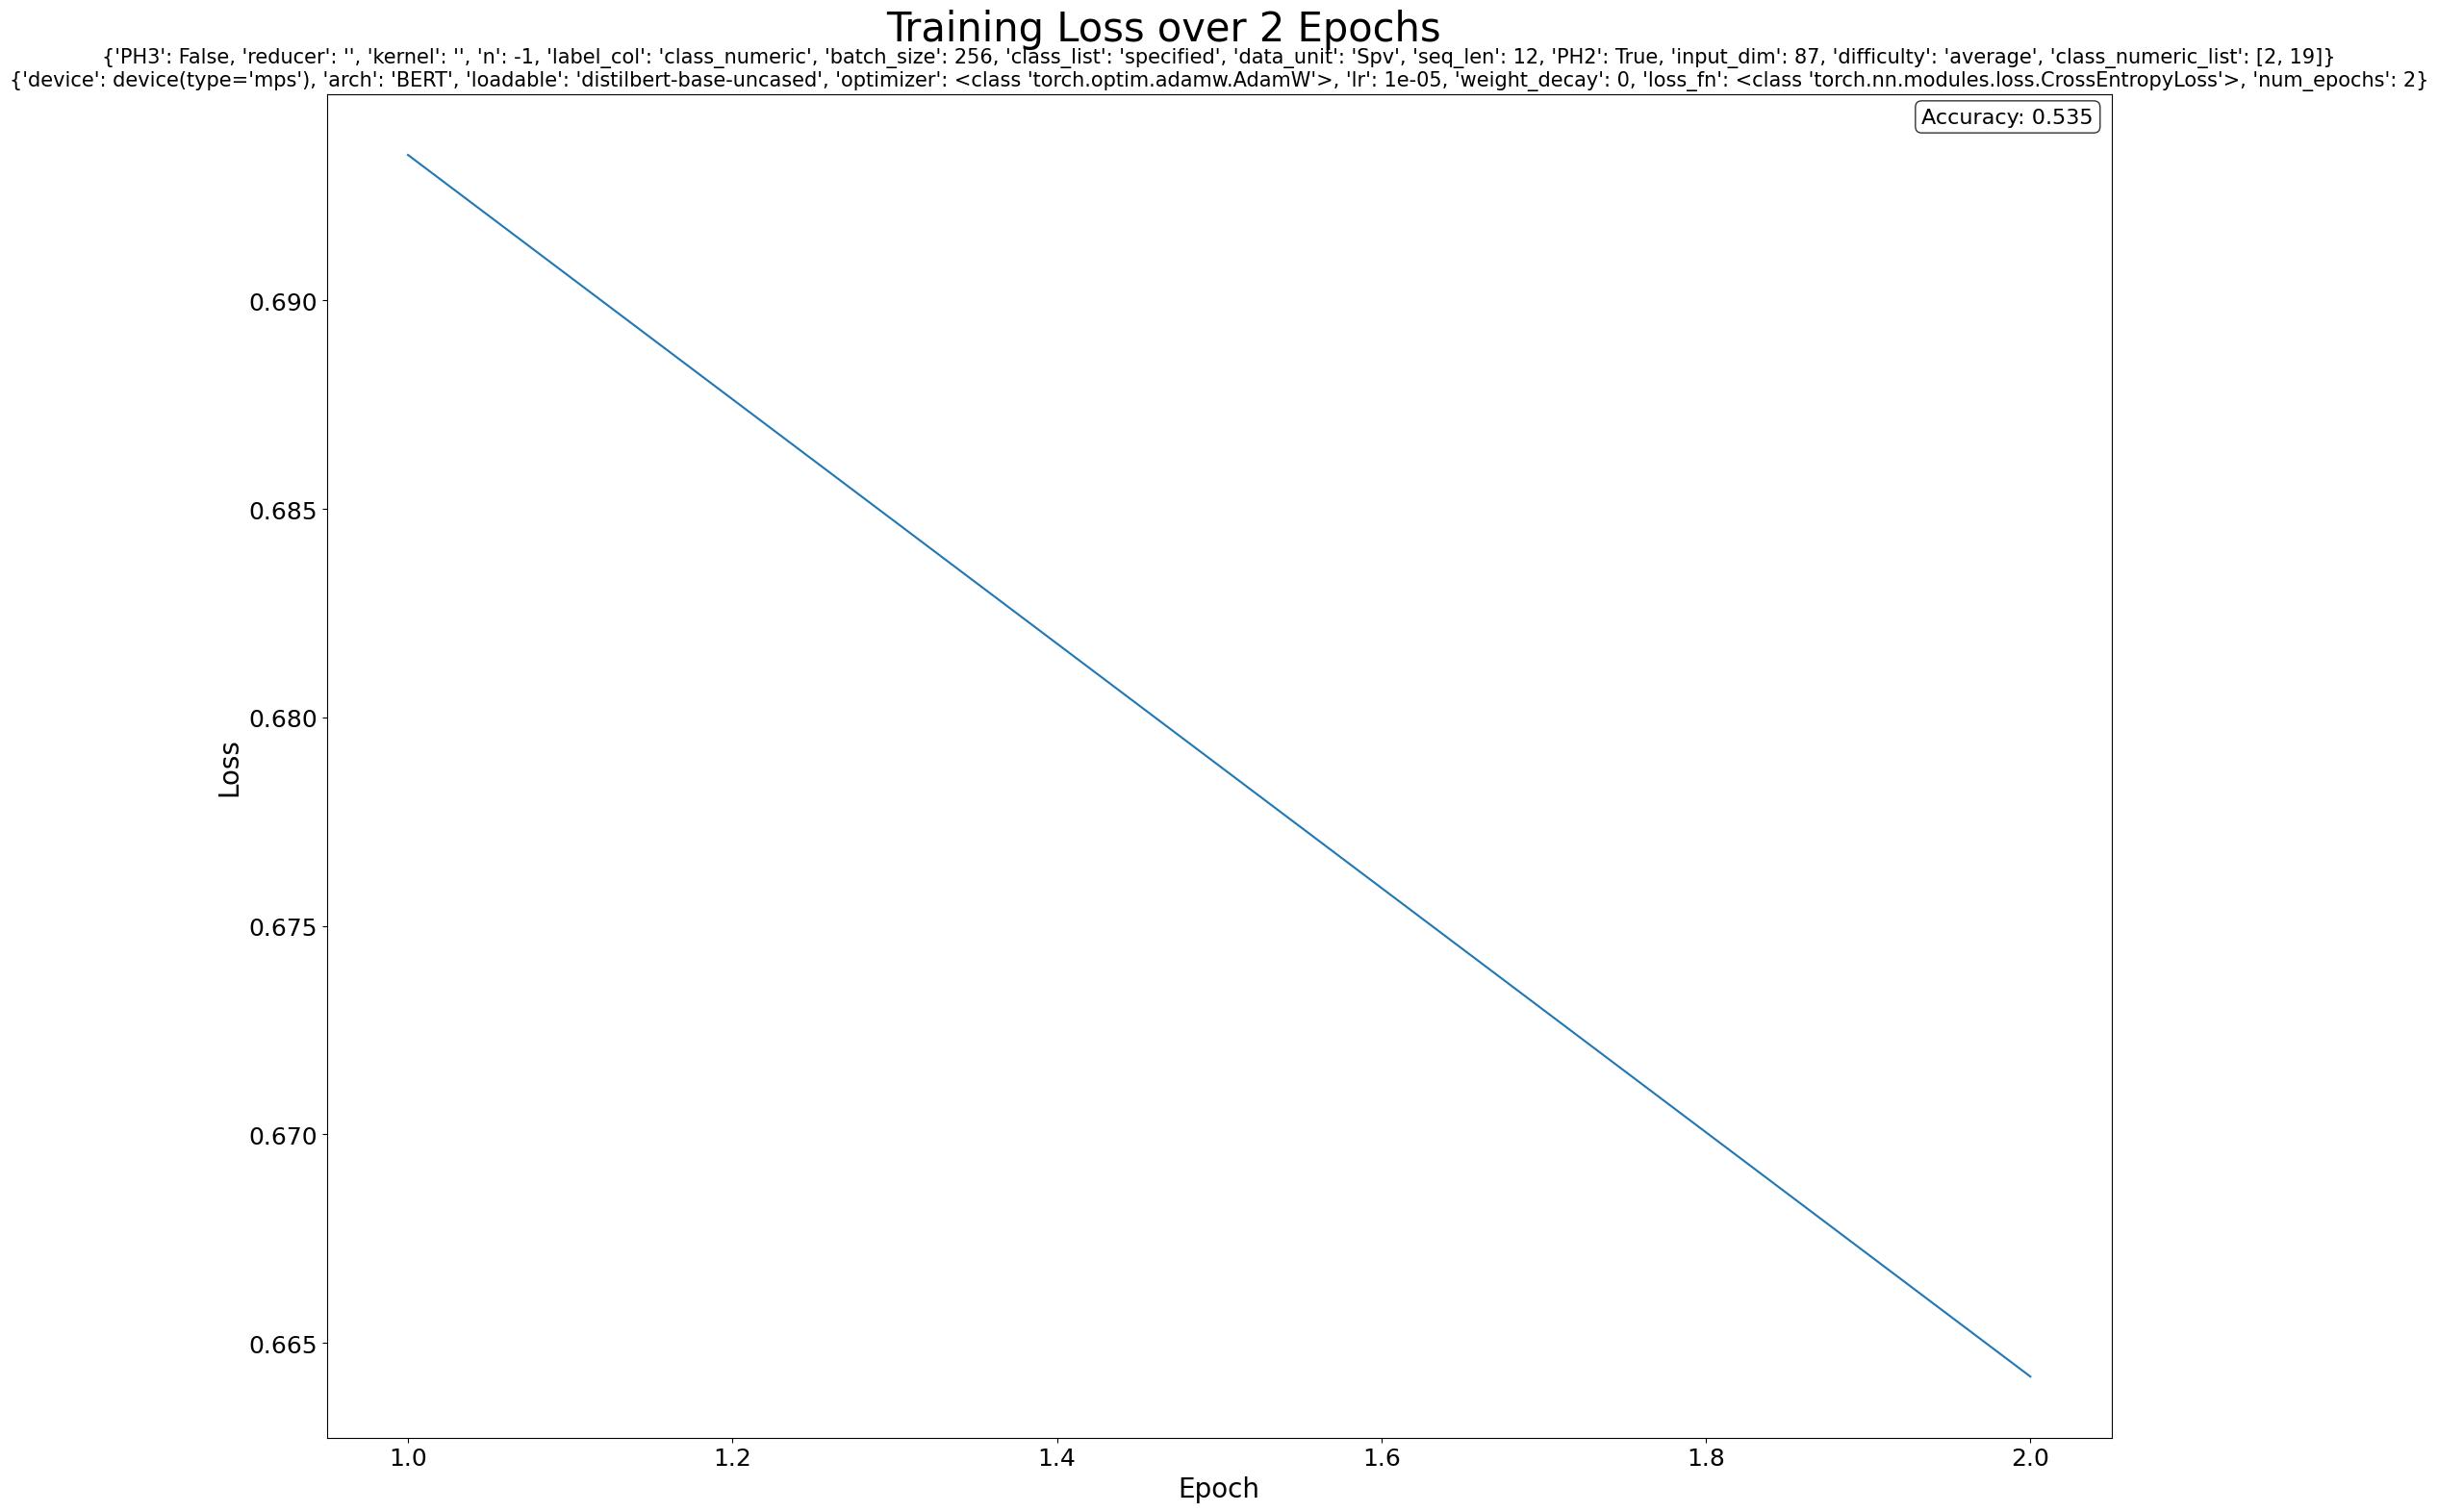

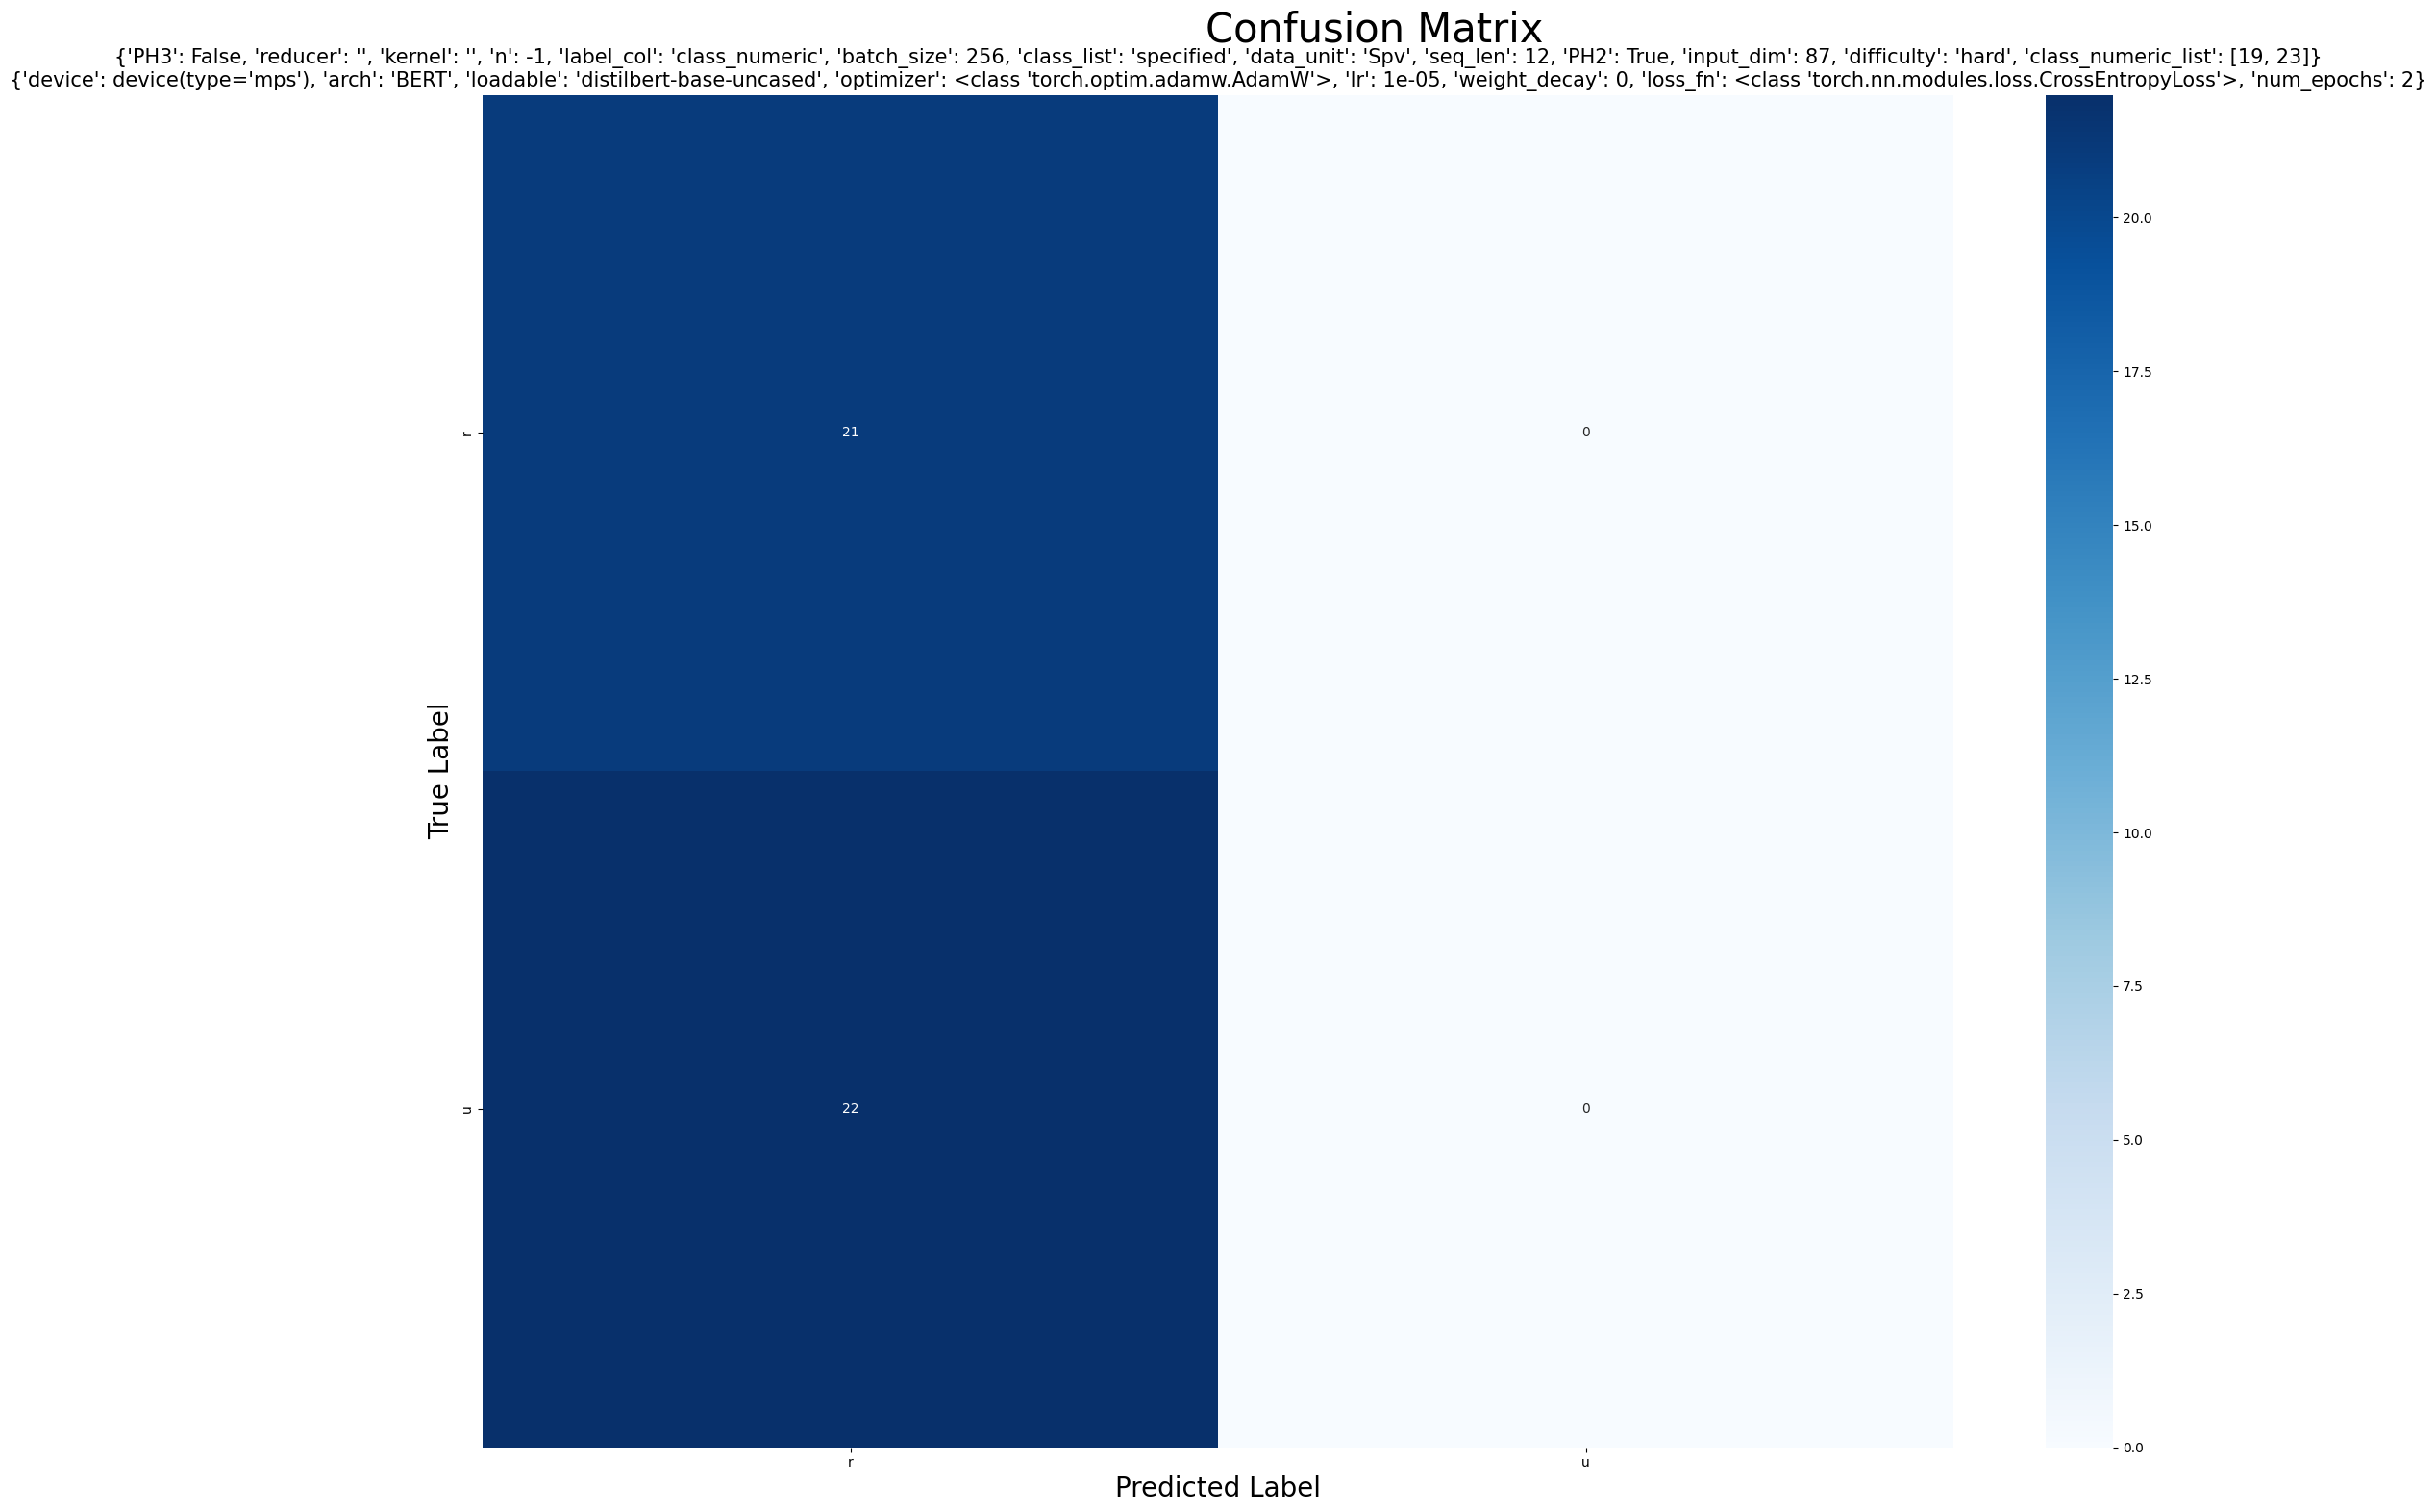

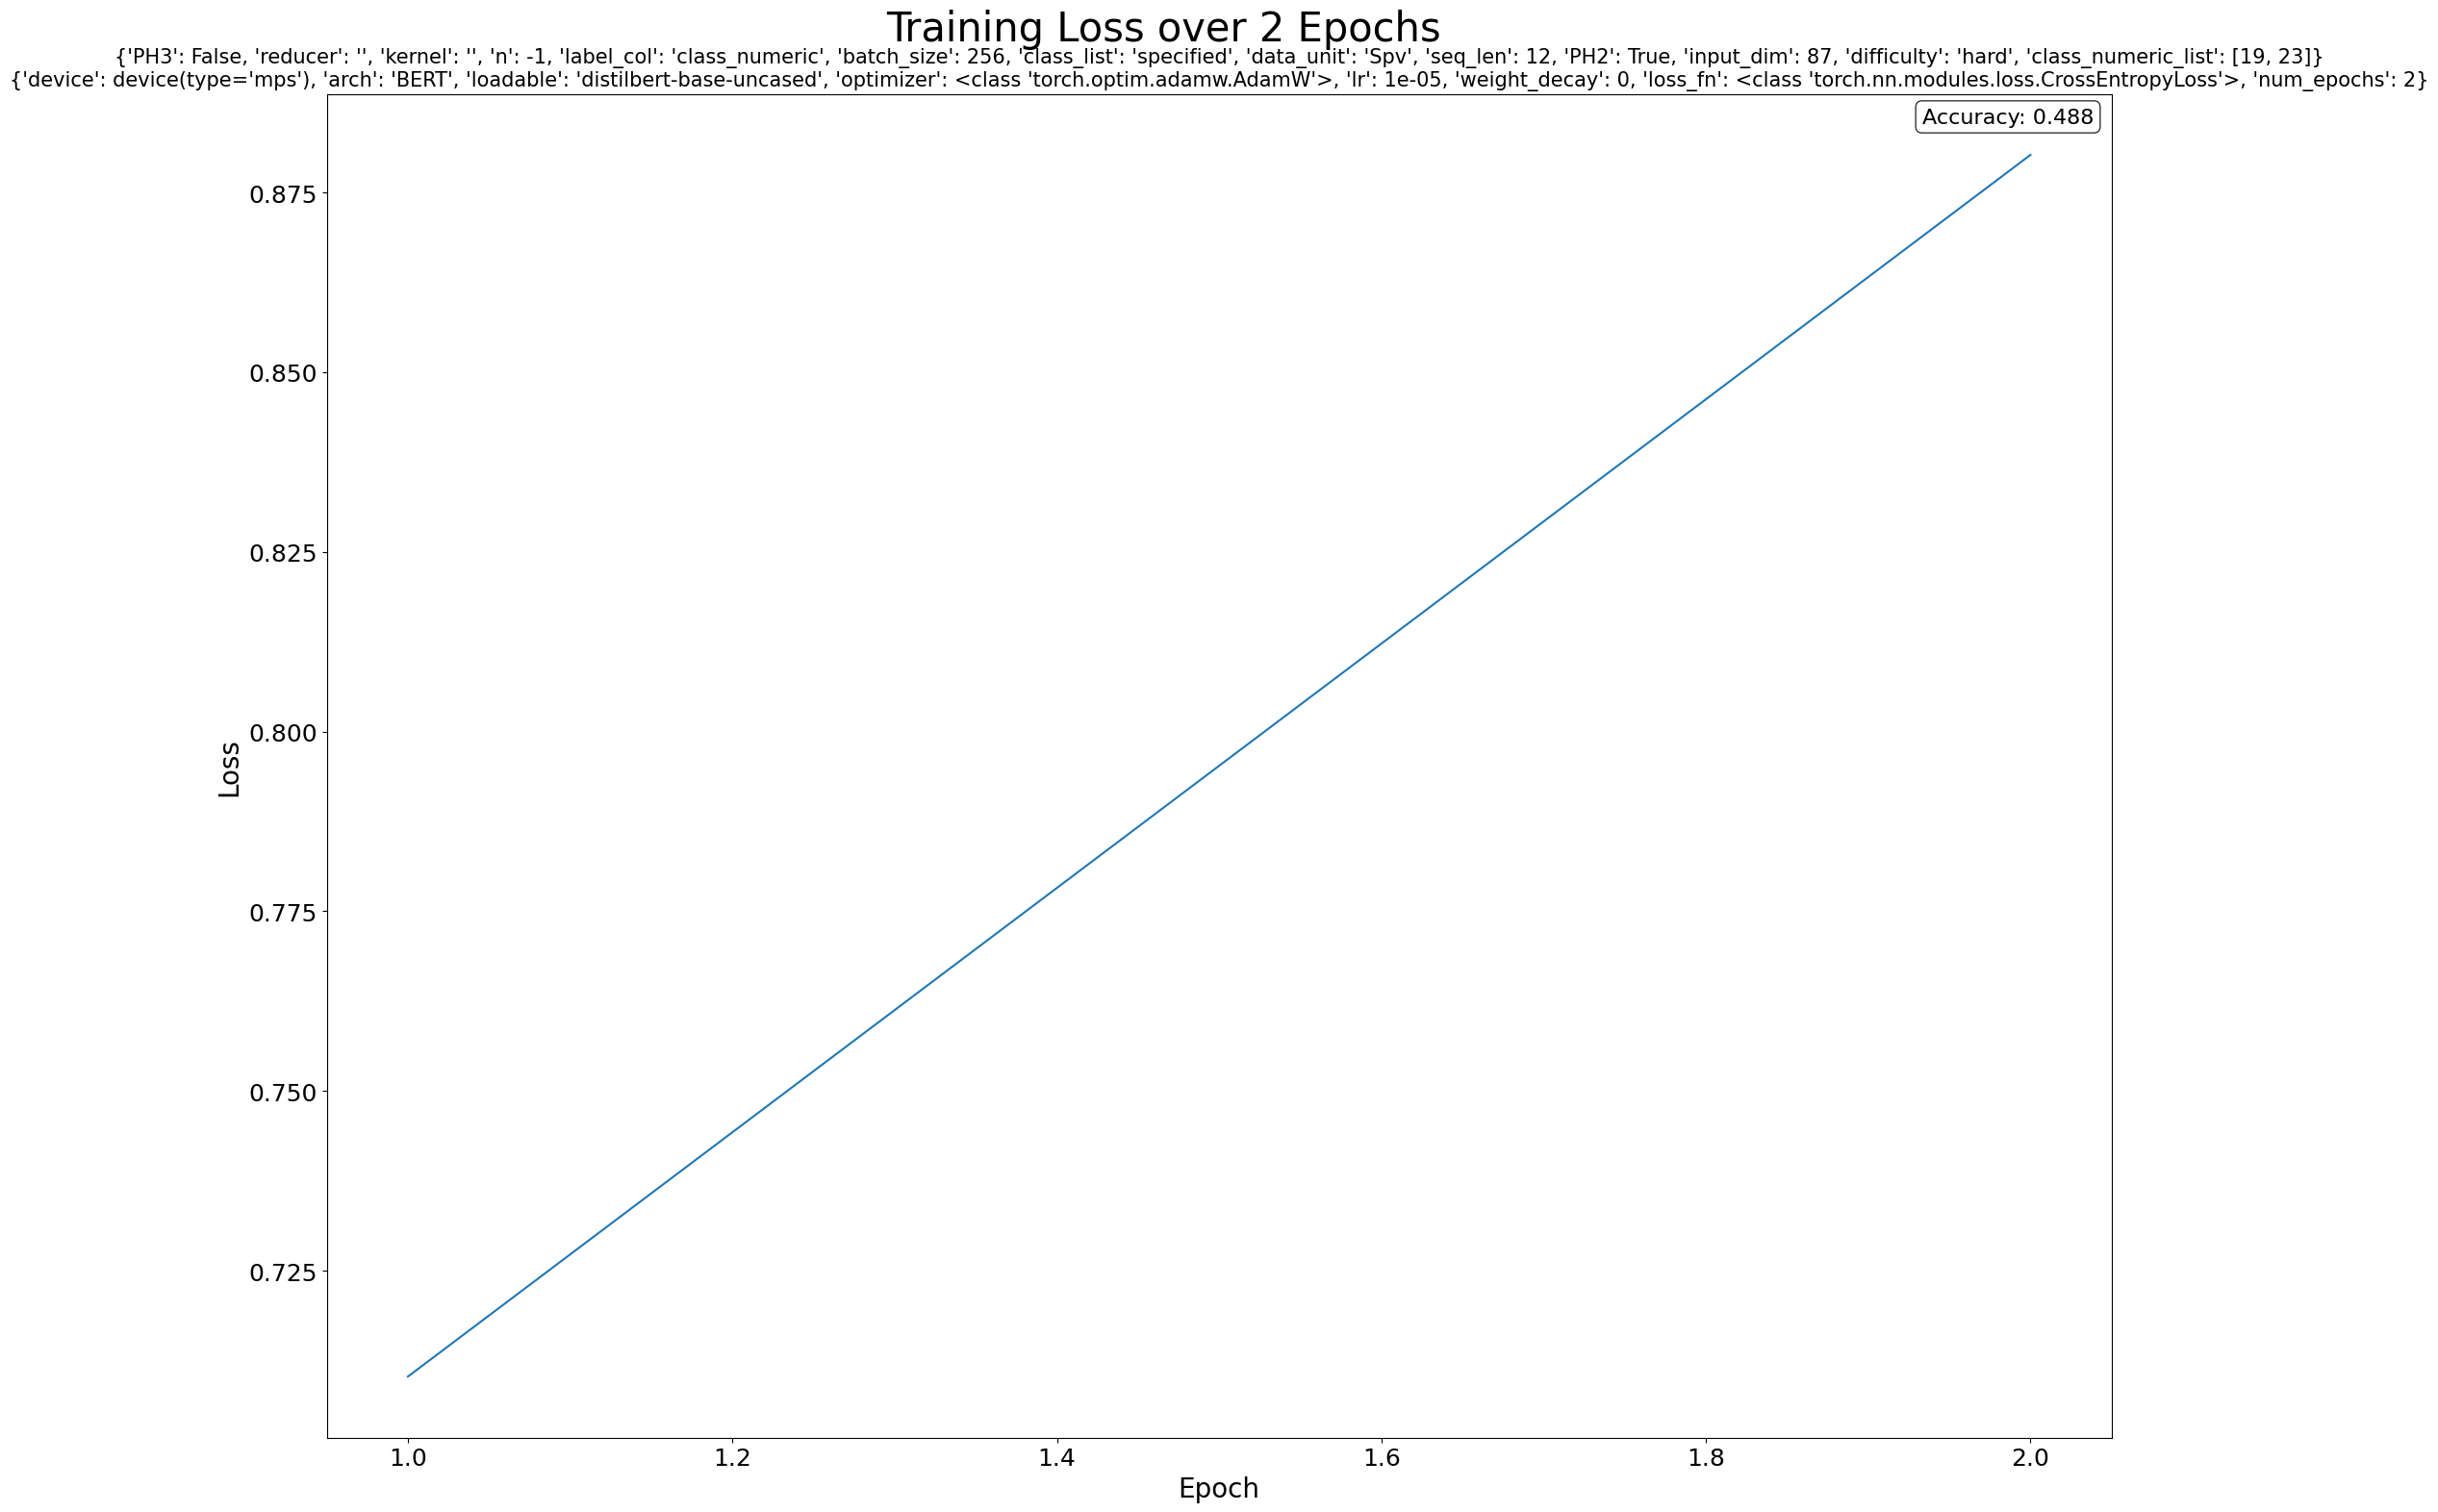

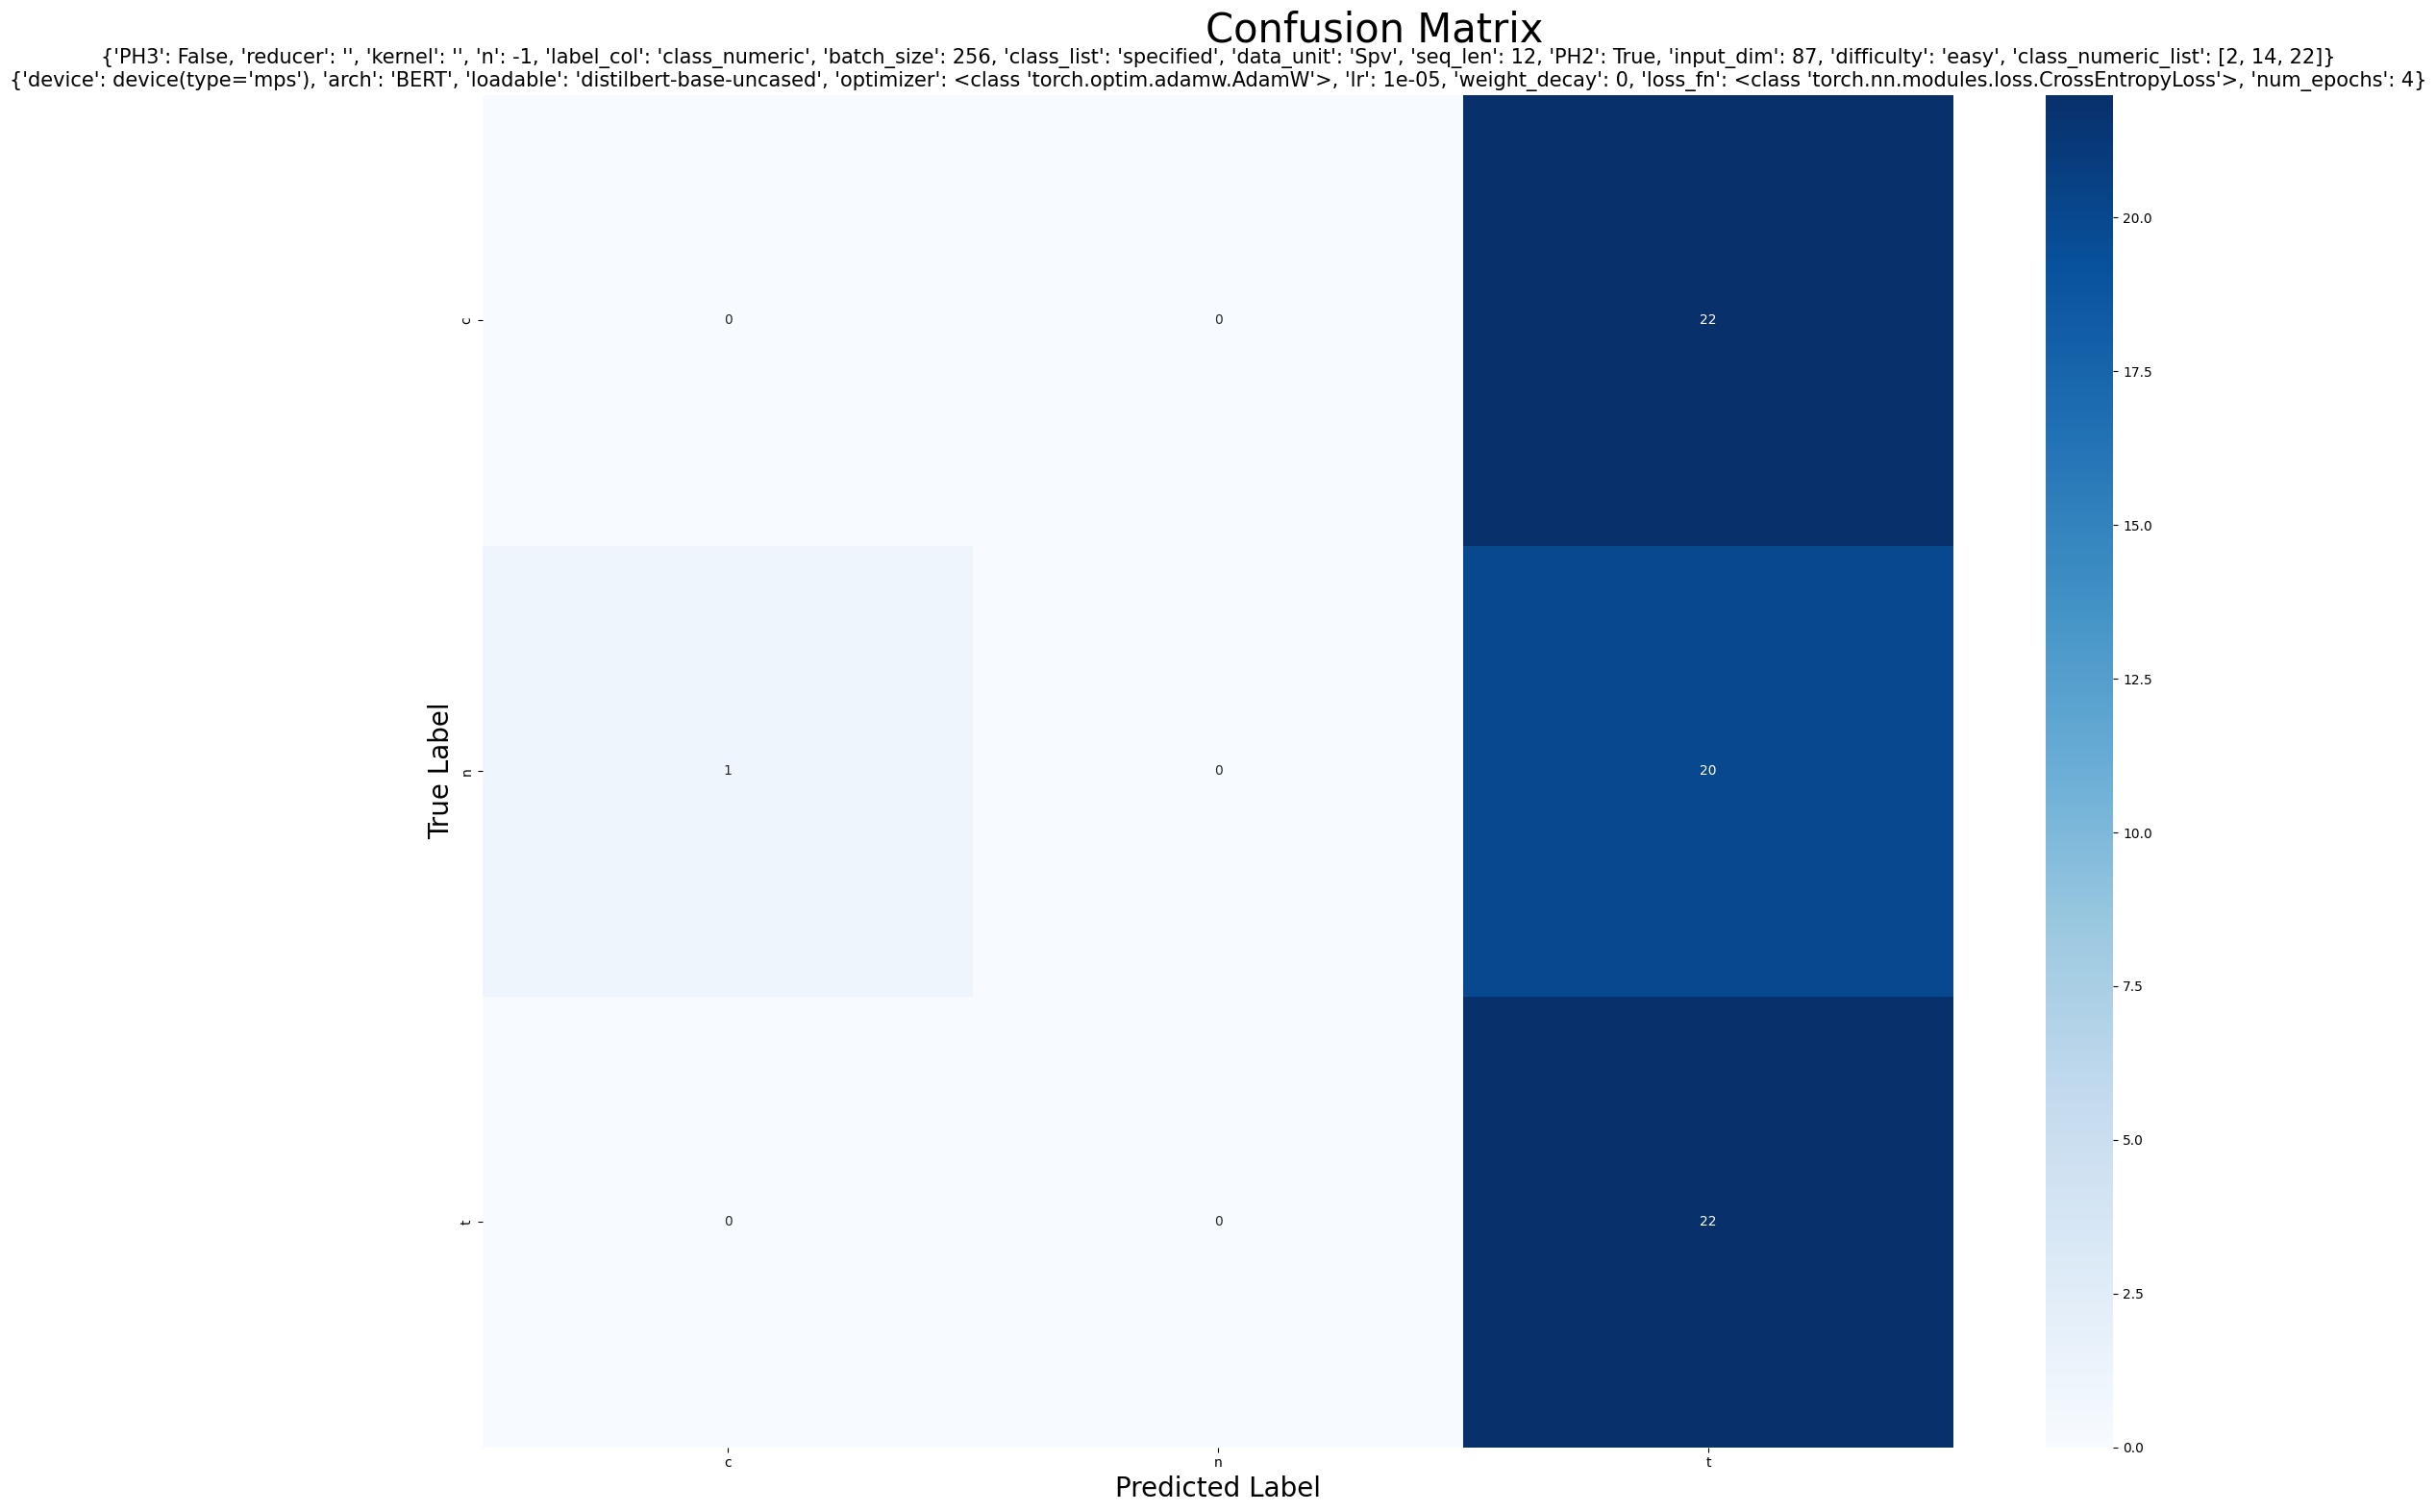

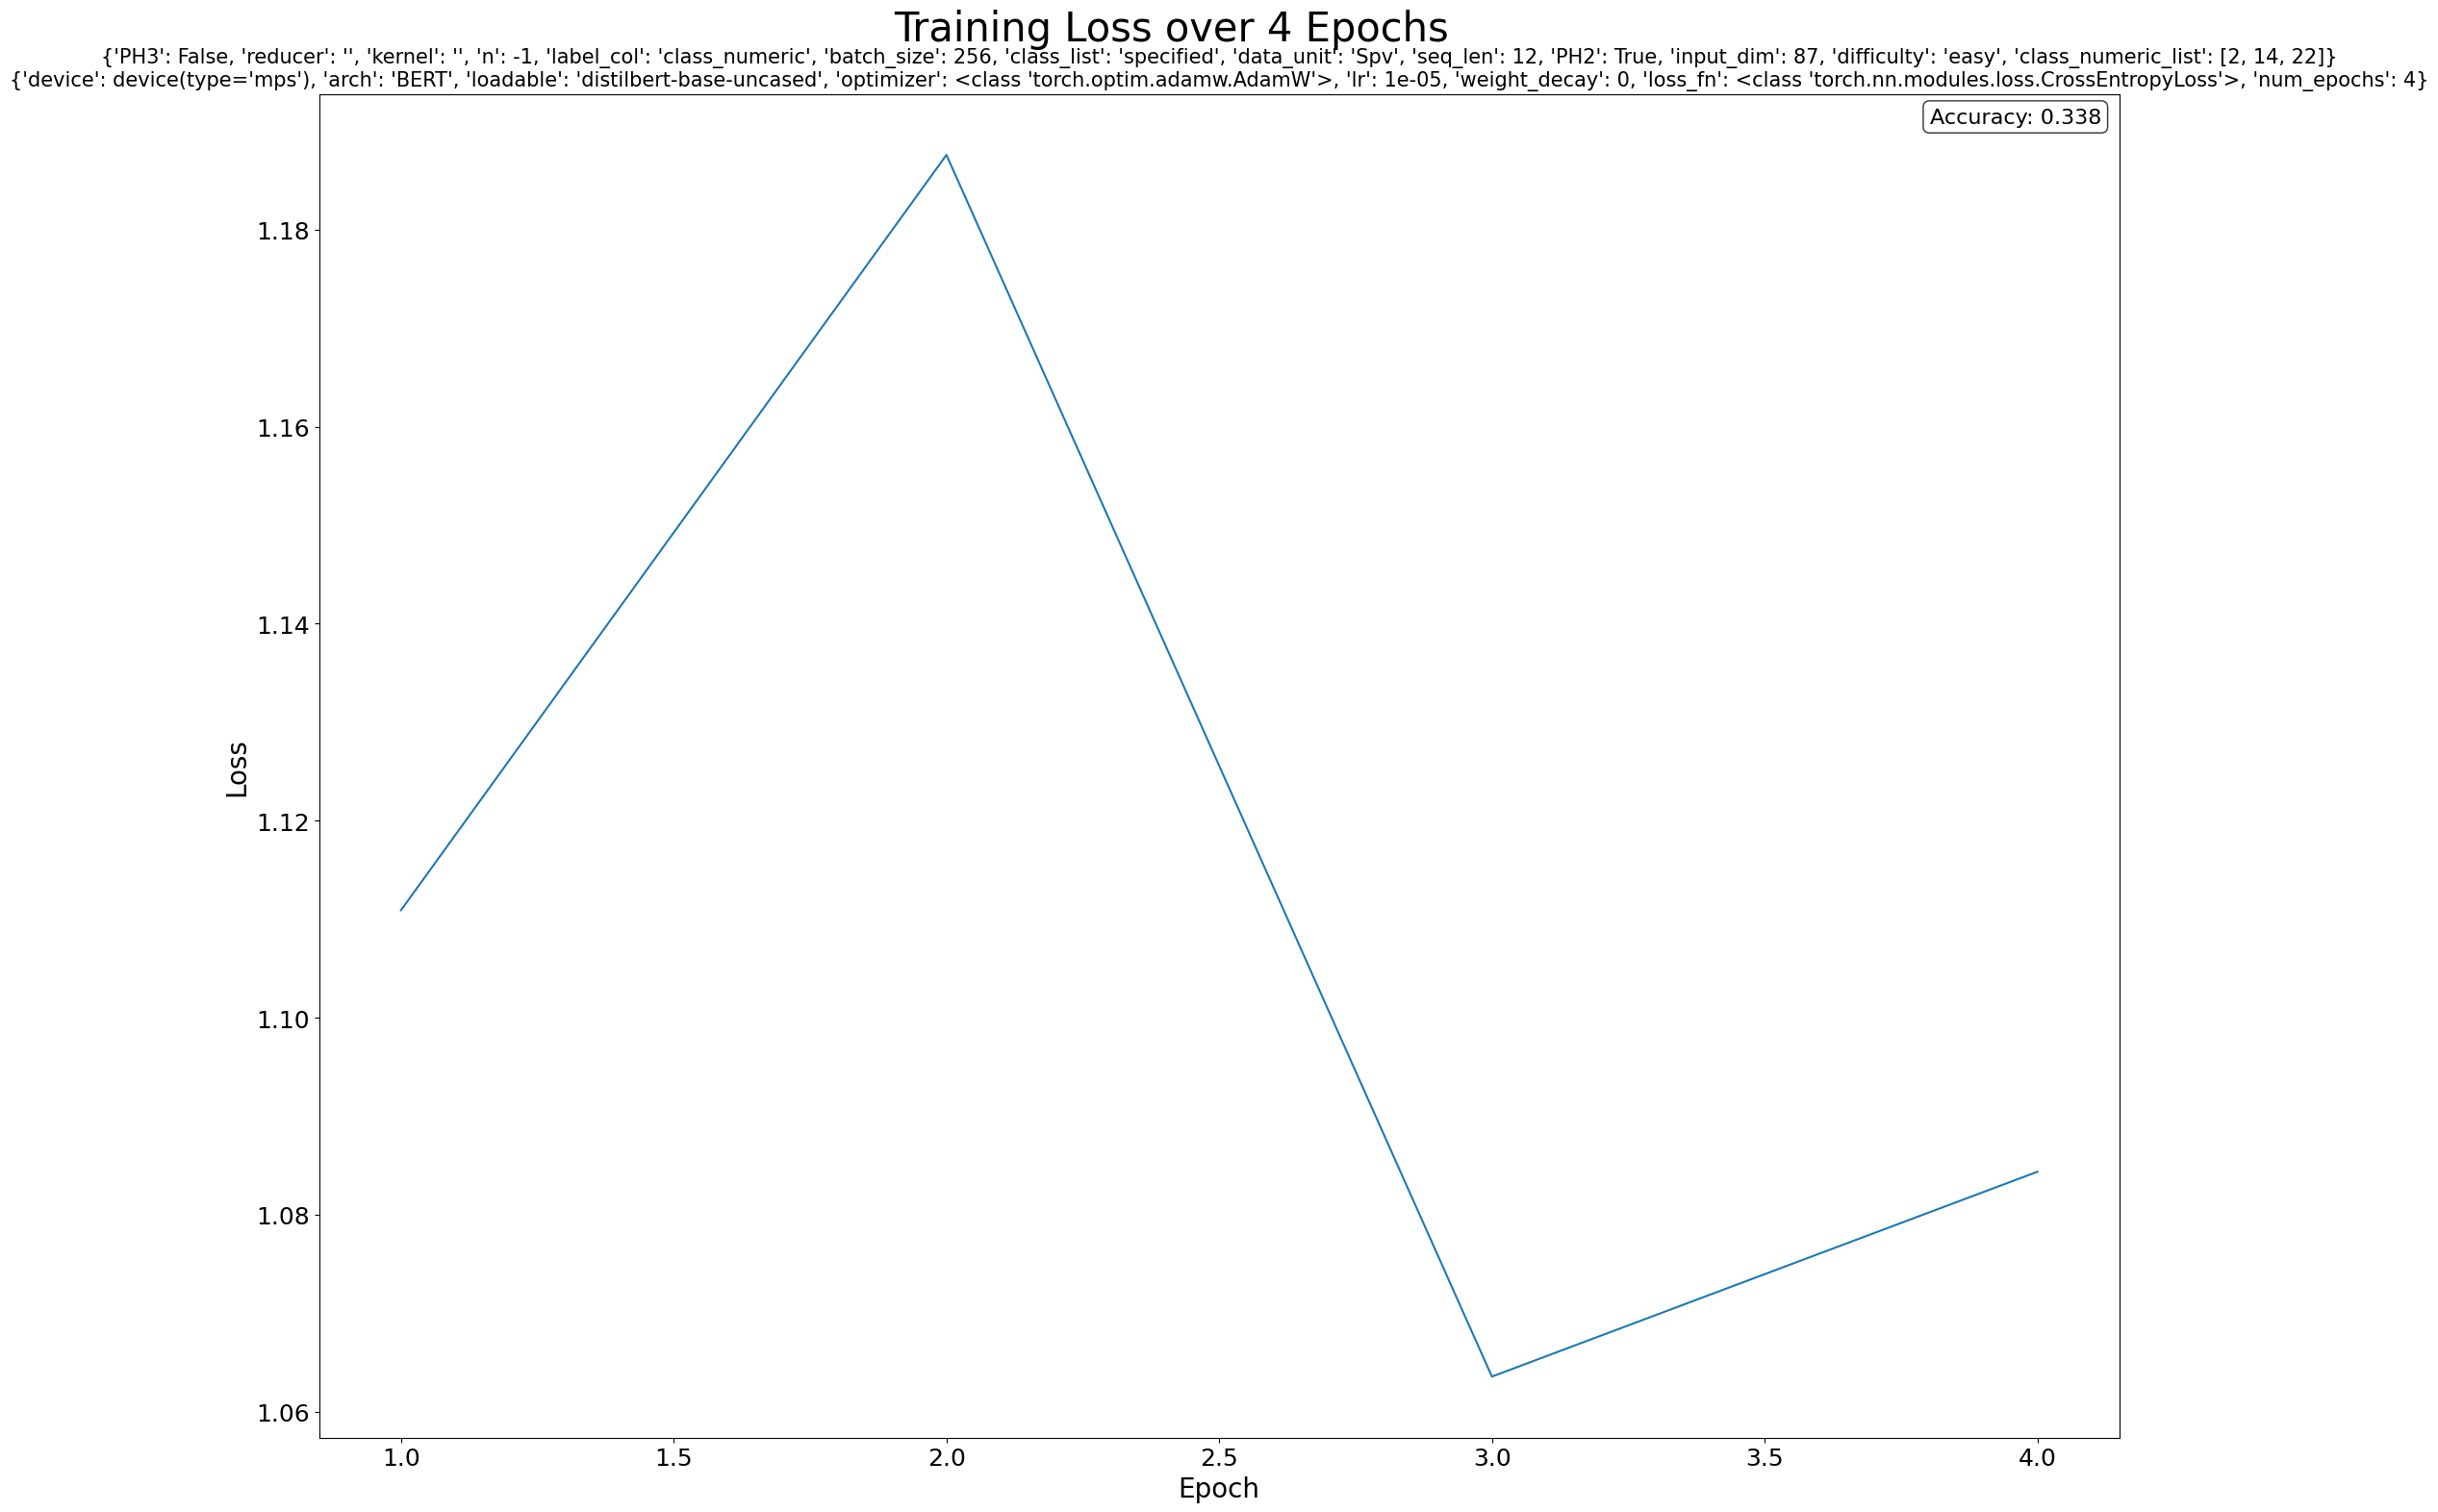

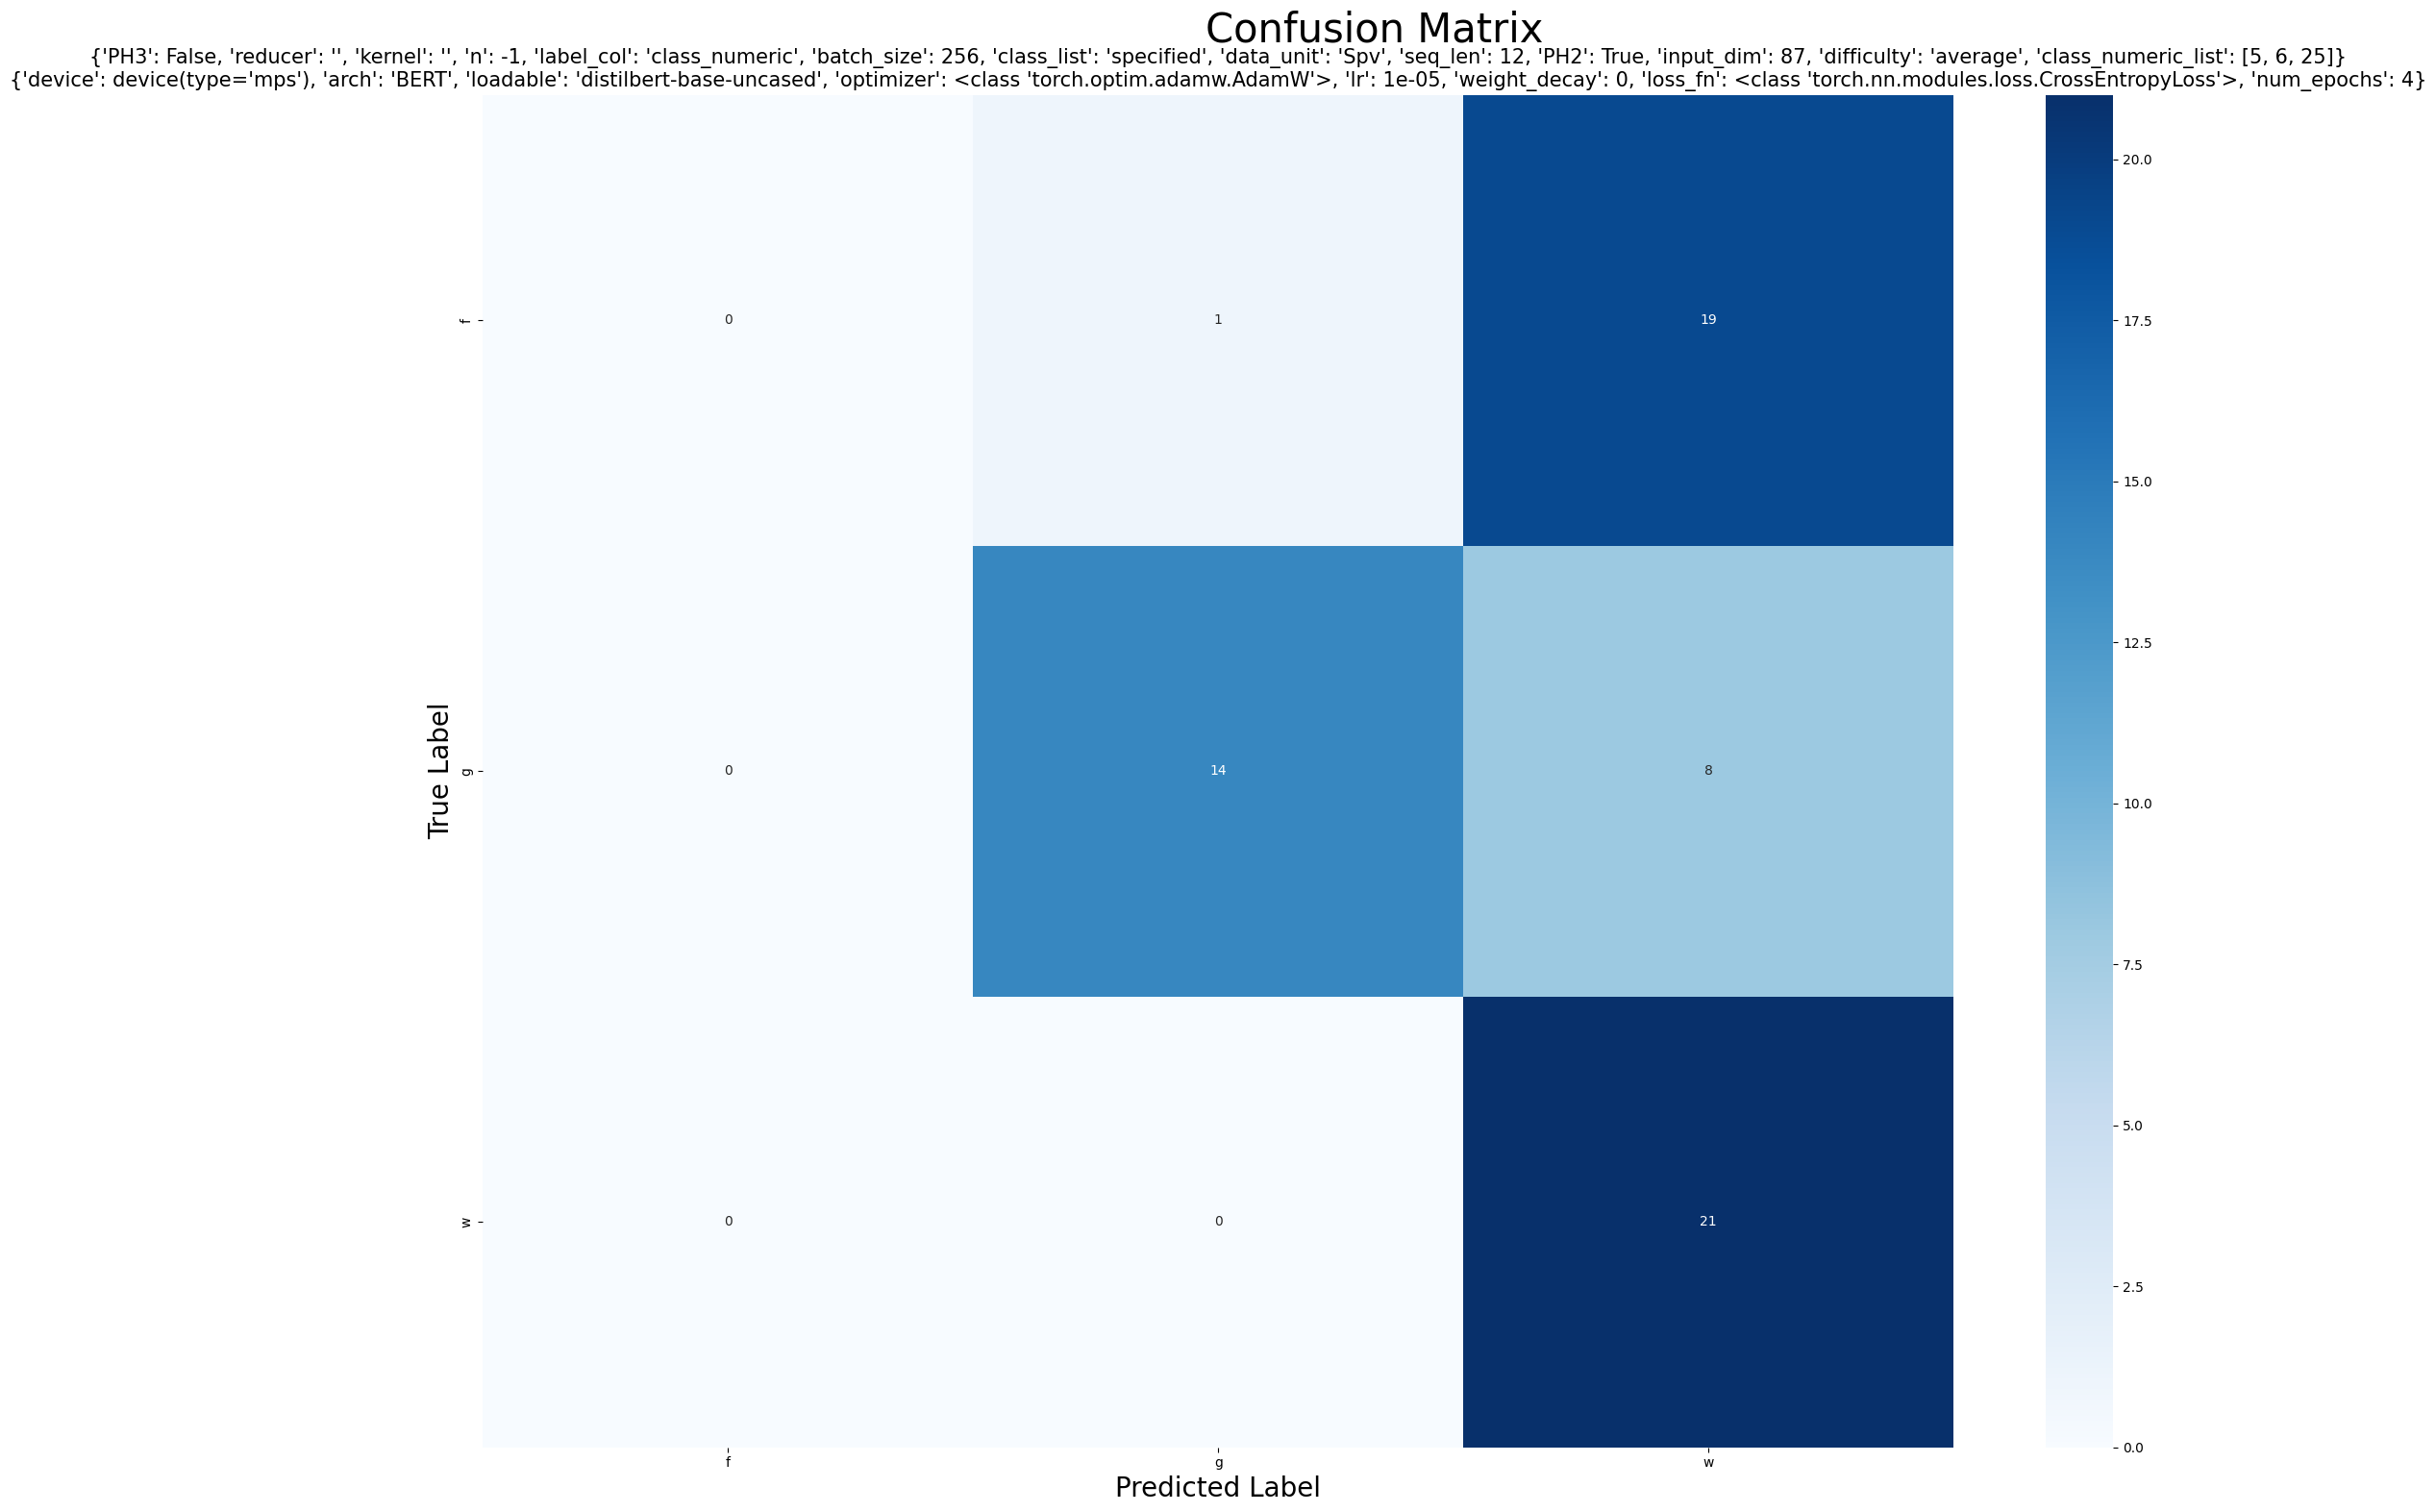

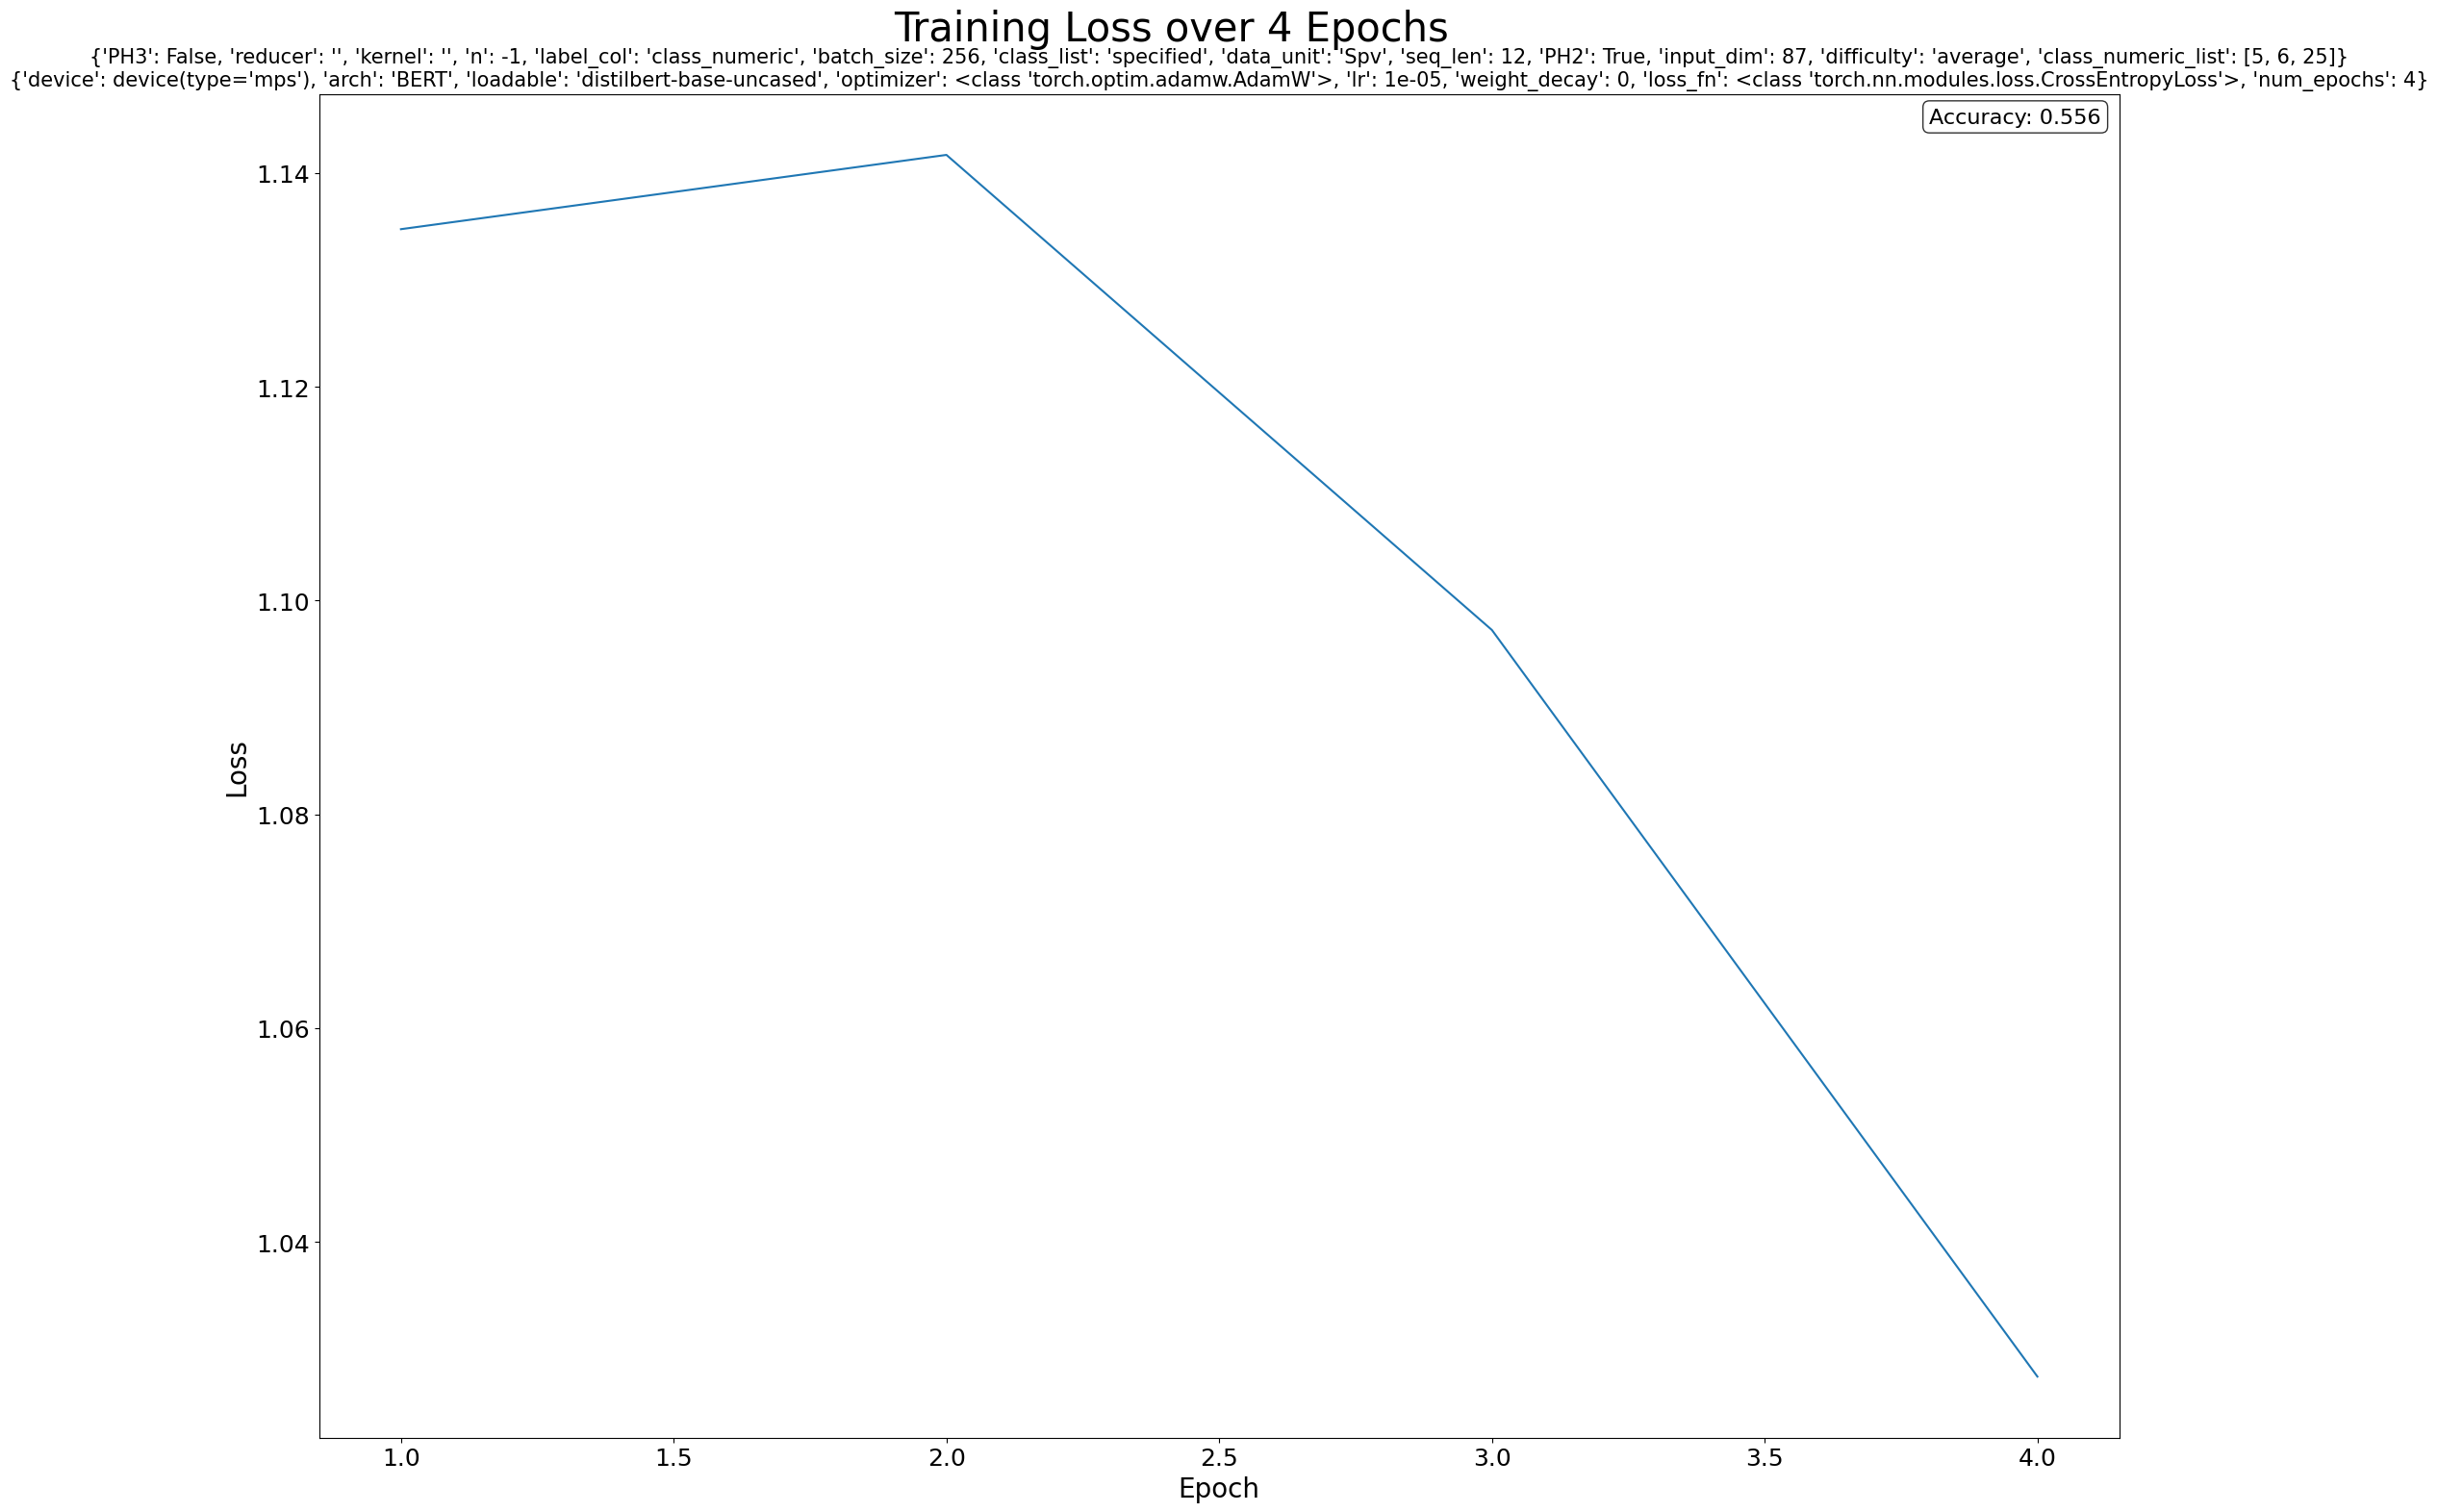

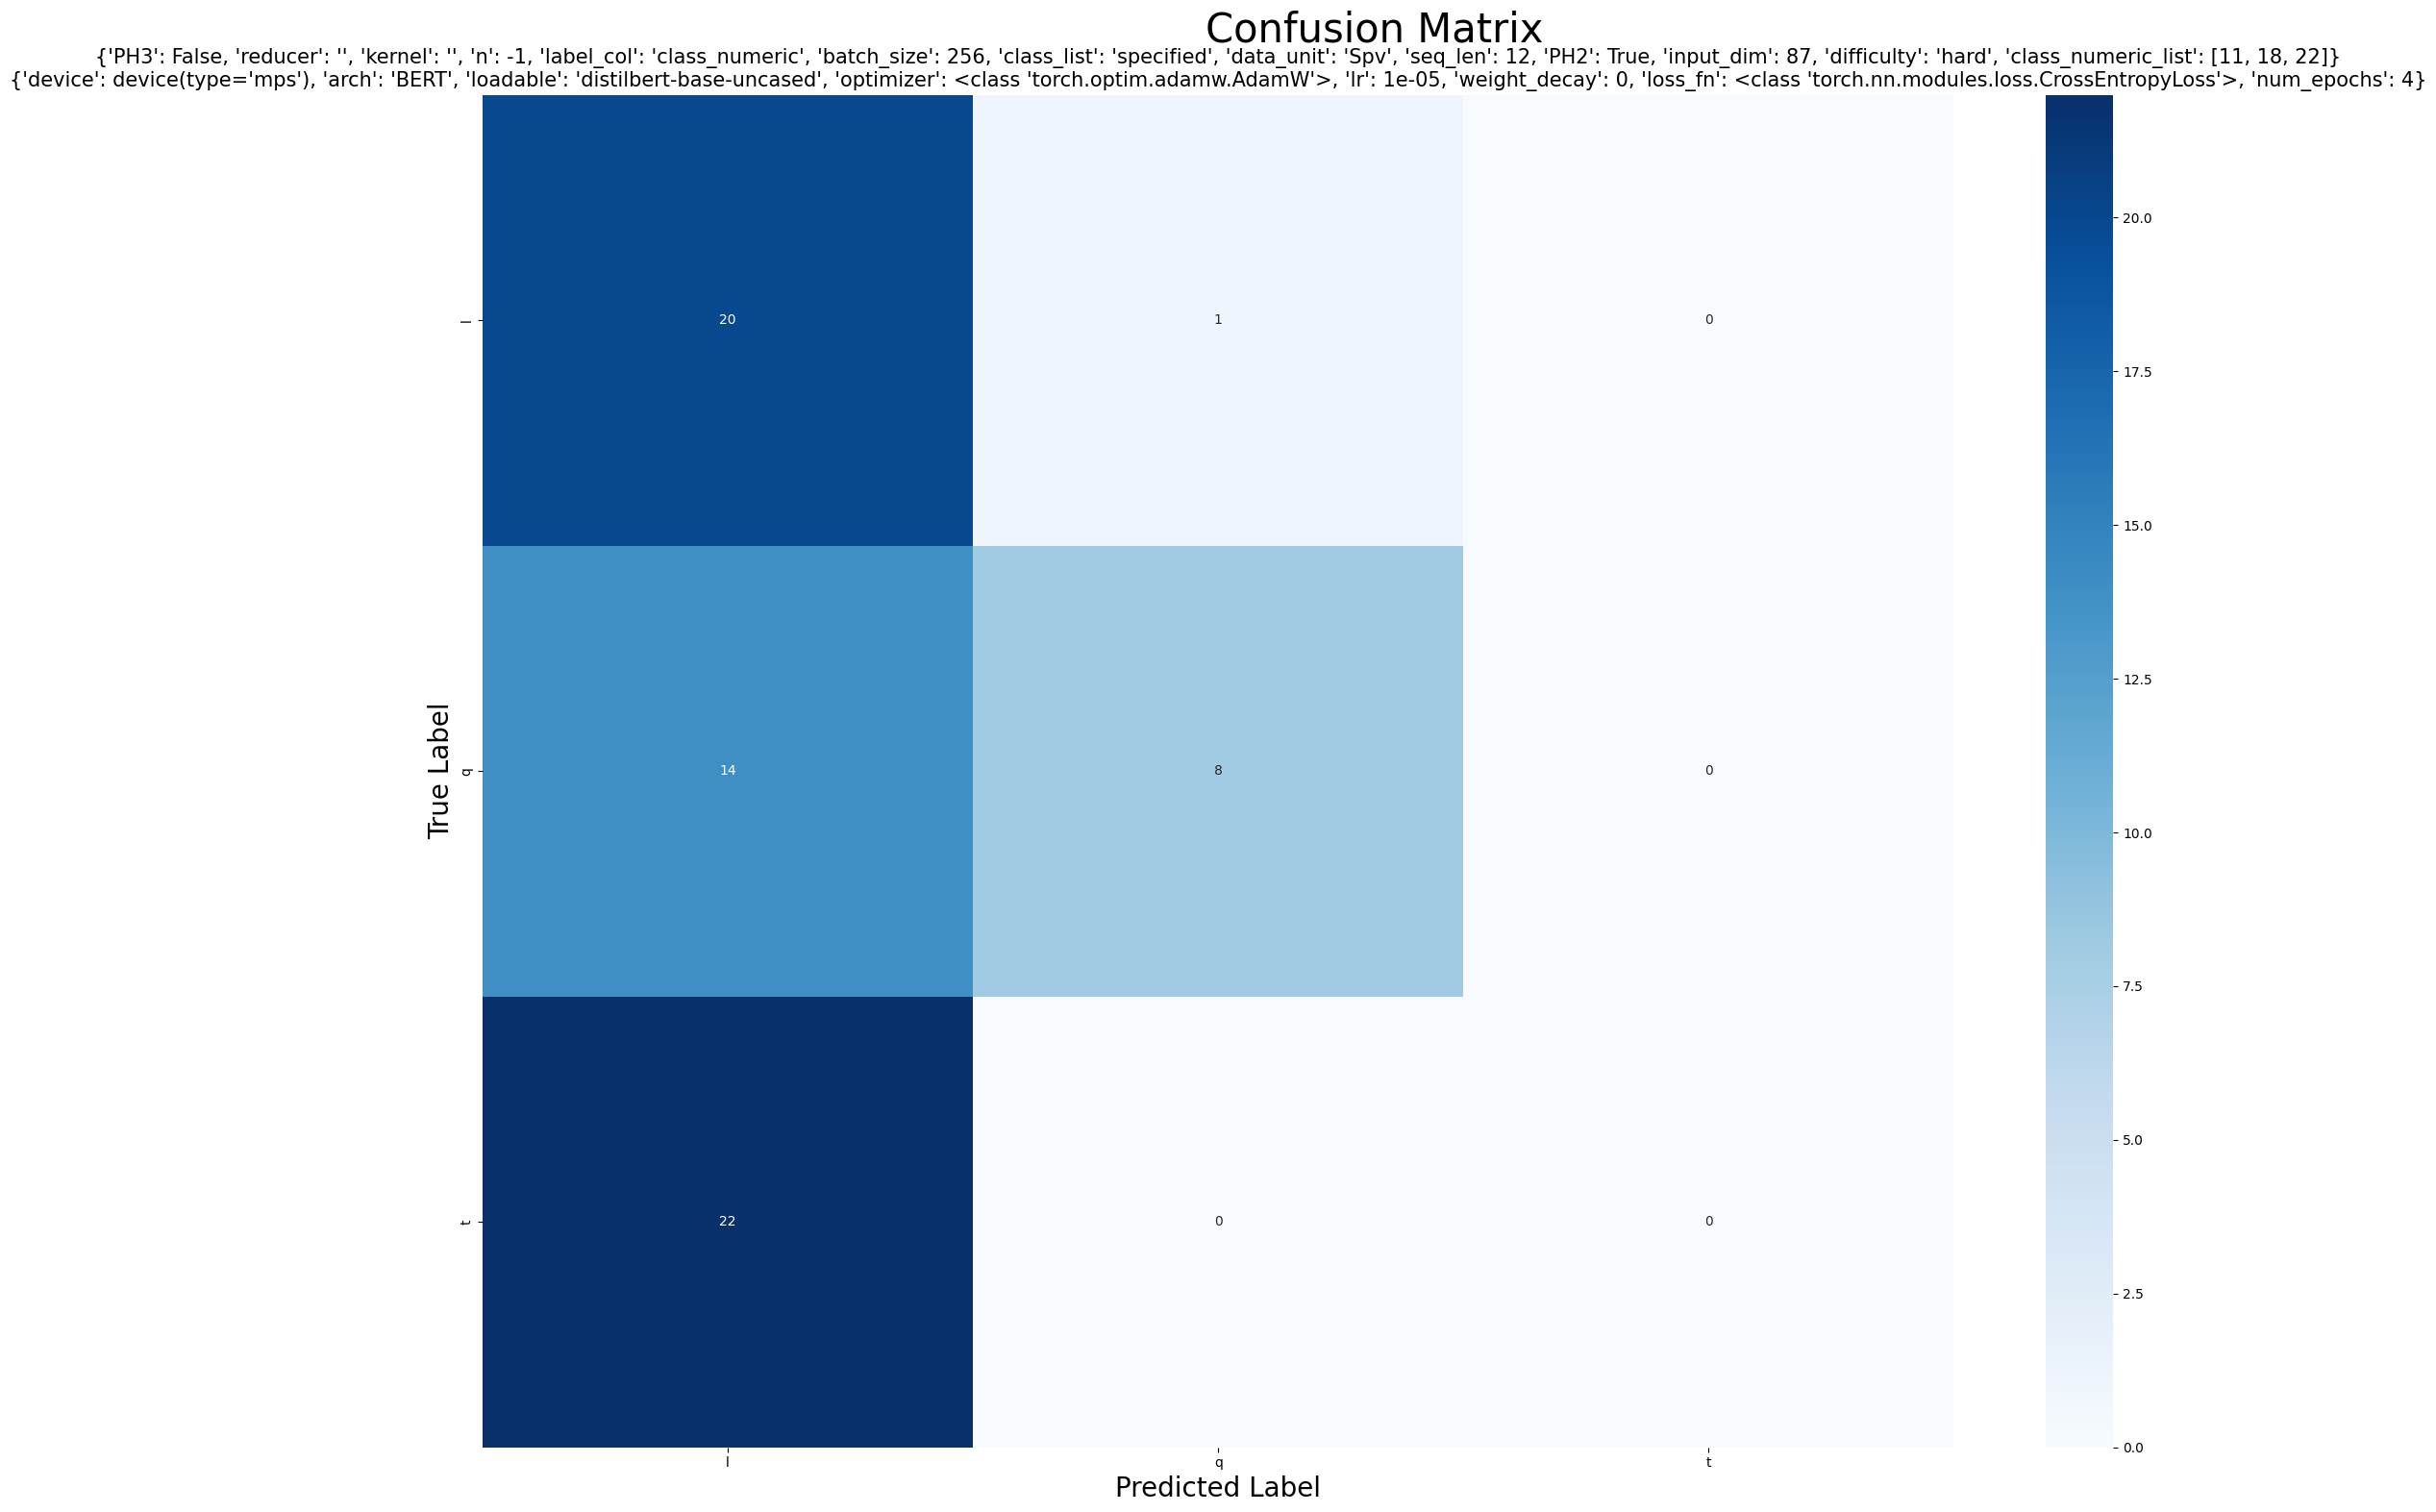

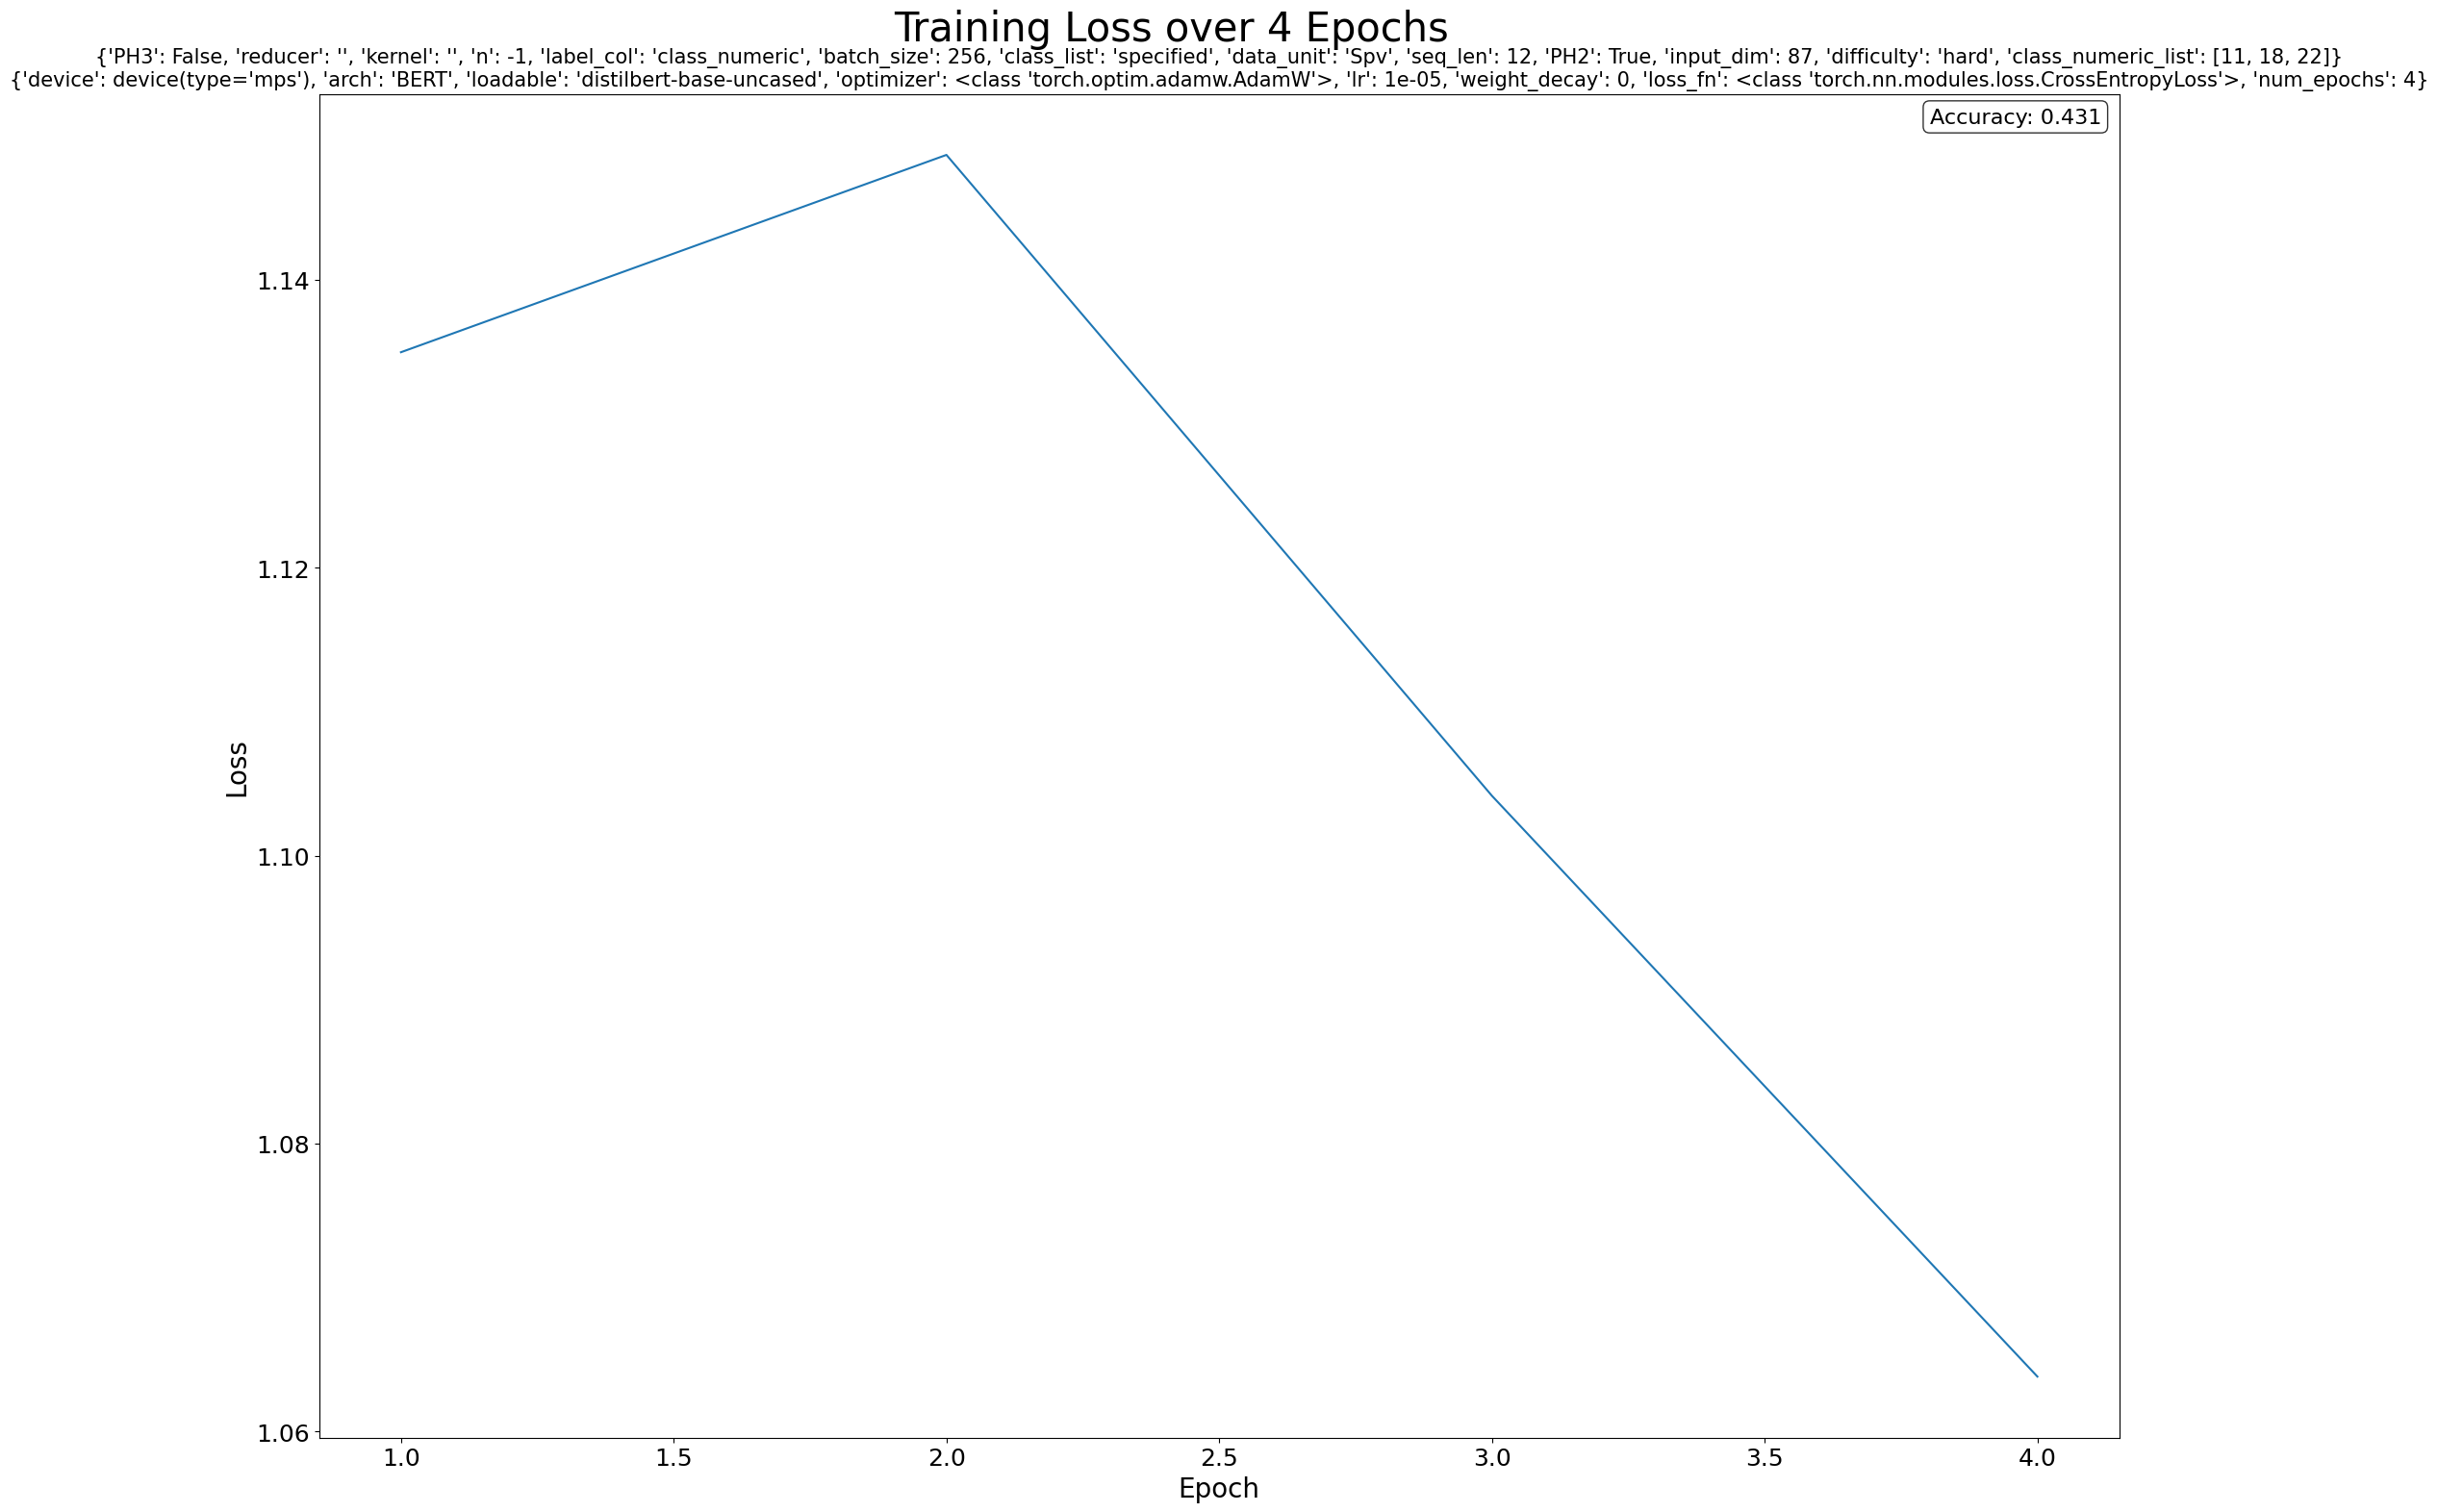

In [7]:
for data_unit in [sup.DATA_S_PF, sup.DATA_S_PV]:
  data_config = base_data_config.copy()
  train_config = base_train_config.copy()

  data_config["data_unit"] = data_unit
  if data_unit == sup.DATA_S_PF:
    data_config["seq_len"] = 1
  else:
    data_config["seq_len"] = 12

  for PH2 in [False, True]:
    data_config["PH2"] = PH2
    if PH2:
      data_config["input_dim"] = 87
    else:
      data_config["input_dim"] = 72

    for i in range(len(num_class_candidates)):
      n = num_class_candidates[i]
      s = subsets[n]
      train_config["num_epochs"] = (i+1) * base_num_epochs
      for difficulty in ['easy', 'average', 'hard']:
        s_dif = s[difficulty]
        data_config["difficulty"] = difficulty
        data_config["class_numeric_list"] = s_dif
        
        print(data_config)
        print(train_config)
        model = bert.BERT(data_config=data_config, df=None, 
                          train_config=train_config)
        
        model.fit()

        model.test()

        model.full_score()
        print(model.accuracy)
        print(model.top2accuracy)
        print(model.macro_f1)
        print(model.macro_precision)
        print(model.macro_recall)

        metrics = {"accuracy" : model.accuracy,
                  "top2accuracy" : model.top2accuracy,
                  "macro_f1" : model.macro_f1,
                  "macro_precision" : model.macro_precision,
                  "recall" : model.macro_recall}
        
        model.keep_confusion_matrix()
        model.keep_loss()
        
        metric_tracker[data_unit] = dict()
        metric_tracker[data_unit][PH2] = dict()
        metric_tracker[data_unit][PH2][n] = dict()
        metric_tracker[data_unit][PH2][n][difficulty] = metrics.copy()
        
        print("clearing memory...")
        del model
        gc.collect()

